# Wczytanie oraz przerobienie zbiorów danych

In [1]:
import pandas as pd
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid, cross_val_score

## Adult

In [2]:
adult = pd.read_csv("...\\adult.data", header=None, na_values='?')

In [3]:
adult.head()

0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [4]:
adult.rename(columns={adult.columns[-1]: 'class'}, inplace=True)

categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13, 'class']

le = LabelEncoder()
for col in categorical_columns:
    adult[col] = le.fit_transform(adult[col])

In [5]:
adult=adult.dropna()
adult.head()

0  1       2   3   4  5   6  7  8  9    10  11  12  13  class
0  39  7   77516   9  13  4   1  1  4  1  2174   0  40  39      0
1  50  6   83311   9  13  2   4  0  4  1     0   0  13  39      0
2  38  4  215646  11   9  0   6  1  4  1     0   0  40  39      0
3  53  4  234721   1   7  2   6  0  2  1     0   0  40  39      0
4  28  4  338409   9  13  2  10  5  2  0     0   0  40   5      0

In [6]:
adult.shape

(32561, 15)

## Bank Marketing

In [7]:
bank_marketing = pd.read_csv("...\\bank-full.csv", sep=';')

In [8]:
bank_marketing.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [9]:
bank_marketing.rename(columns={bank_marketing.columns[-1]: 'class'}, inplace=True)

categorical_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'class']

le = LabelEncoder()
for col in categorical_columns:
    bank_marketing[col] = le.fit_transform(bank_marketing[col])

In [10]:
bank_marketing=bank_marketing.dropna()
bank_marketing.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   40    4        1          2        0     2143        1     0        2   
1   26    9        2          1        0       29        1     0        2   
2   15    2        1          1        0        2        1     1        2   
3   29    1        1          3        0     1506        1     0        2   
4   15   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  class  
0    5      8       261         1     -1         0         3      0  
1    5      8       151         1     -1         0         3      0  
2    5      8        76         1     -1         0         3      0  
3    5      8        92         1     -1         0         3      0  
4    5      8       198         1     -1         0         3      0

In [11]:
bank_marketing.shape

(45211, 17)

## Fertility

In [12]:
fertility = pd.read_csv("...\\fertility_Diagnosis.txt", header=None, na_values='?')

In [13]:
fertility.head()

0     1  2  3  4  5    6  7     8  9
0 -0.33  0.69  0  1  1  0  0.8  0  0.88  N
1 -0.33  0.94  1  0  1  0  0.8  1  0.31  O
2 -0.33  0.50  1  0  0  0  1.0 -1  0.50  N
3 -0.33  0.75  0  1  1  0  1.0 -1  0.38  N
4 -0.33  0.67  1  1  0  0  0.8 -1  0.50  O

In [14]:
fertility.rename(columns={fertility.columns[-1]: 'class'}, inplace=True)

le = LabelEncoder()
fertility['class'] = le.fit_transform(fertility['class'])

In [15]:
fertility=fertility.dropna()
fertility.head()

0     1  2  3  4  5    6  7     8  class
0 -0.33  0.69  0  1  1  0  0.8  0  0.88      0
1 -0.33  0.94  1  0  1  0  0.8  1  0.31      1
2 -0.33  0.50  1  0  0  0  1.0 -1  0.50      0
3 -0.33  0.75  0  1  1  0  1.0 -1  0.38      0
4 -0.33  0.67  1  1  0  0  0.8 -1  0.50      1

In [16]:
fertility.shape

(100, 10)

## Raisin

In [17]:
raisin = pd.read_csv("...\\Raisin_Dataset.csv", sep=';', decimal=',')
raisin.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen

In [18]:
raisin.rename(columns={raisin.columns[-1]: 'class'}, inplace=True)
le = LabelEncoder()
raisin['class'] = le.fit_transform(raisin['class'])

In [19]:
raisin=raisin.dropna()
raisin.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  class  
0  0.758651   1184.040      1  
1  0.684130   1121.786      1  
2  0.637613   1208.575      1  
3  0.699599    844.162      1  
4  0.792772   1073.251      1

In [20]:
raisin.shape

(900, 8)

## Breast Cancer Wisconsin

In [21]:
wisconsin = pd.read_csv("...\\wdbc.data", header=None, na_values='?')
wisconsin.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [22]:
wisconsin.rename(columns={wisconsin.columns[1]: 'class'}, inplace=True)
le = LabelEncoder()
wisconsin['class'] = le.fit_transform(wisconsin['class'])
wisconsin=wisconsin.drop(wisconsin.columns[0],axis=1)
wisconsin=wisconsin.dropna()
wisconsin.head()

class      2      3       4       5        6        7       8        9  \
0      1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710   
1      1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
2      1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
3      1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
4      1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   

       10  ...     22     23      24      25      26      27      28      29  \
0  0.2419  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.1812  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.2069  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.2597  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.1809  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 31 columns]

In [23]:
wisconsin.shape

(569, 31)

## Rice

In [24]:
rice = pd.read_csv("...\\Rice_Cammeo_Osmancik.arff", header=None, na_values='?')
rice.head()

0           1           2          3         4      5         6       7
0  15231  525.578979  229.749878  85.093788  0.928882  15617  0.572896  Cammeo
1  14656  494.311005  206.020065  91.730972  0.895405  15072  0.615436  Cammeo
2  14634  501.122009  214.106781  87.768288  0.912118  14954  0.693259  Cammeo
3  13176  458.342987  193.337387  87.448395  0.891861  13368  0.640669  Cammeo
4  14688  507.166992  211.743378  89.312454  0.906691  15262  0.646024  Cammeo

In [25]:
rice.rename(columns={rice.columns[-1]: 'class'}, inplace=True)

le = LabelEncoder()
rice['class'] = le.fit_transform(rice['class'])

rice=rice.dropna()
rice.head()

0           1           2          3         4      5         6  class
0  15231  525.578979  229.749878  85.093788  0.928882  15617  0.572896      0
1  14656  494.311005  206.020065  91.730972  0.895405  15072  0.615436      0
2  14634  501.122009  214.106781  87.768288  0.912118  14954  0.693259      0
3  13176  458.342987  193.337387  87.448395  0.891861  13368  0.640669      0
4  14688  507.166992  211.743378  89.312454  0.906691  15262  0.646024      0

In [26]:
rice.shape

(3810, 8)

## Credit Approval

In [27]:
cred_approv = pd.read_csv("...\\crx.data", header=None, na_values='?')
cred_approv.head()

0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  202.0    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g   43.0  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  280.0  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  100.0    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  120.0    0  +

In [28]:
cred_approv.rename(columns={cred_approv.columns[-1]: 'class'}, inplace=True)
categorical_columns = [0,3,4,5,6,8,9,11,12,'class']
le = LabelEncoder()
for col in categorical_columns:
    cred_approv[col] = le.fit_transform(cred_approv[col])

cred_approv=cred_approv.dropna()
cred_approv.head()

0      1      2  3  4   5  6     7  8  9  10  11  12     13   14  class
0  1  30.83  0.000  1  0  12  7  1.25  1  1   1   0   0  202.0    0      0
1  0  58.67  4.460  1  0  10  3  3.04  1  1   6   0   0   43.0  560      0
2  0  24.50  0.500  1  0  10  3  1.50  1  0   0   0   0  280.0  824      0
3  1  27.83  1.540  1  0  12  7  3.75  1  1   5   1   0  100.0    3      0
4  1  20.17  5.625  1  0  12  7  1.71  1  0   0   0   2  120.0    0      0

In [29]:
cred_approv.shape

(666, 16)

## Statlog (German)

In [30]:
statlog = pd.read_csv("...\\german.data-numeric", header=None, na_values='?', delim_whitespace=True)
statlog.head()

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
3   0   1   1  
4   0   1   2  

[5 rows x 25 columns]

In [31]:
statlog.rename(columns={statlog.columns[-1]: 'class'}, inplace=True)

le = LabelEncoder()
statlog['class'] = le.fit_transform(statlog['class'])

statlog=statlog.dropna()
statlog.head()

0   1  2   3  4  5  6  7  8   9  ...  15  16  17  18  19  20  21  22  23  \
0  1   6  4  12  5  5  3  4  1  67  ...   0   0   1   0   0   1   0   0   1   
1  2  48  2  60  1  3  2  2  1  22  ...   0   0   1   0   0   1   0   0   1   
2  4  12  4  21  1  4  3  3  1  49  ...   0   0   1   0   0   1   0   1   0   
3  1  42  2  79  1  4  3  4  2  45  ...   0   0   0   0   0   0   0   0   1   
4  1  24  3  49  1  3  3  4  4  53  ...   1   0   1   0   0   0   0   0   1   

   class  
0      0  
1      1  
2      0  
3      0  
4      1  

[5 rows x 25 columns]

In [32]:
statlog.shape

(1000, 25)

## Heart Failure Clinical Records

In [33]:
HFCR = pd.read_csv("...\\heart_failure_clinical_records_dataset.csv", sep=',')
HFCR.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [34]:
HFCR.rename(columns={HFCR.columns[-1]: 'class'}, inplace=True)

le = LabelEncoder()
HFCR['class'] = le.fit_transform(HFCR['class'])

HFCR=HFCR.dropna()
HFCR.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  class  
0        0     4      1  
1        0     6      1  
2        1     7      1  
3        0     7      1  
4        0     8      1

In [35]:
HFCR.shape

(299, 13)

## Ionosphere

In [36]:
iono = pd.read_csv("...\\ionosphere.data", header=None, na_values='?', sep=',')
iono.head()

0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   g  
1 -0.06288 -0.13738 -0.02447   b  
2 -0.24180  0.56045 -0.38238   g  
3  1.00000 -0.32382  1.00000   b  
4 -0.59573 -0.04608 -0.65697   g  

[5 rows x 35 columns]

In [37]:
iono.rename(columns={iono.columns[-1]: 'class'}, inplace=True)

# le = LabelEncoder()
# iono['class'] = le.fit_transform(iono['class'])
iono['class'].replace(to_replace='g', value=0, inplace=True)
iono['class'].replace(to_replace='b', value=1, inplace=True)

iono=iono.dropna()
iono.head()

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


Downca

0  1        2        3        4        5        6        7        8  \
0  1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1  0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1  0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1  0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

         9  ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  class  
0 -0.54487  0.18641 -0.45300      0  
1 -0.06288 -0.13738 -0.02447      1  
2 -0.24180  0.56045 -0.38238      0  
3  1.00000 -0.32382  1.00000      1  
4 -0.59573 -0.04608 -0.65697      0  

[5 rows x 35 columns]

In [38]:
iono.shape

(351, 35)

## Hepatitis

In [39]:
hepatitis = pd.read_csv("...\\hepatitis.data", header=None, na_values='?')
hepatitis.head()

0   1   2    3   4    5    6    7    8    9    10   11   12   13   14  \
0   2  30   2  1.0   2  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0   
1   2  50   1  1.0   2  1.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  0.9   
2   2  78   1  2.0   2  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.7   
3   2  31   1  NaN   1  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.7   
4   2  34   1  2.0   2  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0   

      15     16   17    18  19  
0   85.0   18.0  4.0   NaN   1  
1  135.0   42.0  3.5   NaN   1  
2   96.0   32.0  4.0   NaN   1  
3   46.0   52.0  4.0  80.0   1  
4    NaN  200.0  4.0   NaN   1

In [40]:
hepatitis.rename(columns={hepatitis.columns[0]: 'class'}, inplace=True)

hepatitis['class'].replace(to_replace=2, value=0, inplace=True)

hepatitis=hepatitis.dropna()
hepatitis.head()

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




class   1  2    3  4    5    6    7    8    9   10   11   12   13   14  \
5       0  34  1  2.0  2  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.9   
10      0  39  1  1.0  1  2.0  2.0  2.0  1.0  1.0  2.0  2.0  2.0  2.0  1.3   
11      0  32  1  2.0  1  1.0  2.0  2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0   
12      0  41  1  2.0  1  1.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.9   
13      0  30  1  2.0  2  1.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.2   

      15     16   17    18  19  
5   95.0   28.0  4.0  75.0   1  
10  78.0   30.0  4.4  85.0   1  
11  59.0  249.0  3.7  54.0   1  
12  81.0   60.0  3.9  52.0   1  
13  57.0  144.0  4.9  78.0   1

In [41]:
hepatitis.shape

(80, 20)

## Chronic Kidney Disease

In [42]:
CKD = pd.read_csv("...\\chronic_kidney_disease_full.arff", header=None, na_values='?', sep=',')
CKD.head()

0     1      2    3    4       5         6           7           8   \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      9   ...    15    16   17   18   19  20    21   22   23   24  
0  121.0  ...  44.0  7800  5.2  yes  yes  no  good   no   no  ckd  
1    NaN  ...  38.0  6000  NaN   no   no  no  good   no   no  ckd  
2  423.0  ...  31.0  7500  NaN   no  yes  no  poor   no  yes  ckd  
3  117.0  ...  32.0  6700  3.9  yes   no  no  poor  yes  yes  ckd  
4  106.0  ...  35.0  7300  4.6   no   no  no  good   no   no  ckd  

[5 rows x 25 columns]

In [43]:
CKD.rename(columns={CKD.columns[-1]: 'class'}, inplace=True)
categorical_columns = [5, 6, 7, 8, 18, 19, 20, 21, 22, 23]
CKD['class'].replace(to_replace='notckd', value=0, inplace=True)
CKD['class'].replace(to_replace='ckd', value=1, inplace=True)
le = LabelEncoder()
for col in categorical_columns:
    CKD[col] = le.fit_transform(CKD[col])

CKD=CKD.dropna()
CKD.head()

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




0     1      2    3    4  5  6  7  8      9  ...    15     16   17  18  \
3   48.0  70.0  1.005  4.0  0.0  1  0  1  0  117.0  ...  32.0   6700  3.9   1   
5   60.0  90.0  1.015  3.0  0.0  2  2  0  0   74.0  ...  39.0   7800  4.4   1   
9   53.0  90.0  1.020  2.0  0.0  0  0  1  0   70.0  ...  29.0  12100  3.7   1   
11  63.0  70.0  1.010  3.0  0.0  0  0  1  0  380.0  ...  32.0   4500  3.8   1   
12  68.0  70.0  1.015  3.0  1.0  2  1  1  0  208.0  ...  28.0  12200  3.4   1   

    19  20 21 22  23  class  
3    3   0  1  1   1      1  
5    4   0  0  1   0      1  
9    4   0  1  0   1      1  
11   4   0  1  1   0      1  
12   4   1  1  1   0      1  

[5 rows x 25 columns]

In [44]:
CKD.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5          int32
6          int32
7          int32
8          int32
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16        object
17        object
18         int32
19         int32
20         int32
21         int32
22         int32
23         int32
class     object
dtype: object

In [45]:
CKD[CKD.columns[16]] = CKD[CKD.columns[16]].astype(float)
CKD[CKD.columns[17]] = CKD[CKD.columns[17]].astype(float)
CKD['class'] = CKD['class'].astype(int)

In [46]:
CKD.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5          int32
6          int32
7          int32
8          int32
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18         int32
19         int32
20         int32
21         int32
22         int32
23         int32
class      int32
dtype: object

In [47]:
CKD.shape

(203, 25)

## Część eksperymentalna

### Wczytanie algorytmów

In [2]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
from scipy.spatial import distance
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedShuffleSplit, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, f1_score, roc_curve, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from unidecode import unidecode
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import csv
import shap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import random
from sklearn.metrics.pairwise import euclidean_distances

def label_erase(dataframe, column_name=None, fraction=0.5, percent_erased_ones=0.5):
    
    dataframe_copy = dataframe.copy()

    if dataframe_copy.shape[1] == 1:
        target_column = dataframe_copy.columns[0]
    else:
        if column_name is None:
            raise ValueError("Column name cannot be None.")
        target_column = column_name

    if fraction is not None:
        if not 0 <= fraction <= 1:
            raise ValueError("Fraction must be in range [0, 1].")
    else:
        raise ValueError("Fraction cannot be None.")

    if percent_erased_ones is not None:
        if not 0 <= percent_erased_ones <= 1:
            raise ValueError("Percent erased ones must be in range [0, 1].")

    total_values = dataframe_copy[target_column].notna().sum()

    unique_values = dataframe_copy[target_column].unique()

    ones_count = dataframe_copy[dataframe_copy[target_column] == unique_values[1]].shape[0]
    zeros_count = dataframe_copy[dataframe_copy[target_column] == unique_values[0]].shape[0]

    ones_to_erase = round(total_values * fraction * percent_erased_ones)
    zeros_to_erase = round(total_values * fraction * (1 - percent_erased_ones))

    ones_to_erase = min(ones_to_erase, ones_count)
    zeros_to_erase = min(zeros_to_erase, zeros_count)

    zeros_indices = dataframe_copy[dataframe_copy[target_column] == unique_values[0]].sample(n=zeros_to_erase, random_state=42).index
    ones_indices = dataframe_copy[dataframe_copy[target_column] == unique_values[1]].sample(n=ones_to_erase, random_state=42).index

    dataframe_copy.loc[zeros_indices, target_column] = np.nan
    dataframe_copy.loc[ones_indices, target_column] = np.nan

    return dataframe_copy
    
def calculate_membership_weights(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    center_train = X_train_scaled.mean(axis=0)
    center_val = X_val_scaled.mean(axis=0)
    
    distances_train = np.linalg.norm(X_train_scaled - center_train, axis=1)
    distances_val = np.linalg.norm(X_train_scaled - center_val, axis=1)
    
    membership_weights_train = 1 / (1 + distances_train)
    membership_weights_val = 1 / (1 + distances_val)
    
    return membership_weights_train, membership_weights_val

def fuzzy_shapley_values(X_train, y_train, X_val, y_val, K=5, distance_param=1, val_member=1, train_member=1, 
                         metric='euclidean', shap_values=None, shap_distance=False):
    n_train = len(X_train)
    n_val = len(X_val)
    fuzzy_shapley_vals = np.zeros(n_train)
    scaler = StandardScaler()
    X_train_scal = scaler.fit_transform(X_train)
    X_val_scal = scaler.transform(X_val)

    if shap_values is None:
        shap_values = np.ones(X_train.shape[1])

    membership_weights_train, membership_weights_val = calculate_membership_weights(X_train, X_val)

    if shap_distance:
        for j in range(n_val):
            shapley_weighted_distances = np.zeros(n_train)
            for i in range(n_train):
                shapley_weighted_distance = np.sum(np.abs(X_train.iloc[i] - X_val.iloc[j]) * shap_values)
                shapley_weighted_distances[i] = shapley_weighted_distance
            
            sorted_indices = np.argsort(shapley_weighted_distances)
            fuzzy_weights = (1 / (1 + np.array(shapley_weighted_distances)[sorted_indices]) ** distance_param) * \
                            ((1 + membership_weights_val[sorted_indices]) ** val_member) * \
                            ((1+membership_weights_train[sorted_indices]) ** train_member)
            for i in range(n_train-1, -1, -1):  
                if i == n_train - 1:  
                    fuzzy_shapley_vals[sorted_indices[i]] += (y_train.iloc[sorted_indices[i]] == y_val.iloc[j]) * fuzzy_weights[i] / K
                else:  
                    prev_count = (y_train.iloc[sorted_indices[:i+1]] == y_val.iloc[j]).sum() * fuzzy_weights[:i+1].sum()
                    current_count = (y_train.iloc[sorted_indices[:i+2]] == y_val.iloc[j]).sum() * fuzzy_weights[:i+2].sum()
                    fuzzy_shapley_vals[sorted_indices[i]] += (current_count - prev_count) * min(K, i+1) / (K * (i+1))
    else:
        for j in range(n_val):
            distances = distance.cdist(X_train_scal, X_val_scal[j].reshape(1, -1), metric)
            sorted_indices = np.argsort(distances.flatten())
            fuzzy_weights = (1 / (1 + distances.flatten()[sorted_indices]) ** distance_param) * \
                            ((1 + membership_weights_val[sorted_indices]) ** val_member) * \
                            ((1 + membership_weights_train[sorted_indices]) ** train_member)
            for i in range(n_train-1, -1, -1):  
                if i == n_train - 1:  
                    fuzzy_shapley_vals[sorted_indices[i]] += (y_train.iloc[sorted_indices[i]] == y_val.iloc[j]) * fuzzy_weights[i] / K
                else:  
                    prev_count = (y_train.iloc[sorted_indices[:i+1]] == y_val.iloc[j]).sum() * fuzzy_weights[:i+1].sum()
                    current_count = (y_train.iloc[sorted_indices[:i+2]] == y_val.iloc[j]).sum() * fuzzy_weights[:i+2].sum()
                    fuzzy_shapley_vals[sorted_indices[i]] += (current_count - prev_count) * min(K, i+1) / (K * (i+1))

    fuzzy_shapley_vals /= n_val

    return fuzzy_shapley_vals

def shapley_values(X_train, y_train, X_val, y_val, K=5):
    n_train = len(X_train)
    n_val = len(X_val)
    shapley_vals = np.zeros(n_train)

    for j in range(n_val):
        distances = distance.cdist(X_train, X_val.iloc[j].values.reshape(1, -1), 'euclidean')
        sorted_indices = np.argsort(distances.flatten())
        for i in range(n_train-1, -1, -1):  
            if i == n_train - 1: 
                shapley_vals[sorted_indices[i]] += (y_train.iloc[sorted_indices[i]] == y_val.iloc[j]) / K
            else:  
                prev_count = (y_train.iloc[sorted_indices[:i+1]] == y_val.iloc[j]).sum()
                current_count = (y_train.iloc[sorted_indices[:i+2]] == y_val.iloc[j]).sum()
                shapley_vals[sorted_indices[i]] += (current_count -
                                                    prev_count) * min(K, i+1) / (K * (i+1))

    shapley_vals /= n_val

    return shapley_vals


def active_learning_shapley(X_labeled, X_unlabeled, target_column,
                            classifier, K_percent=5, distance_param=-1, val_member=1, train_member=-1,
                            tol_percent_expected_shapley=25, max_iter=200, early_stopping_criterion=None,
                            error_plateau_tol=0.01, error_plateau_patience=5,
                            shapley_method="fuzzy", shap_distance=False):

    X_labeled_copy = X_labeled.copy()
    X_unlabeled_copy = X_unlabeled.copy()

    prev_mean_shapley_val = None
    prev_val_error = None
    iteration = 0

    while len(X_unlabeled_copy) > 0 and iteration < max_iter:
        
        semi_labeled_indices = []

        K = max(1, int(len(X_unlabeled_copy) * K_percent / 100))

        classifier.fit(X_labeled_copy.drop(target_column, axis=1), X_labeled_copy[target_column])

        X_unlabeled_copy[target_column] = classifier.predict(X_unlabeled_copy.drop(target_column, axis=1))

        if shap_distance:
            if isinstance(classifier, KNeighborsClassifier):
                explainer = shap.KernelExplainer(classifier.predict, X_labeled_copy.drop(target_column, axis=1))
            else:
                explainer = shap.Explainer(classifier)
            shap_values = explainer(X_labeled_copy.drop(target_column, axis=1))
            shap_values_df = pd.DataFrame(shap_values.values, columns=X_labeled_copy.drop(target_column, axis=1).columns)
            mean_shap_values = shap_values_df.abs().mean()

        if shapley_method == "fuzzy":
            if shap_distance:
                shapley_vals = fuzzy_shapley_values(X_unlabeled_copy.drop(target_column, axis=1), X_unlabeled_copy[target_column],
                                                    X_labeled_copy.drop(target_column, axis=1), X_labeled_copy[target_column], K=K,
                                                    distance_param=distance_param, val_member=val_member, train_member=train_member, shap_values=mean_shap_values, shap_distance=shap_distance)
            else:
                shapley_vals = fuzzy_shapley_values(X_unlabeled_copy.drop(target_column, axis=1), X_unlabeled_copy[target_column],
                                                    X_labeled_copy.drop(target_column, axis=1), X_labeled_copy[target_column], K=K,
                                                    distance_param=distance_param, val_member=val_member, train_member=train_member)

        elif shapley_method == "exact":
            shapley_vals = shapley_values(X_unlabeled_copy.drop(target_column, axis=1), X_unlabeled_copy[target_column],
                                          X_labeled_copy.drop(target_column, axis=1), X_labeled_copy[target_column], K=K)
        else:
            raise ValueError("Invalid shapley method. Choose from 'fuzzy' or 'exact'.")

        threshold = np.mean(shapley_vals) + np.std(shapley_vals)

        top_indices = np.where(shapley_vals >= threshold)[0]

        if len(top_indices) == 0:
            break

        semi_labeled_indices.extend(top_indices)

        new_X_labeled = pd.concat([X_labeled_copy, X_unlabeled_copy.iloc[top_indices]]).sort_index()
        X_labeled_copy = new_X_labeled

        X_unlabeled_copy = X_unlabeled_copy.drop(X_unlabeled_copy.index[top_indices])

        if len(X_unlabeled_copy) == 0:
            break

        val_preds = classifier.predict(X_unlabeled_copy.drop(target_column, axis=1))
        val_true = X_unlabeled_copy[target_column]
        val_error = np.mean(val_preds != val_true)

        if early_stopping_criterion == "error_plateau":
            if prev_val_error is not None:
                if abs(val_error - prev_val_error) < error_plateau_tol:
                    patience_counter += 1
                    if patience_counter >= error_plateau_patience:
                        break
            else:
                patience_counter = 0
            prev_val_error = val_error

        iteration += 1

    return X_labeled_copy

### Eksperymenty

#### Adult

In [ ]:
adult_small, _ = train_test_split(adult, test_size=0.95,
                                     random_state=2024)

In [ ]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}

fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10  

results = []

for iteration in range(num_iterations):
    df_train, df_test = train_test_split(adult_small, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:
        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_adult = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_adult = results_df_adult.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_adult = results_df_adult.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_adult = pd.merge(mean_results_df_adult, std_results_df_adult, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_adult)

In [ ]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_adult[mean_results_df_adult['classifier'] == clf]['fraction'],
                     mean_results_df_adult[mean_results_df_adult['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)
        
        # Ustawienia osi y
        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [ ]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_adult[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_adult[mean_std_results_df_adult[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

#### Bank Marketing 

In [ ]:
bank_small, _ = train_test_split(bank_marketing, test_size=0.975,
                                     random_state=2024)

In [ ]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10  

results = []

for iteration in range(num_iterations):
    df_train, df_test = train_test_split(bank_small, test_size=0.3, random_state=2024 - iteration**(2))
    
    for frac in fraction:
        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():
            
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            # Add results to the list
            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_bank = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_bank = results_df_bank.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_bank = results_df_bank.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_bank = pd.merge(mean_results_df_bank, std_results_df_bank, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_bank)

In [ ]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_bank[mean_results_df_bank['classifier'] == clf]['fraction'],
                     mean_results_df_bank[mean_results_df_bank['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)
        
        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [ ]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_adult[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_bank[mean_std_results_df_bank[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

In [ ]:
%%time

bank_small, _ = train_test_split(bank_marketing, test_size=0.975,
                                     random_state=2024)

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(bank_small, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')


                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')
                
                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_rice = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_rice = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

print(results_df_test_rice.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_rice.nlargest(10, 'F1 K-erased'))

print(results_df_valid_rice.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_rice.nlargest(10, 'F1 erased'))

#### Fertility (1)

In [136]:
fertility['class'].value_counts()

class
0    88
1    12
Name: count, dtype: int64

In [143]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(fertility, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)


            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])


results_df_fert = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])


mean_results_df_fert = results_df_fert.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_fert = results_df_fert.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_fert = pd.merge(mean_results_df_fert, std_results_df_fert, on=['fraction', 'classifier'], suffixes=('', '_std'))

CPU times: total: 17min
Wall time: 7min 51s


In [184]:
results_df_fert.to_csv('results_df_fert.csv', index=False)
mean_results_df_fert.to_csv('mean_results_df_fert.csv', index=False)
mean_std_results_df_fert.to_csv('mean_std_results_df_fert.csv', index=False)

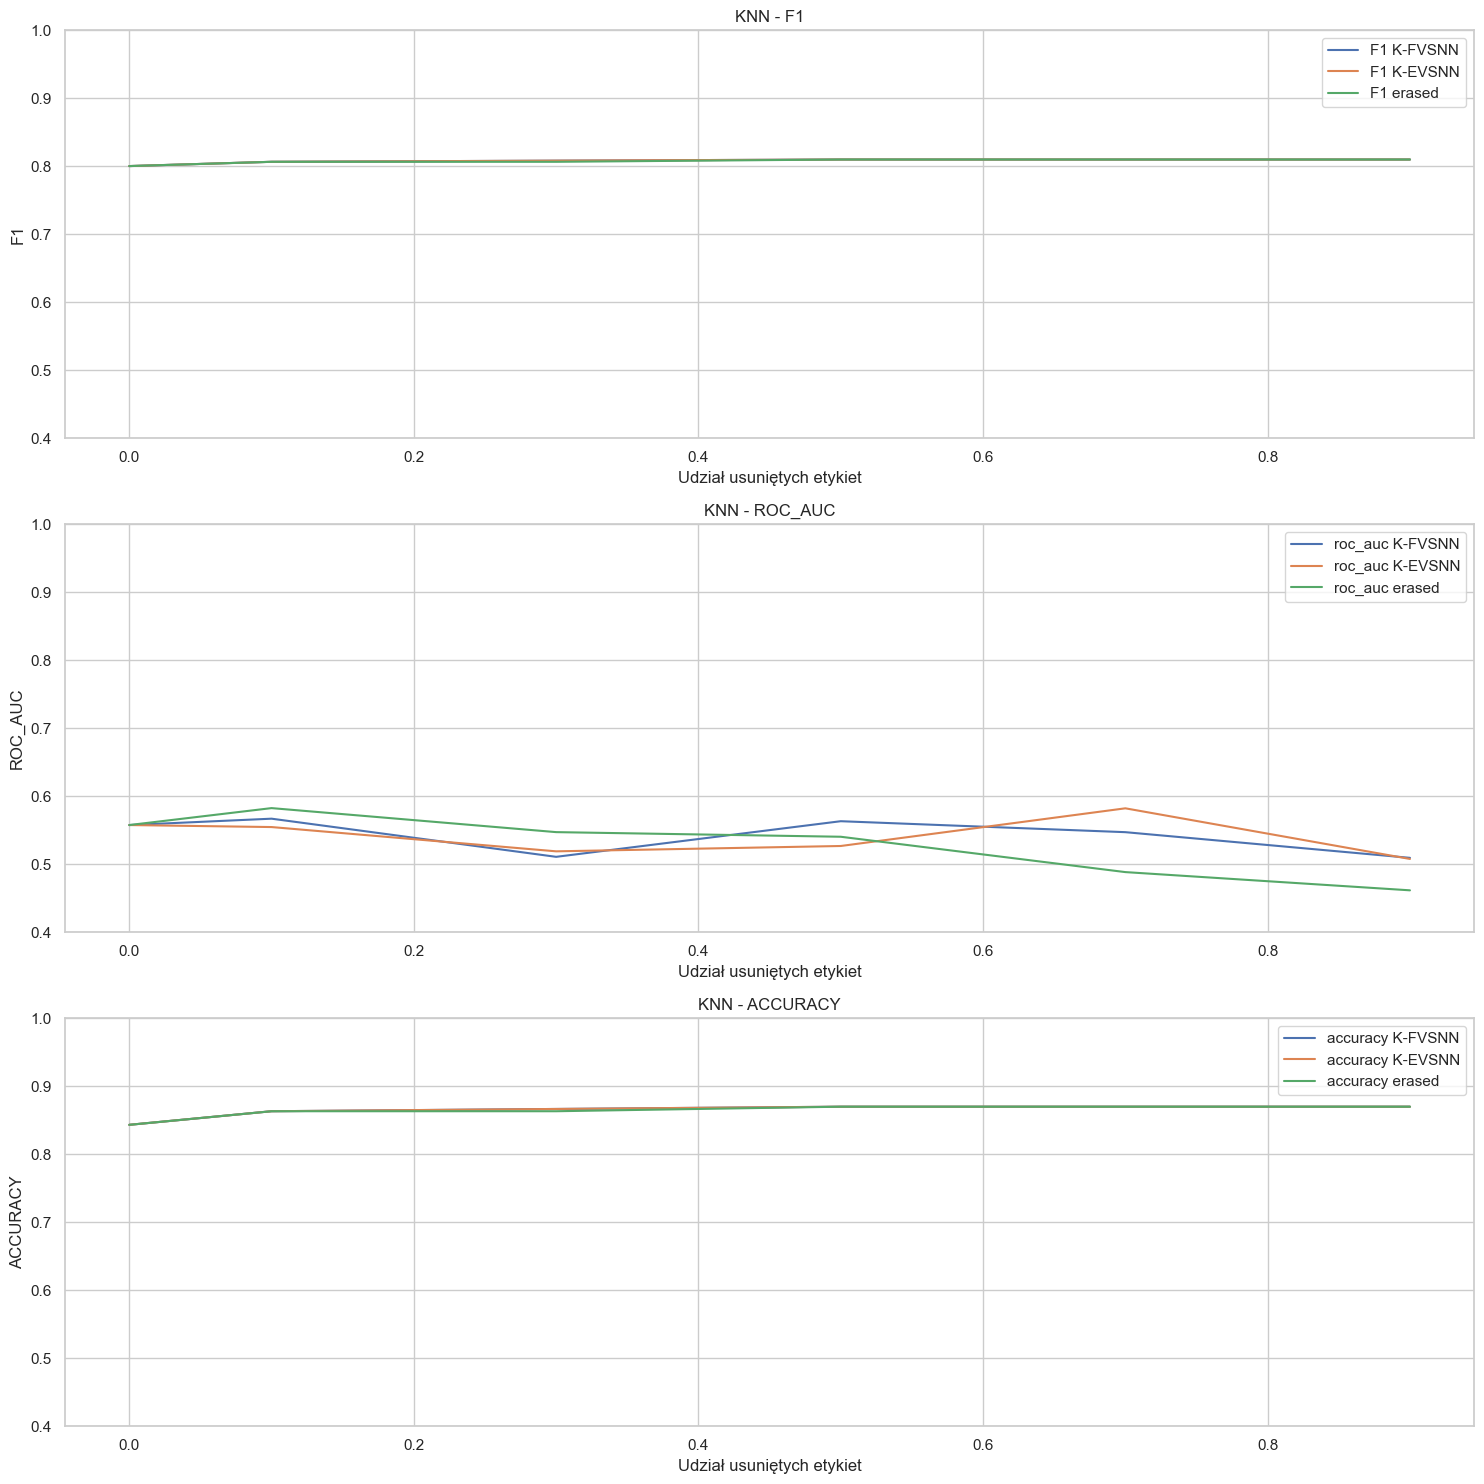

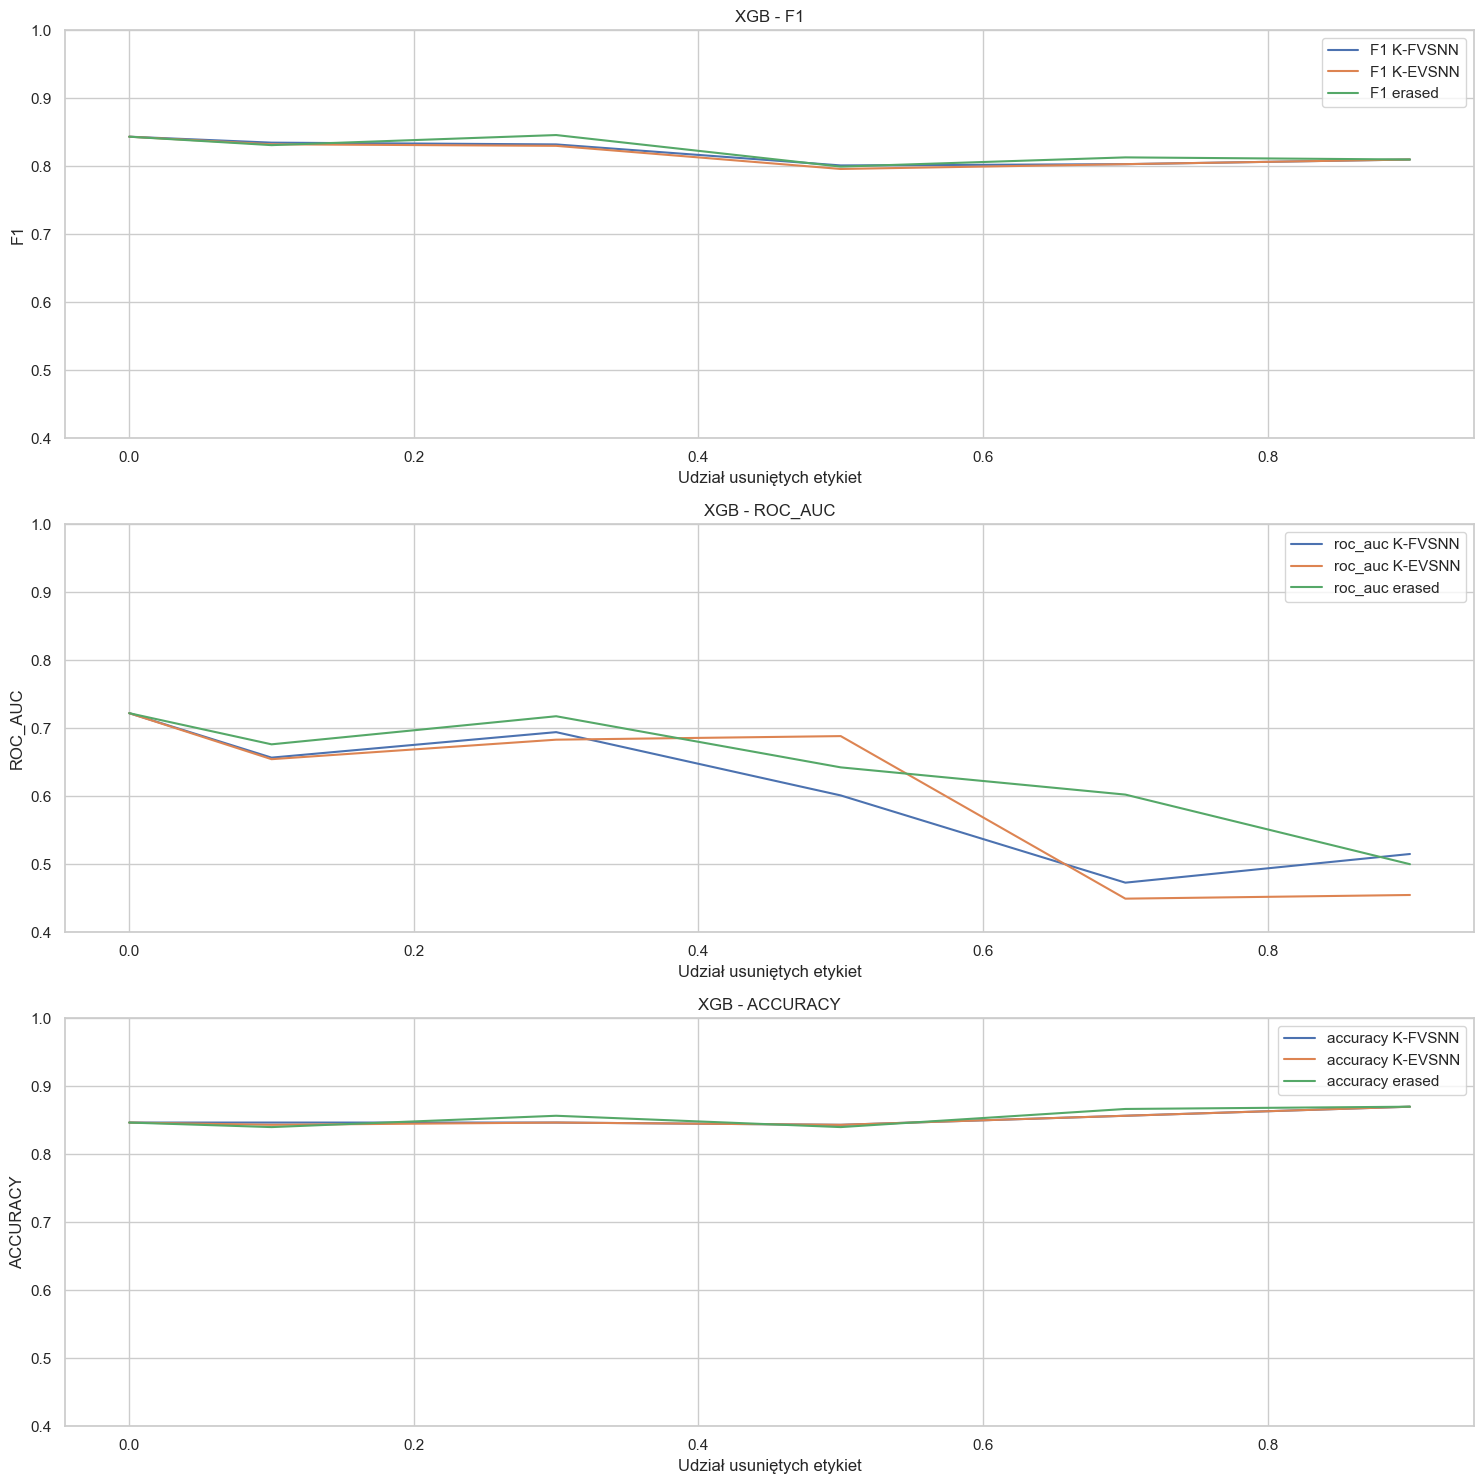

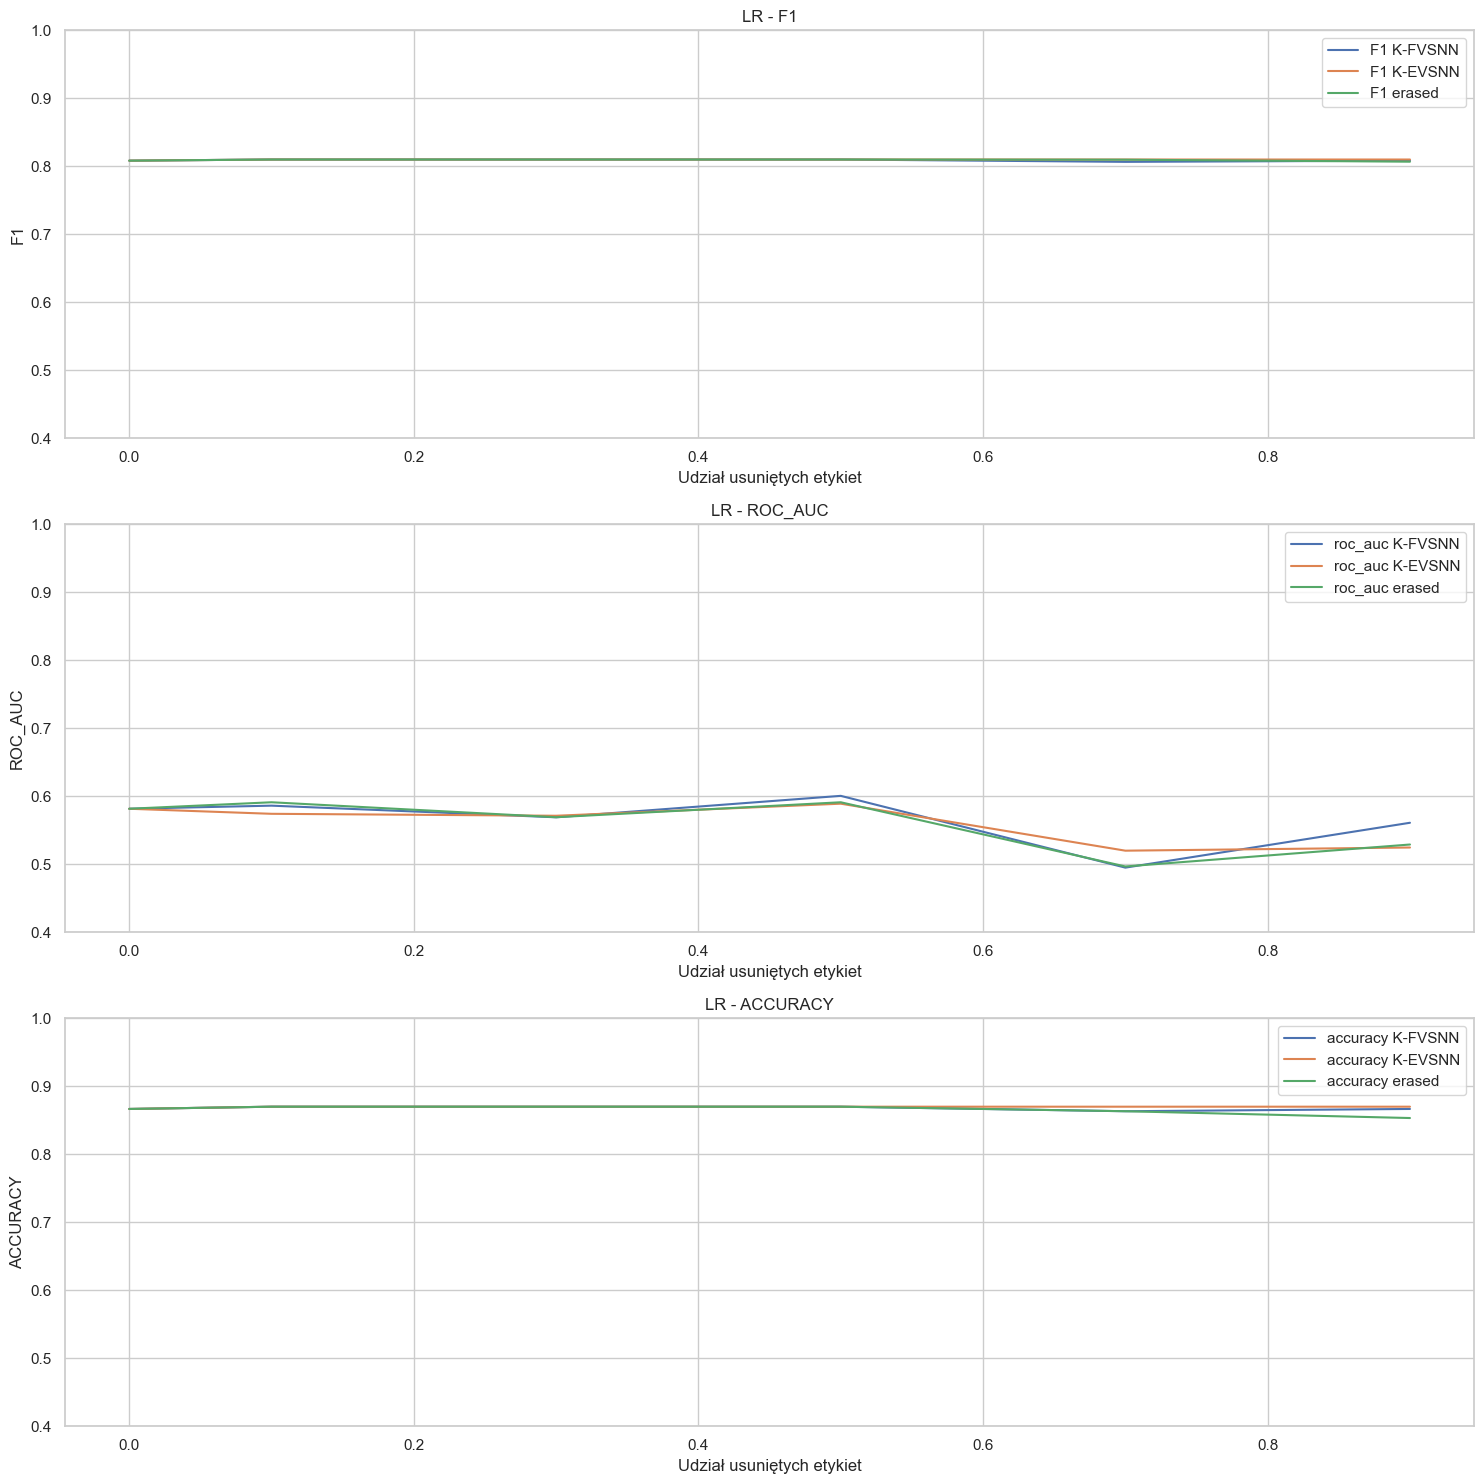

In [144]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_fert[mean_results_df_fert['classifier'] == clf]['fraction'],
                     mean_results_df_fert[mean_results_df_fert['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)
        
        # Ustawienia osi y
        plt.ylim(0.4, 1)
        plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [3]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_fert[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_fert[mean_std_results_df_fert[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

NameError: name 'mean_std_results_df_fert' is not defined

In [5]:
results_df_fert=pd.read_csv("...\\results_df_fert.csv")
mean_results_df_fert=pd.read_csv("...\\mean_results_df_fert.csv")
mean_std_results_df_fert=pd.read_csv("...\\mean_std_results_df_fert.csv")

metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf_name in mean_std_results_df_fert['classifier'].unique():
    print(f'Classifier: {clf_name}')
    for metric in metrics:
        for model_type in model_types:
            column_name = f'{metric} {model_type}'
            std_column_name = f'{metric} {model_type}_std'
            max_value = mean_std_results_df_fert[mean_std_results_df_fert['classifier'] == clf_name][column_name].max()
            max_row = mean_std_results_df_fert[(mean_std_results_df_fert['classifier'] == clf_name) & 
                                              (mean_std_results_df_fert[column_name] == max_value)]
            max_std = max_row[std_column_name].values[0] if not max_row.empty else None
            print(f'Max {metric} for {model_type}:')
            print(max_row[['fraction', 'classifier', column_name, std_column_name]])
            print()

Classifier: knn
Max F1 for K-FVSNN:
    fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
9        0.5        knn    0.809952        0.057261
12       0.7        knn    0.809952        0.057261
15       0.9        knn    0.809952        0.057261

Max F1 for K-EVSNN:
    fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
9        0.5        knn    0.809952        0.057261
12       0.7        knn    0.809952        0.057261
15       0.9        knn    0.809952        0.057261

Max F1 for erased:
    fraction classifier  F1 erased  F1 erased_std
9        0.5        knn   0.809952       0.057261
12       0.7        knn   0.809952       0.057261
15       0.9        knn   0.809952       0.057261

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
3       0.1        knn         0.566961             0.113205

Max roc_auc for K-EVSNN:
    fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
12       0.7        knn         0.582218             0.078728

Max roc_

In [38]:
def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_fert.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.800 (0.061)  0.558 (0.111)   0.843 (0.050)
1         lr  0.808 (0.058)  0.582 (0.173)   0.867 (0.042)
2        xgb  0.844 (0.061)  0.722 (0.159)   0.847 (0.061)


In [39]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.835 (0.059)   0.657 (0.148)    0.847 (0.061)   
8        0.3        xgb  0.832 (0.049)   0.694 (0.158)    0.847 (0.057)   
11       0.5        xgb  0.801 (0.036)   0.601 (0.192)    0.843 (0.016)   
14       0.7        xgb  0.803 (0.047)   0.473 (0.137)    0.857 (0.022)   
17       0.9        xgb  0.810 (0.057)   0.515 (0.184)    0.870 (0.040)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.832 (0.055)   0.654 (0.153)    0.843 (0.057)  0.831 (0.061)   
8   0.830 (0.034)   0.683 (0.199)    0.847 (0.028)  0.846 (0.056)   
11  0.796 (0.038)   0.688 (0.144)    0.843 (0.016)  0.799 (0.039)   
14  0.803 (0.047)   0.449 (0.161)    0.857 (0.022)  0.813 (0.061)   
17  0.810 (0.057)   0.455 (0.201)    0.870 (0.040)  0.810 (0.057)   

   roc_auc erased accuracy erased  
5   0.676 (0.140)   0.840 (0.070)  
8   0.718 (0.175)   0.857 (0.067)  
11  0.642 (0.178)   0.840 

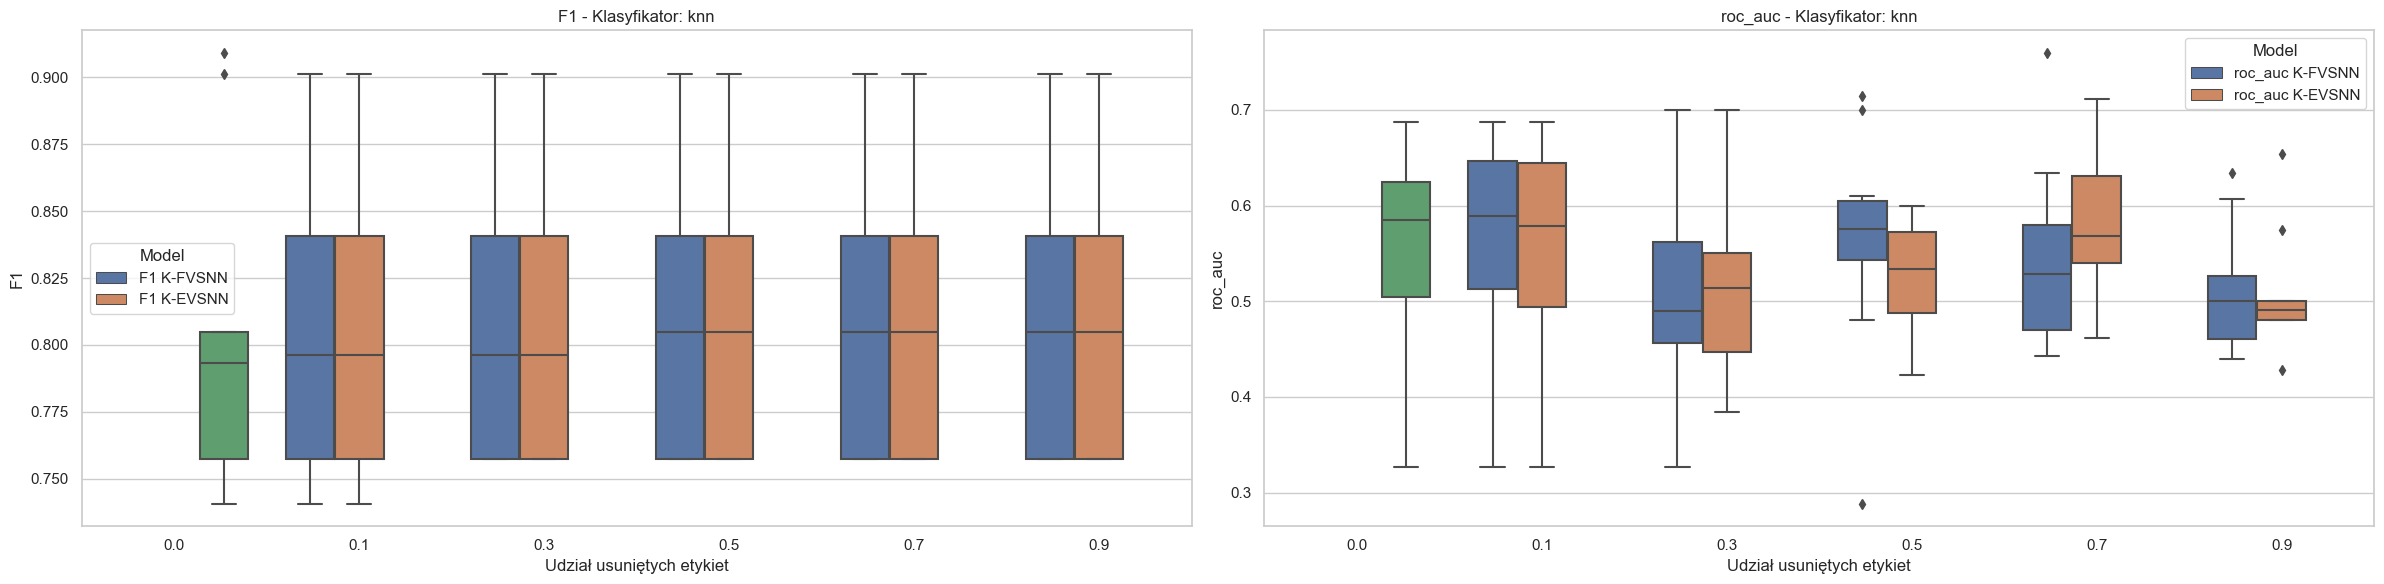

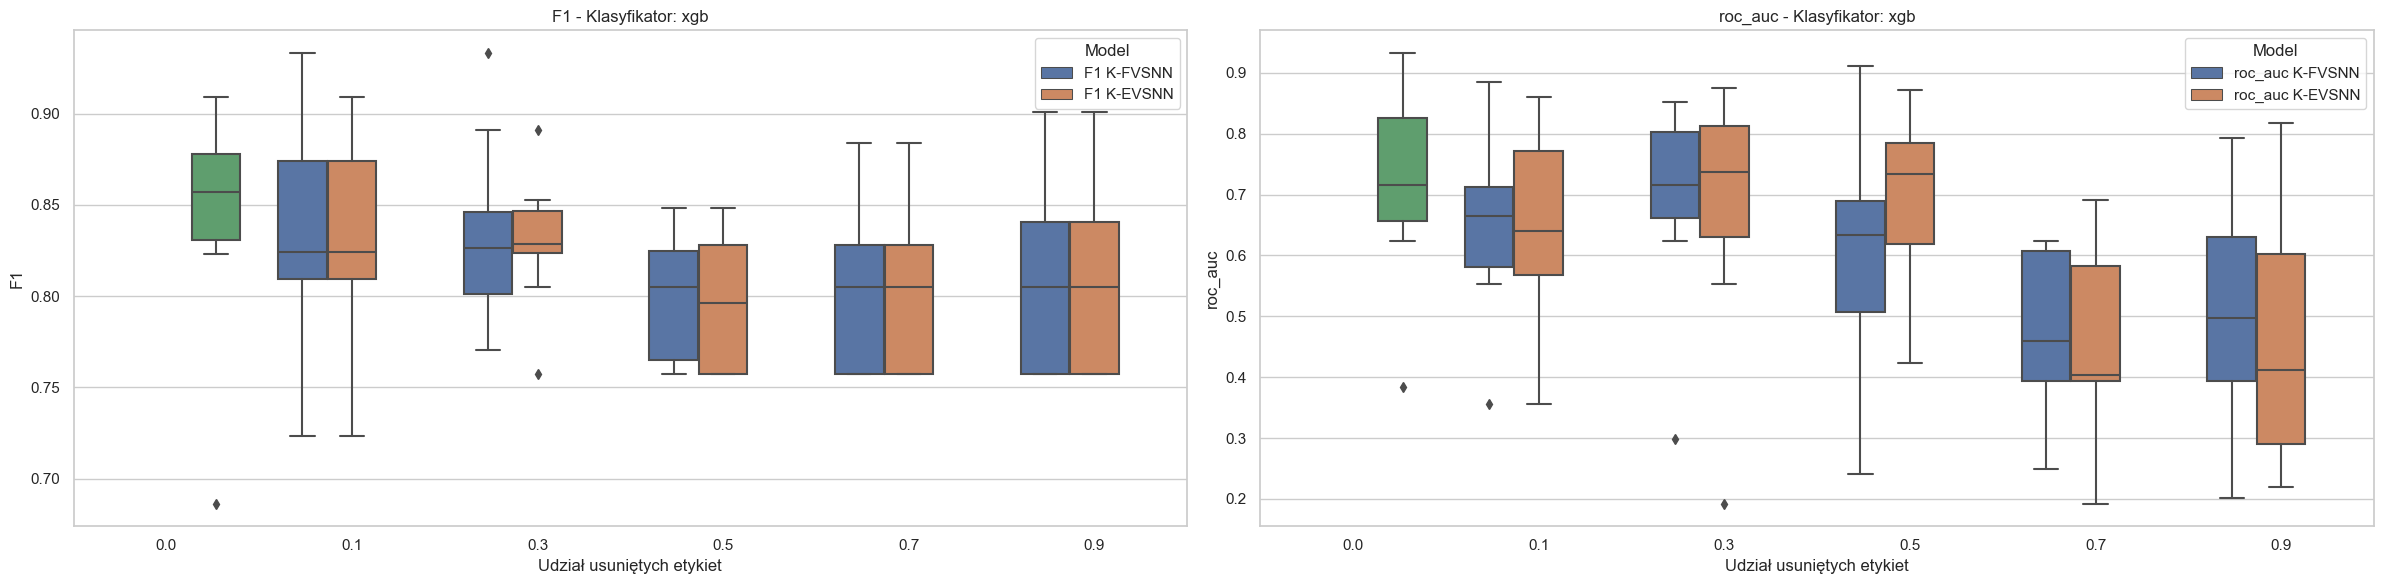

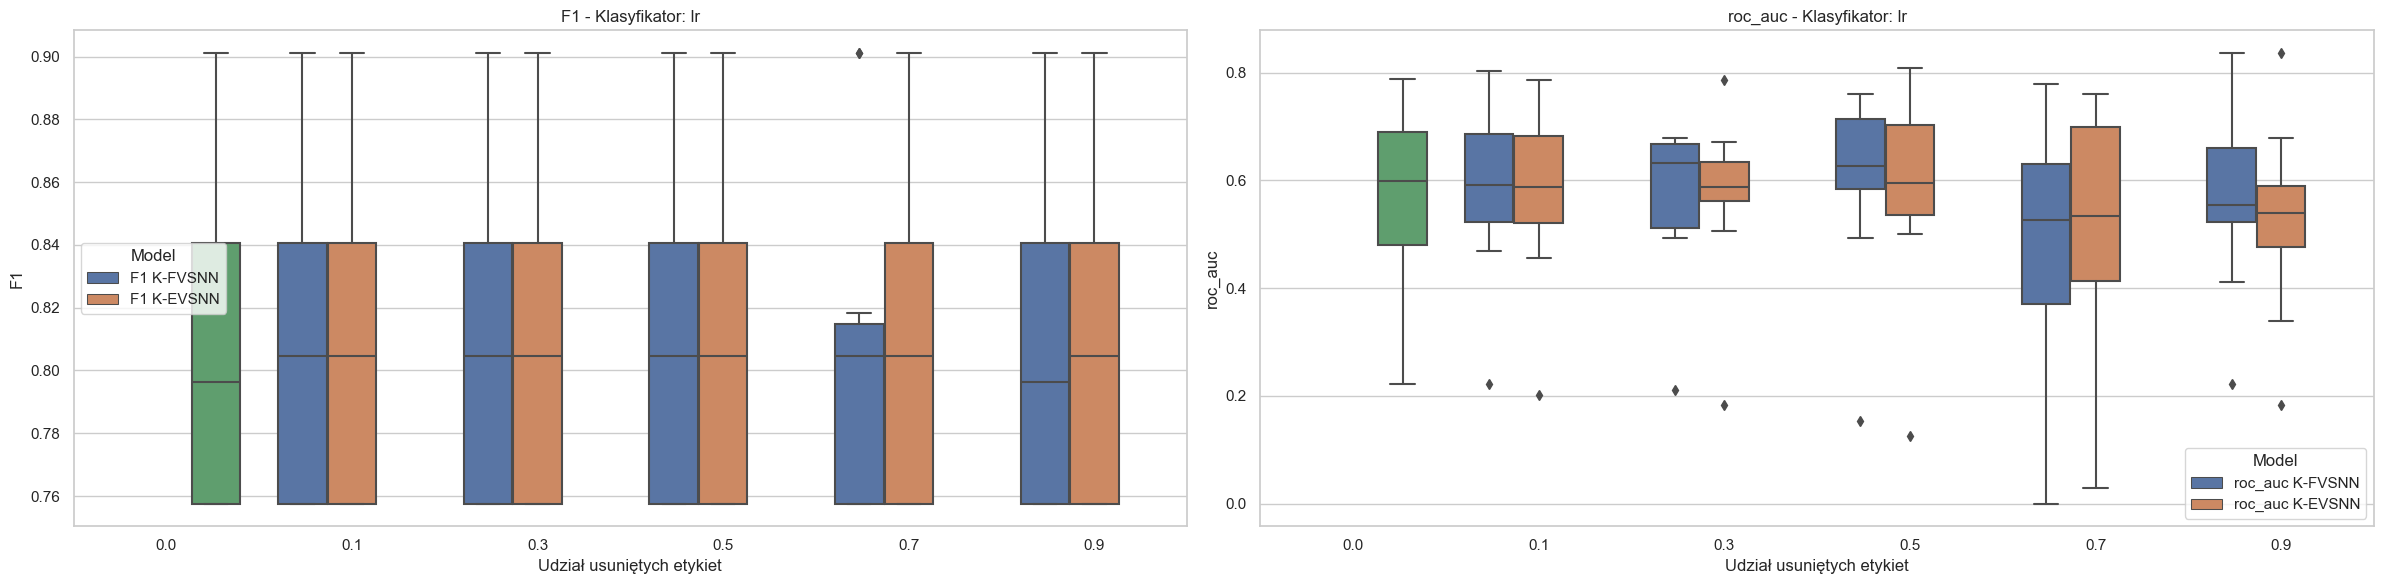

In [82]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_fert[results_df_fert['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [94]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(fertility, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            
                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_fert = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_fert = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 1h 1min 1s
Wall time: 15min 40s


In [95]:
print(results_df_test_fert.nlargest(10, 'F1 K-erased'))
print(results_df_test_fert.nlargest(10, 'F1 K-FVSNN'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.658824   
1              -2          -2            -1         10    0.658824   
2              -2          -2             0         10    0.711111   
3              -2          -2             1         10    0.658824   
4              -2          -2             2         10    0.711111   
5              -2          -1            -2         10    0.711111   
6              -2          -1            -1         10    0.711111   
7              -2          -1             0         10    0.711111   
8              -2          -1             1         10    0.658824   
9              -2          -1             2         10    0.711111   

   F1 K-EVSNN  F1 K-erased  
0    0.711111     0.658824  
1    0.711111     0.658824  
2    0.711111     0.658824  
3    0.711111     0.658824  
4    0.711111     0.658824  
5    0.711111     0.658824  
6    0.711111     0.658824

In [96]:
print(results_df_valid_fert.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_fert.nlargest(10, 'F1 erased'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.711111   
1              -2          -2            -1         10    0.711111   
2              -2          -2             0         10    0.711111   
3              -2          -2             1         10    0.711111   
4              -2          -2             2         10    0.711111   
5              -2          -1            -2         10    0.711111   
6              -2          -1            -1         10    0.711111   
7              -2          -1             0         10    0.711111   
8              -2          -1             1         10    0.711111   
9              -2          -1             2         10    0.711111   

   F1 K-EVSNN  F1 erased  
0    0.711111   0.711111  
1    0.711111   0.711111  
2    0.711111   0.711111  
3    0.711111   0.711111  
4    0.711111   0.711111  
5    0.711111   0.711111  
6    0.711111   0.711111  
7    0.711111

#### Raisin (7)

In [169]:
raisin['class'].value_counts()

class
1    450
0    450
Name: count, dtype: int64

In [173]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(raisin, test_size=0.3, random_state=2024 - iteration**(2))
    

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)


            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])


results_df_raisin = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])


mean_results_df_raisin = results_df_raisin.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_raisin = results_df_raisin.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_raisin = pd.merge(mean_results_df_raisin, std_results_df_raisin, on=['fraction', 'classifier'], suffixes=('', '_std'))

CPU times: total: 6h 37min 22s
Wall time: 12h 39min 40s


In [185]:
results_df_raisin.to_csv('results_df_raisin.csv', index=False)
mean_results_df_raisin.to_csv('mean_results_df_raisin.csv', index=False)
mean_std_results_df_raisin.to_csv('mean_std_results_df_raisin.csv', index=False)

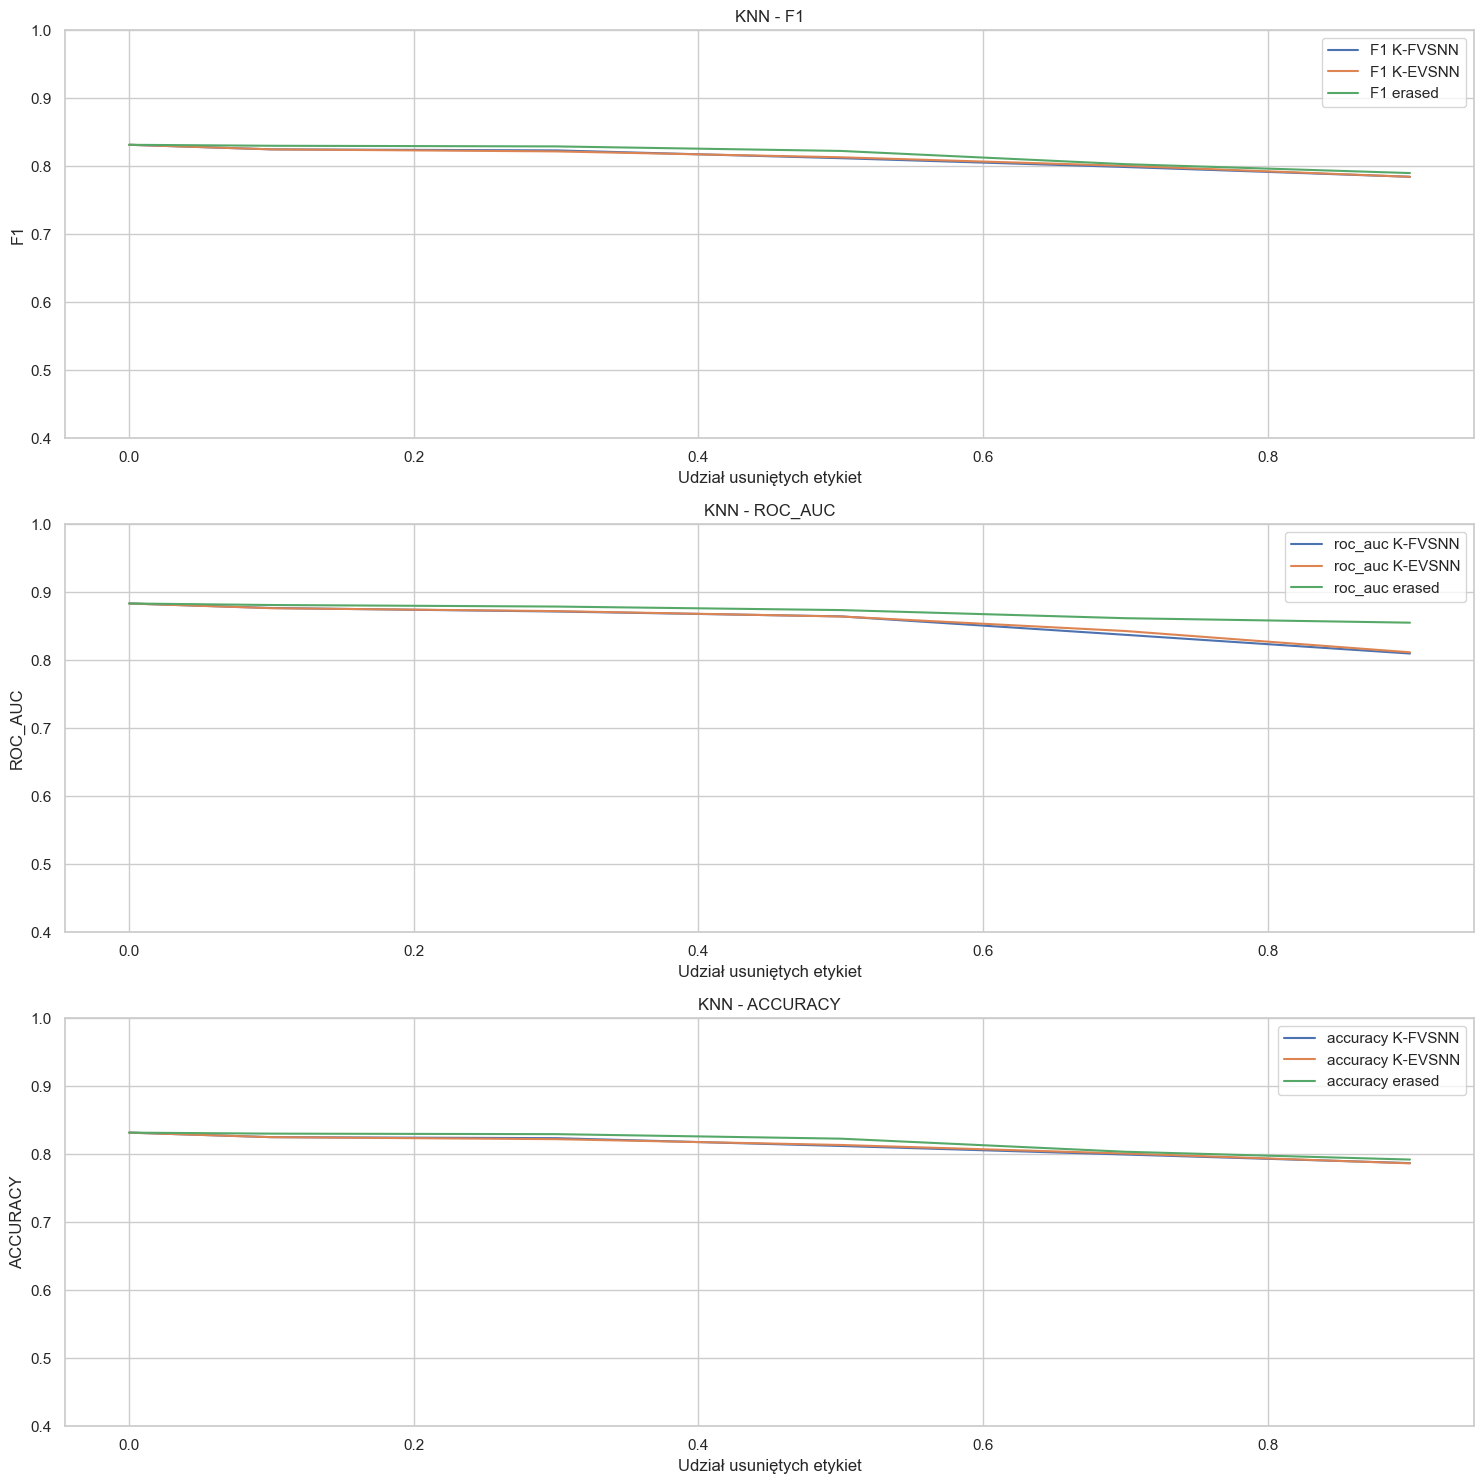

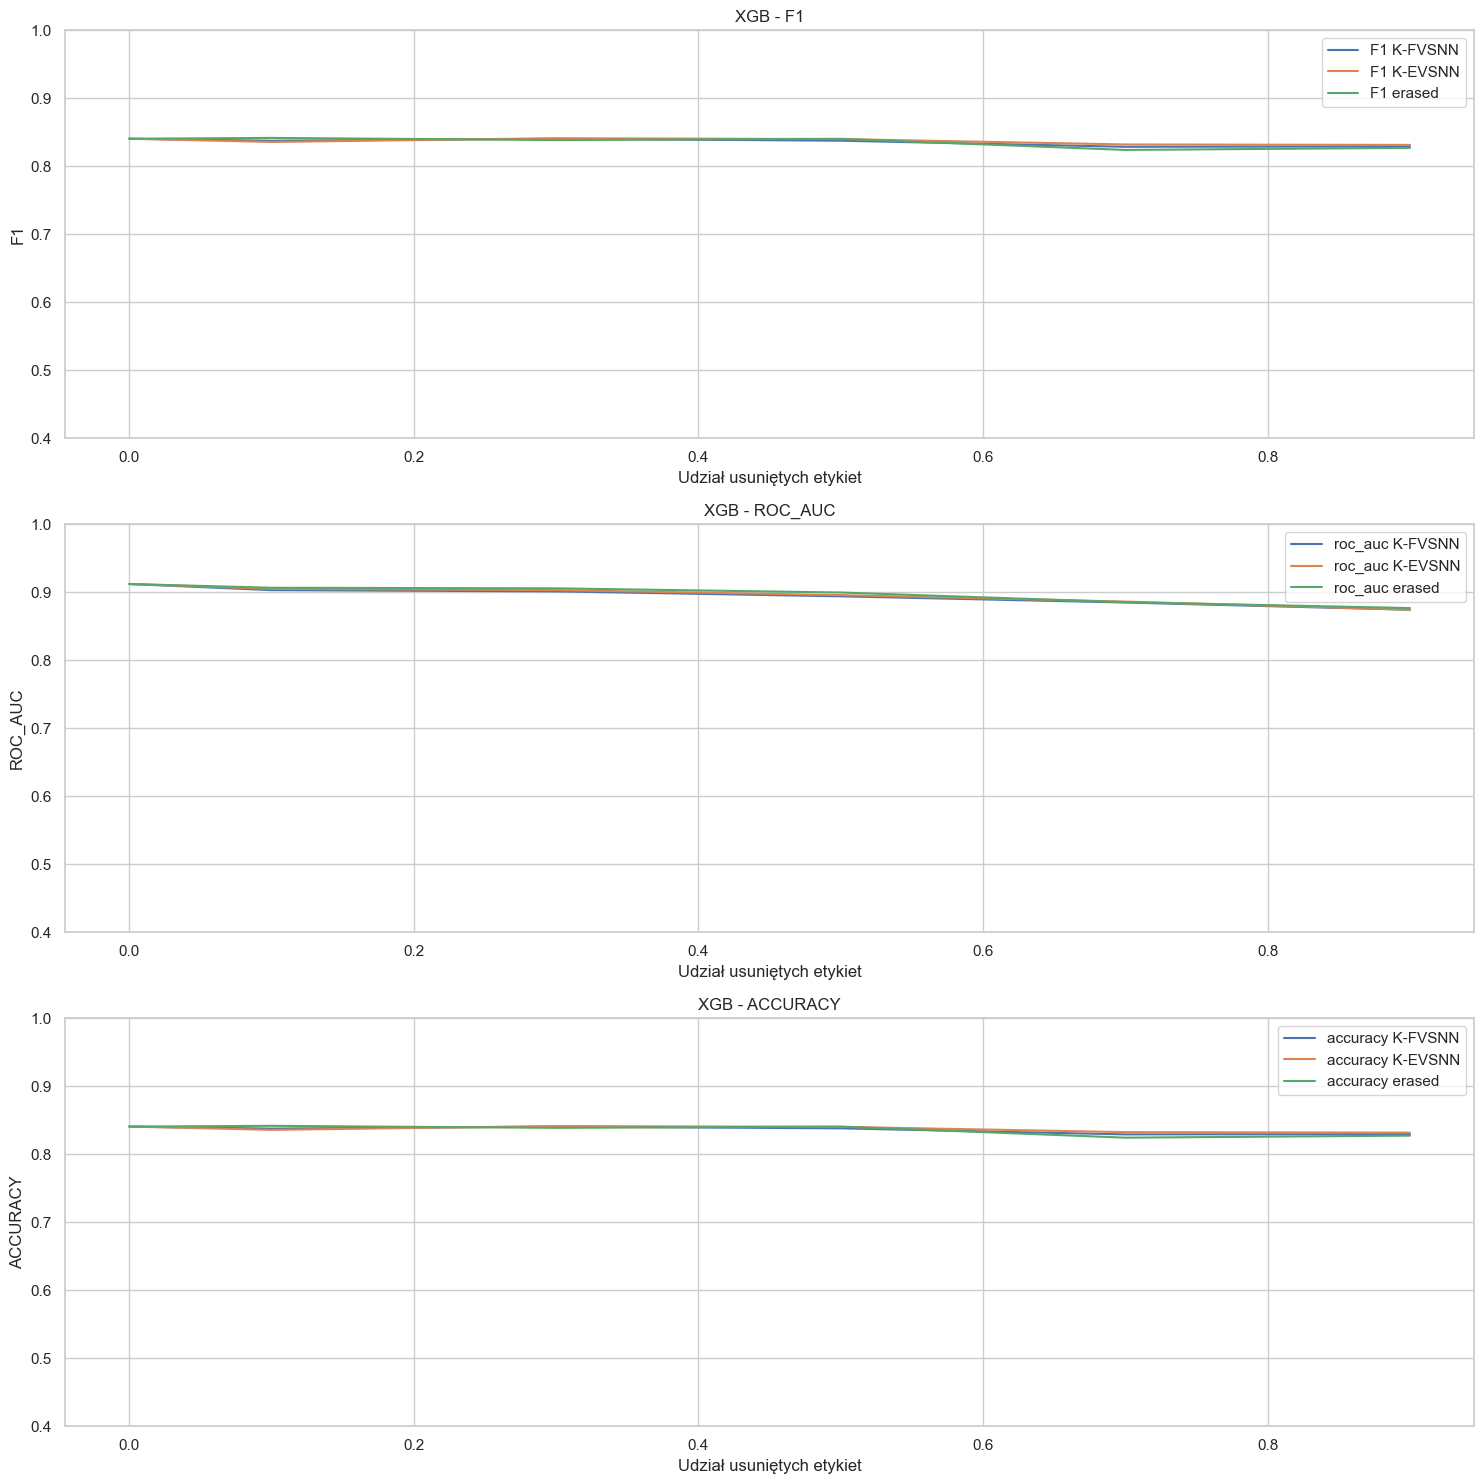

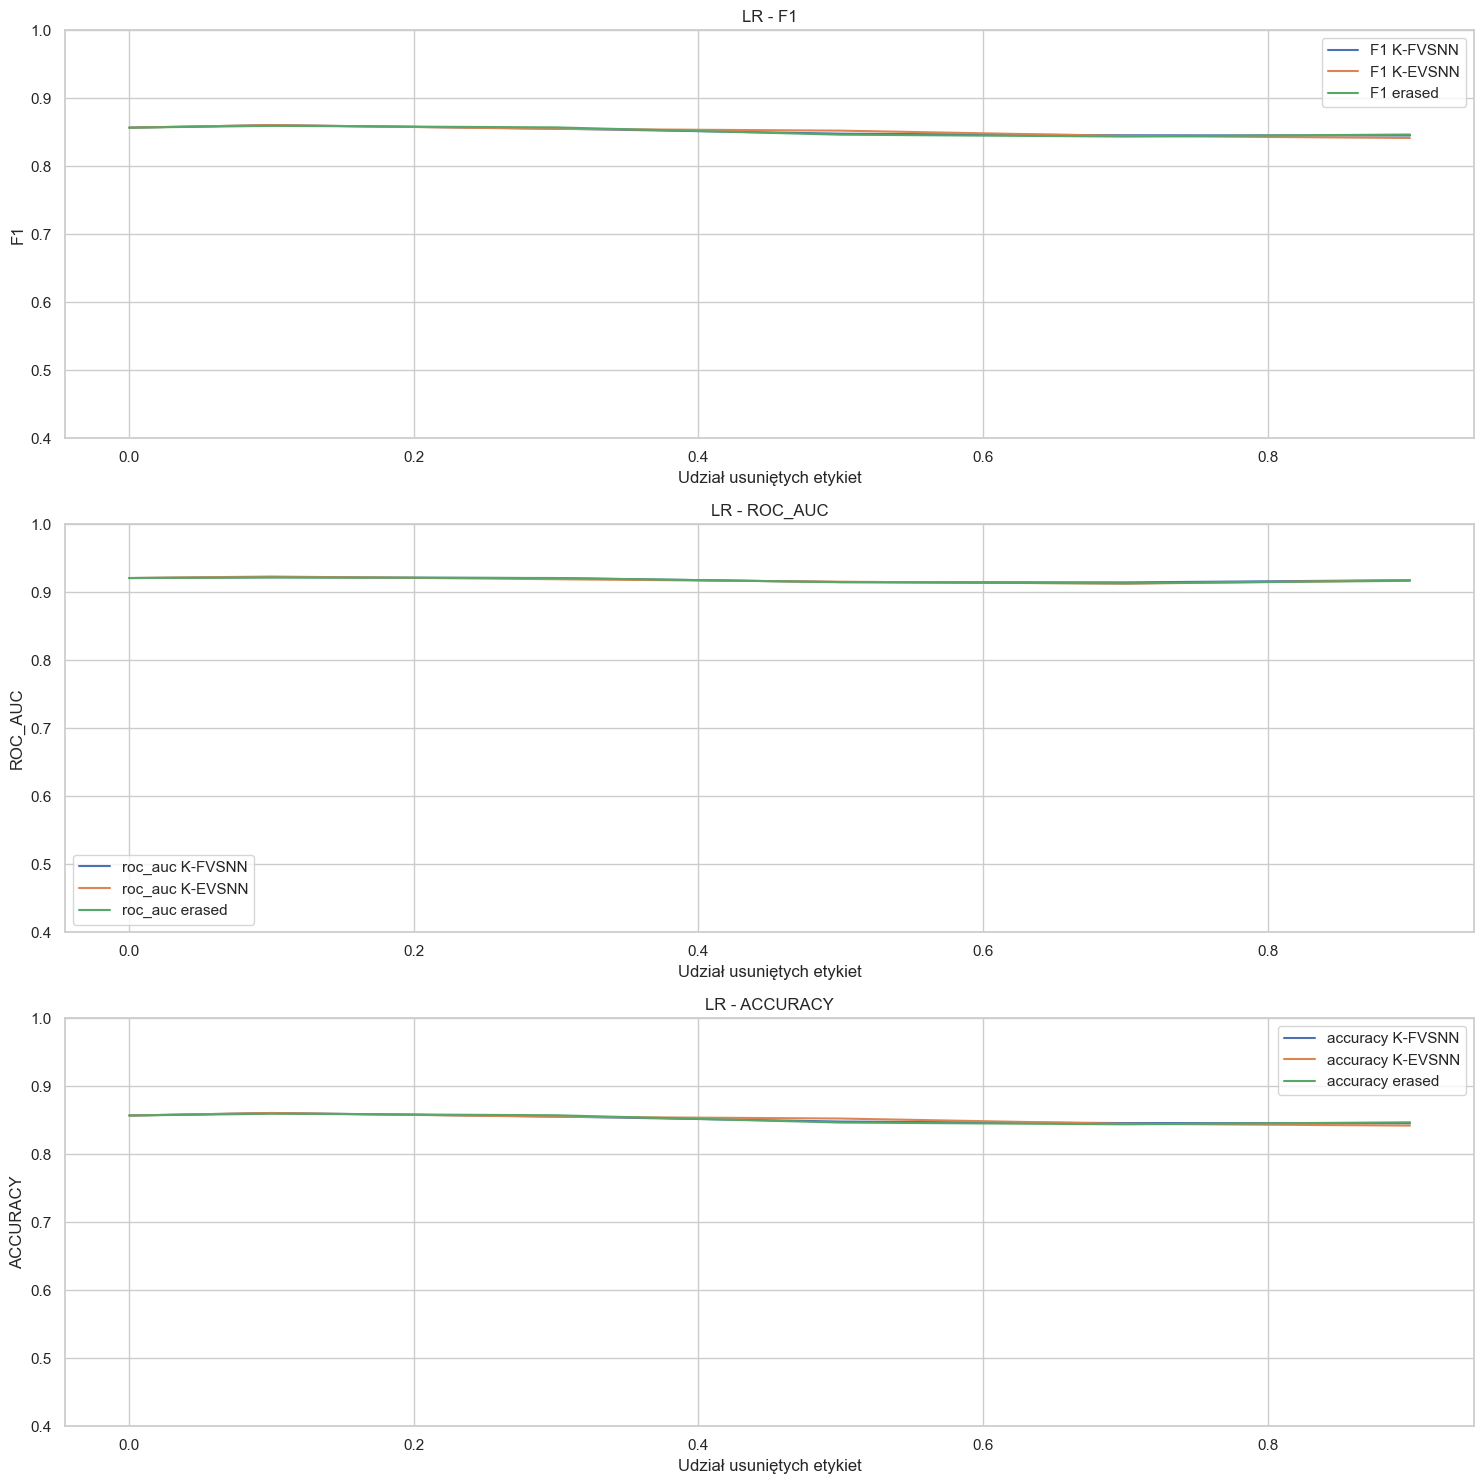

In [174]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_raisin[mean_results_df_raisin['classifier'] == clf]['fraction'],
                     mean_results_df_raisin[mean_results_df_raisin['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)
        
        plt.ylim(0.4, 1)
        plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [175]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_raisin[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_raisin[mean_std_results_df_raisin[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
4       0.1         lr    0.860571        0.022163

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
4       0.1         lr    0.860591        0.025441

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
4       0.1         lr   0.859459       0.020311

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
4       0.1         lr         0.922202             0.015709

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
4       0.1         lr         0.923204              0.01606

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
4       0.1         lr        0.921825            0.016031

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
4       0.1         lr          0.860741              0.022029

Max accuracy for K-EVSNN:
   fraction classi

In [40]:
results_df_raisin=pd.read_csv("...\\results_df_raisin.csv")
mean_results_df_raisin=pd.read_csv("...\\mean_results_df_raisin.csv")
mean_std_results_df_raisin=pd.read_csv("...\\mean_std_results_df_raisin.csv")

In [41]:
def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_raisin.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.832 (0.025)  0.884 (0.021)   0.832 (0.025)
1         lr  0.857 (0.022)  0.921 (0.016)   0.857 (0.022)
2        xgb  0.841 (0.019)  0.912 (0.017)   0.841 (0.019)


In [45]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.838 (0.021)   0.903 (0.016)    0.838 (0.021)   
8        0.3        xgb  0.841 (0.022)   0.901 (0.017)    0.841 (0.022)   
11       0.5        xgb  0.838 (0.018)   0.894 (0.017)    0.838 (0.018)   
14       0.7        xgb  0.829 (0.022)   0.885 (0.023)    0.829 (0.022)   
17       0.9        xgb  0.829 (0.026)   0.874 (0.026)    0.830 (0.026)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.836 (0.017)   0.905 (0.014)    0.836 (0.016)  0.842 (0.018)   
8   0.841 (0.019)   0.903 (0.016)    0.841 (0.019)  0.839 (0.020)   
11  0.840 (0.017)   0.896 (0.017)    0.840 (0.017)  0.840 (0.017)   
14  0.832 (0.017)   0.886 (0.017)    0.833 (0.016)  0.824 (0.019)   
17  0.831 (0.021)   0.874 (0.025)    0.832 (0.021)  0.827 (0.021)   

   roc_auc erased accuracy erased  
5   0.907 (0.016)   0.842 (0.018)  
8   0.906 (0.016)   0.839 (0.020)  
11  0.900 (0.015)   0.841 

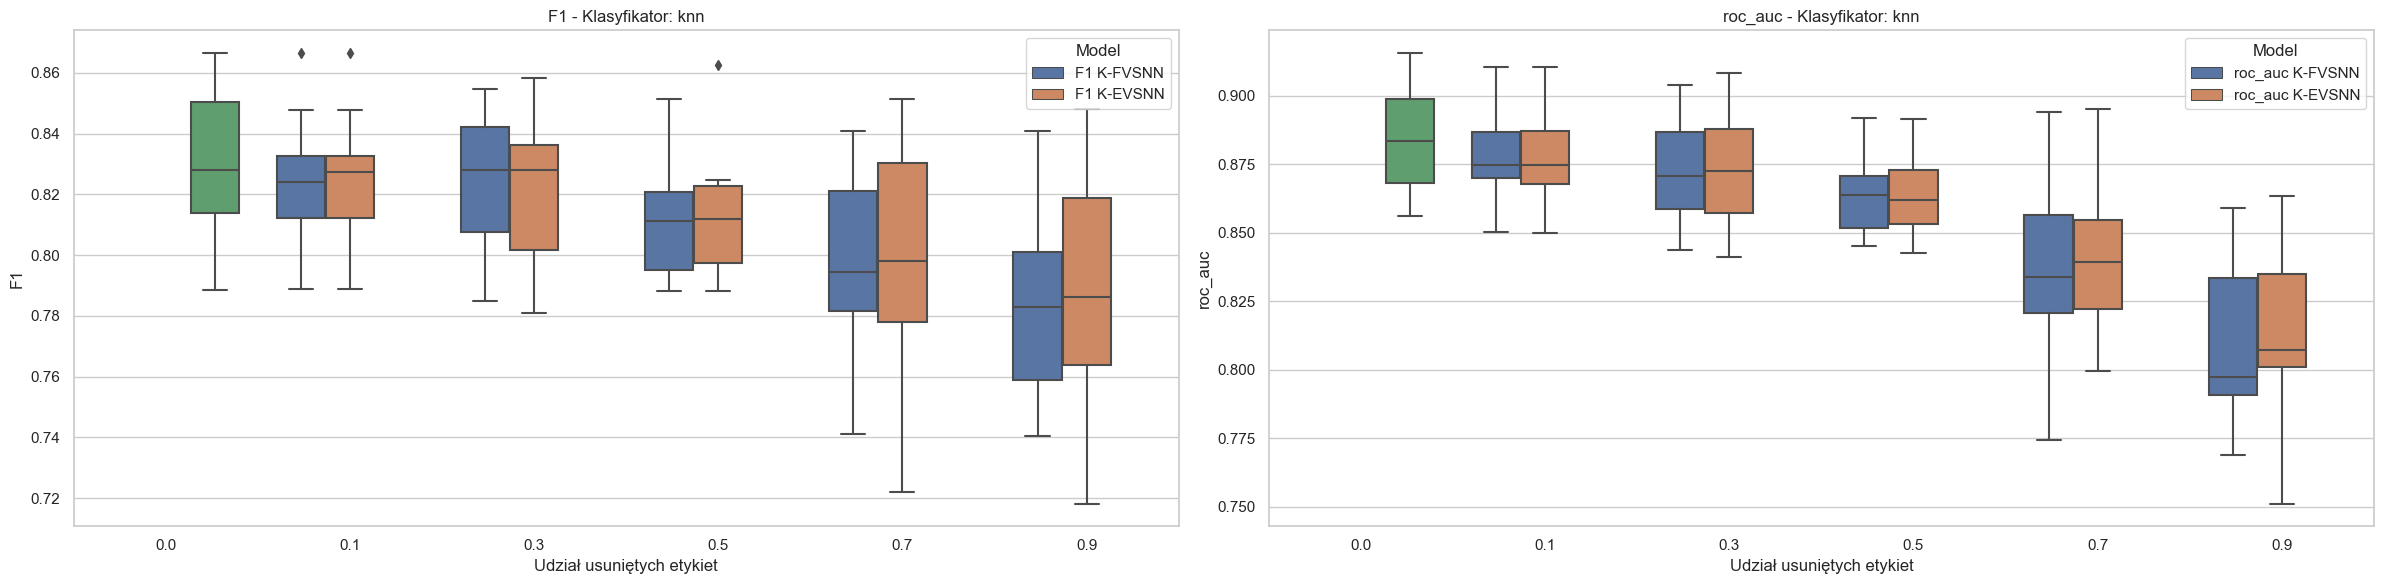

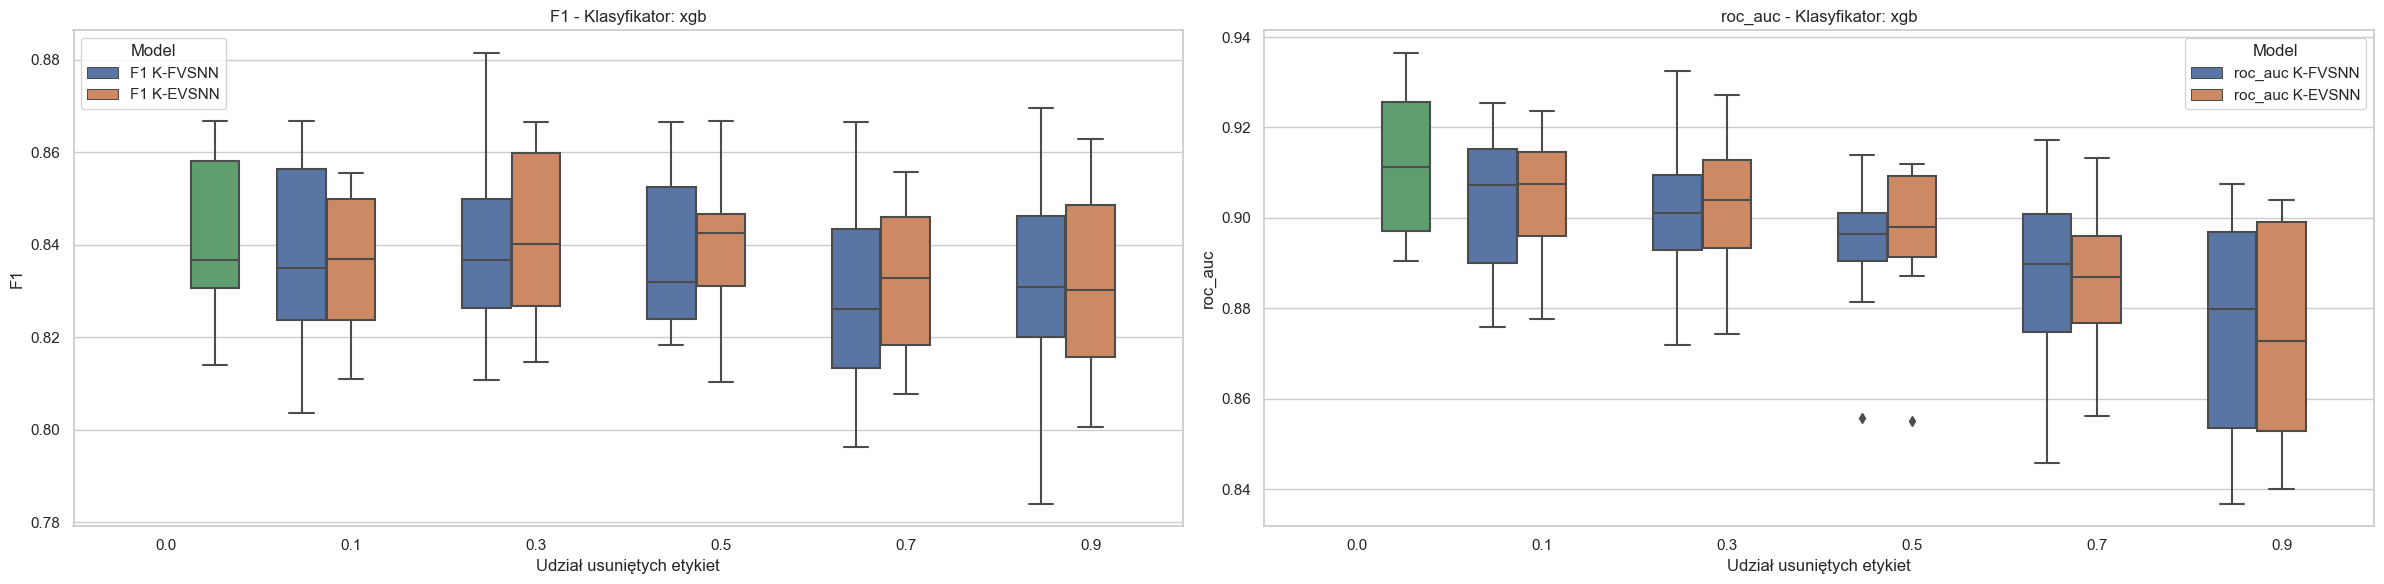

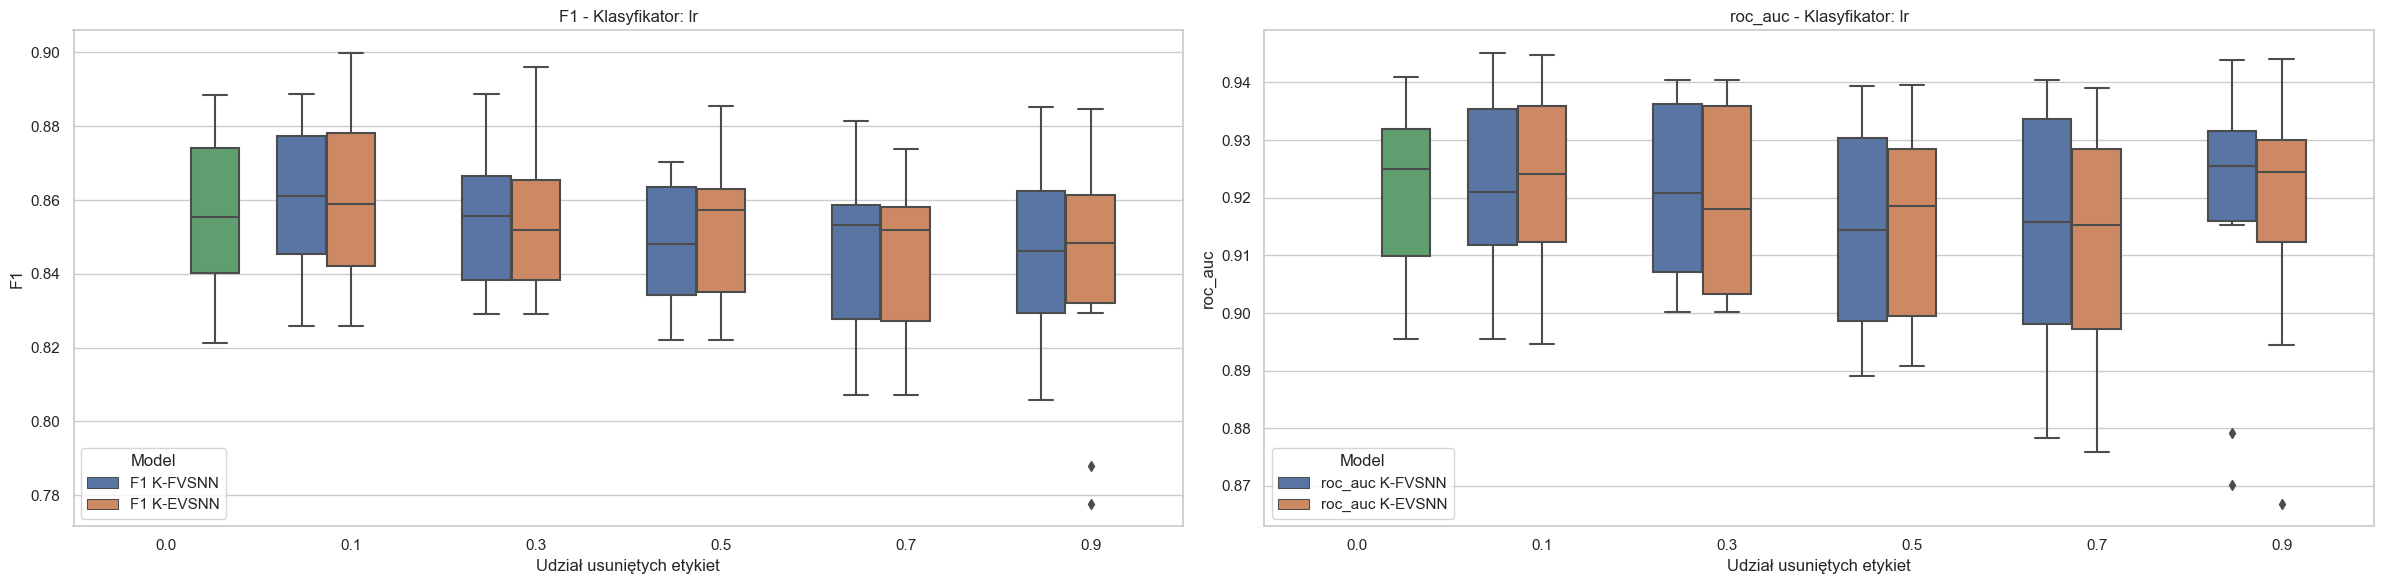

In [83]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_raisin[results_df_raisin['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [55]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(raisin, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_raisin = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_raisin = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

print(results_df_test_raisin.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_raisin.nlargest(10, 'F1 K-erased'))

print(results_df_valid_raisin.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_raisin.nlargest(10, 'F1 erased'))

     distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
7                -2          -1             0         10    0.933333   
25               -1          -2            -2         10    0.922270   
50                0          -2            -2         10    0.922270   
110               2           0            -2         10    0.922270   
76                1          -2            -1         10    0.922155   
8                -2          -1             1         10    0.911199   
35               -1           0            -2         10    0.911199   
39               -1           0             2         10    0.911199   
48               -1           2             1         10    0.911199   
52                0          -2             0         10    0.911199   

     F1 K-EVSNN  F1 K-erased  
7      0.900062      0.92227  
25     0.900062      0.92227  
50     0.900062      0.92227  
110    0.900062      0.92227  
76     0.900062      0.92227  
8      0.900062      

#### Wisconsin (5)

In [188]:
wisconsin['class'].value_counts()

class
0    357
1    212
Name: count, dtype: int64

In [163]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(wisconsin, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_wisconsin = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_wisconsin = results_df_wisconsin.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_wisconsin = results_df_wisconsin.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_wisconsin = pd.merge(mean_results_df_wisconsin, std_results_df_wisconsin, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_wisconsin)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.934125         0.963394          0.934503   
1        0.0         lr    0.953650         0.993318          0.953801   
2        0.0        xgb    0.966646         0.994434          0.966667   
3        0.1        knn    0.933452         0.963236          0.933918   
4        0.1         lr    0.953637         0.992946          0.953801   
5        0.1        xgb    0.964912         0.993009          0.964912   
6        0.3        knn    0.935781         0.959708          0.936257   
7        0.3         lr    0.955382         0.992271          0.955556   
8        0.3        xgb    0.954980         0.991408          0.954971   
9        0.5        knn    0.930248         0.949864          0.930994   
10       0.5         lr    0.953564         0.989646          0.953801   
11       0.5        xgb    0.950287         0.991342          0.950292   
12       0.7        knn    0.917008   

In [187]:
results_df_wisconsin.to_csv('results_df_wisconsin.csv', index=False)
mean_results_df_wisconsin.to_csv('mean_results_df_wisconsin.csv', index=False)
mean_std_results_df_wisconsin.to_csv('mean_std_results_df_wisconsin.csv', index=False)

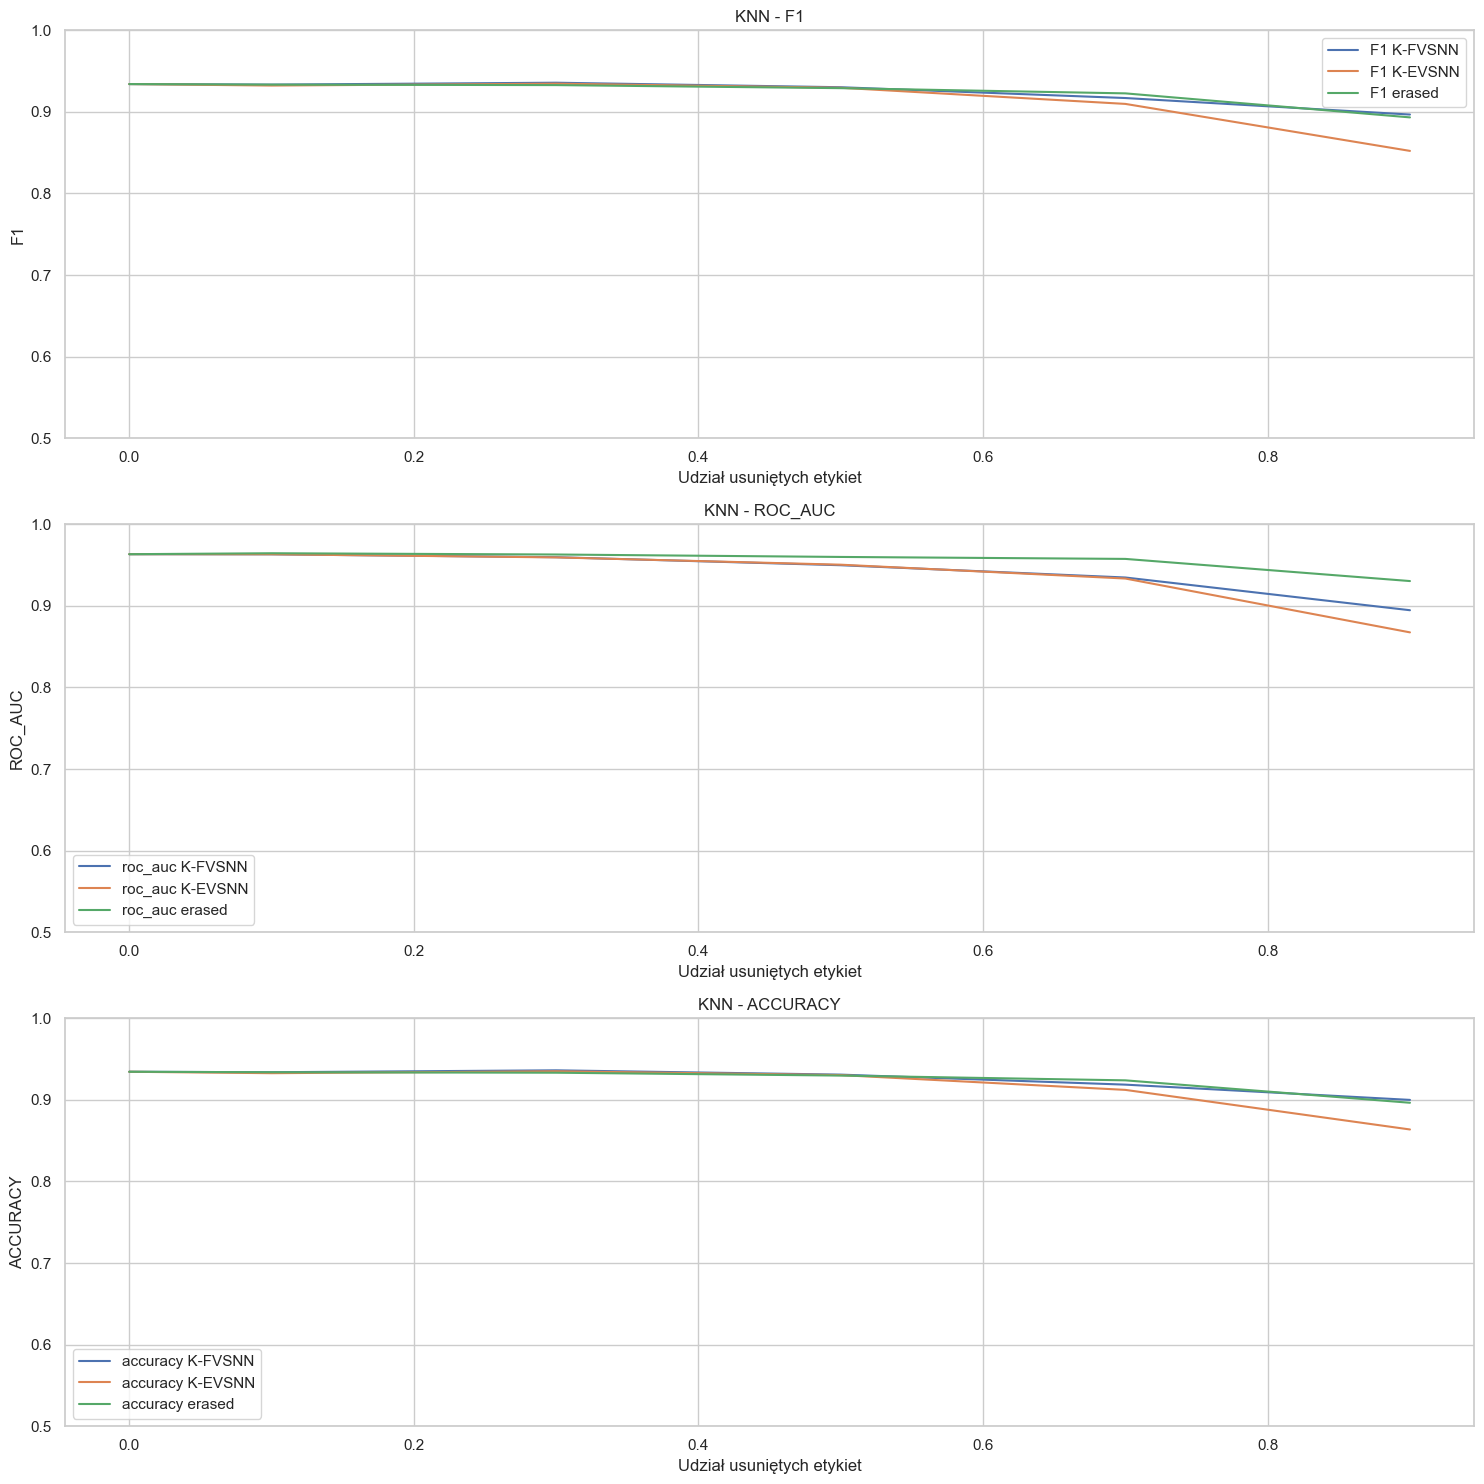

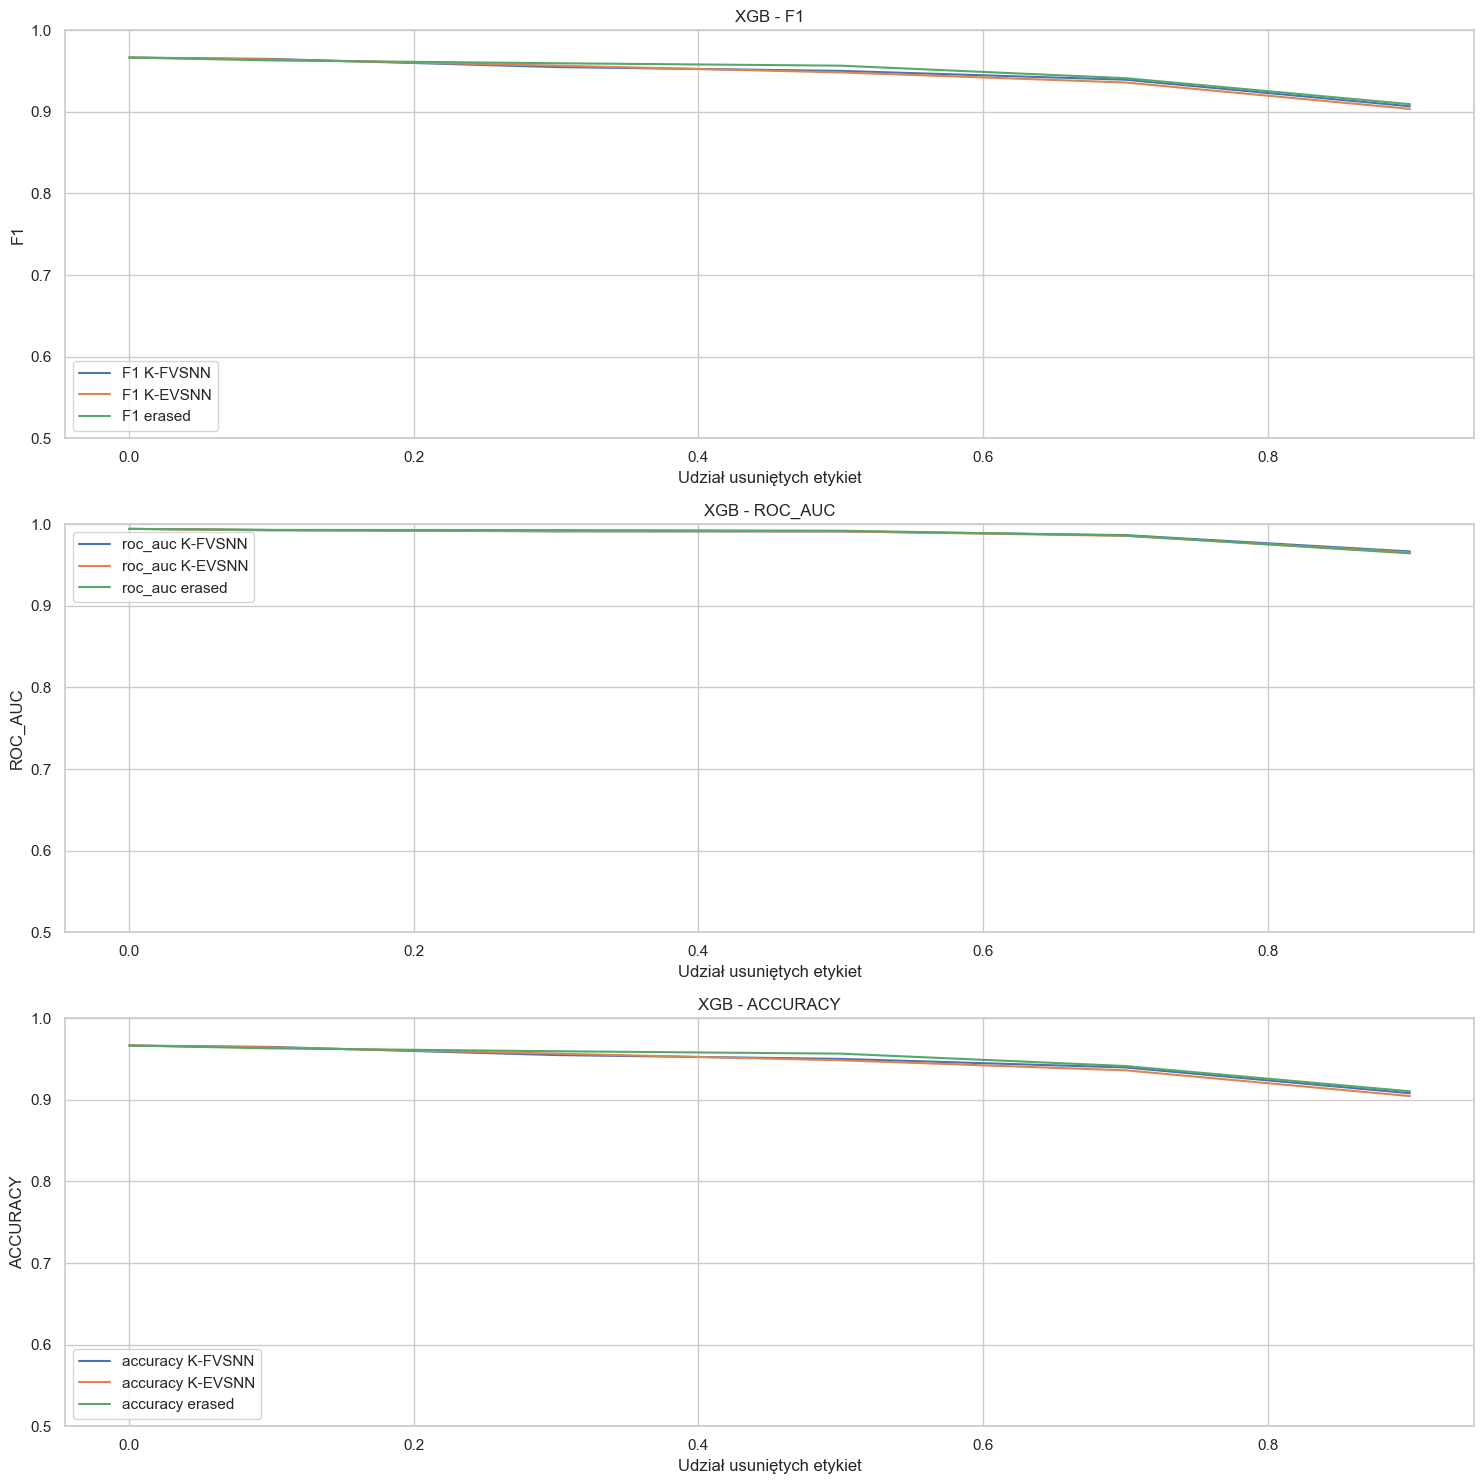

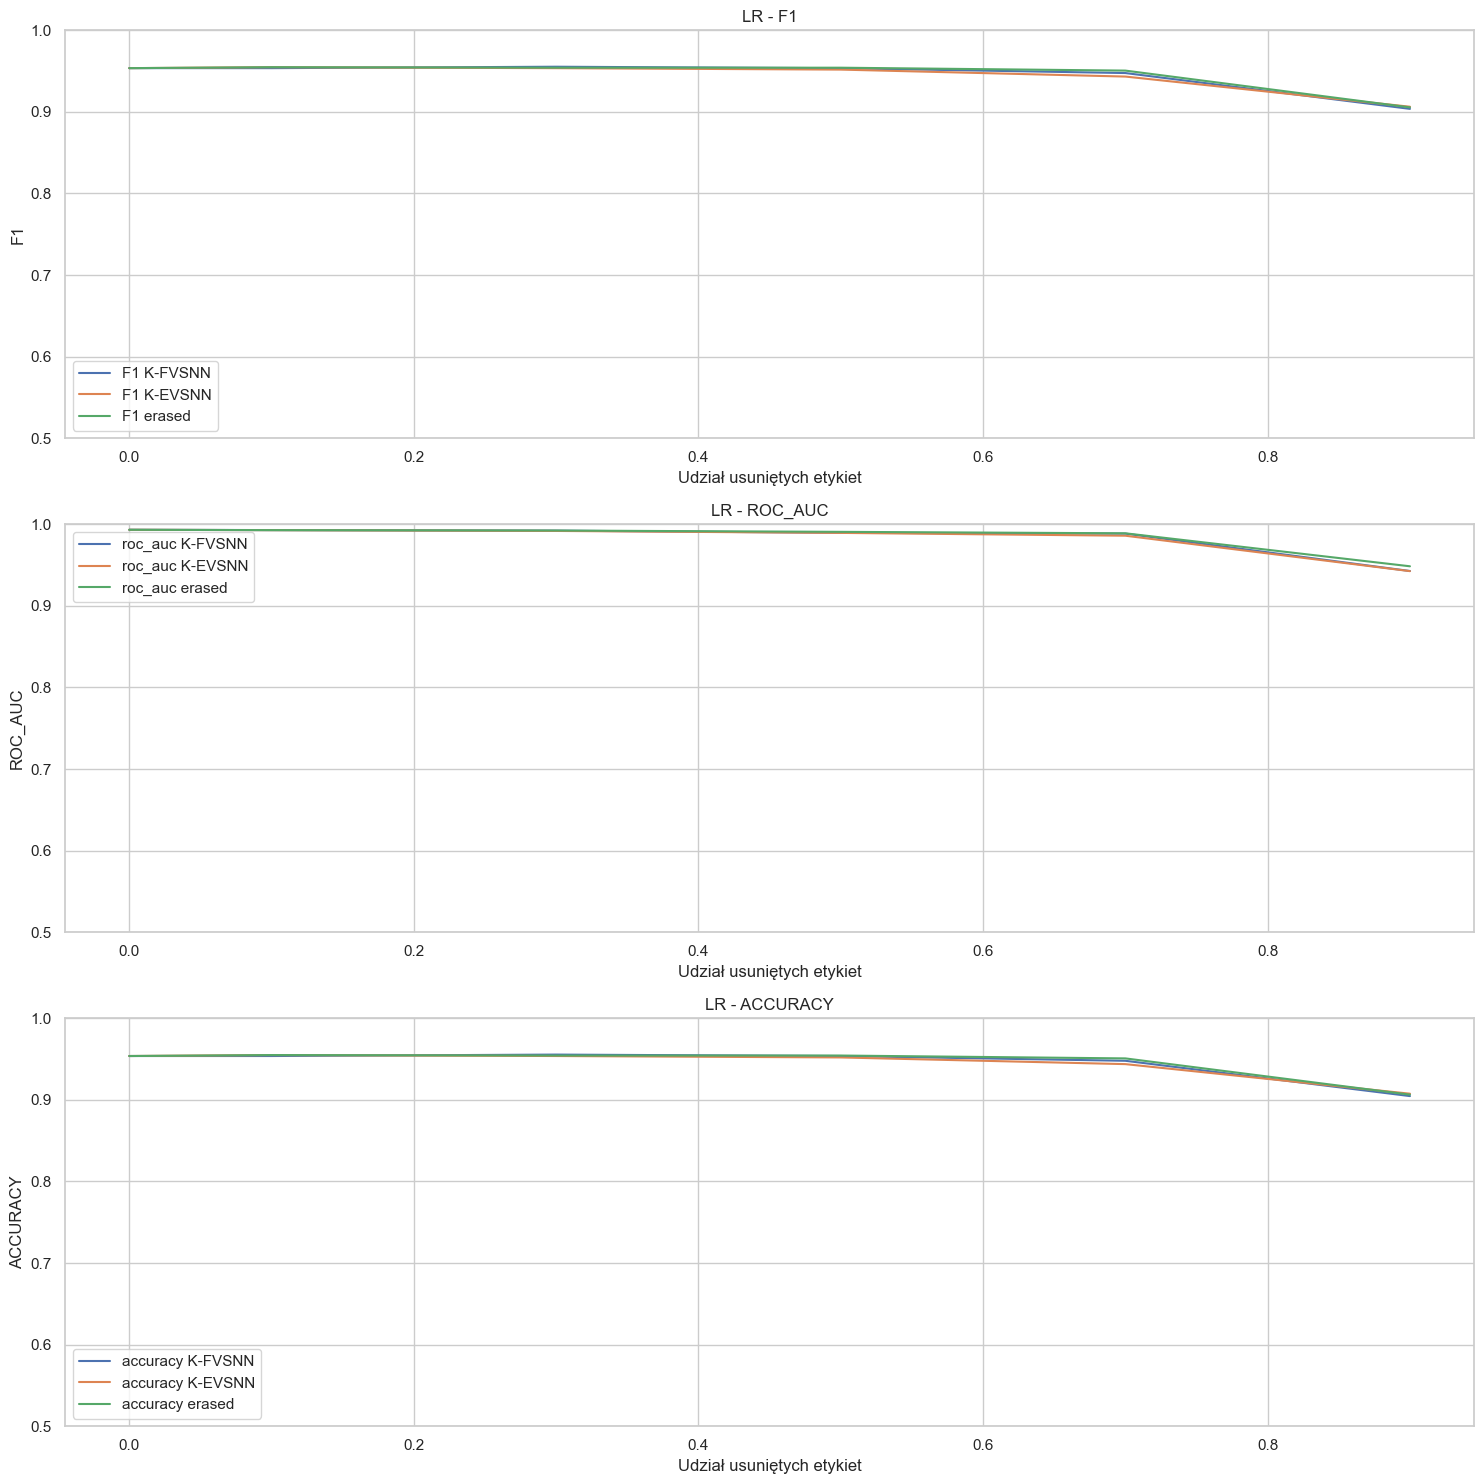

In [164]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_wisconsin[mean_results_df_wisconsin['classifier'] == clf]['fraction'],
                     mean_results_df_wisconsin[mean_results_df_wisconsin['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)
        
        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [165]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_wisconsin[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_wisconsin[mean_std_results_df_wisconsin[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
2       0.0        xgb    0.966646         0.01359

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
2       0.0        xgb    0.966646         0.01359

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
2       0.0        xgb   0.966646        0.01359

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
2       0.0        xgb         0.994434             0.004679

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
2       0.0        xgb         0.994434             0.004679

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb        0.994434            0.004679

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
2       0.0        xgb          0.966667              0.013519

Max accuracy for K-EVSNN:
   fraction classi

In [46]:
results_df_wisconsin=pd.read_csv("...\\results_df_wisconsin.csv")
mean_results_df_wisconsin=pd.read_csv("...\\mean_results_df_wisconsin.csv")
mean_std_results_df_wisconsin=pd.read_csv("...\\mean_std_results_df_wisconsin.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_wisconsin.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.934 (0.015)  0.963 (0.016)   0.935 (0.015)
1         lr  0.954 (0.016)  0.993 (0.003)   0.954 (0.016)
2        xgb  0.967 (0.014)  0.994 (0.005)   0.967 (0.014)


In [49]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.965 (0.014)   0.993 (0.005)    0.965 (0.014)   
8        0.3        xgb  0.955 (0.016)   0.991 (0.005)    0.955 (0.016)   
11       0.5        xgb  0.950 (0.017)   0.991 (0.006)    0.950 (0.017)   
14       0.7        xgb  0.939 (0.022)   0.987 (0.006)    0.940 (0.022)   
17       0.9        xgb  0.907 (0.035)   0.967 (0.026)    0.908 (0.034)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.964 (0.014)   0.993 (0.005)    0.964 (0.014)  0.963 (0.011)   
8   0.957 (0.017)   0.992 (0.005)    0.957 (0.017)  0.960 (0.016)   
11  0.948 (0.022)   0.991 (0.005)    0.949 (0.022)  0.957 (0.022)   
14  0.936 (0.016)   0.986 (0.007)    0.936 (0.015)  0.941 (0.017)   
17  0.904 (0.026)   0.965 (0.029)    0.905 (0.026)  0.909 (0.031)   

   roc_auc erased accuracy erased  
5   0.993 (0.004)   0.963 (0.011)  
8   0.993 (0.006)   0.960 (0.015)  
11  0.992 (0.007)   0.957 

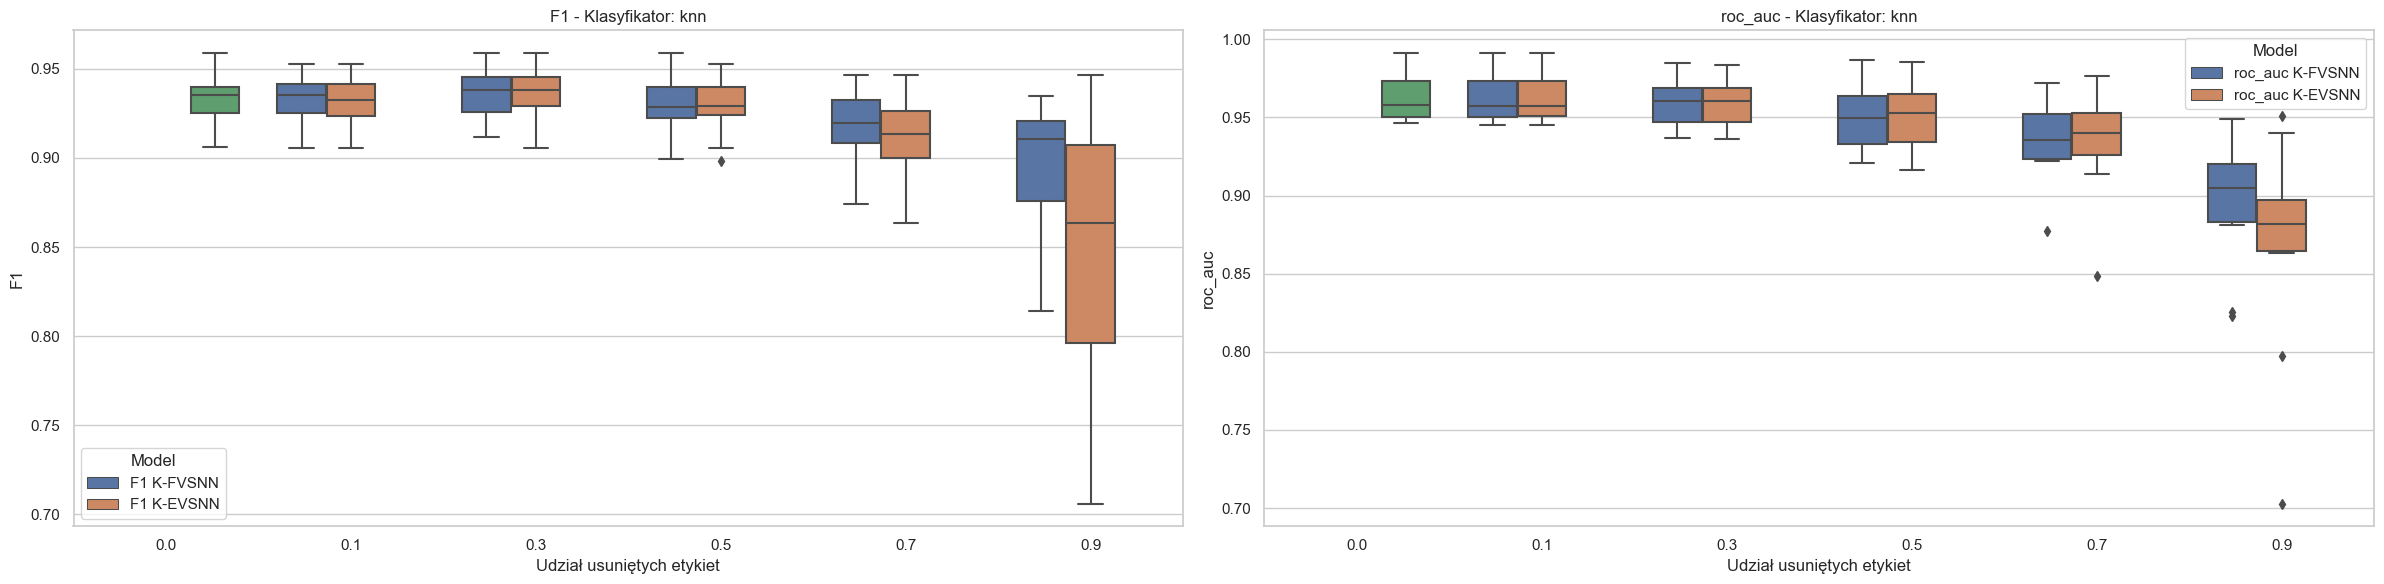

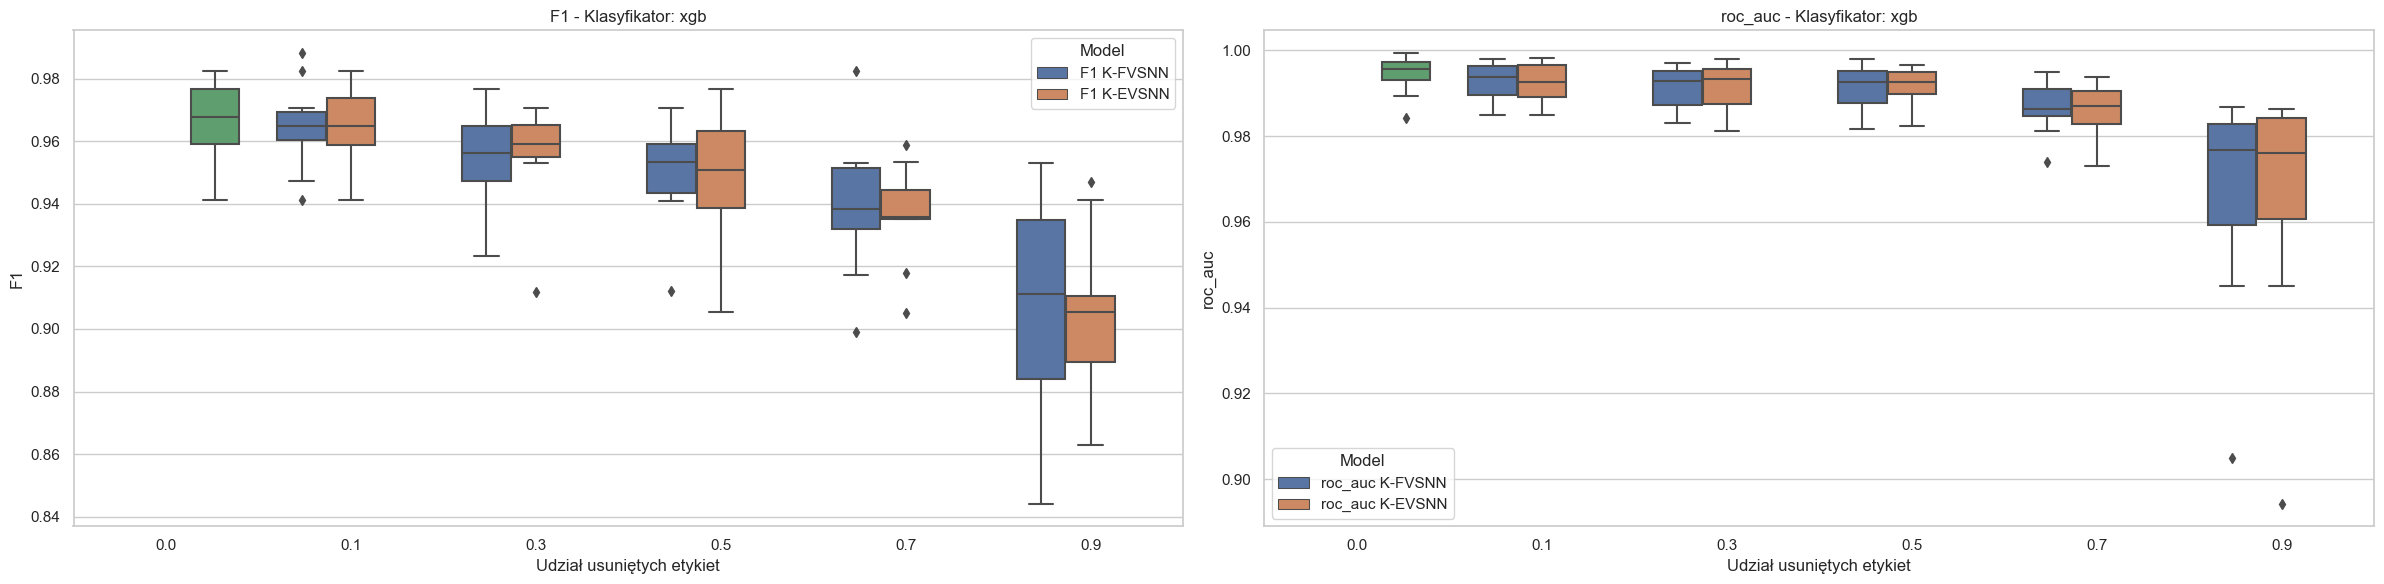

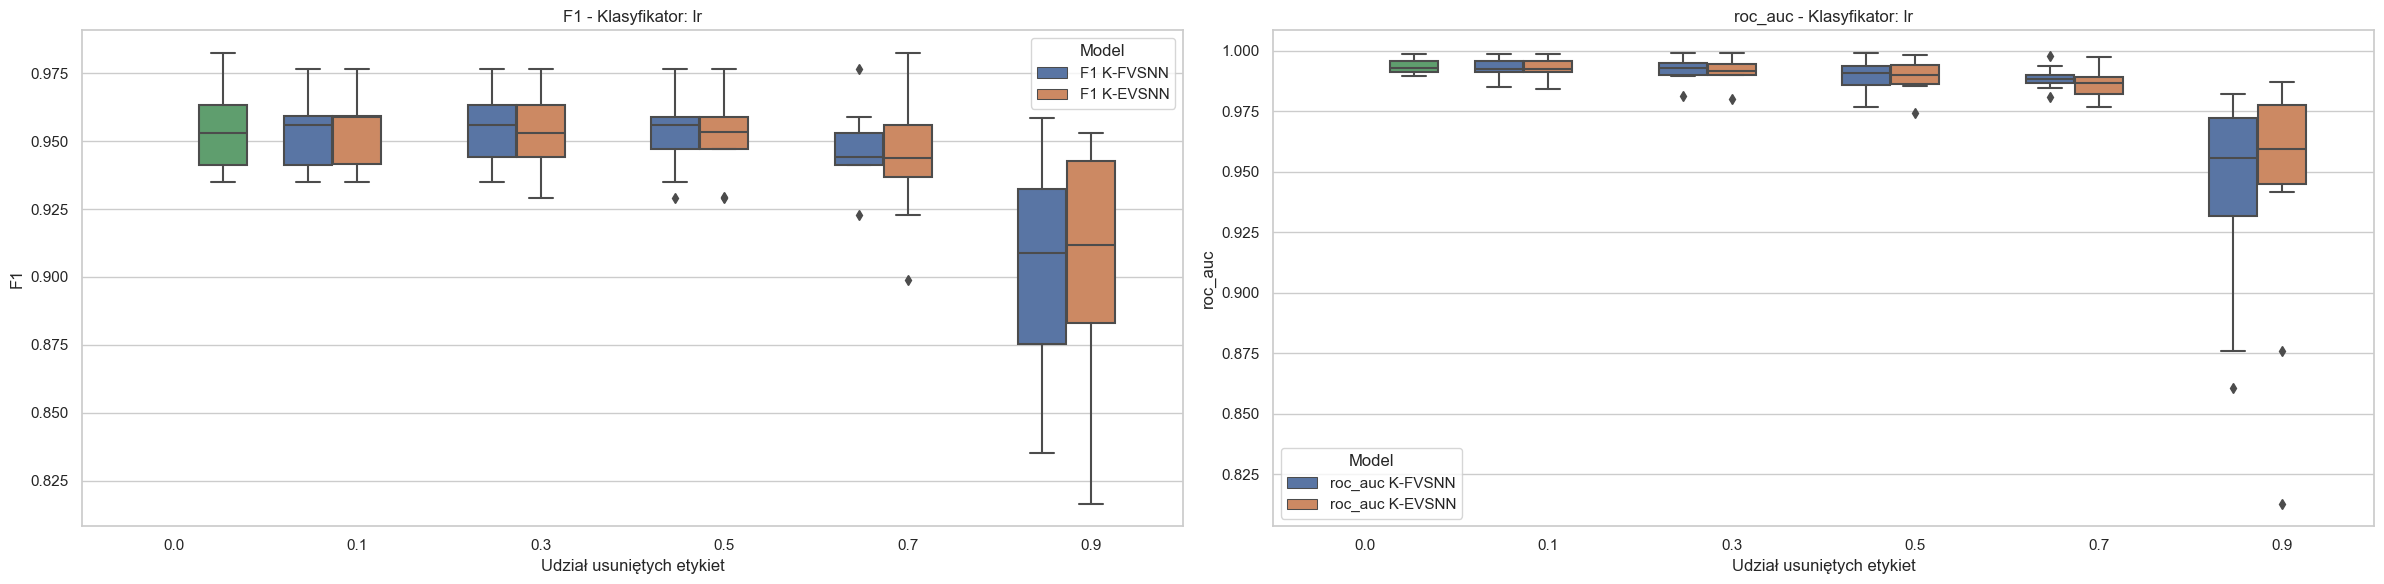

In [84]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_wisconsin[results_df_wisconsin['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [49]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(wisconsin, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            
                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_wisconsin = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_wisconsin = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 4h 28min 18s
Wall time: 7h 42min 28s


In [50]:
print(results_df_test_wisconsin.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_wisconsin.nlargest(10, 'F1 K-erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
18              -2           1             1         10    1.000000   
21              -2           2            -1         10    1.000000   
97               1           2             0         10    1.000000   
7               -2          -1             0         10    0.982550   
0               -2          -2            -2         10    0.982348   
2               -2          -2             0         10    0.982348   
3               -2          -2             1         10    0.982348   
4               -2          -2             2         10    0.982348   
12              -2           0             0         10    0.982348   
15              -2           1            -2         10    0.982348   

    F1 K-EVSNN  F1 K-erased  
18    0.964451     0.982348  
21    0.964451     0.982348  
97    0.964451     0.982348  
7     0.964451     0.982348  
0     0.964451     0.982348  
2     0.964451     0.982348  
3     0.

In [51]:
print(results_df_valid_wisconsin.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_wisconsin.nlargest(10, 'F1 erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
1               -2          -2            -1         10         1.0   
11              -2           0            -1         10         1.0   
16              -2           1            -1         10         1.0   
17              -2           1             0         10         1.0   
18              -2           1             1         10         1.0   
81               1          -1            -1         10         1.0   
82               1          -1             0         10         1.0   
86               1           0            -1         10         1.0   
91               1           1            -1         10         1.0   
99               1           2             2         10         1.0   

    F1 K-EVSNN  F1 erased  
1     0.964977   0.982423  
11    0.964977   0.982423  
16    0.964977   0.982423  
17    0.964977   0.982423  
18    0.964977   0.982423  
81    0.964977   0.982423  
82    0.964977   0.982

#### Rice (?)

In [172]:
rice['class'].value_counts()

class
1    2180
0    1630
Name: count, dtype: int64

In [176]:
rice_small, _ = train_test_split(rice, test_size=0.4,
                                     random_state=2024)

In [177]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10  

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(rice_small, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_rice = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_rice = results_df_rice.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_rice = results_df_rice.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_rice = pd.merge(mean_results_df_rice, std_results_df_rice, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_rice)

KeyboardInterrupt: 

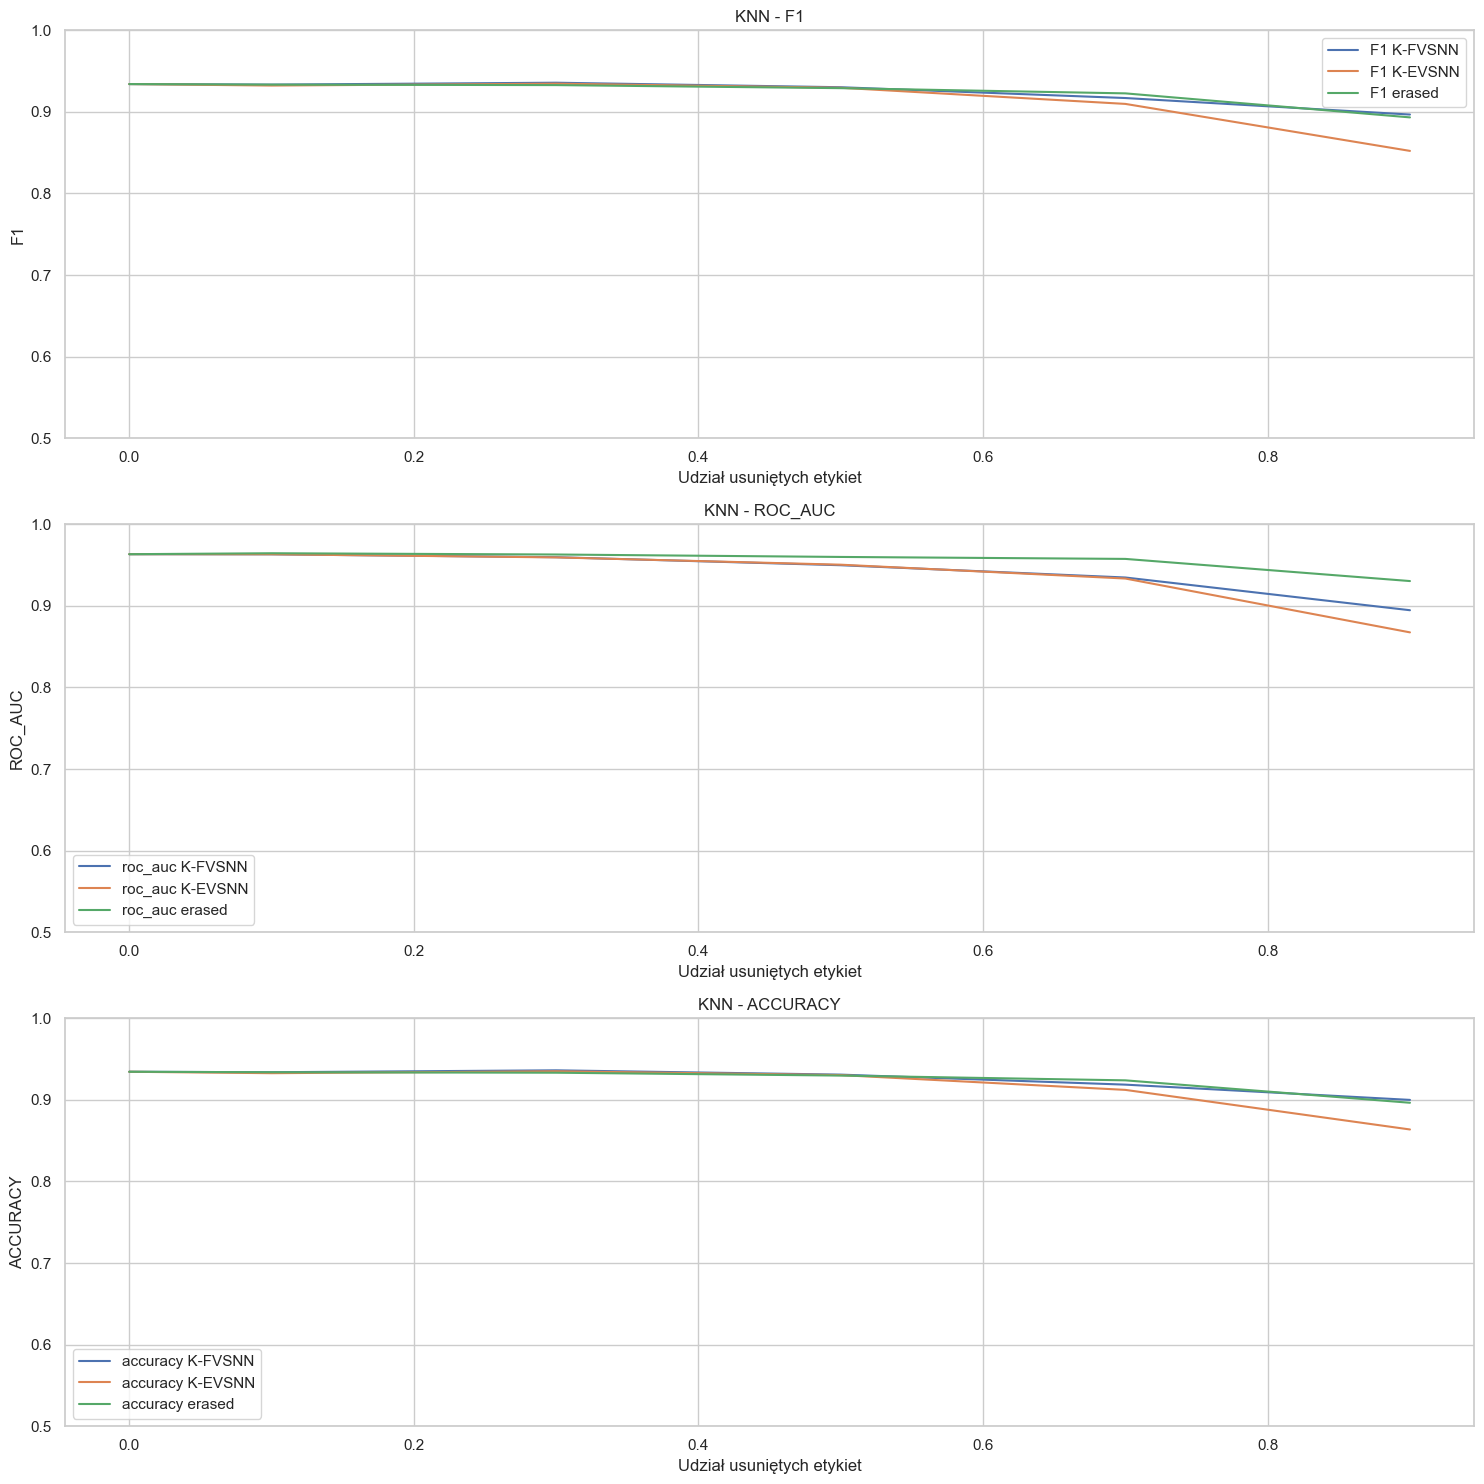

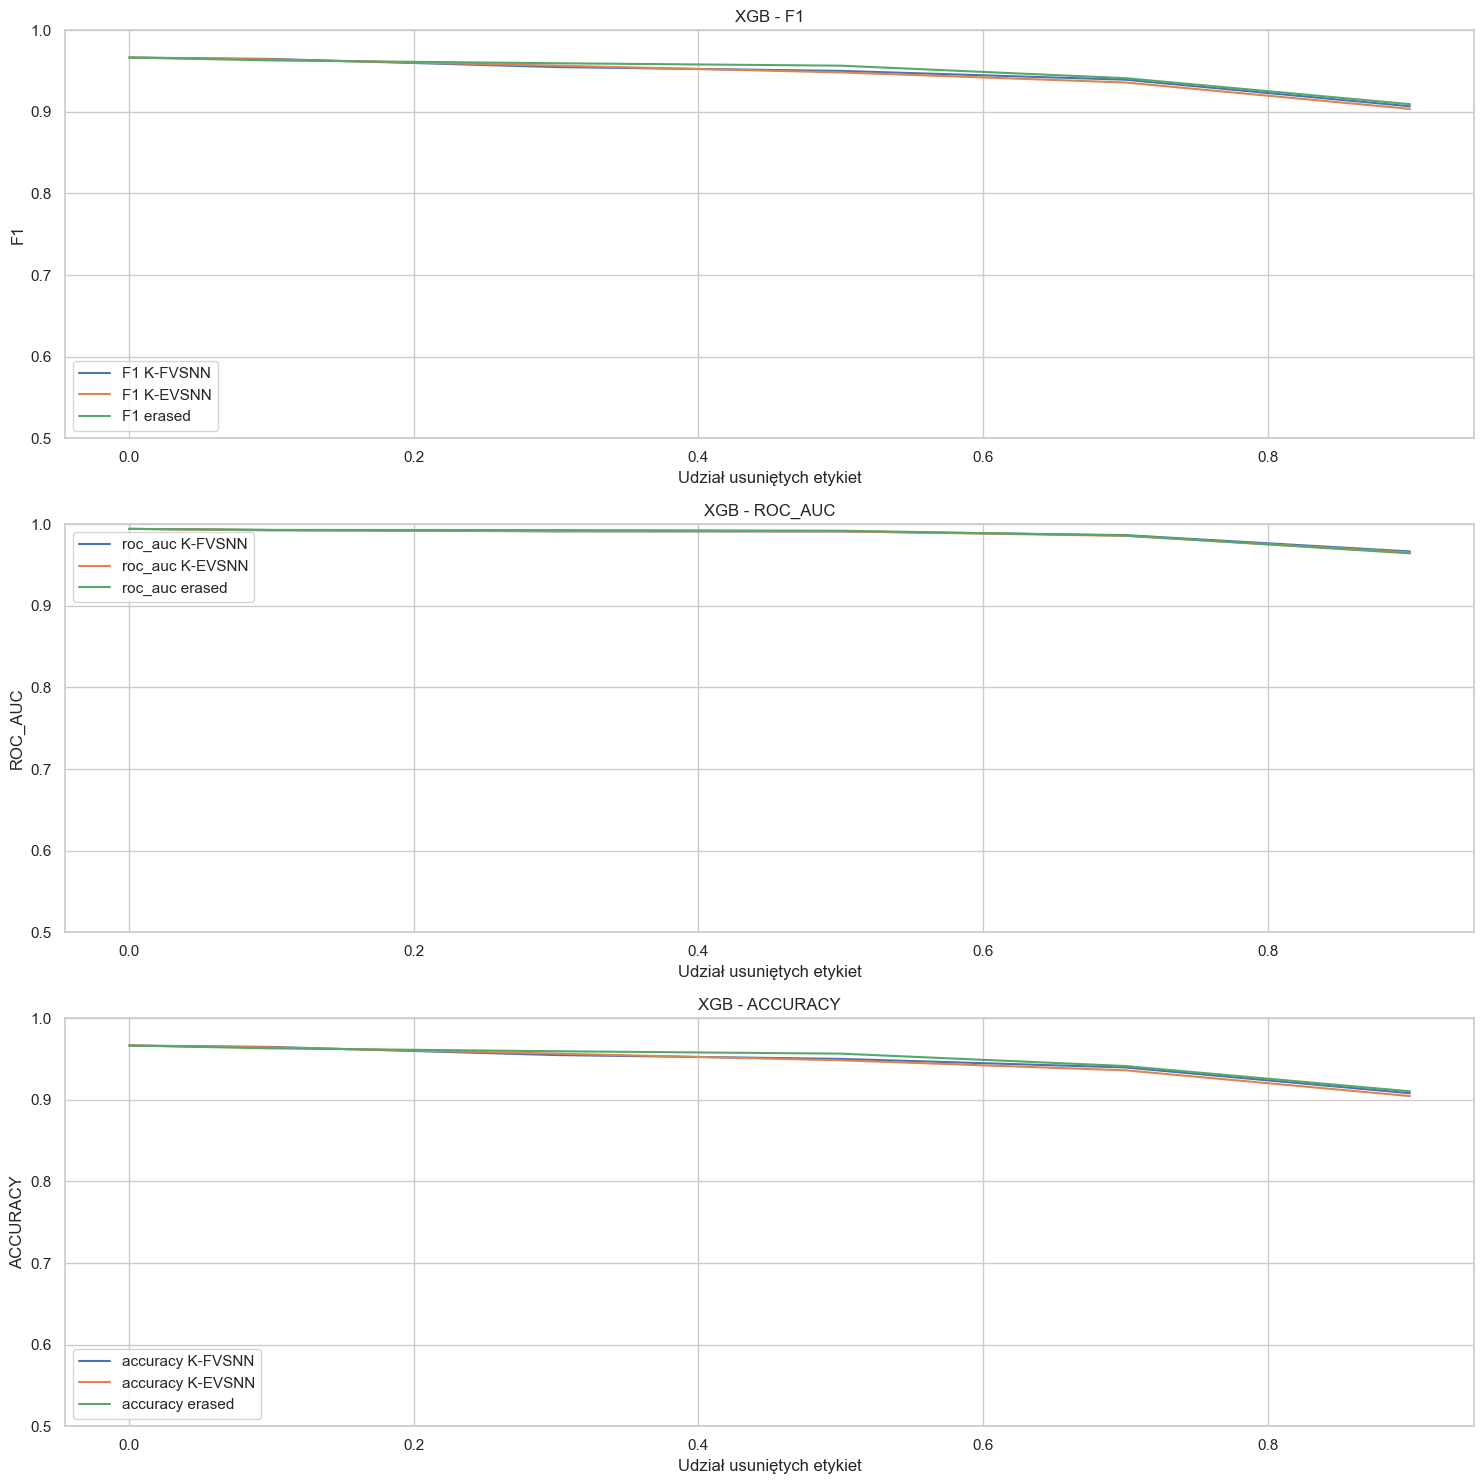

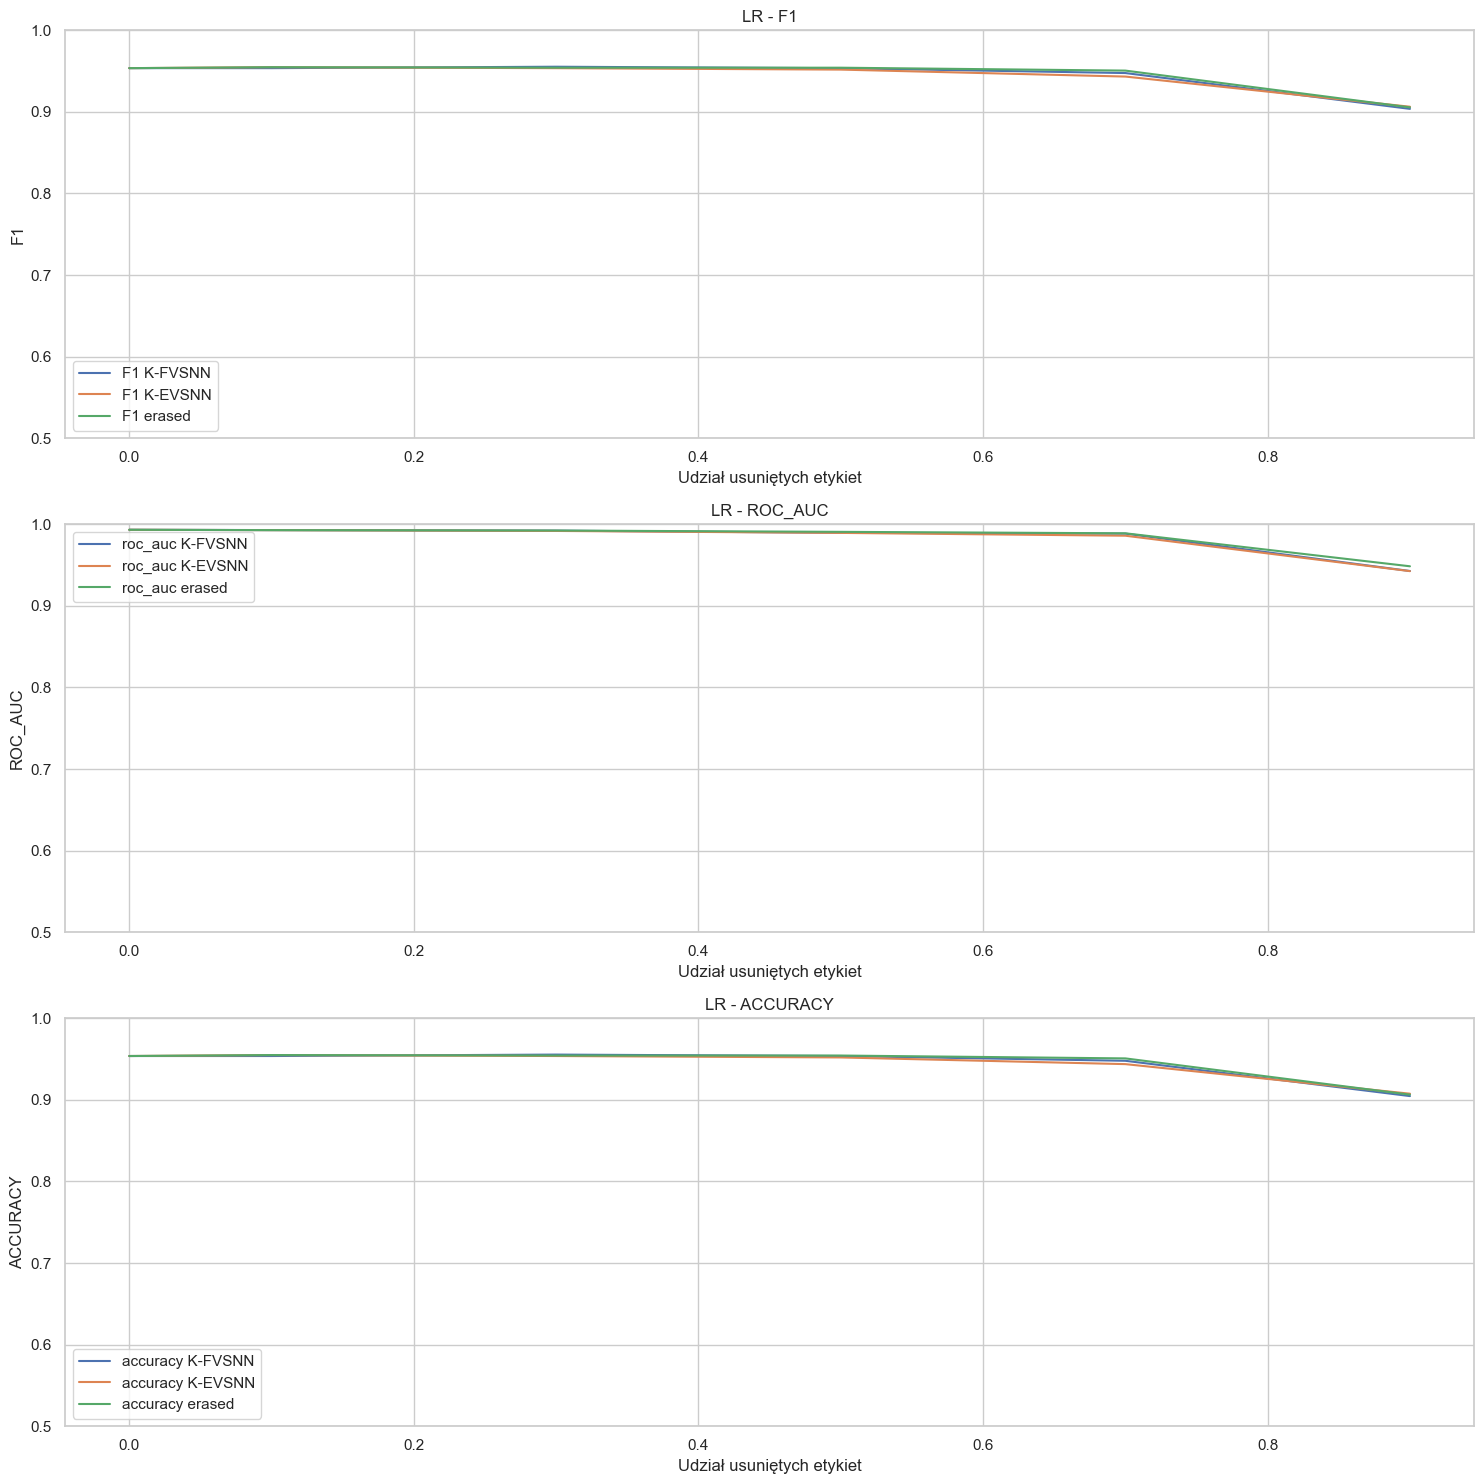

In [178]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_wisconsin[mean_results_df_wisconsin['classifier'] == clf]['fraction'],
                     mean_results_df_wisconsin[mean_results_df_wisconsin['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [179]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_rice[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_rice[mean_std_results_df_rice[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

NameError: name 'mean_std_results_df_rice' is not defined

In [57]:
%%time

rice_small, _ = train_test_split(rice, test_size=0.4,
                                     random_state=2024)

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(rice_small, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_rice = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_rice = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

print(results_df_test_rice.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_rice.nlargest(10, 'F1 K-erased'))

print(results_df_valid_rice.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_rice.nlargest(10, 'F1 erased'))

KeyboardInterrupt: 

#### Credit Approval (6)

In [166]:
cred_approv['class'].value_counts()

class
1    367
0    299
Name: count, dtype: int64

In [167]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(cred_approv, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_cred = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_cred = results_df_cred.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_cred = results_df_cred.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_cred = pd.merge(mean_results_df_cred, std_results_df_cred, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_cred)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.687418         0.727913            0.6895   
1        0.0         lr    0.873049         0.933159            0.8725   
2        0.0        xgb    0.871767         0.930960            0.8715   
3        0.1        knn    0.682324         0.723943            0.6850   
4        0.1         lr    0.871067         0.935032            0.8705   
5        0.1        xgb    0.870255         0.928530            0.8700   
6        0.3        knn    0.673258         0.712435            0.6750   
7        0.3         lr    0.864987         0.929833            0.8645   
8        0.3        xgb    0.866738         0.928103            0.8665   
9        0.5        knn    0.665953         0.698290            0.6690   
10       0.5         lr    0.874048         0.930141            0.8735   
11       0.5        xgb    0.862371         0.926312            0.8620   
12       0.7        knn    0.658085   

In [188]:
results_df_cred.to_csv('results_df_cred.csv', index=False)
mean_results_df_cred.to_csv('mean_results_df_cred.csv', index=False)
mean_std_results_df_cred.to_csv('mean_std_results_df_cred.csv', index=False)

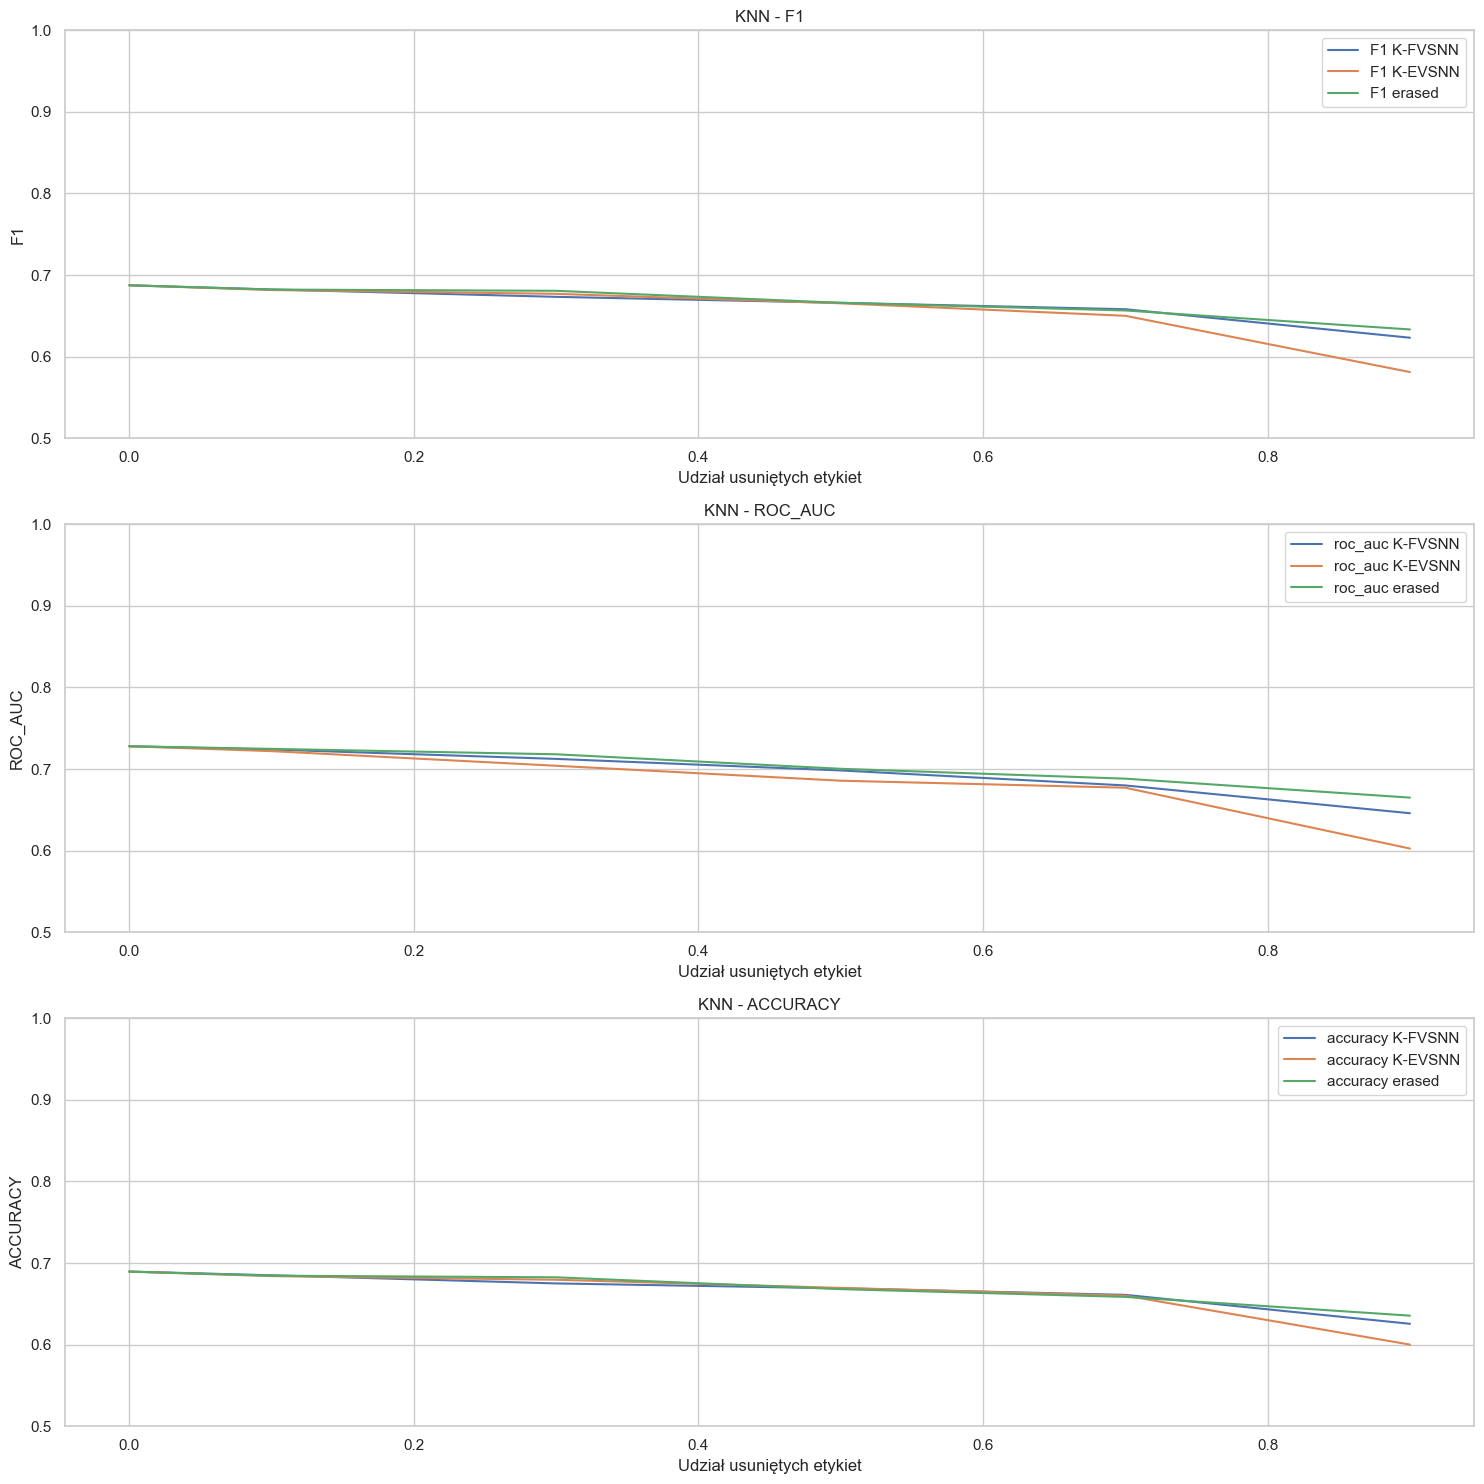

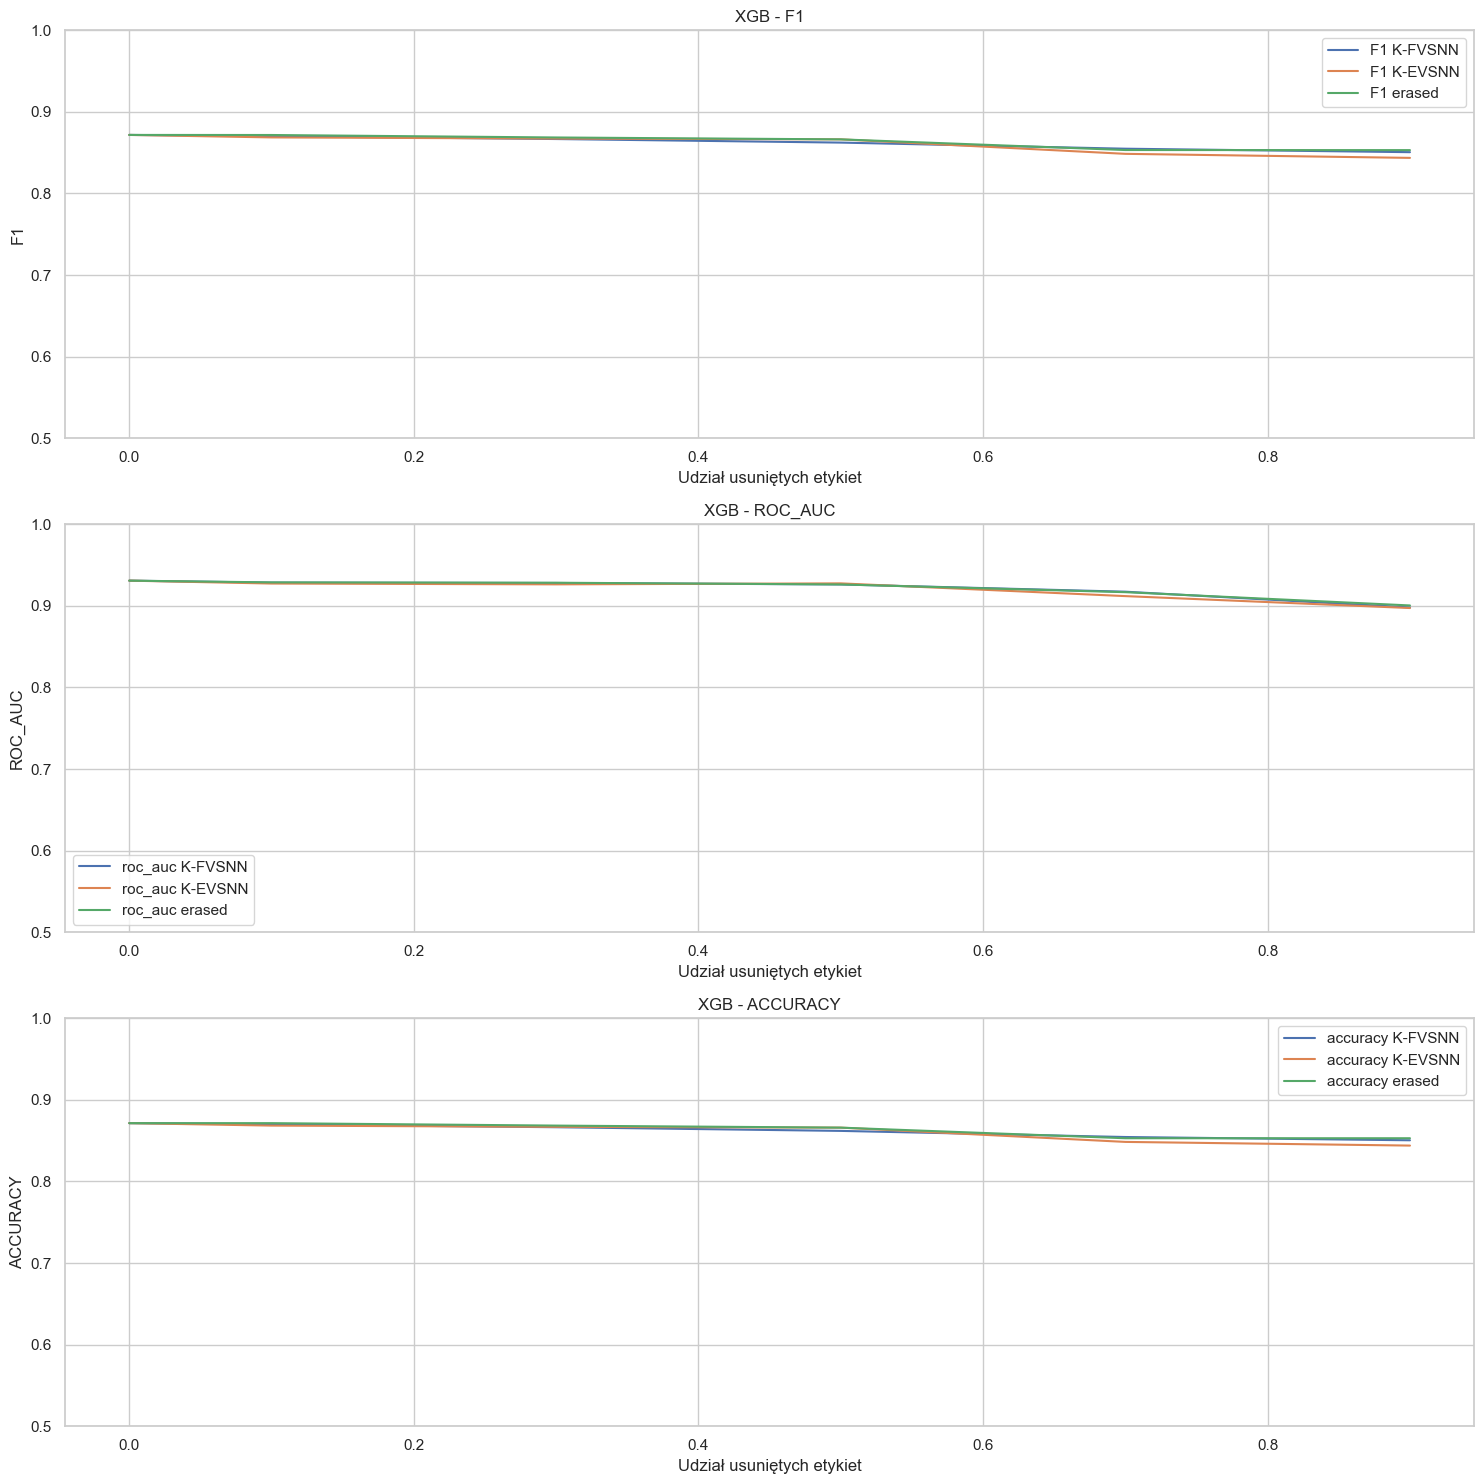

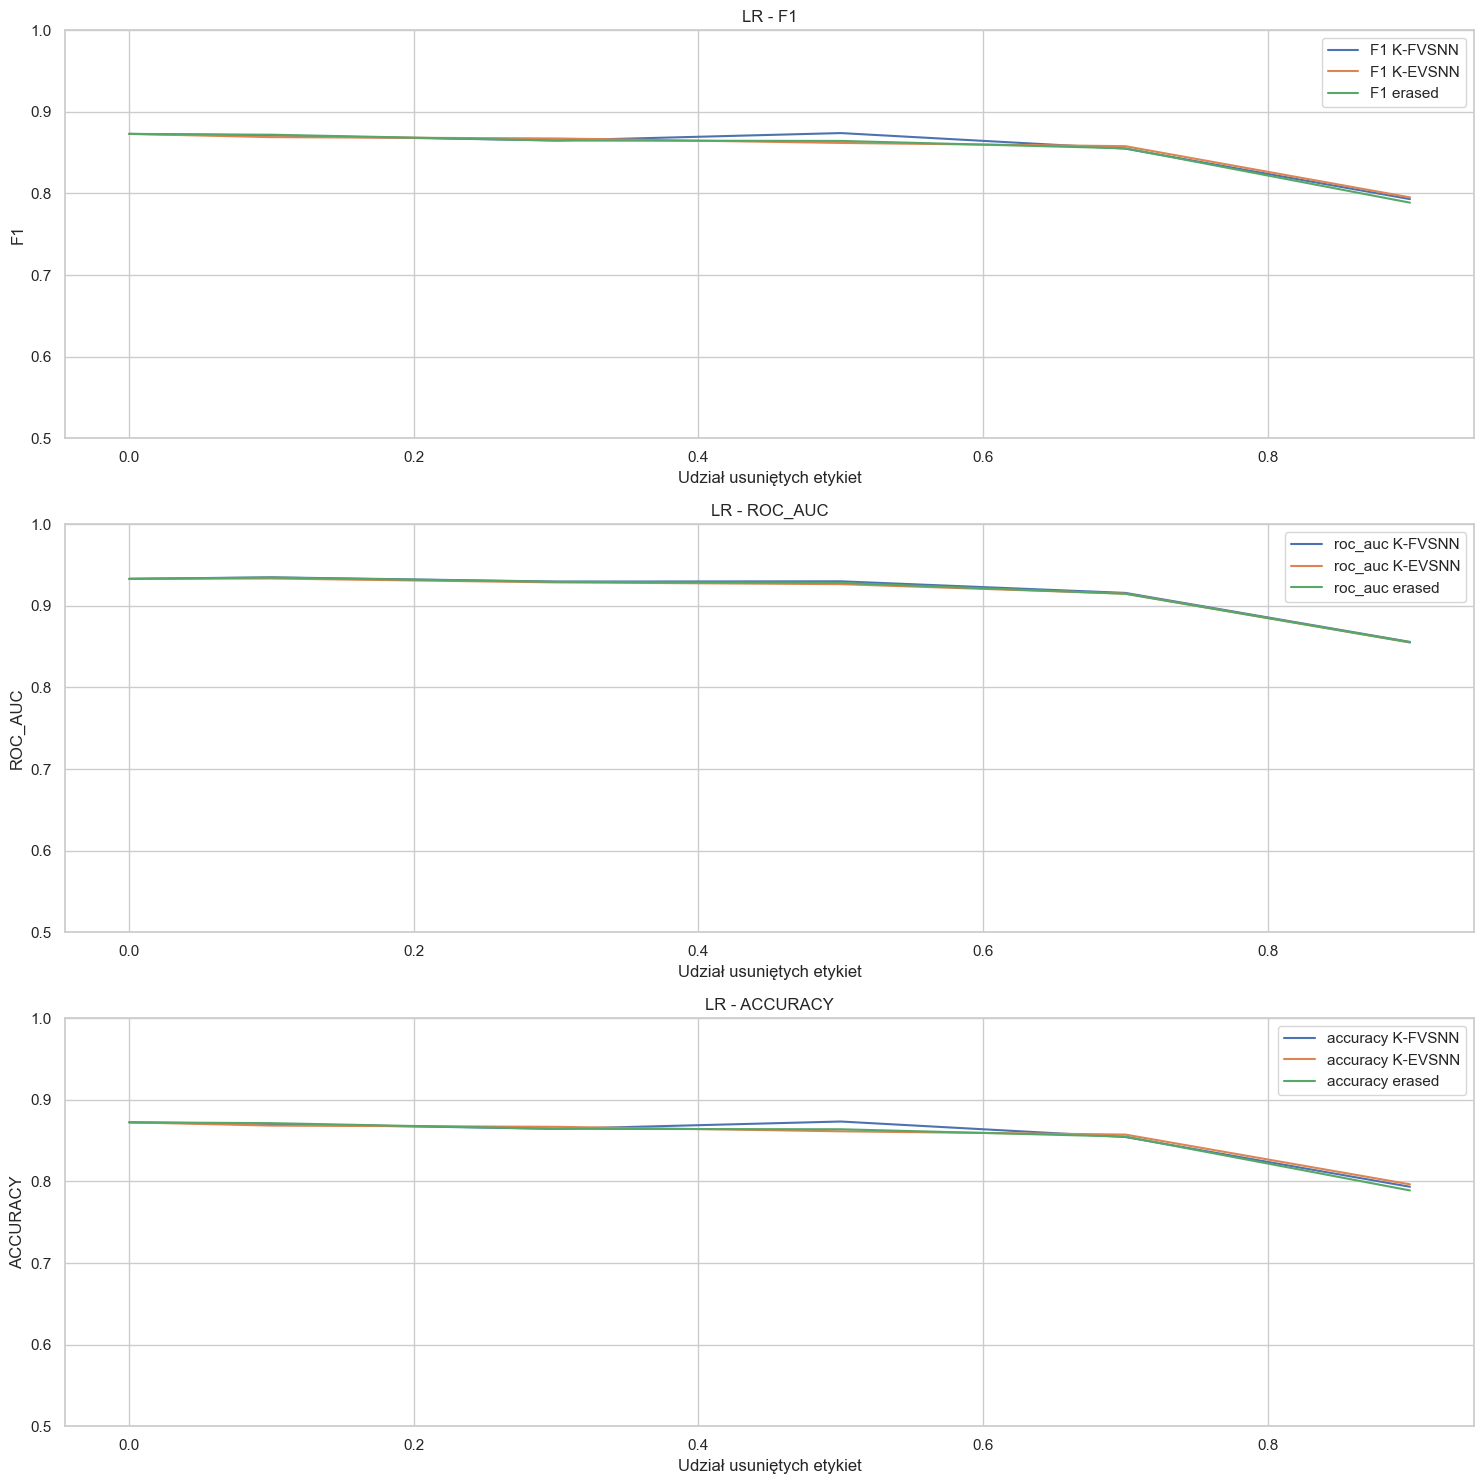

In [168]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_cred[mean_results_df_cred['classifier'] == clf]['fraction'],
                     mean_results_df_cred[mean_results_df_cred['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [169]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_cred[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_cred[mean_std_results_df_cred[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
    fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
10       0.5         lr    0.874048        0.020209

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
1       0.0         lr    0.873049        0.019268

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
1       0.0         lr   0.873049       0.019268

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
4       0.1         lr         0.935032             0.020449

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
4       0.1         lr          0.93358             0.020372

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
4       0.1         lr        0.934779             0.02055

Max accuracy for K-FVSNN:
    fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
10       0.5         lr            0.8735              0.020823

Max accuracy for K-EVSNN:
   fraction cl

In [50]:
results_df_cred=pd.read_csv("...\\results_df_cred.csv")
mean_results_df_cred=pd.read_csv("...\\mean_results_df_cred.csv")
mean_std_results_df_cred=pd.read_csv("...\\mean_std_results_df_cred.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_cred.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.687 (0.027)  0.728 (0.025)   0.690 (0.027)
1         lr  0.873 (0.019)  0.933 (0.020)   0.872 (0.020)
2        xgb  0.872 (0.027)  0.931 (0.019)   0.871 (0.027)


In [54]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.870 (0.022)   0.929 (0.020)    0.870 (0.022)   
8        0.3        xgb  0.867 (0.018)   0.928 (0.019)    0.866 (0.017)   
11       0.5        xgb  0.862 (0.023)   0.926 (0.019)    0.862 (0.024)   
14       0.7        xgb  0.855 (0.019)   0.917 (0.018)    0.855 (0.019)   
17       0.9        xgb  0.851 (0.036)   0.898 (0.036)    0.851 (0.037)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.869 (0.019)   0.927 (0.020)    0.869 (0.019)  0.872 (0.025)   
8   0.867 (0.016)   0.926 (0.021)    0.867 (0.016)  0.869 (0.016)   
11  0.866 (0.024)   0.928 (0.018)    0.866 (0.024)  0.866 (0.020)   
14  0.849 (0.016)   0.912 (0.020)    0.848 (0.017)  0.853 (0.016)   
17  0.844 (0.025)   0.897 (0.025)    0.844 (0.025)  0.853 (0.021)   

   roc_auc erased accuracy erased  
5   0.929 (0.020)   0.871 (0.025)  
8   0.928 (0.019)   0.869 (0.016)  
11  0.926 (0.017)   0.866 

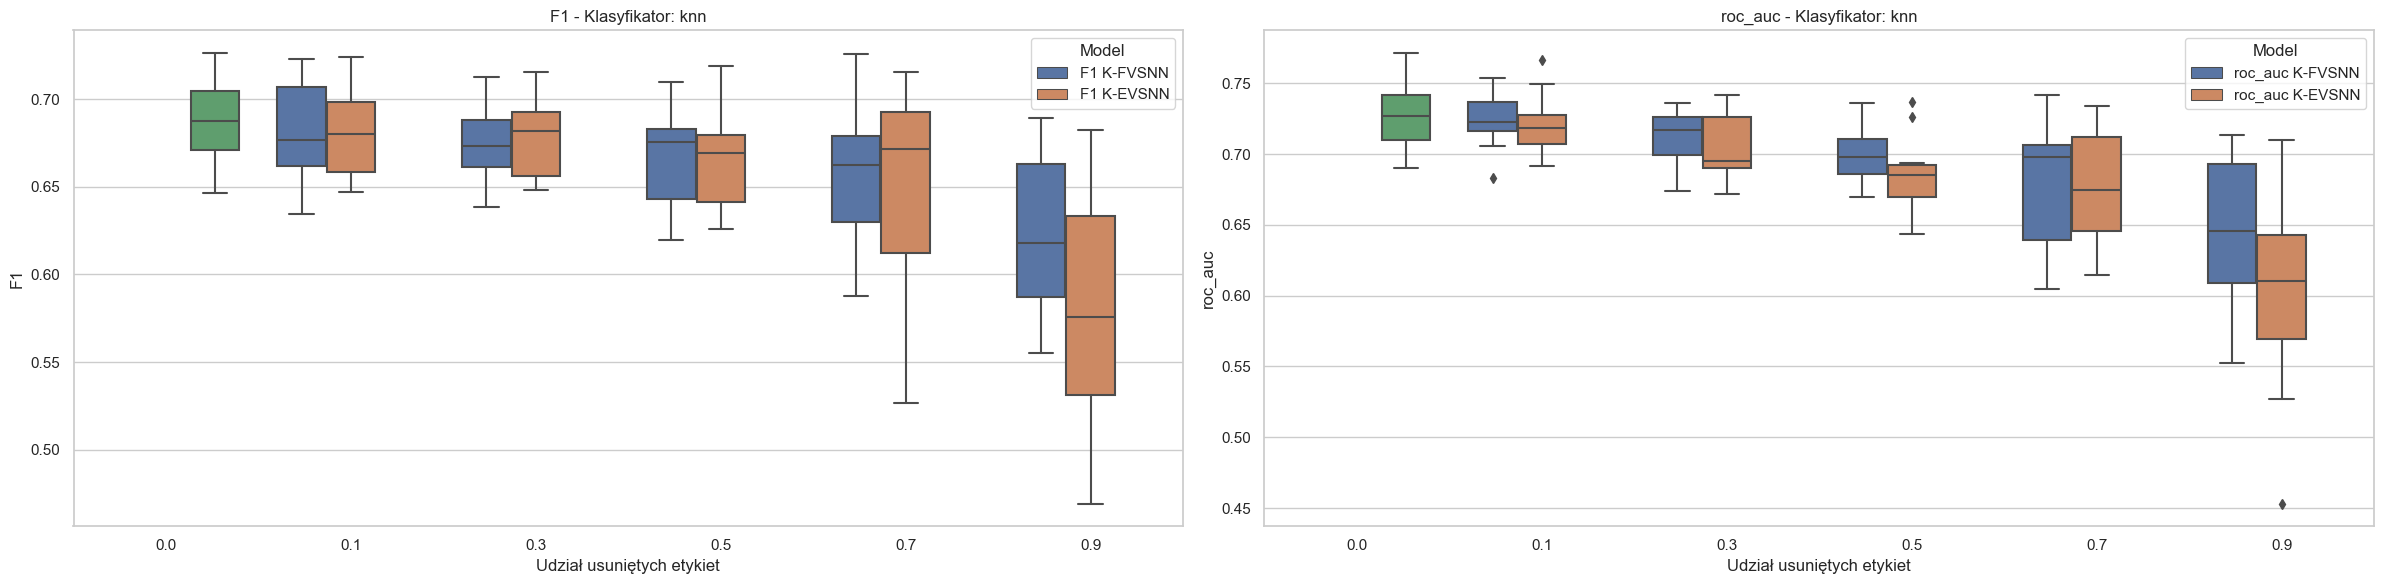

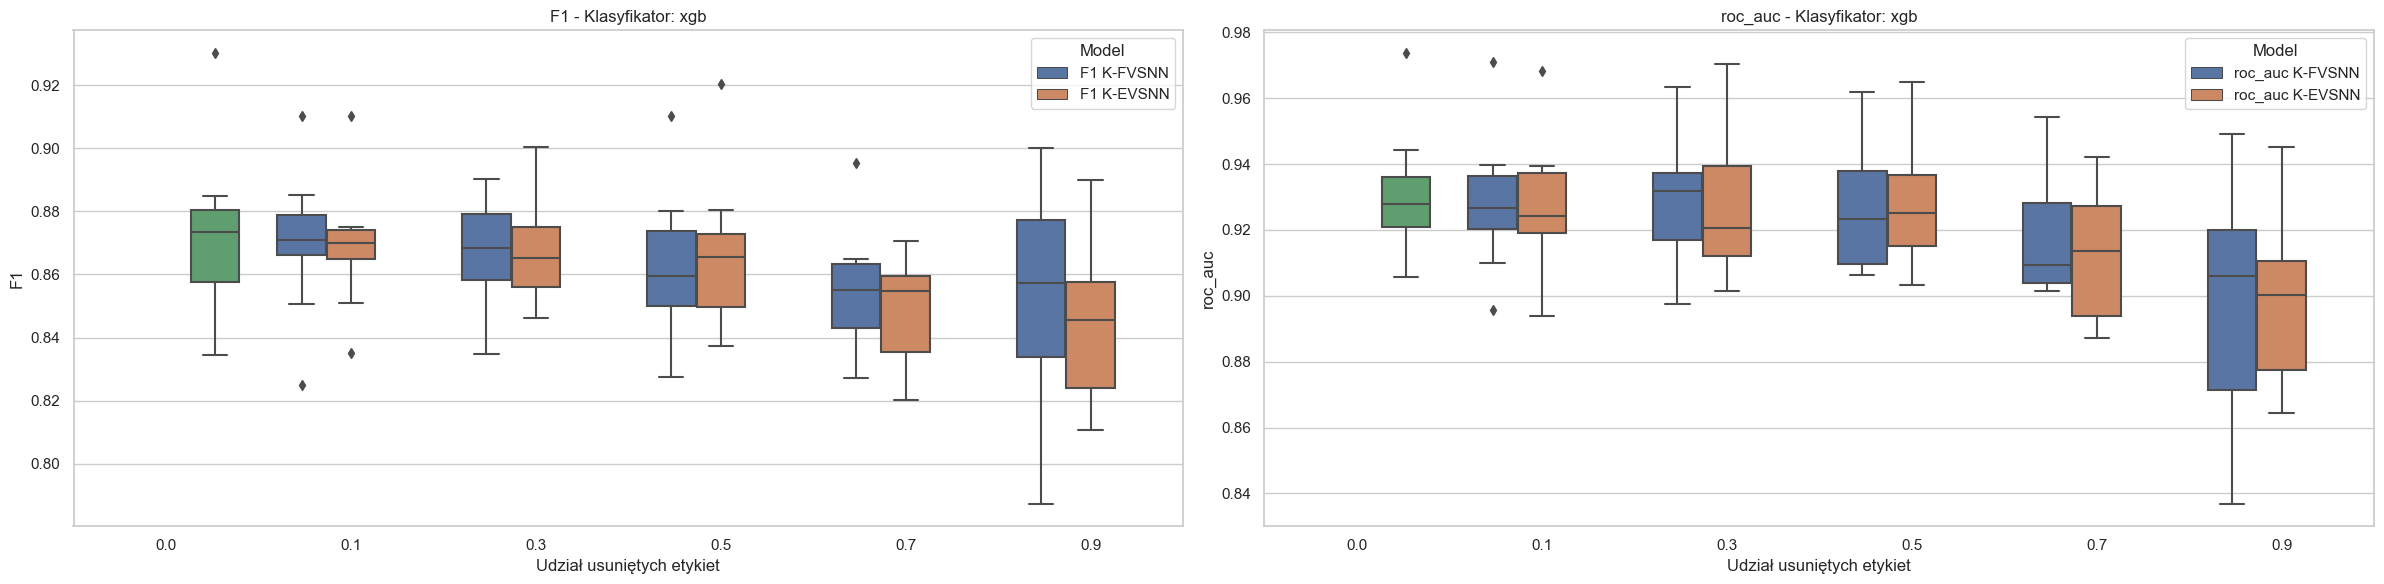

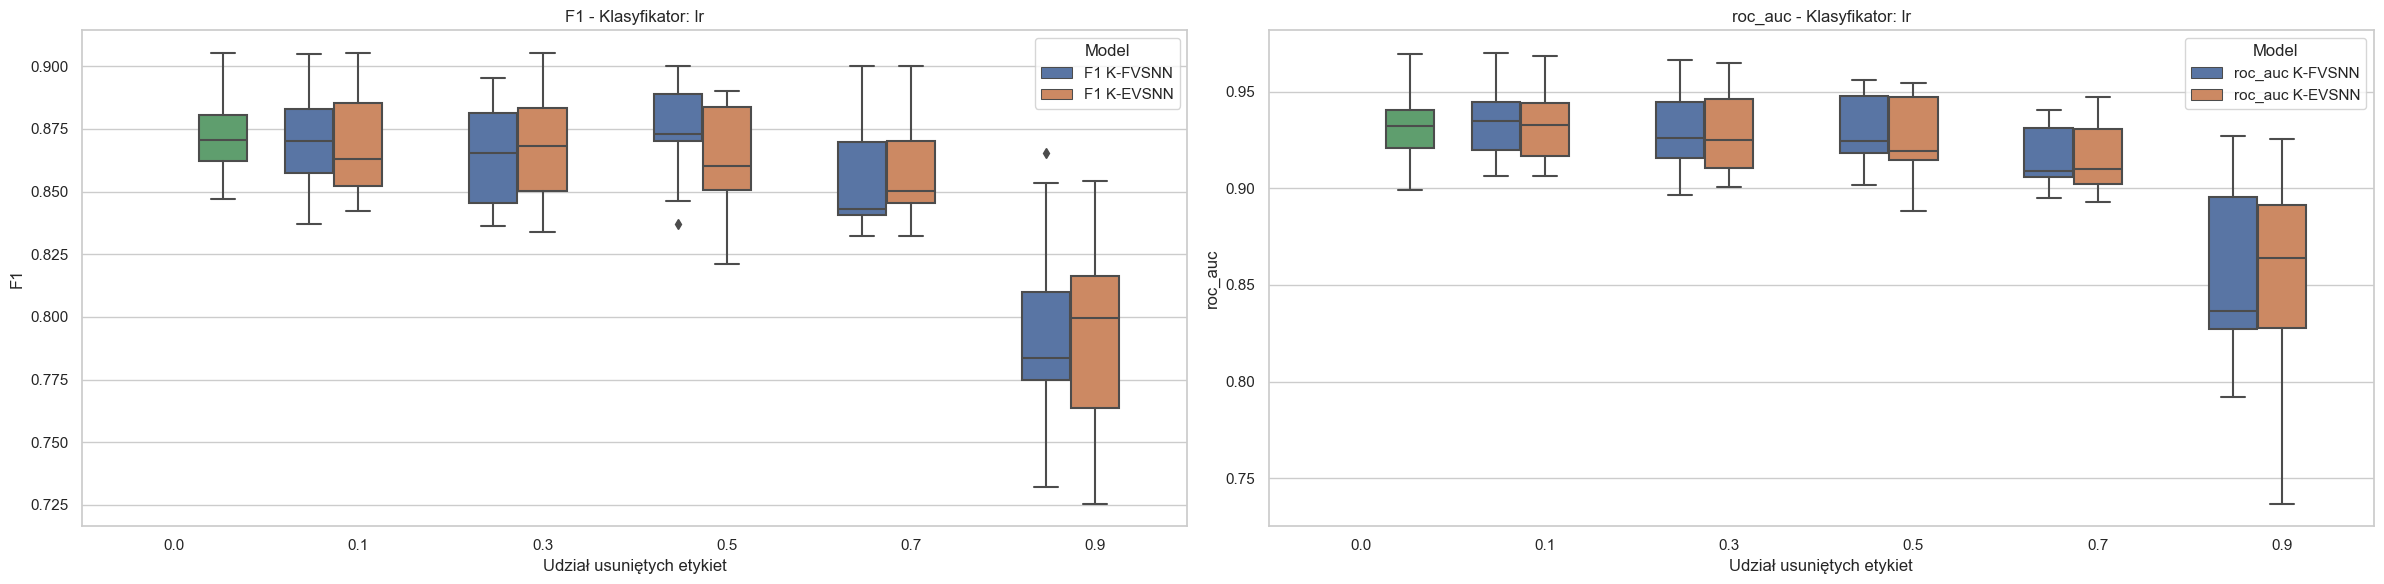

In [85]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_cred[results_df_cred['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [52]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(cred_approv, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_cred = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_cred = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 6h 30min 56s
Wall time: 12h 27min 21s


In [53]:
print(results_df_test_cred.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_cred.nlargest(10, 'F1 K-erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
17              -2           1             0         10    0.925783   
23              -2           2             1         10    0.925783   
46              -1           2            -1         10    0.925783   
54               0          -2             2         10    0.925783   
63               0           0             1         10    0.925783   
79               1          -2             2         10    0.925783   
82               1          -1             0         10    0.925783   
84               1          -1             2         10    0.925783   
88               1           0             1         10    0.925783   
95               1           2            -2         10    0.925783   

    F1 K-EVSNN  F1 K-erased  
17    0.896096     0.925783  
23    0.896096     0.925783  
46    0.896096     0.925783  
54    0.896096     0.925783  
63    0.896096     0.925783  
79    0.896096     0.925783  
82    0.

In [54]:
print(results_df_valid_cred.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_cred.nlargest(10, 'F1 erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
17              -2           1             0         10    0.910448   
56               0          -1            -1         10    0.910448   
24              -2           2             2         10    0.910328   
55               0          -1            -2         10    0.895476   
60               0           0            -2         10    0.895476   
65               0           1            -2         10    0.895476   
78               1          -2             1         10    0.895476   
82               1          -1             0         10    0.895476   
2               -2          -2             0         10    0.880597   
12              -2           0             0         10    0.880597   

    F1 K-EVSNN  F1 erased  
17    0.865612   0.880597  
56    0.865612   0.880597  
24    0.865612   0.880597  
55    0.865612   0.880597  
60    0.865612   0.880597  
65    0.865612   0.880597  
78    0.865612   0.880

#### Statlog (8)

In [135]:
statlog['class'].value_counts()

class
0    700
1    300
Name: count, dtype: int64

In [180]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(statlog, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)


            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            # Add results to the list
            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])


results_df_statlog = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])


mean_results_df_statlog = results_df_statlog.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_statlog = results_df_statlog.groupby(['fraction', 'classifier']).std().reset_index()


mean_std_results_df_statlog = pd.merge(mean_results_df_statlog, std_results_df_statlog, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_statlog)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.667113         0.638944          0.690000   
1        0.0         lr    0.754551         0.798634          0.766000   
2        0.0        xgb    0.753050         0.775784          0.759667   
3        0.1        knn    0.670532         0.639854          0.694000   
4        0.1         lr    0.763292         0.797439          0.774000   
5        0.1        xgb    0.752654         0.775671          0.758667   
6        0.3        knn    0.654323         0.626301          0.686667   
7        0.3         lr    0.750912         0.788690          0.763000   
8        0.3        xgb    0.742125         0.759570          0.751667   
9        0.5        knn    0.643093         0.601334          0.679333   
10       0.5         lr    0.743106         0.785537          0.755667   
11       0.5        xgb    0.727352         0.753009          0.738000   
12       0.7        knn    0.627322   

In [189]:
results_df_statlog.to_csv('results_df_statlog.csv', index=False)
mean_results_df_statlog.to_csv('mean_results_df_statlog.csv', index=False)
mean_std_results_df_statlog.to_csv('mean_std_results_df_statlog.csv', index=False)

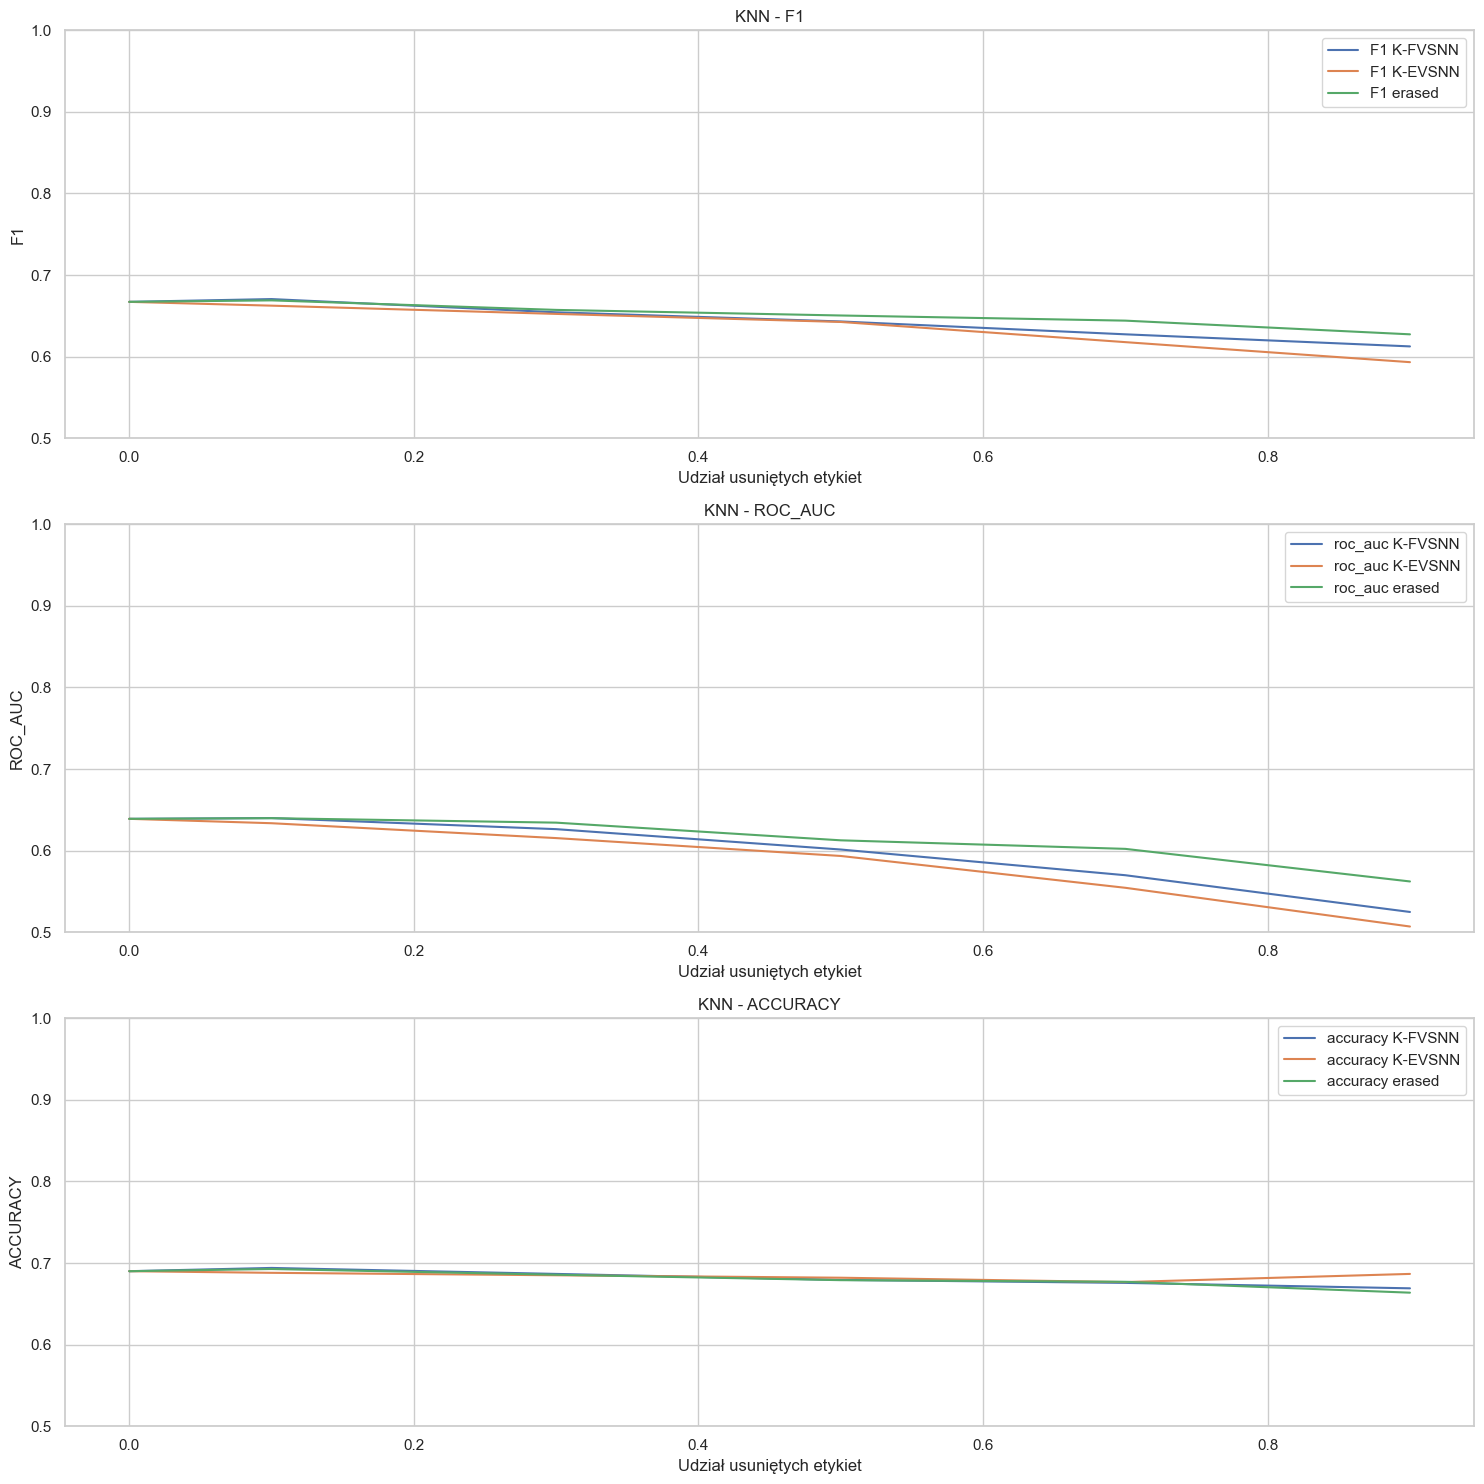

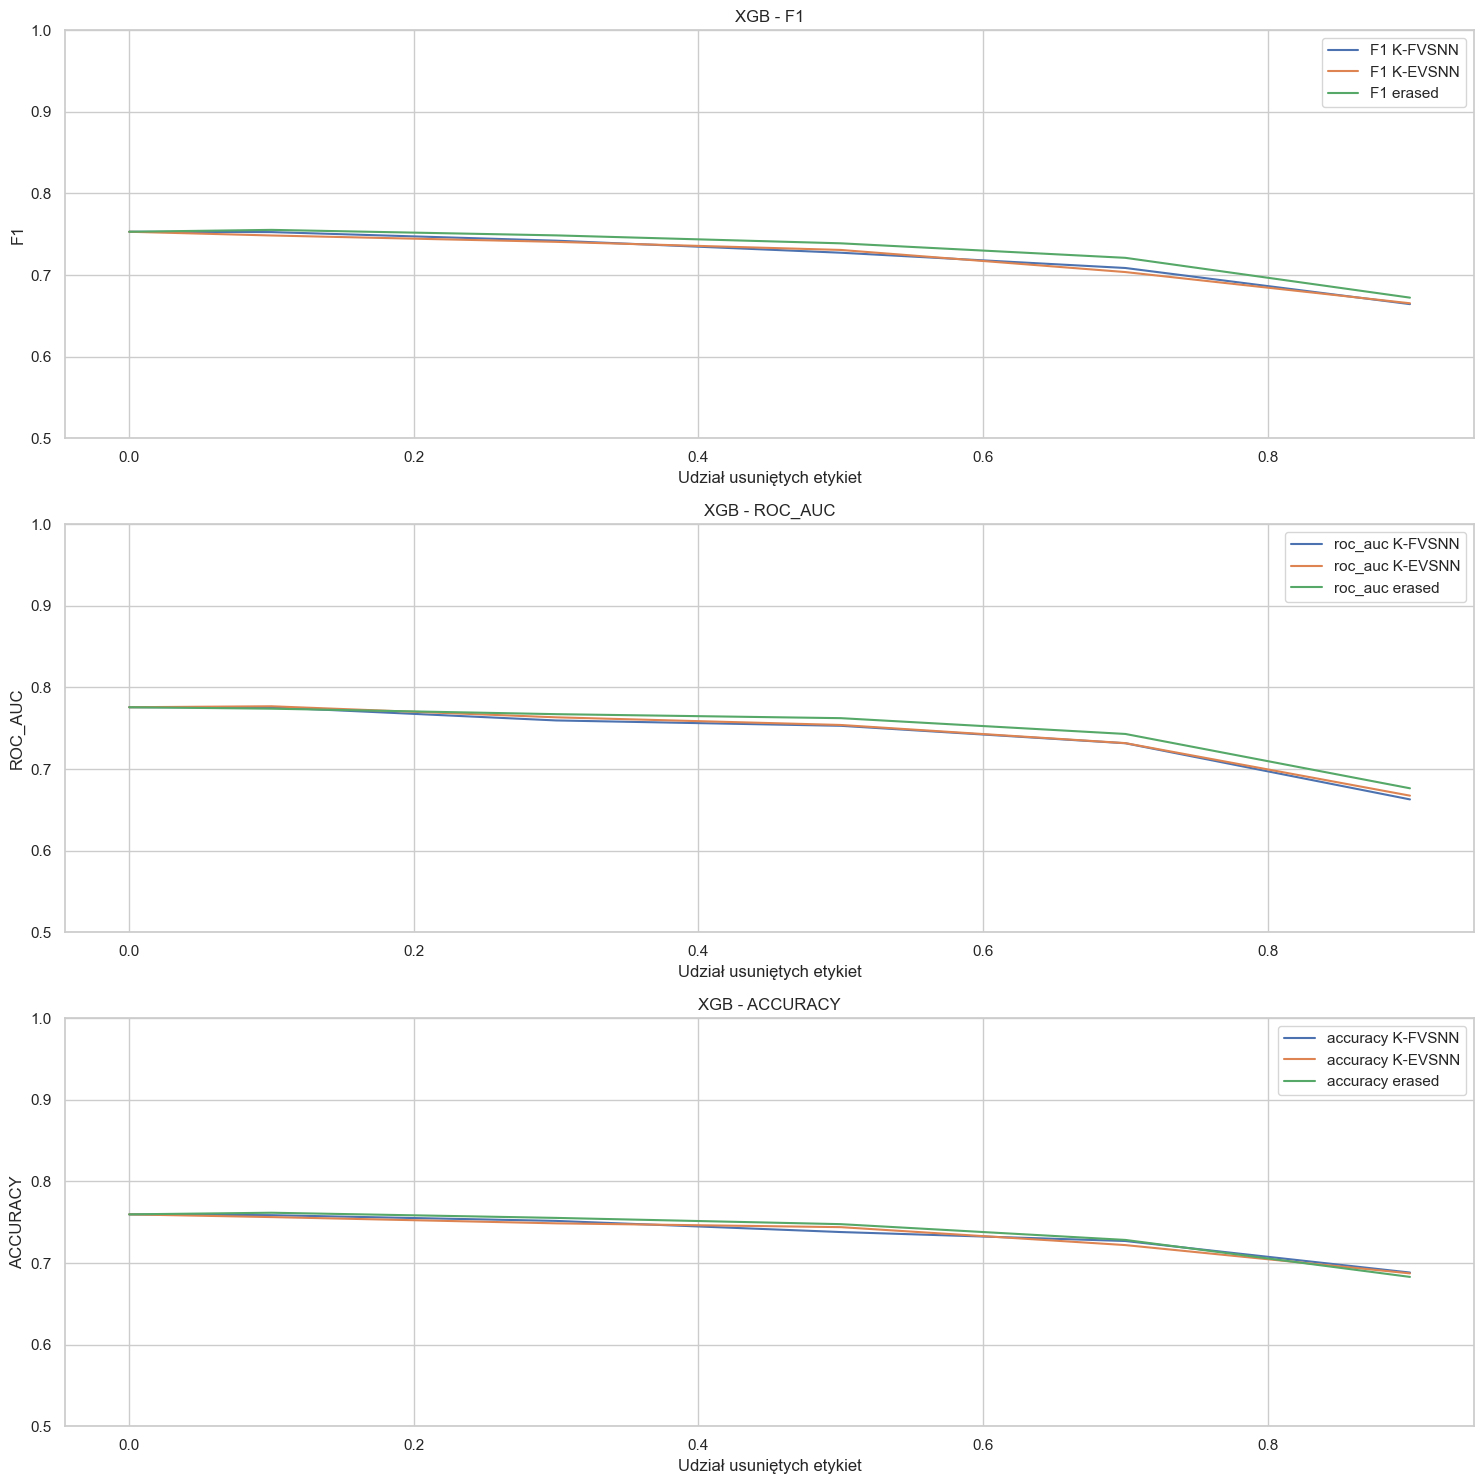

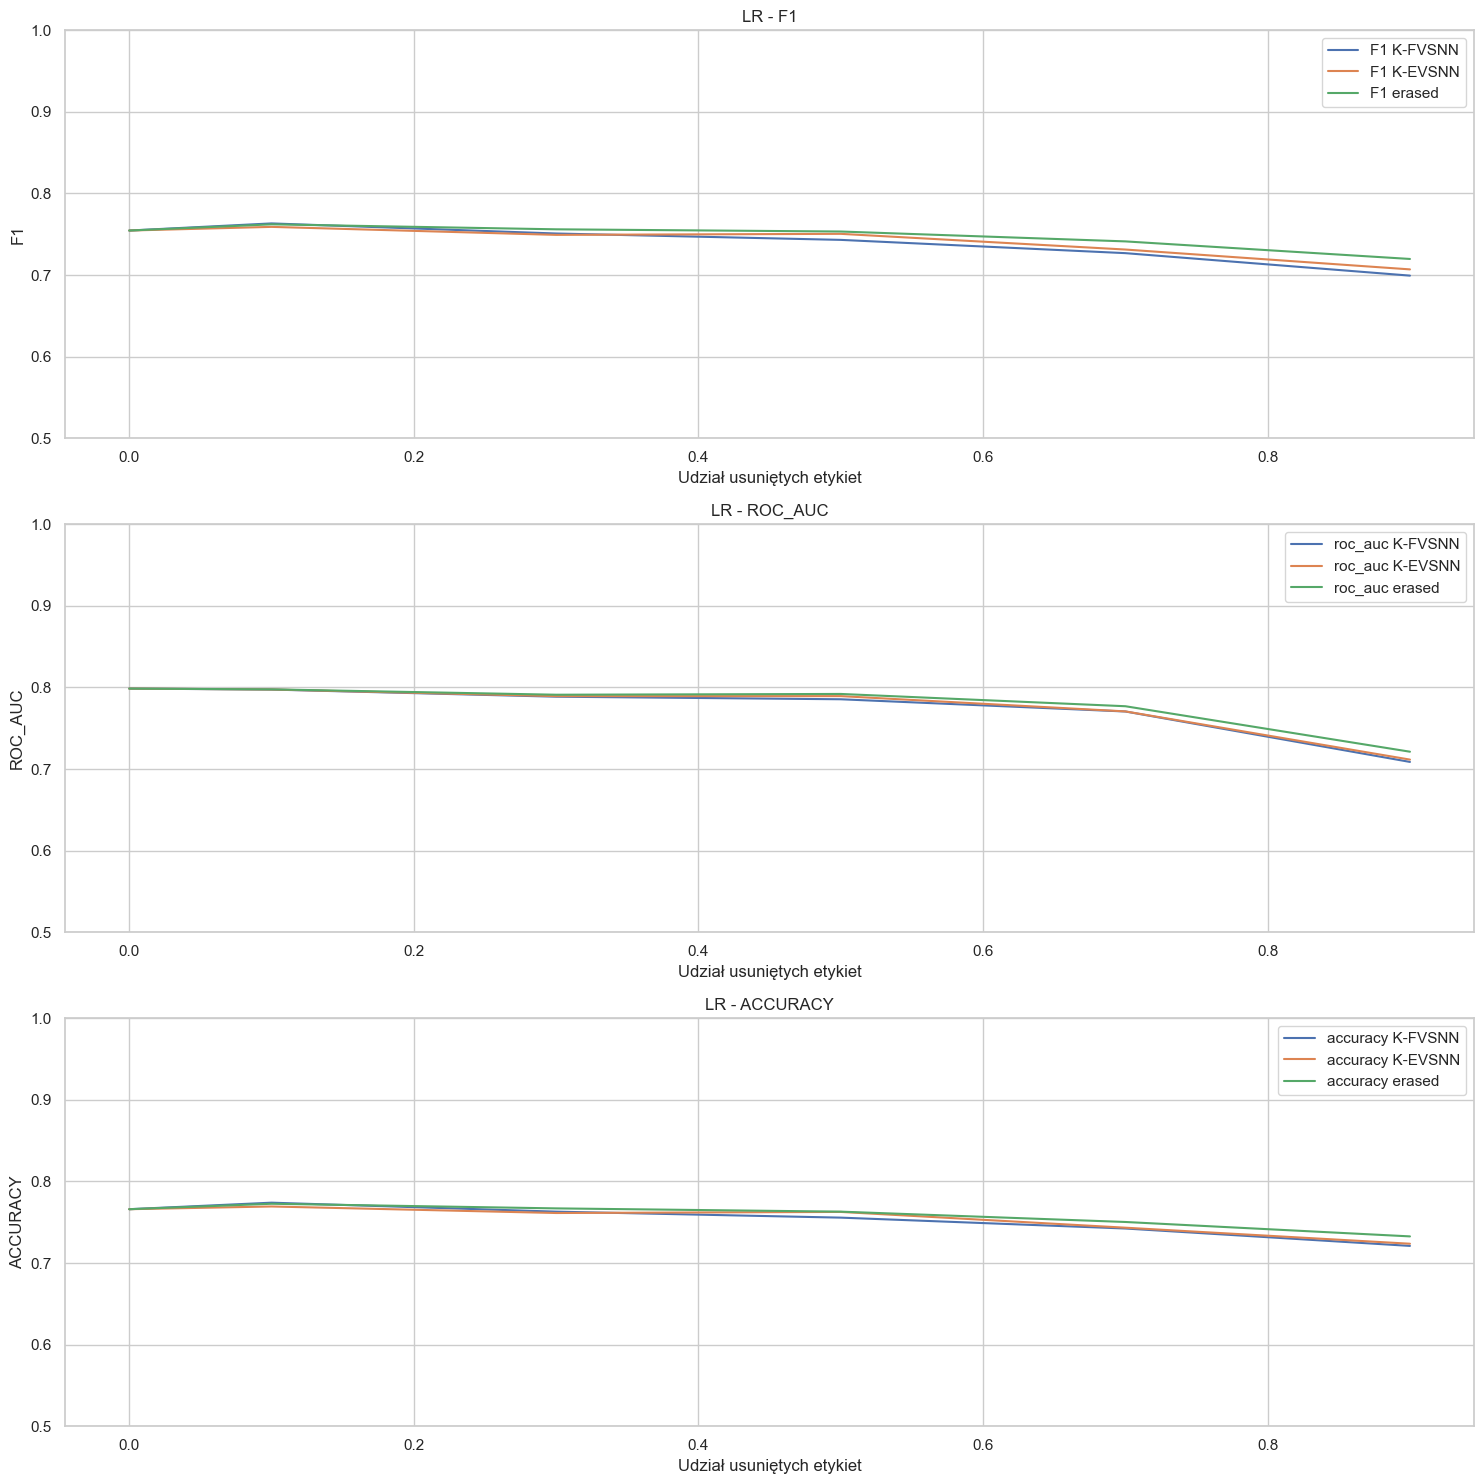

In [181]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_statlog[mean_results_df_statlog['classifier'] == clf]['fraction'],
                     mean_results_df_statlog[mean_results_df_statlog['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [183]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_statlog[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_statlog[mean_std_results_df_statlog[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
4       0.1         lr    0.763292        0.018898

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
4       0.1         lr    0.759045        0.018811

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
4       0.1         lr   0.762154       0.021552

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
1       0.0         lr         0.798634             0.017166

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
1       0.0         lr         0.798634             0.017166

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
1       0.0         lr        0.798634            0.017166

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
4       0.1         lr             0.774              0.017127

Max accuracy for K-EVSNN:
   fraction classi

In [55]:
results_df_statlog=pd.read_csv("...\\results_df_statlog.csv")
mean_results_df_statlog=pd.read_csv("...\\mean_results_df_statlog.csv")
mean_std_results_df_statlog=pd.read_csv("...\\mean_std_results_df_statlog.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_statlog.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.667 (0.025)  0.639 (0.029)   0.690 (0.022)
1         lr  0.755 (0.022)  0.799 (0.017)   0.766 (0.021)
2        xgb  0.753 (0.026)  0.776 (0.026)   0.760 (0.024)


In [58]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.753 (0.018)   0.776 (0.021)    0.759 (0.017)   
8        0.3        xgb  0.742 (0.009)   0.760 (0.018)    0.752 (0.008)   
11       0.5        xgb  0.727 (0.016)   0.753 (0.022)    0.738 (0.013)   
14       0.7        xgb  0.709 (0.034)   0.732 (0.018)    0.727 (0.023)   
17       0.9        xgb  0.664 (0.037)   0.663 (0.052)    0.688 (0.028)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.748 (0.018)   0.777 (0.020)    0.756 (0.016)  0.755 (0.010)   
8   0.741 (0.017)   0.763 (0.022)    0.749 (0.014)  0.749 (0.018)   
11  0.731 (0.031)   0.754 (0.021)    0.744 (0.025)  0.739 (0.030)   
14  0.704 (0.034)   0.732 (0.025)    0.722 (0.027)  0.721 (0.023)   
17  0.665 (0.045)   0.667 (0.065)    0.687 (0.034)  0.672 (0.037)   

   roc_auc erased accuracy erased  
5   0.774 (0.018)   0.762 (0.008)  
8   0.767 (0.025)   0.755 (0.015)  
11  0.762 (0.024)   0.748 

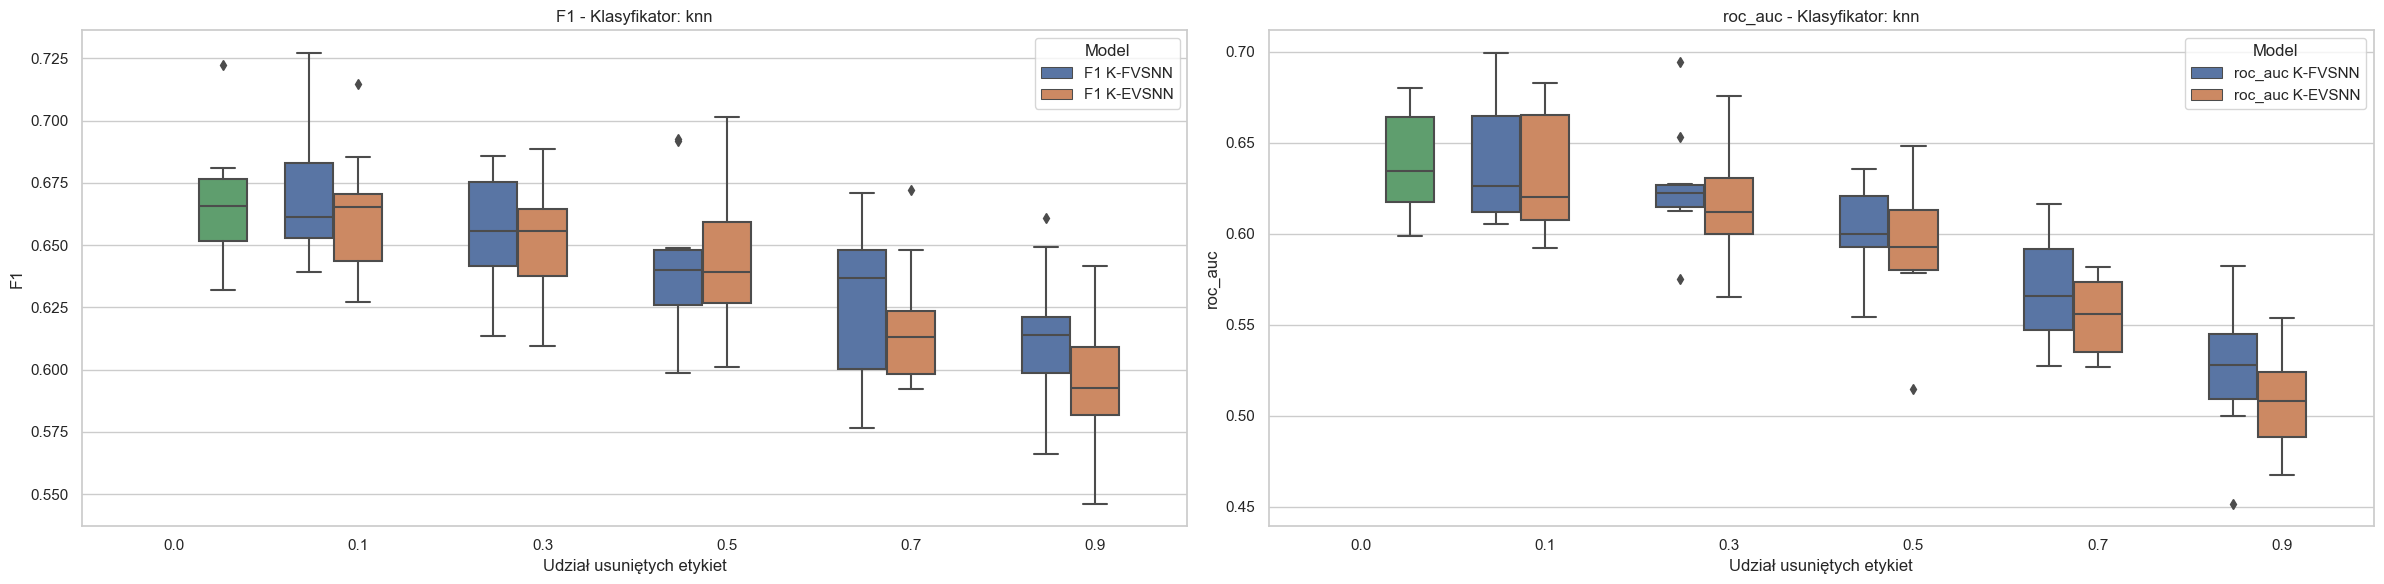

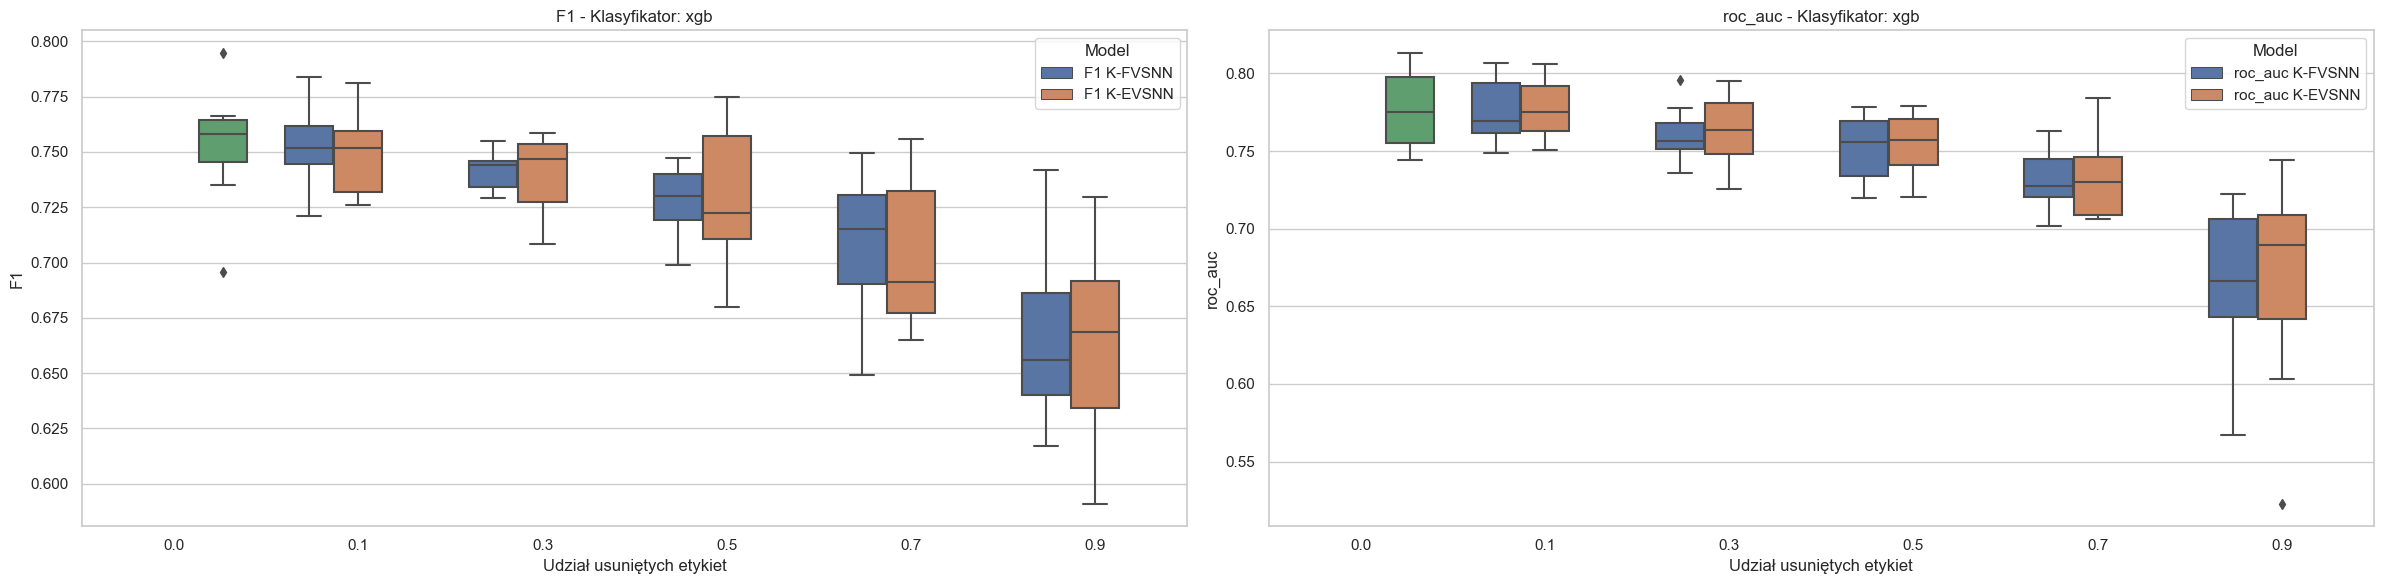

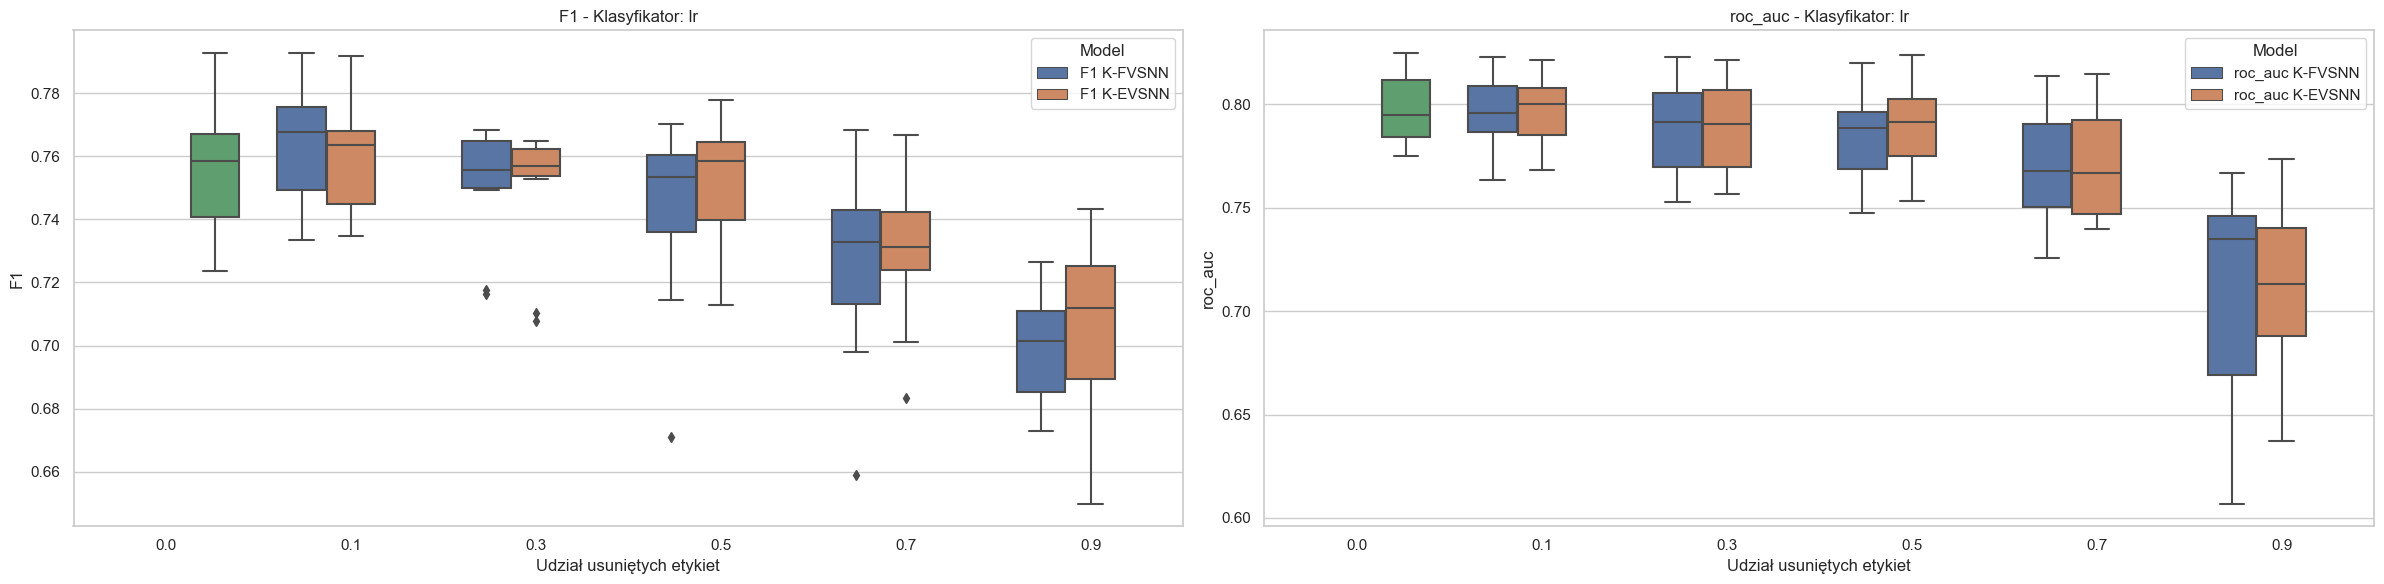

In [86]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_statlog[results_df_statlog['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [56]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(statlog, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')
                
                            # Train Model 5 (without data erasure, fraction of observations)
                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_statlog = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_statlog = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

print(results_df_test_statlog.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_statlog.nlargest(10, 'F1 K-erased'))

print(results_df_valid_statlog.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_statlog.nlargest(10, 'F1 erased'))

     distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
55                0          -1            -2         10    0.785170   
74                0           2             2         10    0.781569   
0                -2          -2            -2         10    0.780000   
13               -2           0             1         10    0.780000   
36               -1           0            -1         10    0.780000   
43               -1           1             1         10    0.780000   
5                -2          -1            -2         10    0.778180   
48               -1           2             1         10    0.778180   
122               2           2             0         10    0.772366   
8                -2          -1             1         10    0.770852   

     F1 K-EVSNN  F1 K-erased  
55     0.674315     0.721996  
74     0.674315     0.721996  
0      0.674315     0.721996  
13     0.674315     0.721996  
36     0.674315     0.721996  
43     0.674315     0

#### HFCR (2)

In [28]:
HFCR['class'].value_counts()

class
0    203
1     96
Name: count, dtype: int64

In [146]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(HFCR, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_HFCR = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_HFCR = results_df_HFCR.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_HFCR = results_df_HFCR.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_HFCR = pd.merge(mean_results_df_HFCR, std_results_df_HFCR, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_HFCR)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.603807         0.481177          0.636667   
1        0.0         lr    0.812849         0.841430          0.816667   
2        0.0        xgb    0.817964         0.895560          0.817778   
3        0.1        knn    0.601916         0.486502          0.635556   
4        0.1         lr    0.806798         0.846141          0.810000   
5        0.1        xgb    0.817704         0.887847          0.817778   
6        0.3        knn    0.584338         0.482813          0.613333   
7        0.3         lr    0.816964         0.844386          0.821111   
8        0.3        xgb    0.820229         0.886386          0.821111   
9        0.5        knn    0.587836         0.501148          0.622222   
10       0.5         lr    0.825180         0.841747          0.830000   
11       0.5        xgb    0.822641         0.874322          0.822222   
12       0.7        knn    0.574744   

In [190]:
results_df_HFCR.to_csv('results_df_HFCR.csv', index=False)
mean_results_df_HFCR.to_csv('mean_results_df_HFCR.csv', index=False)
mean_std_results_df_HFCR.to_csv('mean_std_results_df_HFCR.csv', index=False)

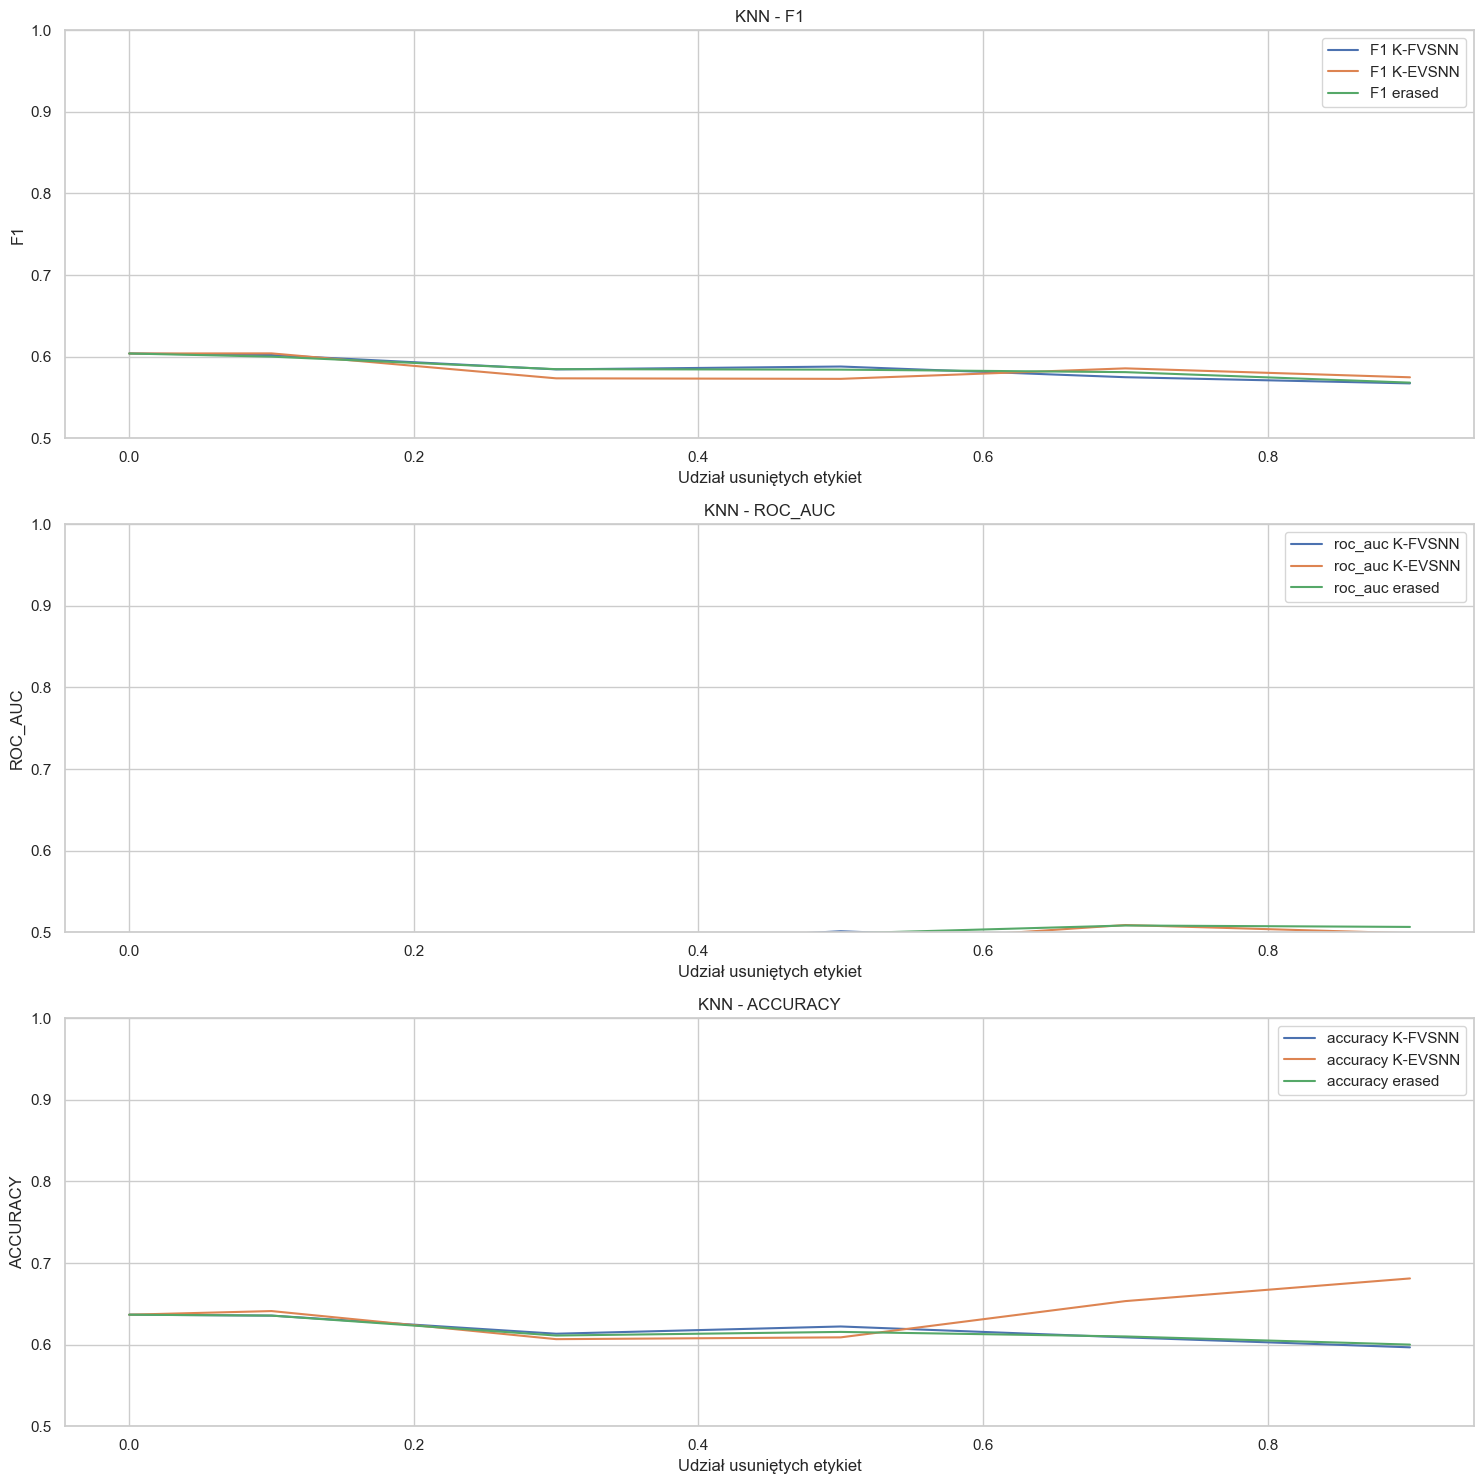

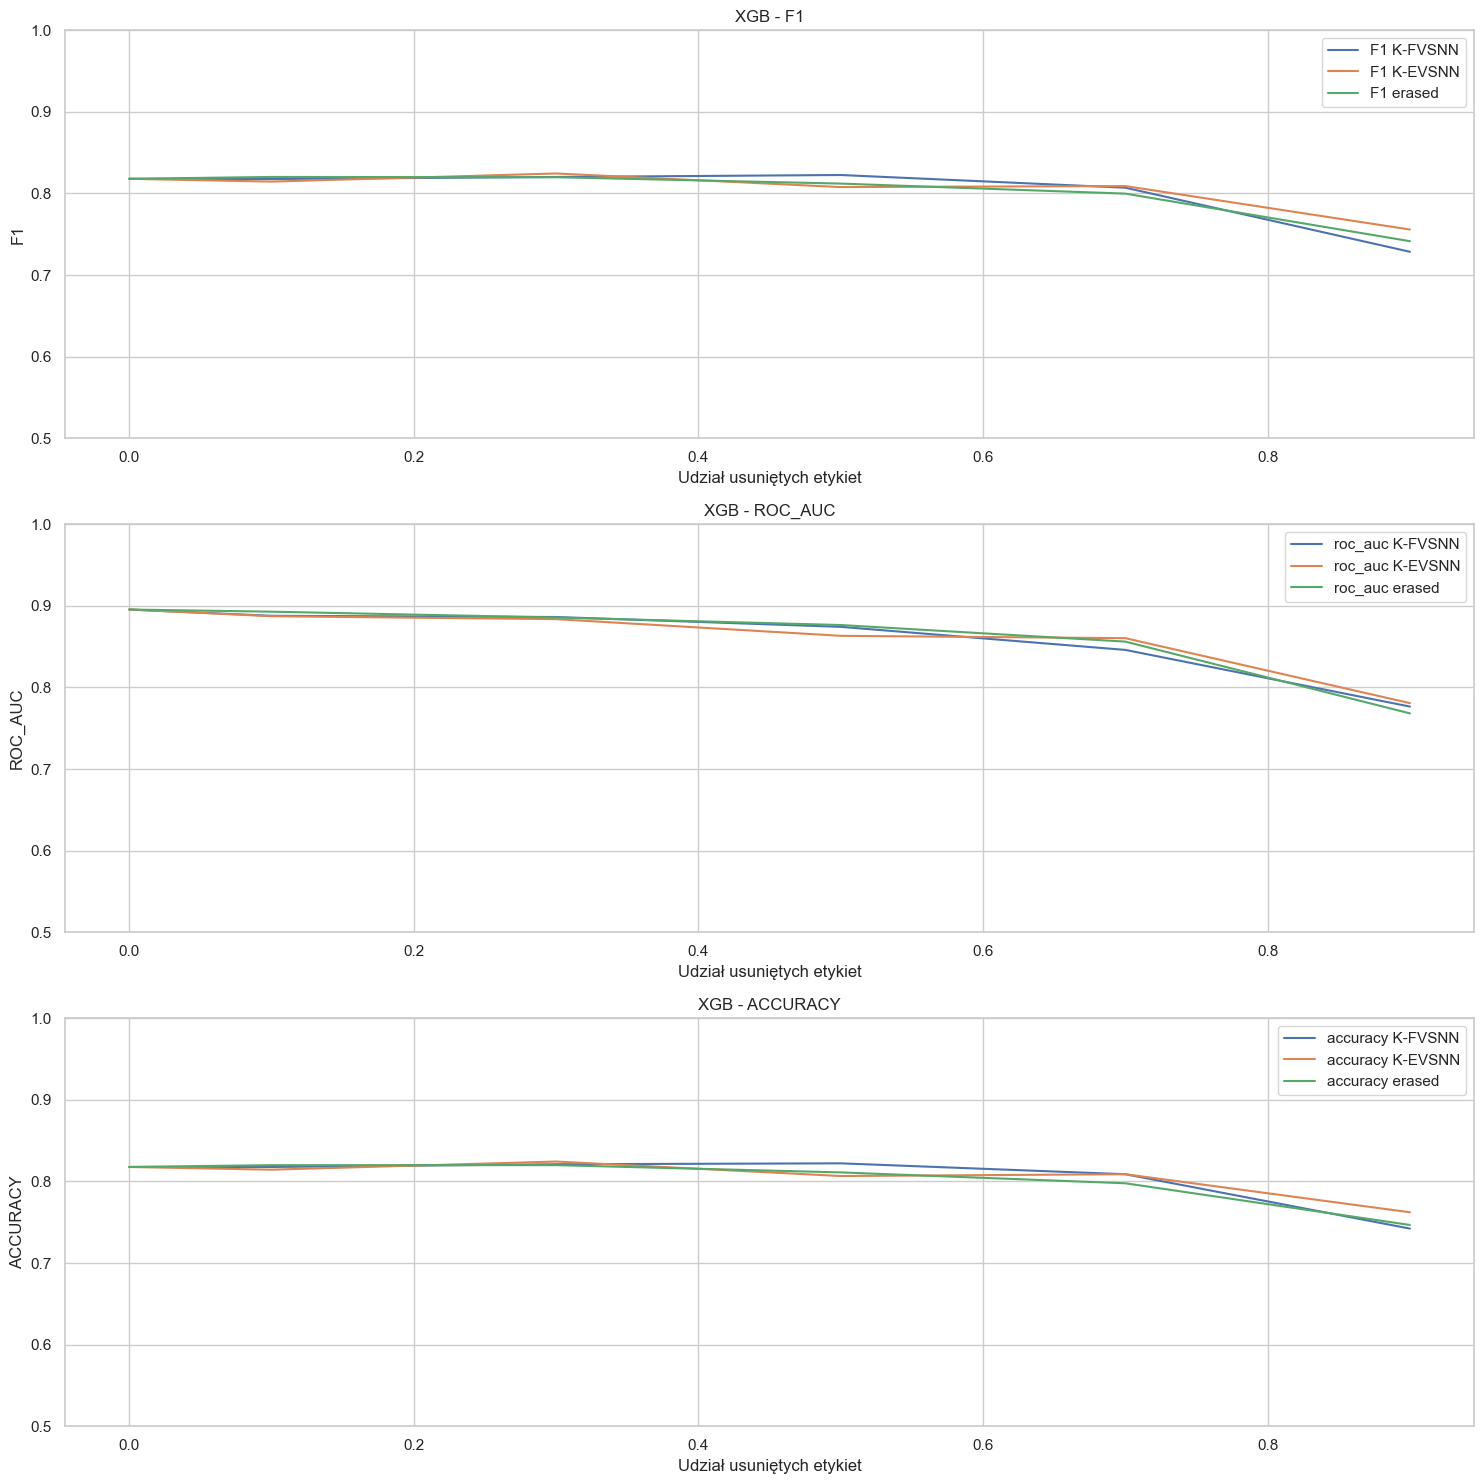

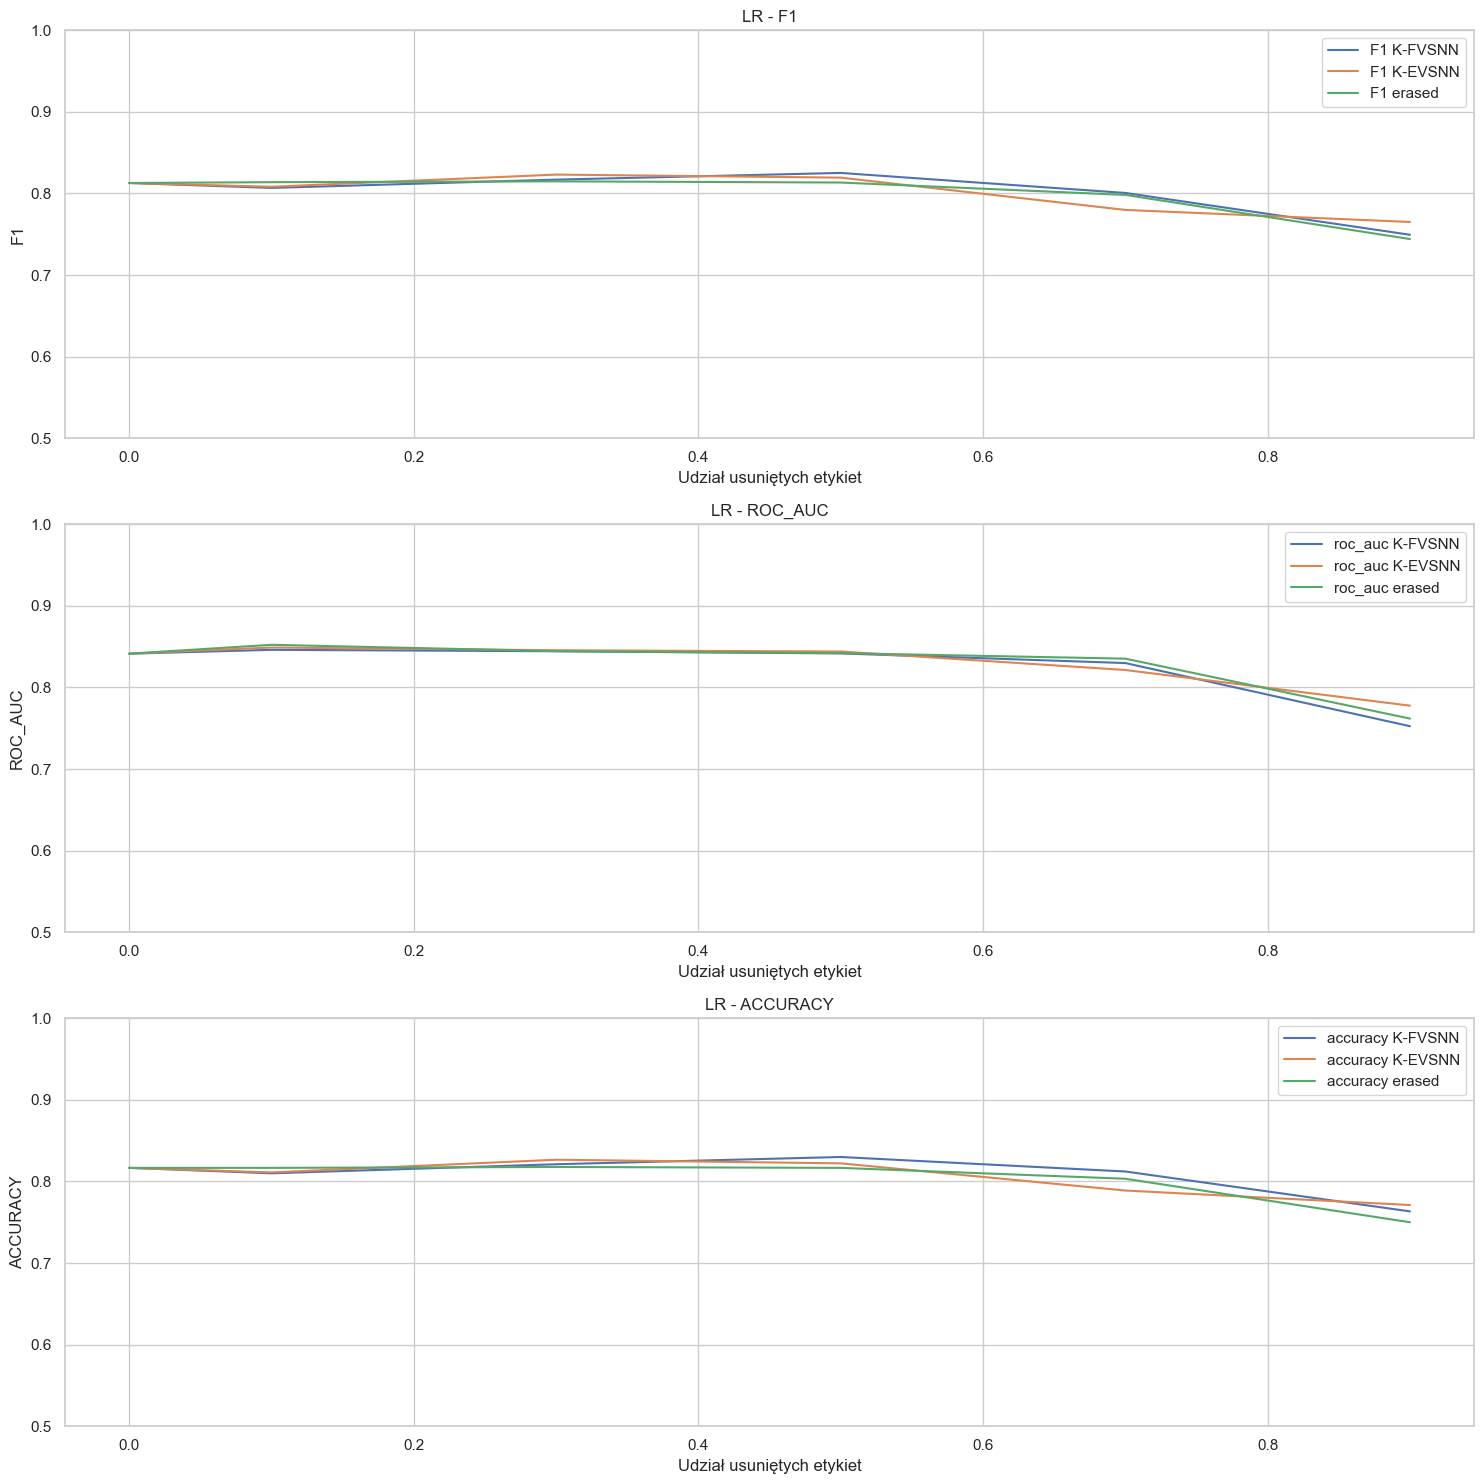

In [147]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_HFCR[mean_results_df_HFCR['classifier'] == clf]['fraction'],
                     mean_results_df_HFCR[mean_results_df_HFCR['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [148]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_HFCR[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_HFCR[mean_std_results_df_HFCR[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
    fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
10       0.5         lr     0.82518        0.041539

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
8       0.3        xgb    0.824505        0.034542

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
5       0.1        xgb    0.82026       0.035897

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
2       0.0        xgb          0.89556             0.025246

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
2       0.0        xgb          0.89556             0.025246

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb         0.89556            0.025246

Max accuracy for K-FVSNN:
    fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
10       0.5         lr              0.83              0.039562

Max accuracy for K-EVSNN:
   fraction cl

In [62]:
results_df_HFCR=pd.read_csv("...\\results_df_HFCR.csv")
mean_results_df_HFCR=pd.read_csv("...\\mean_results_df_HFCR.csv")
mean_std_results_df_HFCR=pd.read_csv("...\\mean_std_results_df_HFCR.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_HFCR.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.604 (0.052)  0.481 (0.066)   0.637 (0.055)
1         lr  0.813 (0.019)  0.841 (0.023)   0.817 (0.017)
2        xgb  0.818 (0.025)  0.896 (0.025)   0.818 (0.026)


In [65]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.818 (0.031)   0.888 (0.025)    0.818 (0.032)   
8        0.3        xgb  0.820 (0.025)   0.886 (0.024)    0.821 (0.024)   
11       0.5        xgb  0.823 (0.029)   0.874 (0.041)    0.822 (0.029)   
14       0.7        xgb  0.807 (0.040)   0.846 (0.047)    0.809 (0.042)   
17       0.9        xgb  0.729 (0.093)   0.777 (0.109)    0.742 (0.094)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.815 (0.036)   0.887 (0.027)    0.814 (0.036)  0.820 (0.036)   
8   0.825 (0.035)   0.884 (0.027)    0.824 (0.035)  0.820 (0.025)   
11  0.808 (0.027)   0.863 (0.041)    0.807 (0.030)  0.812 (0.031)   
14  0.809 (0.029)   0.860 (0.035)    0.809 (0.031)  0.800 (0.036)   
17  0.756 (0.092)   0.781 (0.103)    0.762 (0.088)  0.741 (0.087)   

   roc_auc erased accuracy erased  
5   0.893 (0.029)   0.820 (0.037)  
8   0.886 (0.026)   0.820 (0.024)  
11  0.877 (0.038)   0.811 

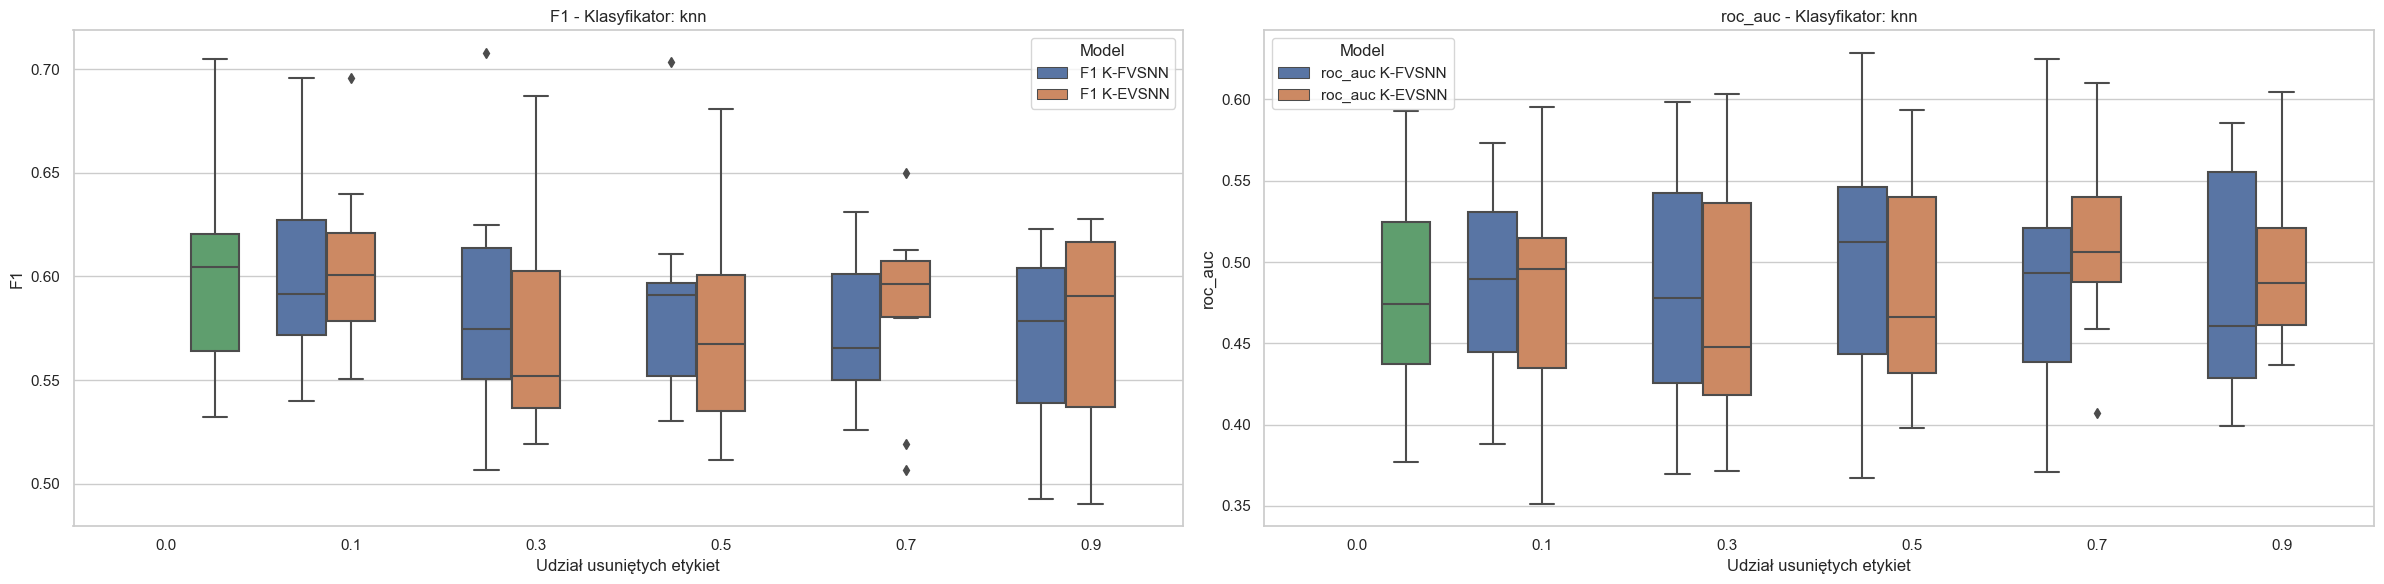

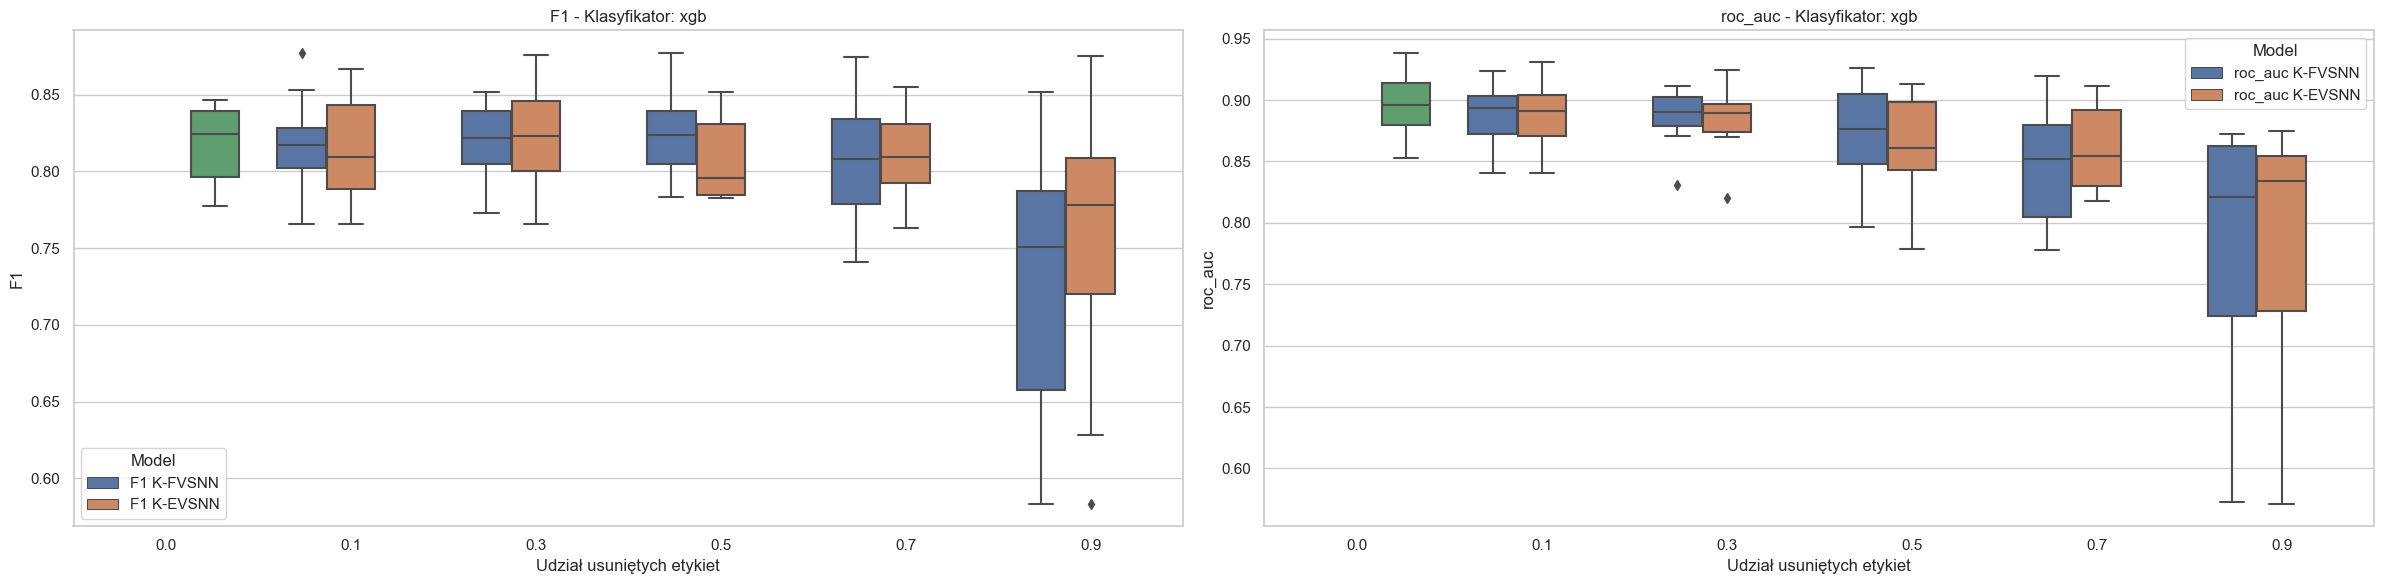

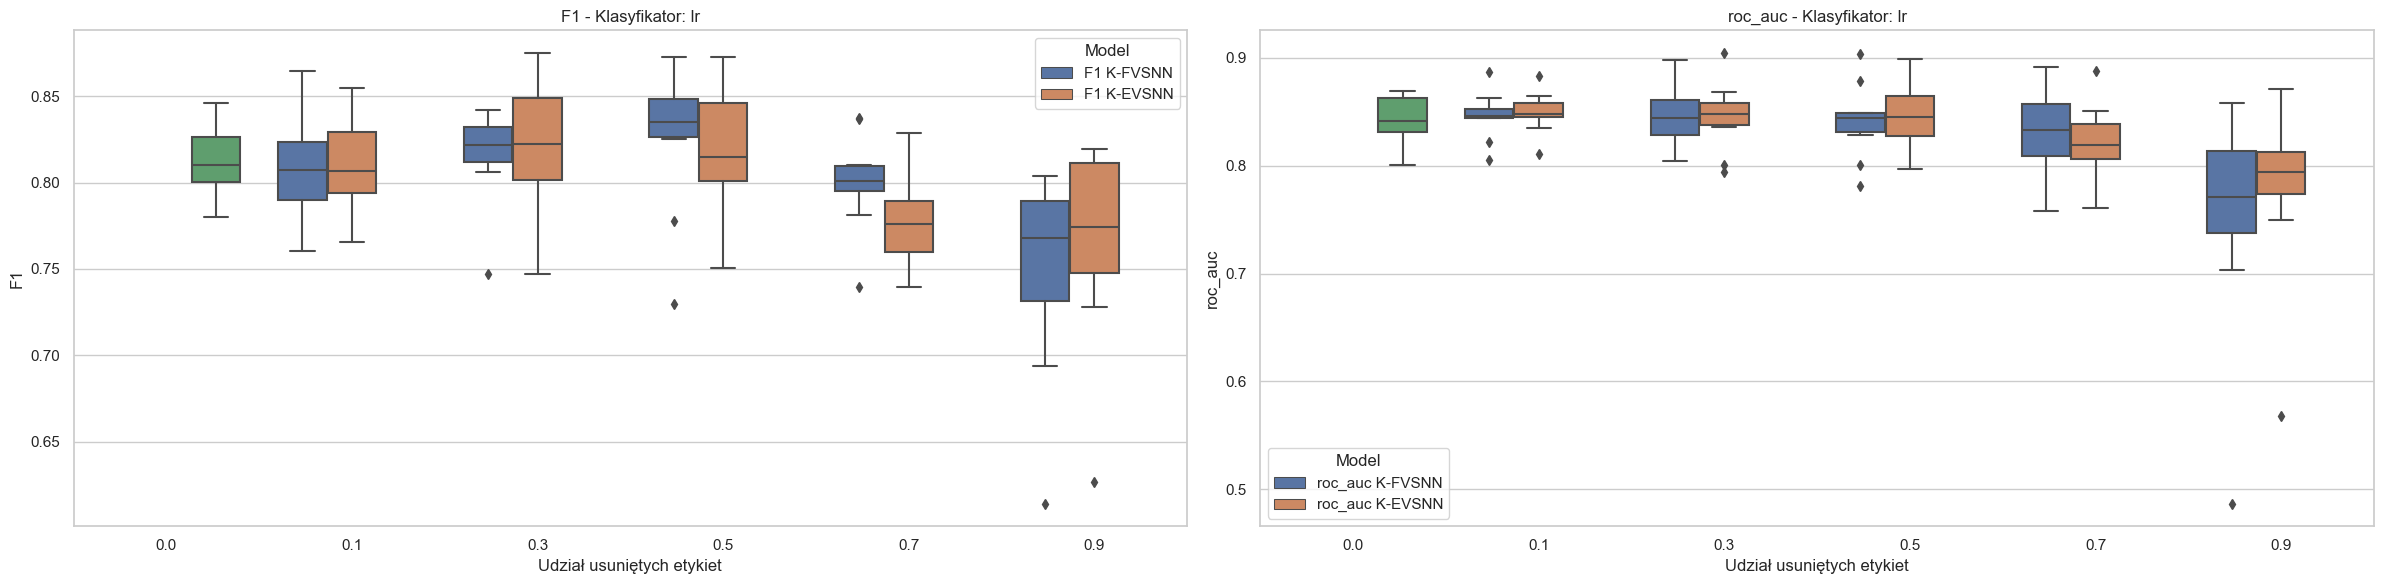

In [87]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_HFCR[results_df_HFCR['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [8]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(HFCR, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            
                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_HFCR = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_HFCR = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 1h 36min 7s
Wall time: 2h 28min 24s


In [11]:
results_df_test_HFCR.nlargest(10, 'F1 K-FVSNN')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
64               0           0             2         10    0.903525   
67               0           1             0         10    0.903525   
68               0           1             1         10    0.903525   
69               0           1             2         10    0.903525   
71               0           2            -1         10    0.903525   
72               0           2             0         10    0.903525   
76               1          -2            -1         10    0.903525   
82               1          -1             0         10    0.903525   
84               1          -1             2         10    0.903525   
89               1           0             2         10    0.903525   

    F1 K-EVSNN  F1 K-erased  
64    0.825708     0.866667  
67    0.825708     0.866667  
68    0.825708     0.866667  
69    0.825708     0.866667  
71    0.825708     0.866667  
72    0.825708     0.866667  
76    0.825708     0.866667  
82    0.825708     0.866667  
84    0.825708     0.866667  
89    0.825708     0.866667

In [72]:
results_df_test_HFCR.nlargest(10, 'F1 K-erased')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.800000   
1              -2          -2            -1         10    0.825708   
2              -2          -2             0         10    0.866667   
3              -2          -2             1         10    0.802336   
4              -2          -2             2         10    0.866667   
5              -2          -1            -2         10    0.778846   
6              -2          -1            -1         10    0.839208   
7              -2          -1             0         10    0.778846   
8              -2          -1             1         10    0.778846   
9              -2          -1             2         10    0.778846   

   F1 K-EVSNN  F1 K-erased  
0    0.825708     0.866667  
1    0.825708     0.866667  
2    0.825708     0.866667  
3    0.825708     0.866667  
4    0.825708     0.866667  
5    0.825708     0.866667  
6    0.825708     0.866667  
7    0.825708     0.866667  
8    0.825708     0.866667  
9    0.825708     0.866667

In [13]:
results_df_valid_HFCR.nlargest(10, 'F1 K-FVSNN')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
3               -2          -2             1         10    0.713290   
5               -2          -1            -2         10    0.690667   
7               -2          -1             0         10    0.690667   
8               -2          -1             1         10    0.690667   
9               -2          -1             2         10    0.690667   
10              -2           0            -2         10    0.690667   
12              -2           0             0         10    0.690667   
16              -2           1            -1         10    0.690667   
17              -2           1             0         10    0.690667   
20              -2           2            -2         10    0.690667   

    F1 K-EVSNN  F1 erased  
3     0.668275   0.645833  
5     0.668275   0.645833  
7     0.668275   0.645833  
8     0.668275   0.645833  
9     0.668275   0.645833  
10    0.668275   0.645833  
12    0.668275   0.645833  
16    0.668275   0.645833  
17    0.668275   0.645833  
20    0.668275   0.645833

In [14]:
results_df_valid_HFCR.nlargest(10, 'F1 erased')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.645833   
1              -2          -2            -1         10    0.668275   
2              -2          -2             0         10    0.645833   
3              -2          -2             1         10    0.713290   
4              -2          -2             2         10    0.645833   
5              -2          -1            -2         10    0.690667   
6              -2          -1            -1         10    0.623131   
7              -2          -1             0         10    0.690667   
8              -2          -1             1         10    0.690667   
9              -2          -1             2         10    0.690667   

   F1 K-EVSNN  F1 erased  
0    0.668275   0.645833  
1    0.668275   0.645833  
2    0.668275   0.645833  
3    0.668275   0.645833  
4    0.668275   0.645833  
5    0.668275   0.645833  
6    0.668275   0.645833  
7    0.668275   0.645833  
8    0.668275   0.645833  
9    0.668275   0.645833

#### Iono (4)

In [132]:
iono['class'].value_counts()

class
0    225
1    126
Name: count, dtype: int64

In [149]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10

results = []

for iteration in range(num_iterations):
    
    df_train, df_test = train_test_split(iono, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:
        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():
            
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, distance_param=1, 
                                        val_member=1, train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_iono = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_iono = results_df_iono.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_iono = results_df_iono.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_iono = pd.merge(mean_results_df_iono, std_results_df_iono, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_iono)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.823058         0.901867          0.836792   
1        0.0         lr    0.862968         0.893644          0.869811   
2        0.0        xgb    0.916695         0.966772          0.917925   
3        0.1        knn    0.824267         0.896108          0.837736   
4        0.1         lr    0.855215         0.879753          0.863208   
5        0.1        xgb    0.916415         0.967433          0.917925   
6        0.3        knn    0.823525         0.887547          0.836792   
7        0.3         lr    0.855240         0.867726          0.864151   
8        0.3        xgb    0.903655         0.959007          0.905660   
9        0.5        knn    0.788058         0.865098          0.814151   
10       0.5         lr    0.840291         0.855898          0.851887   
11       0.5        xgb    0.902229         0.955361          0.903774   
12       0.7        knn    0.698476   

In [191]:
results_df_iono.to_csv('results_df_iono.csv', index=False)
mean_results_df_iono.to_csv('mean_results_df_iono.csv', index=False)
mean_std_results_df_iono.to_csv('mean_std_results_df_iono.csv', index=False)

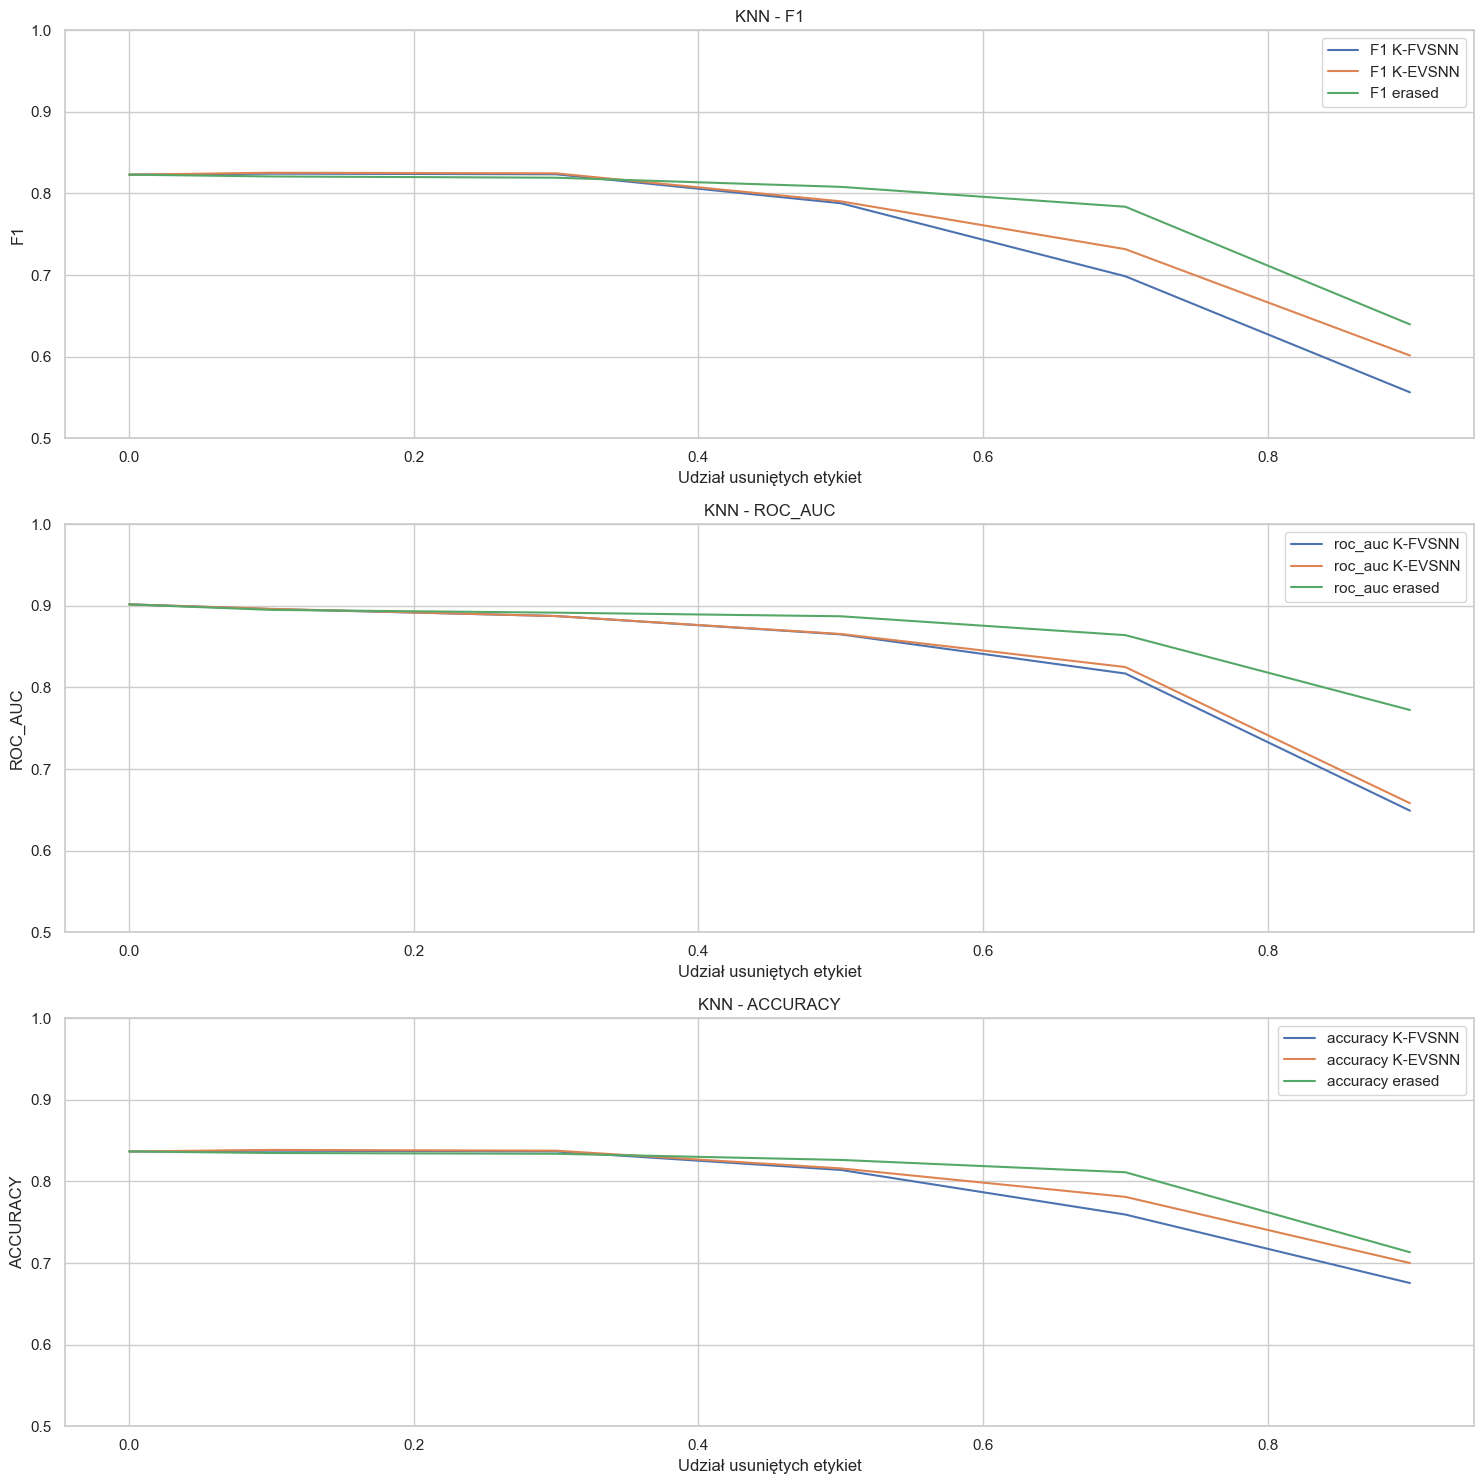

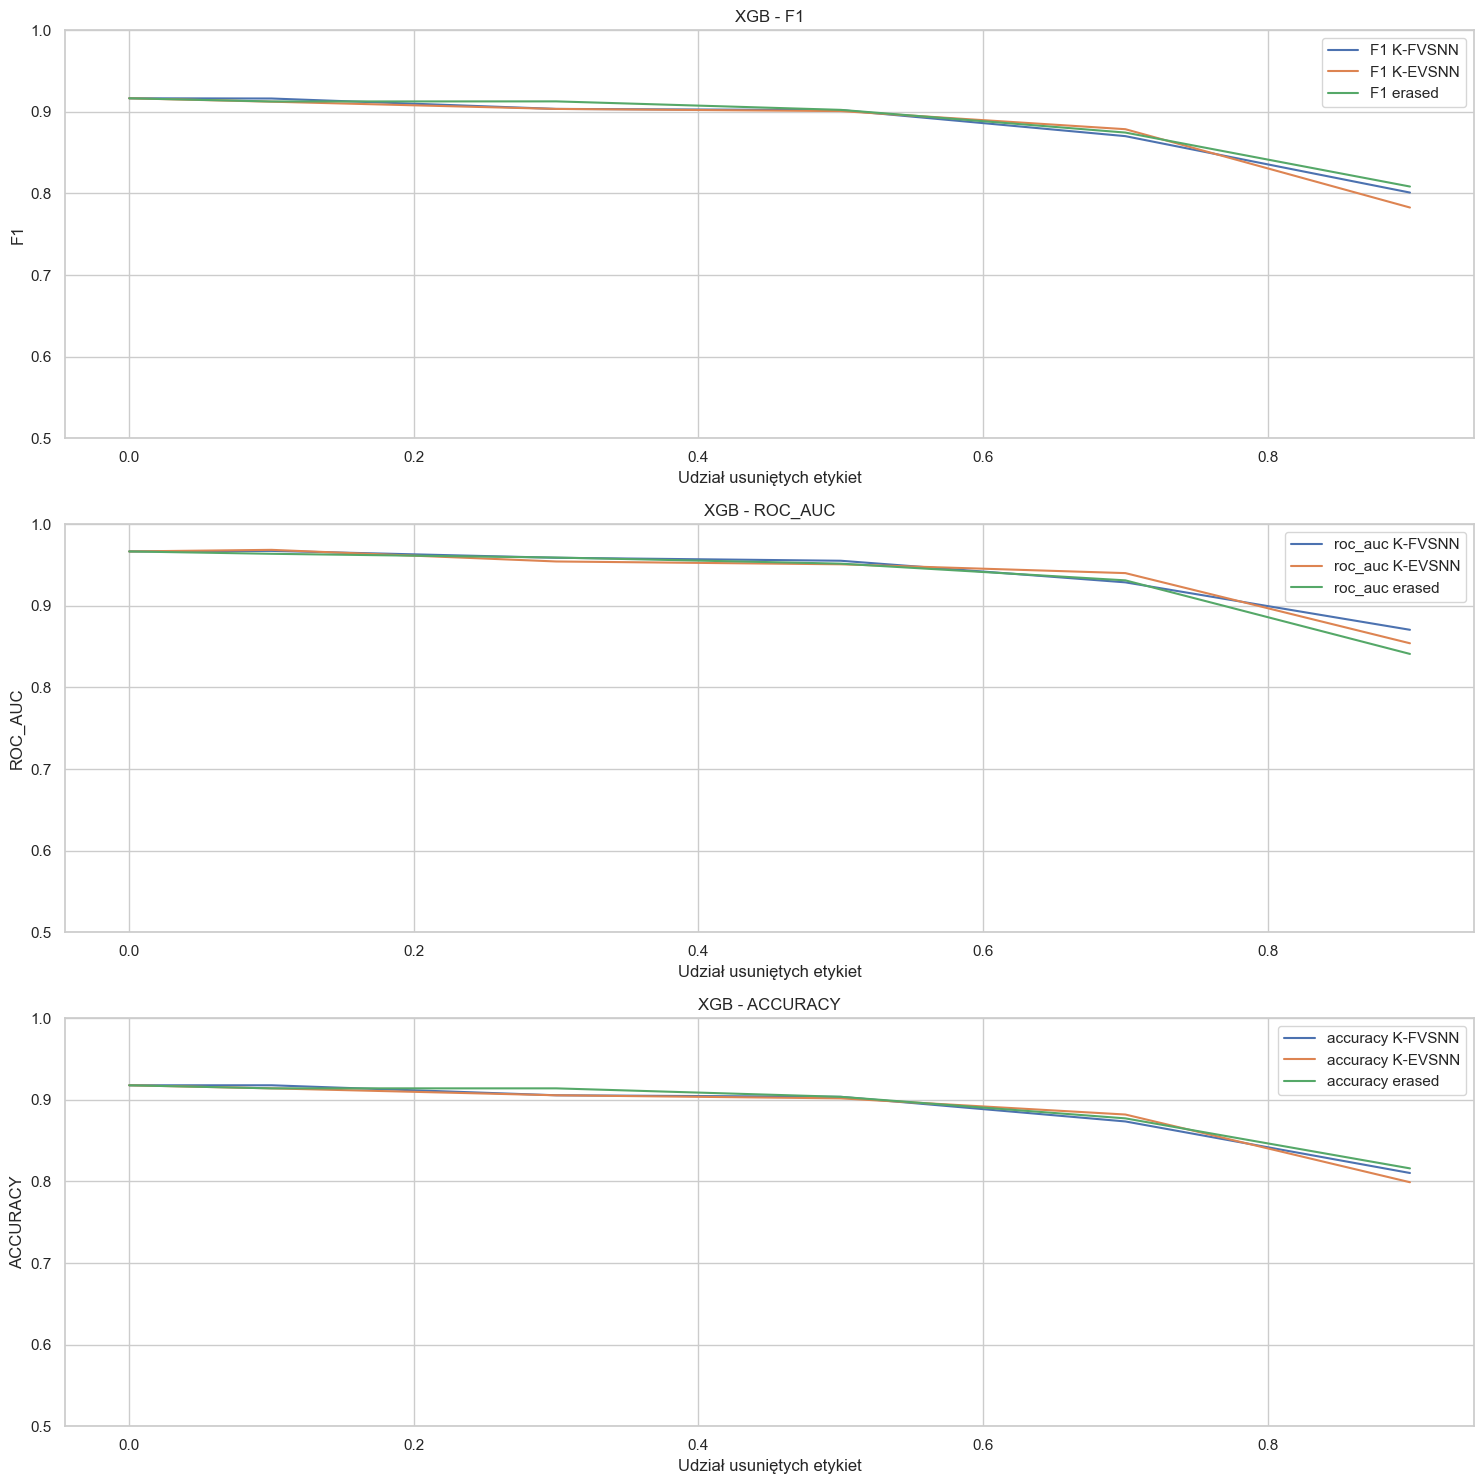

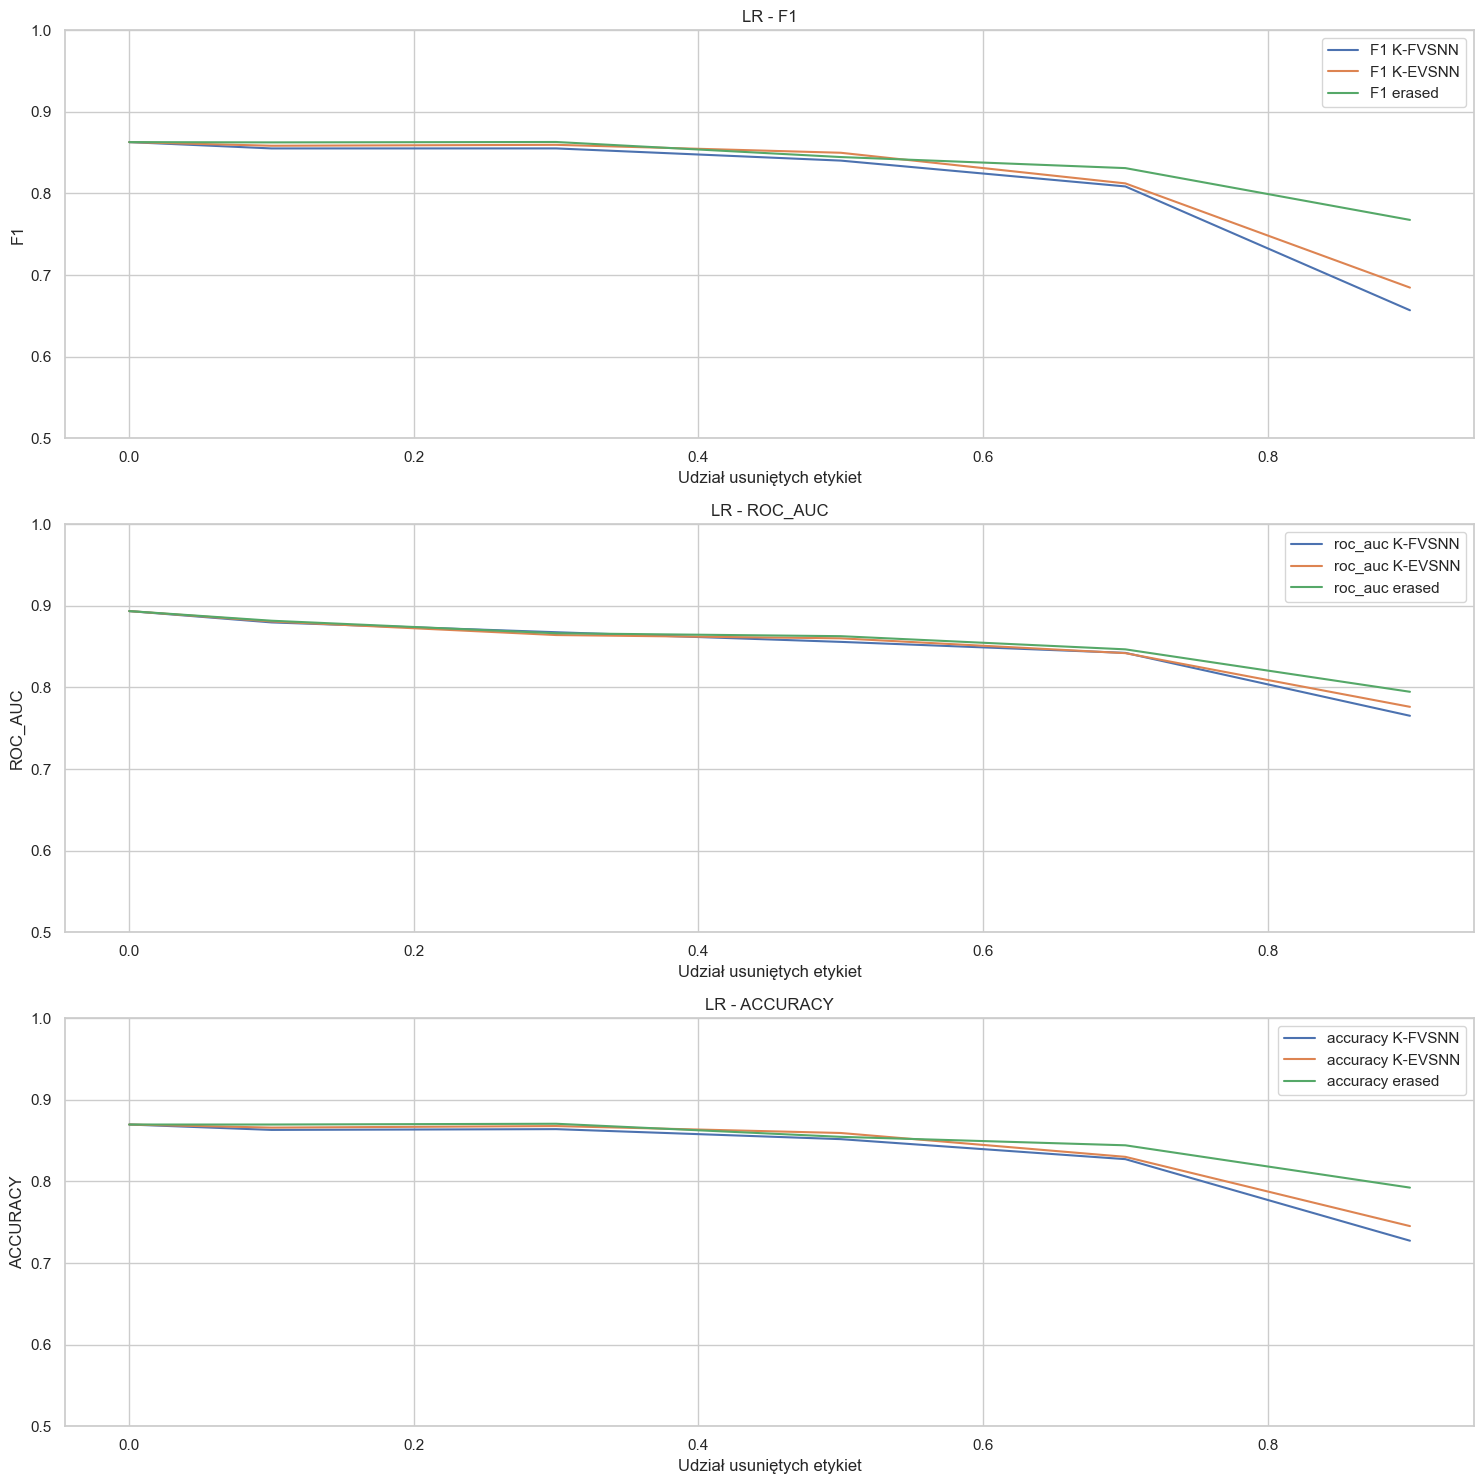

In [150]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_iono[mean_results_df_iono['classifier'] == clf]['fraction'],
                     mean_results_df_iono[mean_results_df_iono['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [151]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_iono[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_iono[mean_std_results_df_iono[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
2       0.0        xgb    0.916695        0.031993

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
2       0.0        xgb    0.916695        0.031993

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
2       0.0        xgb   0.916695       0.031993

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
5       0.1        xgb         0.967433             0.016779

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
5       0.1        xgb         0.968715             0.016041

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb        0.966772            0.015956

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
2       0.0        xgb          0.917925              0.031462
5       0.1        xgb          0.917925     

In [66]:
results_df_iono=pd.read_csv("...\\results_df_iono.csv")
mean_results_df_iono=pd.read_csv("...\\mean_results_df_iono.csv")
mean_std_results_df_iono=pd.read_csv("...\\mean_std_results_df_iono.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_iono.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.823 (0.043)  0.902 (0.027)   0.837 (0.036)
1         lr  0.863 (0.034)  0.894 (0.030)   0.870 (0.032)
2        xgb  0.917 (0.032)  0.967 (0.016)   0.918 (0.031)


In [69]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.916 (0.032)   0.967 (0.017)    0.918 (0.031)   
8        0.3        xgb  0.904 (0.033)   0.959 (0.021)    0.906 (0.032)   
11       0.5        xgb  0.902 (0.032)   0.955 (0.019)    0.904 (0.032)   
14       0.7        xgb  0.870 (0.024)   0.929 (0.018)    0.874 (0.023)   
17       0.9        xgb  0.801 (0.049)   0.871 (0.065)    0.810 (0.053)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.913 (0.035)   0.969 (0.016)    0.914 (0.034)  0.913 (0.026)   
8   0.904 (0.036)   0.954 (0.022)    0.906 (0.036)  0.913 (0.028)   
11  0.901 (0.033)   0.951 (0.020)    0.902 (0.033)  0.903 (0.032)   
14  0.879 (0.028)   0.940 (0.025)    0.882 (0.027)  0.875 (0.033)   
17  0.783 (0.070)   0.854 (0.068)    0.799 (0.060)  0.808 (0.060)   

   roc_auc erased accuracy erased  
5   0.964 (0.017)   0.914 (0.025)  
8   0.959 (0.018)   0.914 (0.028)  
11  0.952 (0.019)   0.904 

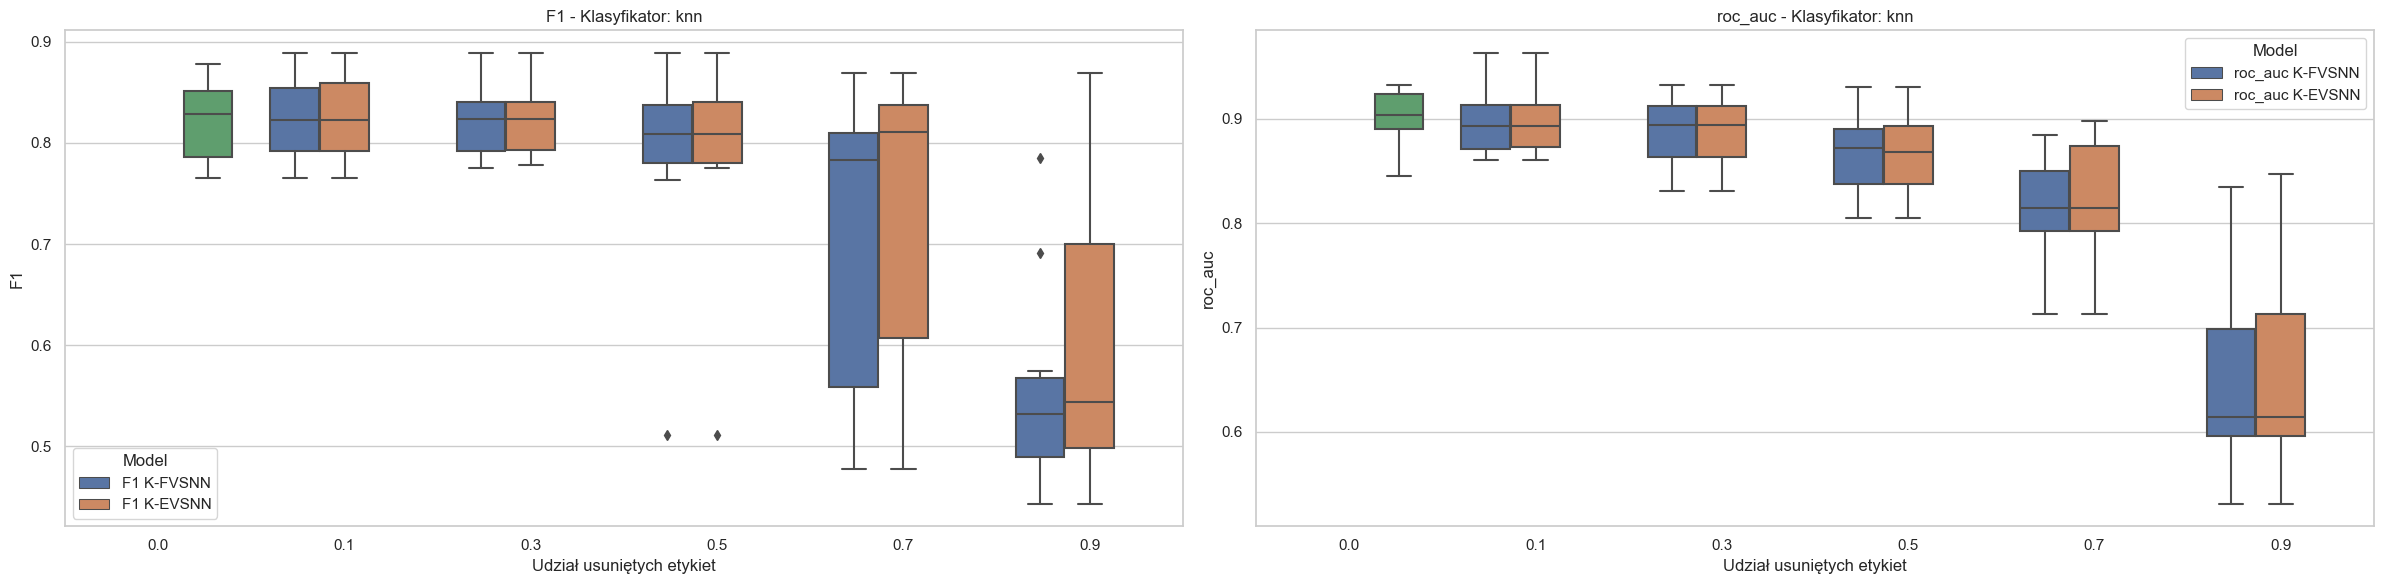

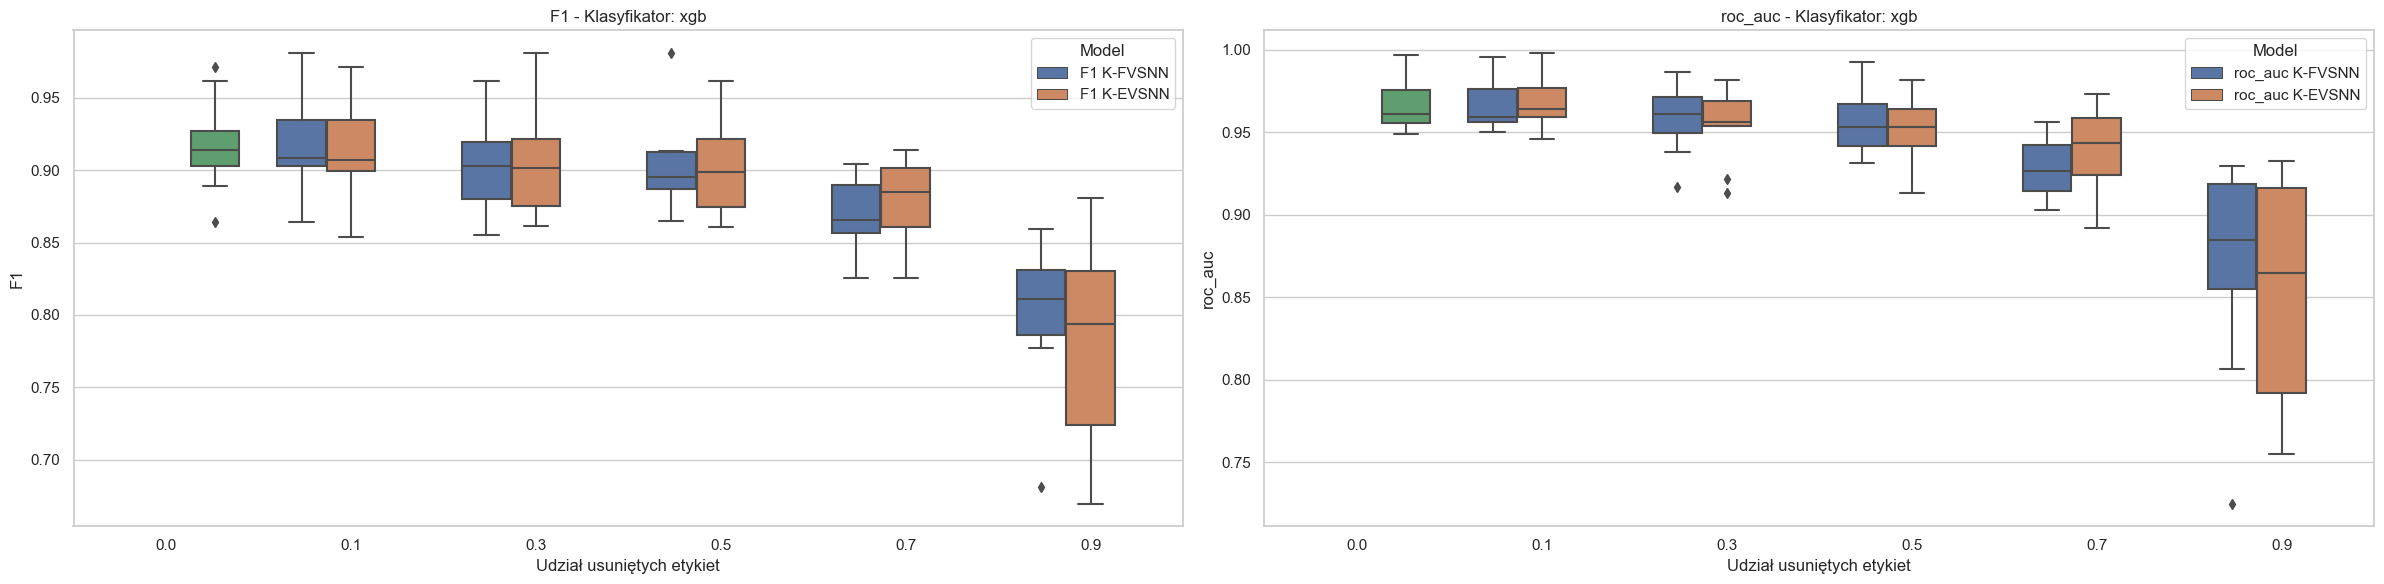

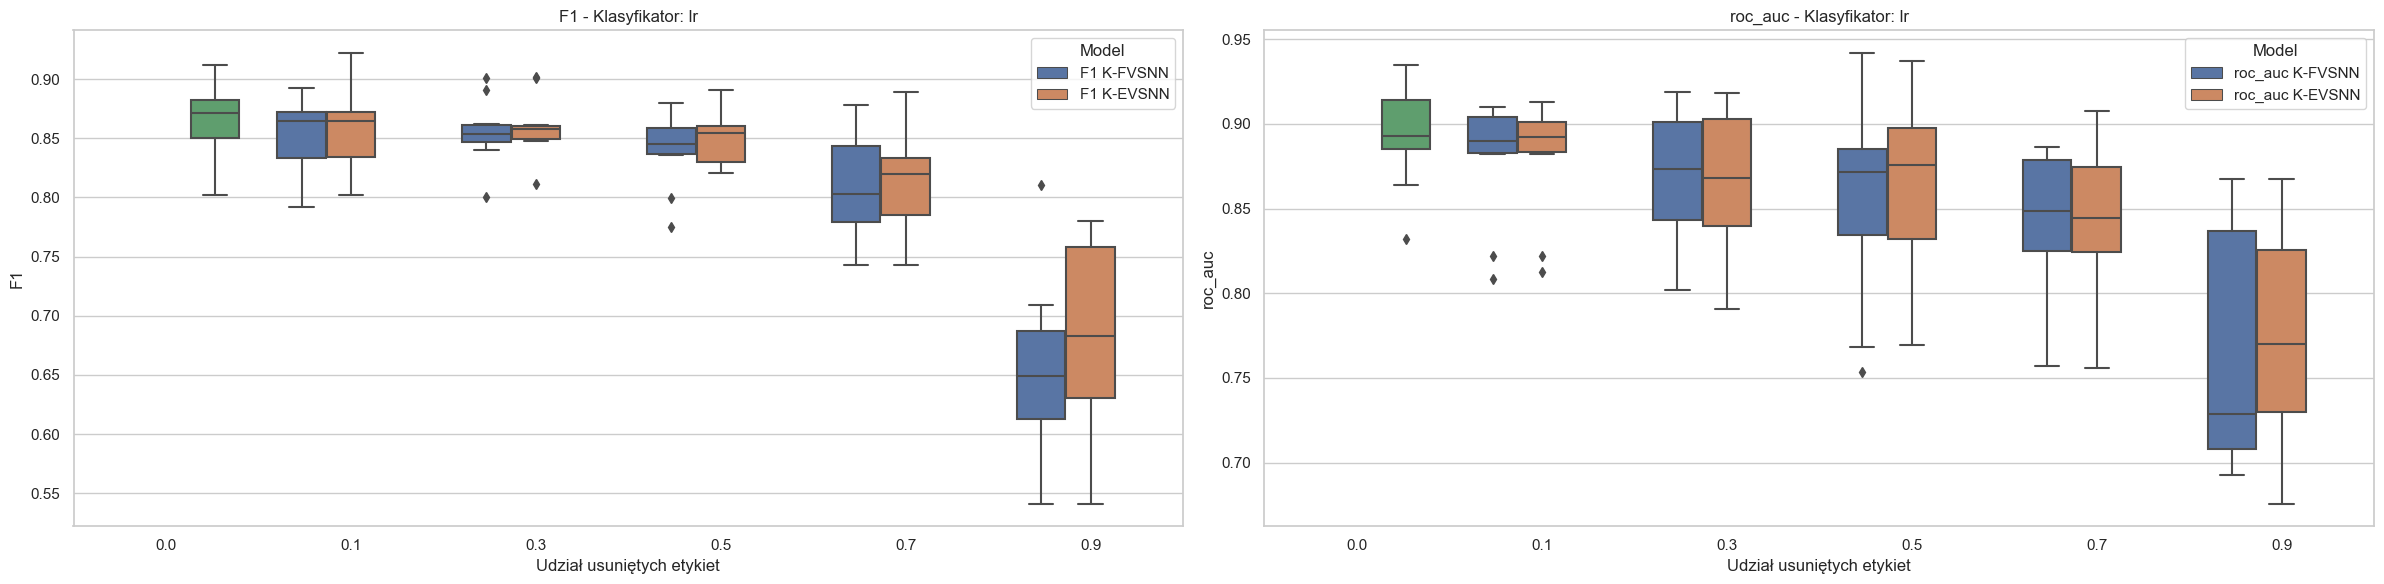

In [88]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_iono[results_df_iono['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [97]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(iono, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')
 
                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_iono = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_iono = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 2h 16min 22s
Wall time: 2h 39min 16s


In [98]:
print(results_df_test_iono.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_iono.nlargest(10, 'F1 K-erased'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10     0.93908   
1              -2          -2            -1         10     0.93908   
2              -2          -2             0         10     0.93908   
3              -2          -2             1         10     0.93908   
4              -2          -2             2         10     0.93908   
5              -2          -1            -2         10     0.93908   
6              -2          -1            -1         10     0.93908   
7              -2          -1             0         10     0.93908   
8              -2          -1             1         10     0.93908   
9              -2          -1             2         10     0.93908   

   F1 K-EVSNN  F1 K-erased  
0     0.93908      0.93908  
1     0.93908      0.93908  
2     0.93908      0.93908  
3     0.93908      0.93908  
4     0.93908      0.93908  
5     0.93908      0.93908  
6     0.93908      0.93908

In [100]:
print(results_df_valid_iono.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_iono.nlargest(10, 'F1 erased'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.832817   
1              -2          -2            -1         10    0.832817   
2              -2          -2             0         10    0.832817   
3              -2          -2             1         10    0.832817   
4              -2          -2             2         10    0.832817   
5              -2          -1            -2         10    0.832817   
6              -2          -1            -1         10    0.832817   
7              -2          -1             0         10    0.832817   
8              -2          -1             1         10    0.832817   
9              -2          -1             2         10    0.832817   

   F1 K-EVSNN  F1 erased  
0    0.832817   0.832817  
1    0.832817   0.832817  
2    0.832817   0.832817  
3    0.832817   0.832817  
4    0.832817   0.832817  
5    0.832817   0.832817  
6    0.832817   0.832817  
7    0.832817

#### Hepatitis (0)

In [49]:
hepatitis['class'].value_counts()

class
0    67
1    13
Name: count, dtype: int64

In [170]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024, solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):

    df_train, df_test = train_test_split(hepatitis, test_size=0.3, random_state=2024 - iteration**(2))
    
    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                        distance_param=1, 
                                        val_member=1, 
                                        train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_hepatitis = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_hepatitis = results_df_hepatitis.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_hepatitis = results_df_hepatitis.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_hepatitis = pd.merge(mean_results_df_hepatitis, std_results_df_hepatitis, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_hepatitis)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.778239         0.673982          0.829167   
1        0.0         lr    0.837341         0.807125          0.854167   
2        0.0        xgb    0.845746         0.871545          0.854167   
3        0.1        knn    0.767050         0.638531          0.820833   
4        0.1         lr    0.832795         0.759069          0.845833   
5        0.1        xgb    0.843527         0.821638          0.854167   
6        0.3        knn    0.780662         0.627172          0.841667   
7        0.3         lr    0.831265         0.751435          0.845833   
8        0.3        xgb    0.822305         0.824135          0.837500   
9        0.5        knn    0.781502         0.629675          0.845833   
10       0.5         lr    0.818610         0.807984          0.829167   
11       0.5        xgb    0.810145         0.779092          0.841667   
12       0.7        knn    0.781502   

In [192]:
results_df_hepatitis.to_csv('results_df_hepatitis.csv', index=False)
mean_results_df_hepatitis.to_csv('mean_results_df_hepatitis.csv', index=False)
mean_std_results_df_hepatitis.to_csv('mean_std_results_df_hepatitis.csv', index=False)

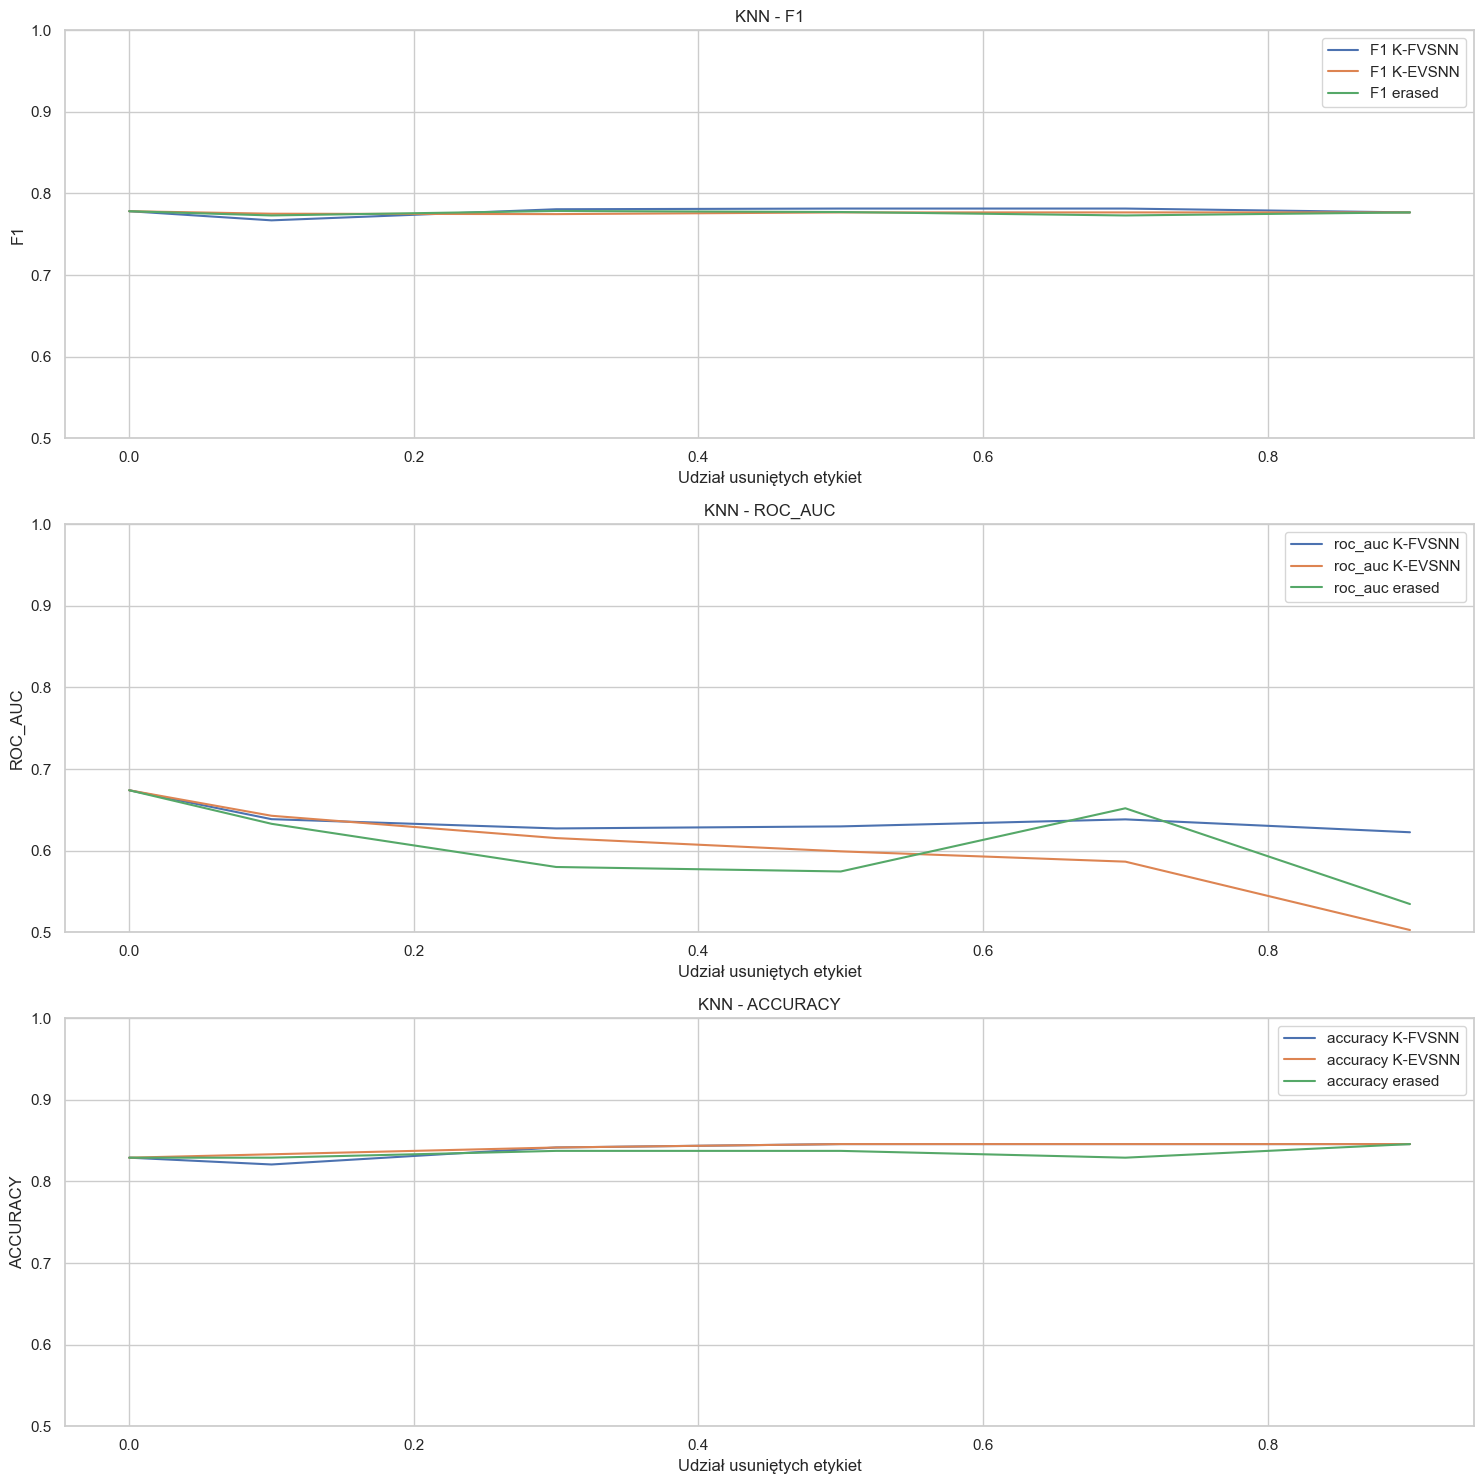

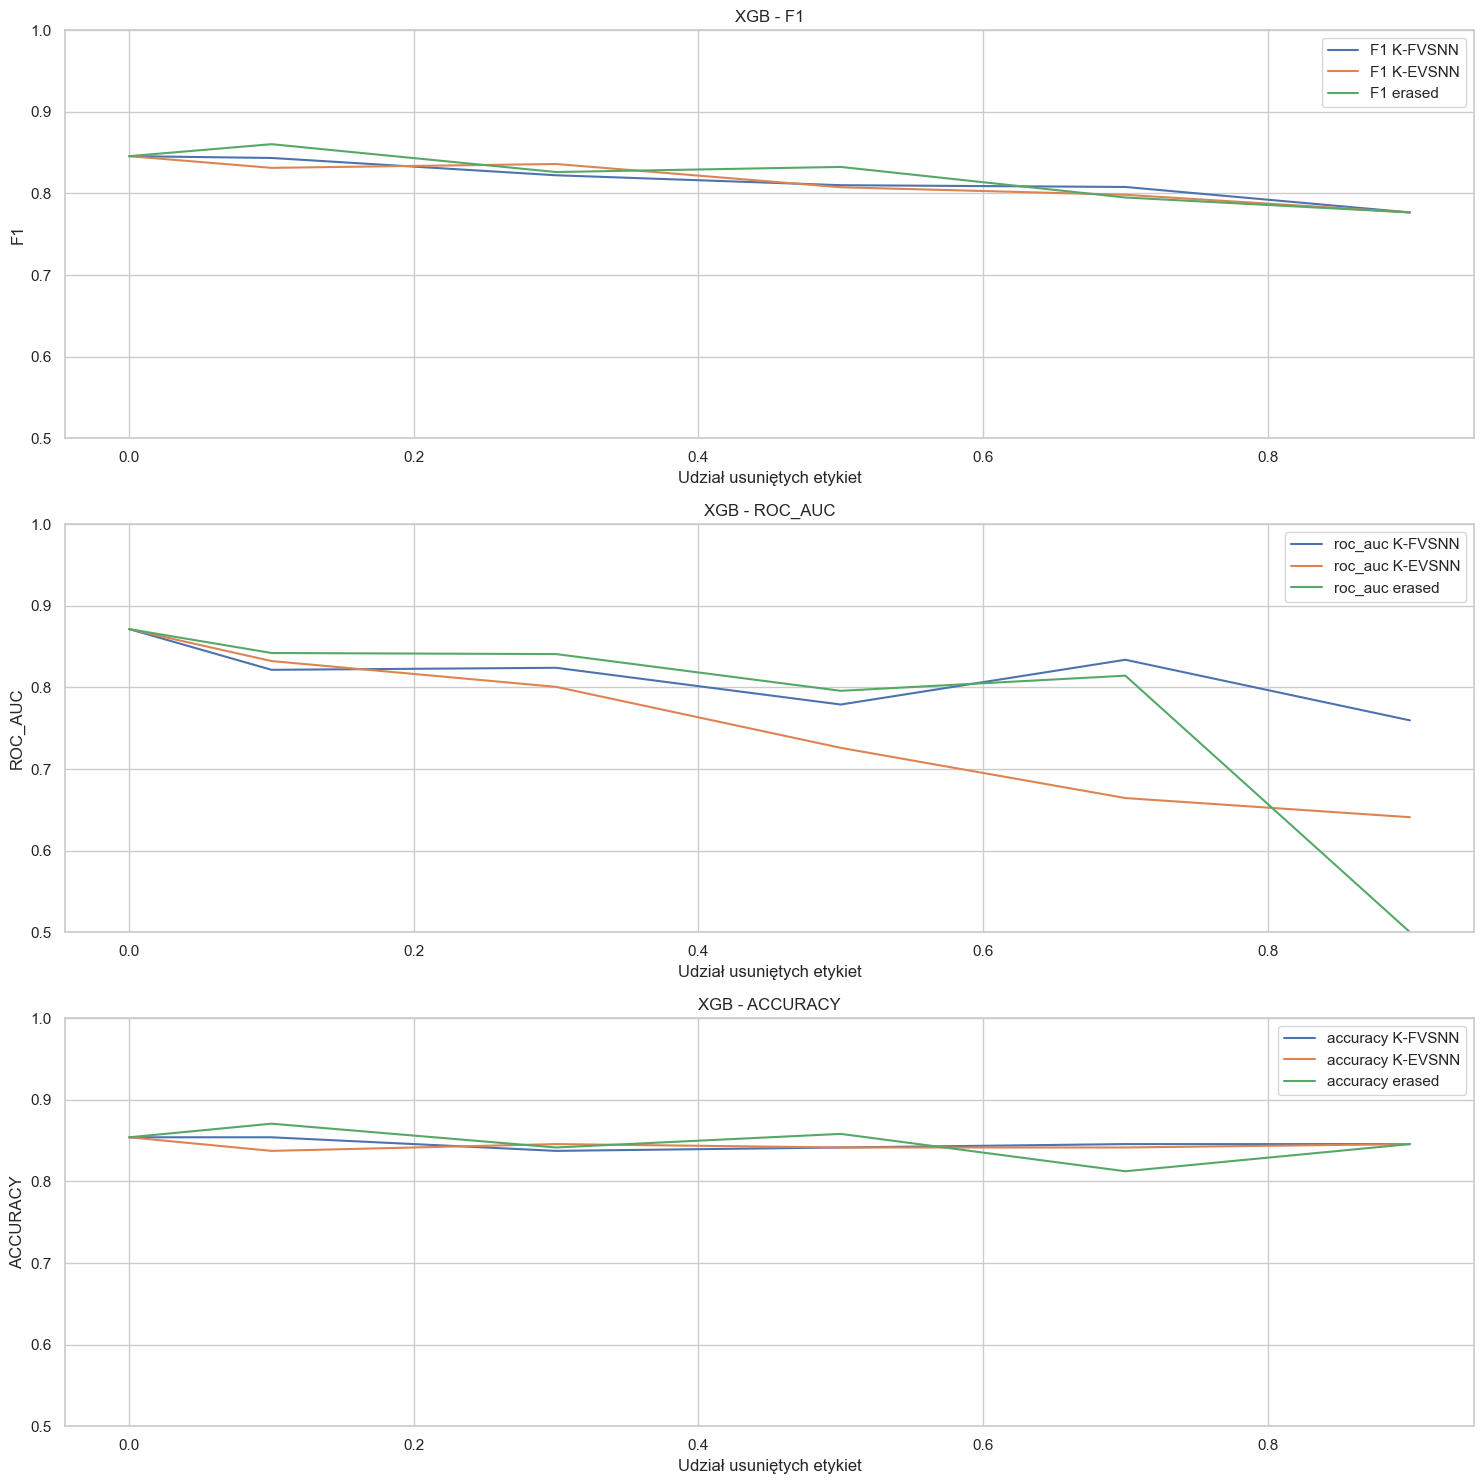

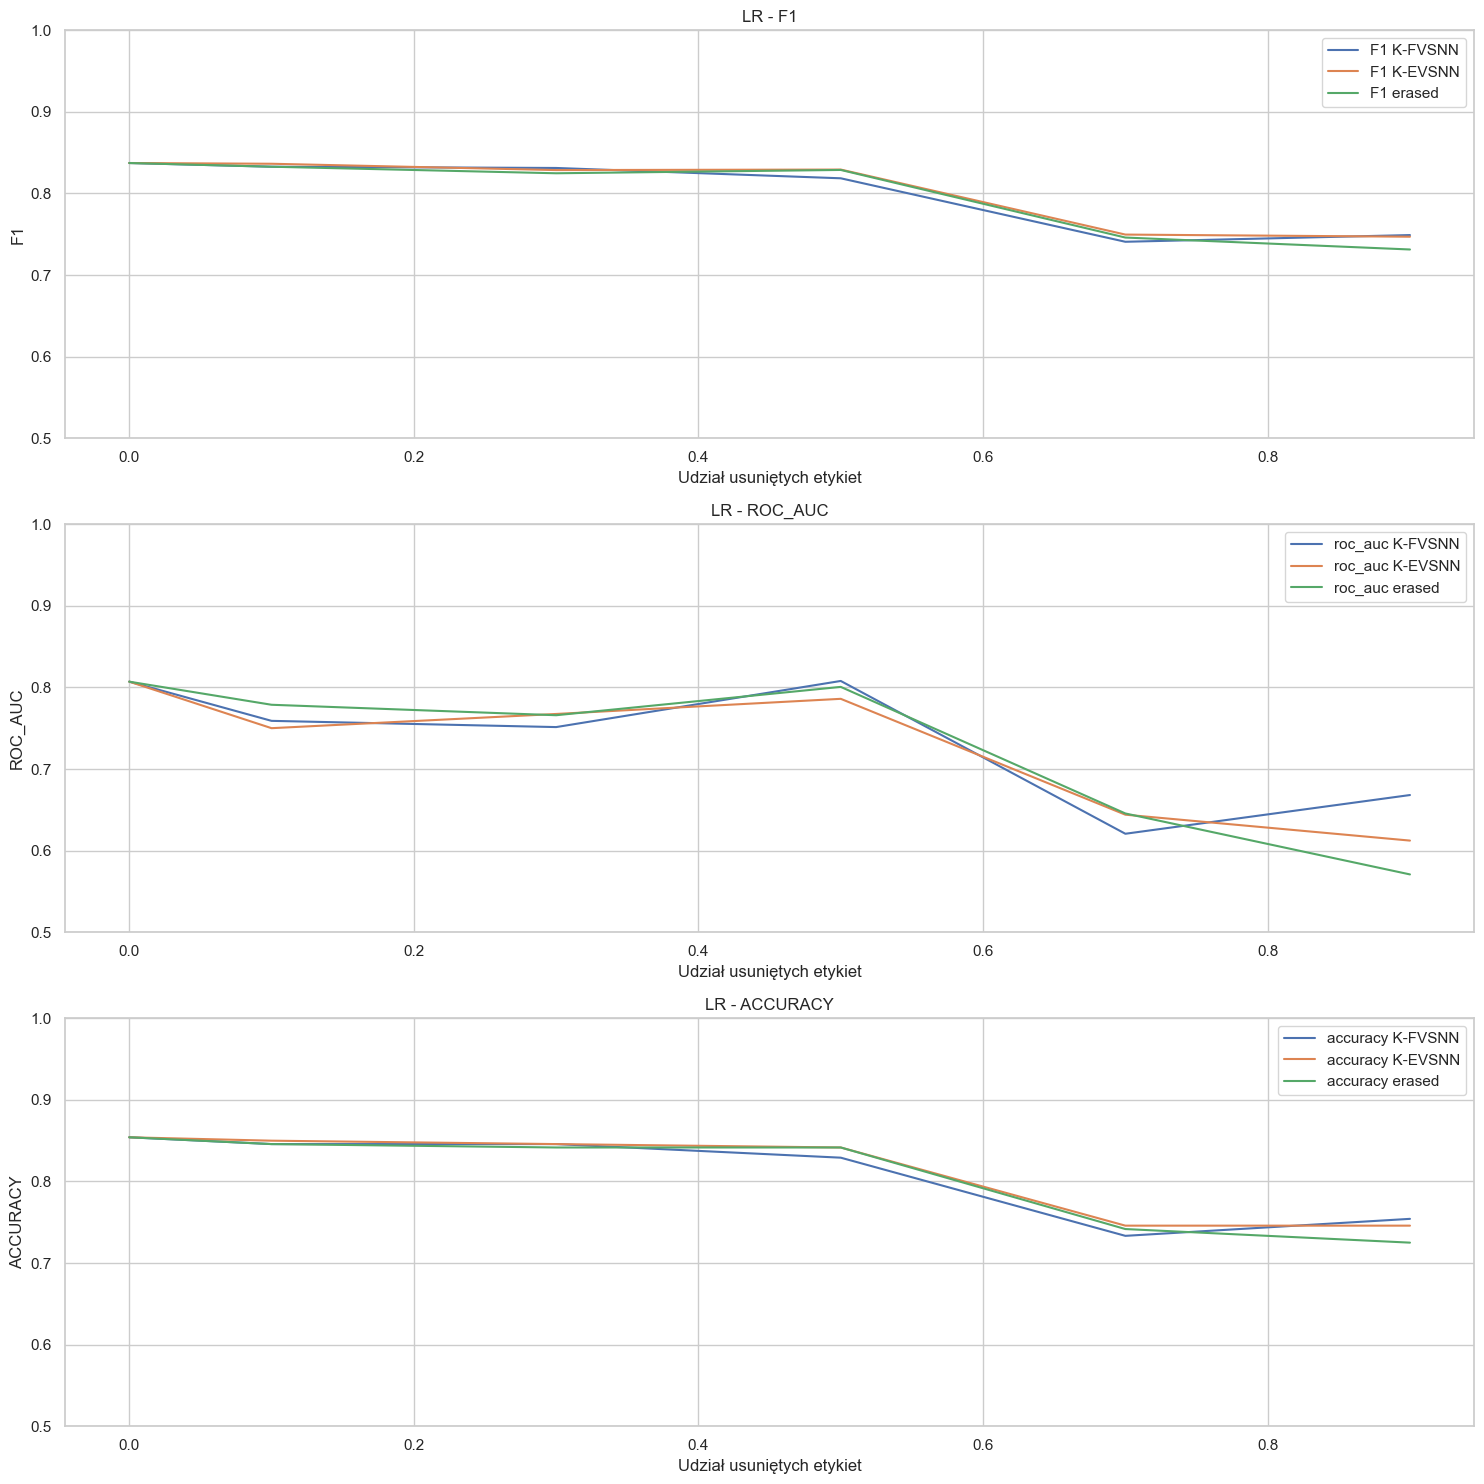

In [171]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_std_results_df_hepatitis[mean_std_results_df_hepatitis['classifier'] == clf]['fraction'],
                     mean_std_results_df_hepatitis[mean_std_results_df_hepatitis['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [172]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_hepatitis[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_hepatitis[mean_std_results_df_hepatitis[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
2       0.0        xgb    0.845746        0.099841

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
2       0.0        xgb    0.845746        0.099841

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
5       0.1        xgb   0.860416       0.096221

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
2       0.0        xgb         0.871545             0.084197

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
2       0.0        xgb         0.871545             0.084197

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb        0.871545            0.084197

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
1       0.0         lr          0.854167              0.071497
2       0.0        xgb          0.854167     

In [70]:
results_df_hepatitis=pd.read_csv("...\\results_df_hepatitis.csv")
mean_results_df_hepatitis=pd.read_csv("...\\mean_results_df_hepatitis.csv")
mean_std_results_df_hepatitis=pd.read_csv("...\\mean_std_results_df_hepatitis.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_hepatitis.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.778 (0.105)  0.674 (0.119)   0.829 (0.072)
1         lr  0.837 (0.092)  0.807 (0.089)   0.854 (0.071)
2        xgb  0.846 (0.100)  0.872 (0.084)   0.854 (0.091)


In [73]:
print(formatted_results[(formatted_results['classifier'] == 'xgb') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
5        0.1        xgb  0.844 (0.080)   0.822 (0.110)    0.854 (0.060)   
8        0.3        xgb  0.822 (0.108)   0.824 (0.088)    0.838 (0.084)   
11       0.5        xgb  0.810 (0.099)   0.779 (0.128)    0.842 (0.061)   
14       0.7        xgb  0.808 (0.123)   0.834 (0.095)    0.846 (0.086)   
17       0.9        xgb  0.777 (0.103)   0.760 (0.242)    0.846 (0.074)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
5   0.831 (0.088)   0.832 (0.110)    0.838 (0.077)  0.860 (0.096)   
8   0.836 (0.084)   0.801 (0.127)    0.846 (0.074)  0.826 (0.109)   
11  0.808 (0.118)   0.726 (0.218)    0.842 (0.073)  0.833 (0.109)   
14  0.798 (0.118)   0.664 (0.206)    0.842 (0.078)  0.795 (0.119)   
17  0.777 (0.103)   0.641 (0.235)    0.846 (0.074)  0.777 (0.103)   

   roc_auc erased accuracy erased  
5   0.842 (0.114)   0.871 (0.077)  
8   0.841 (0.099)   0.842 (0.081)  
11  0.796 (0.099)   0.858 

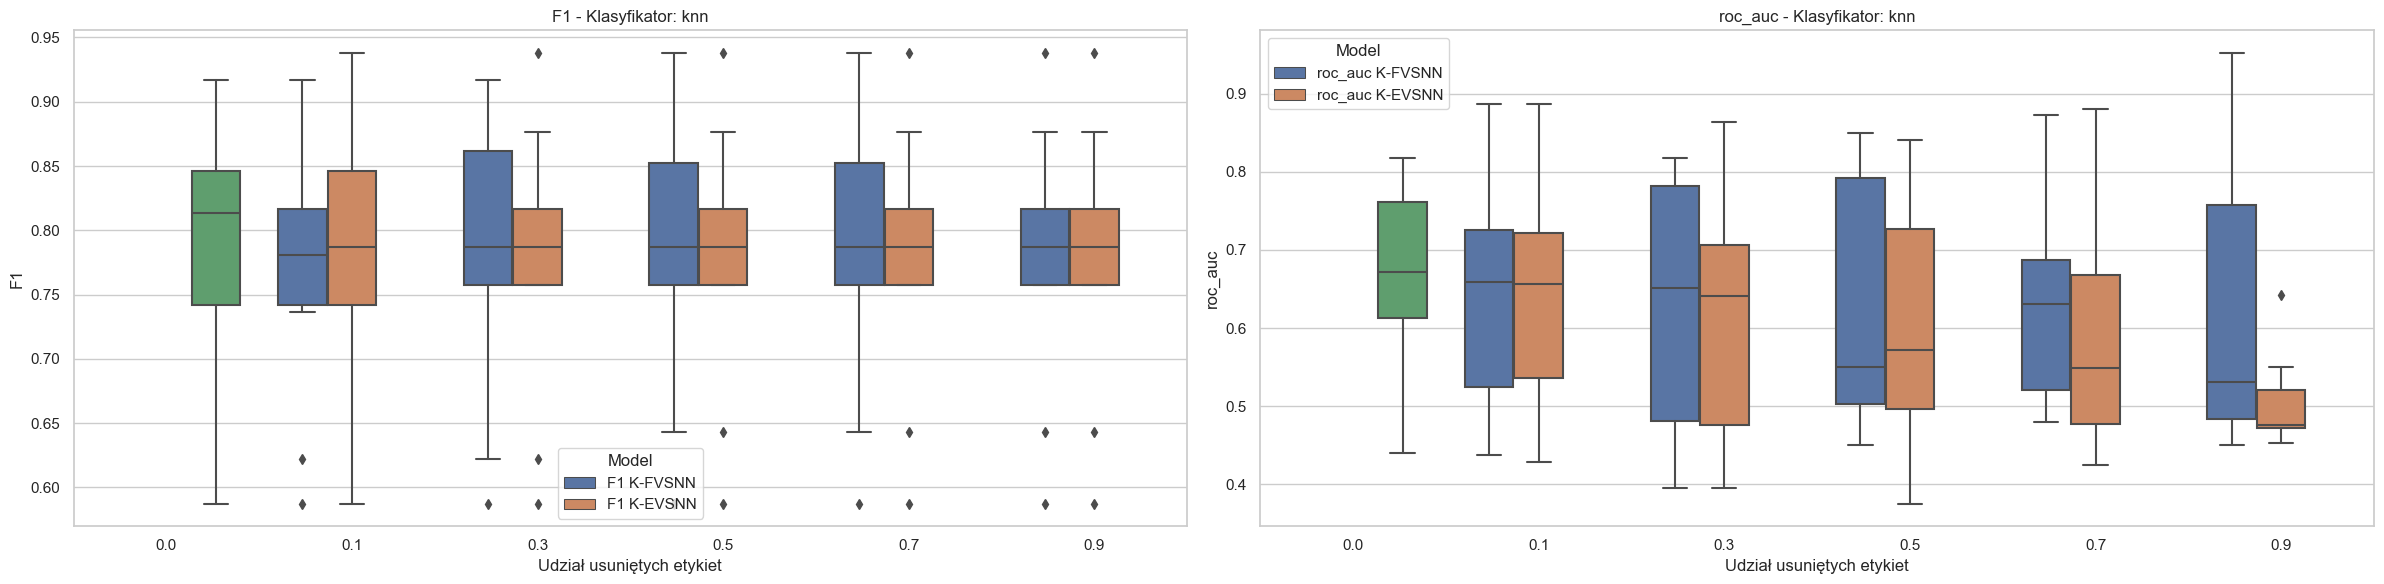

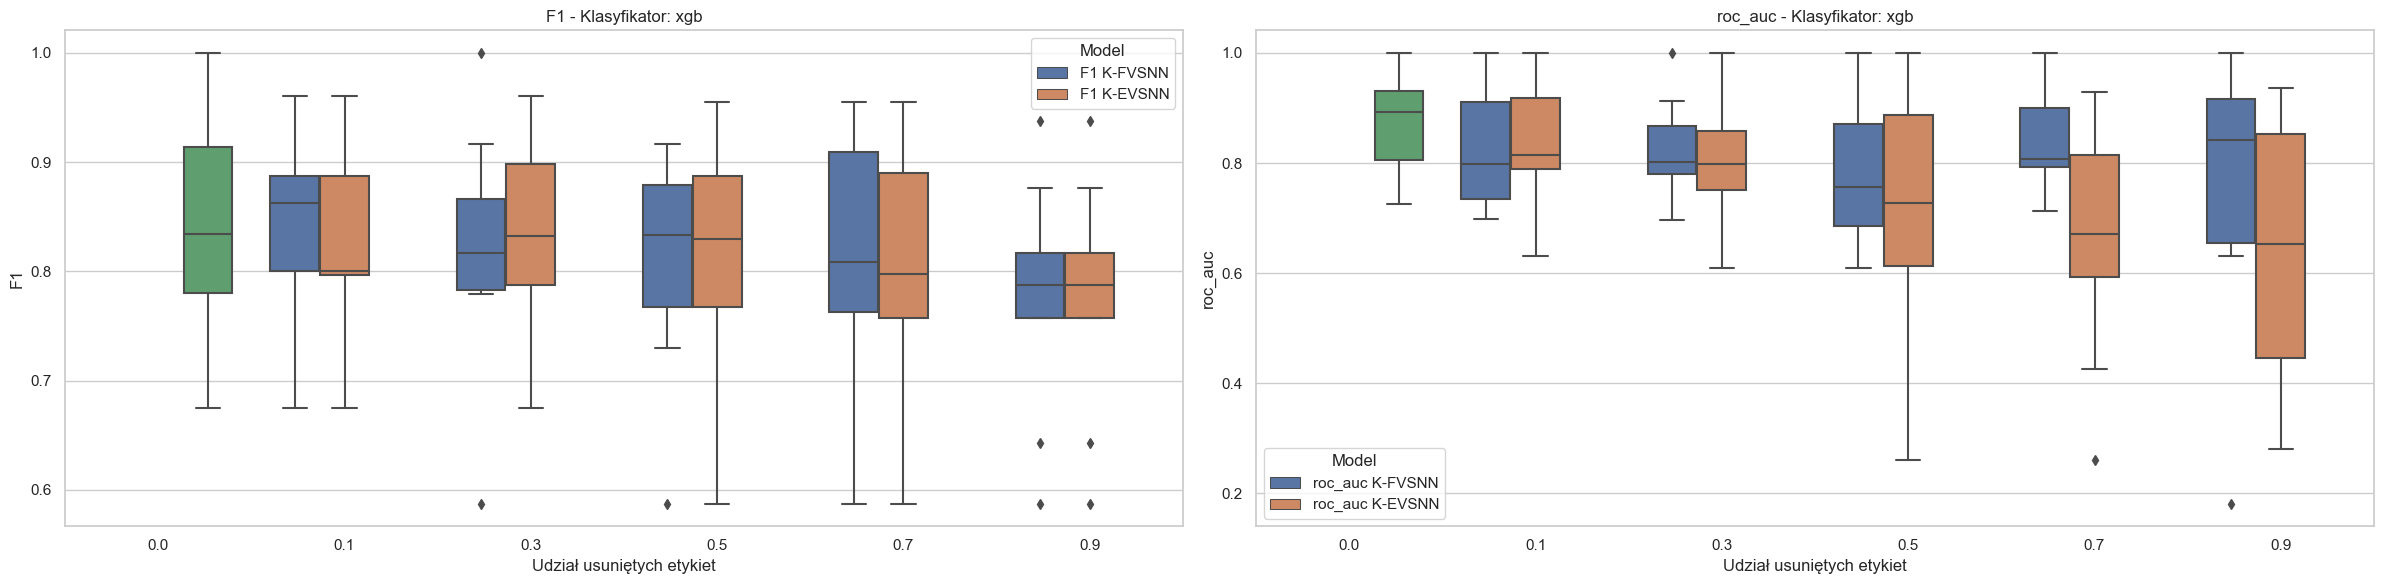

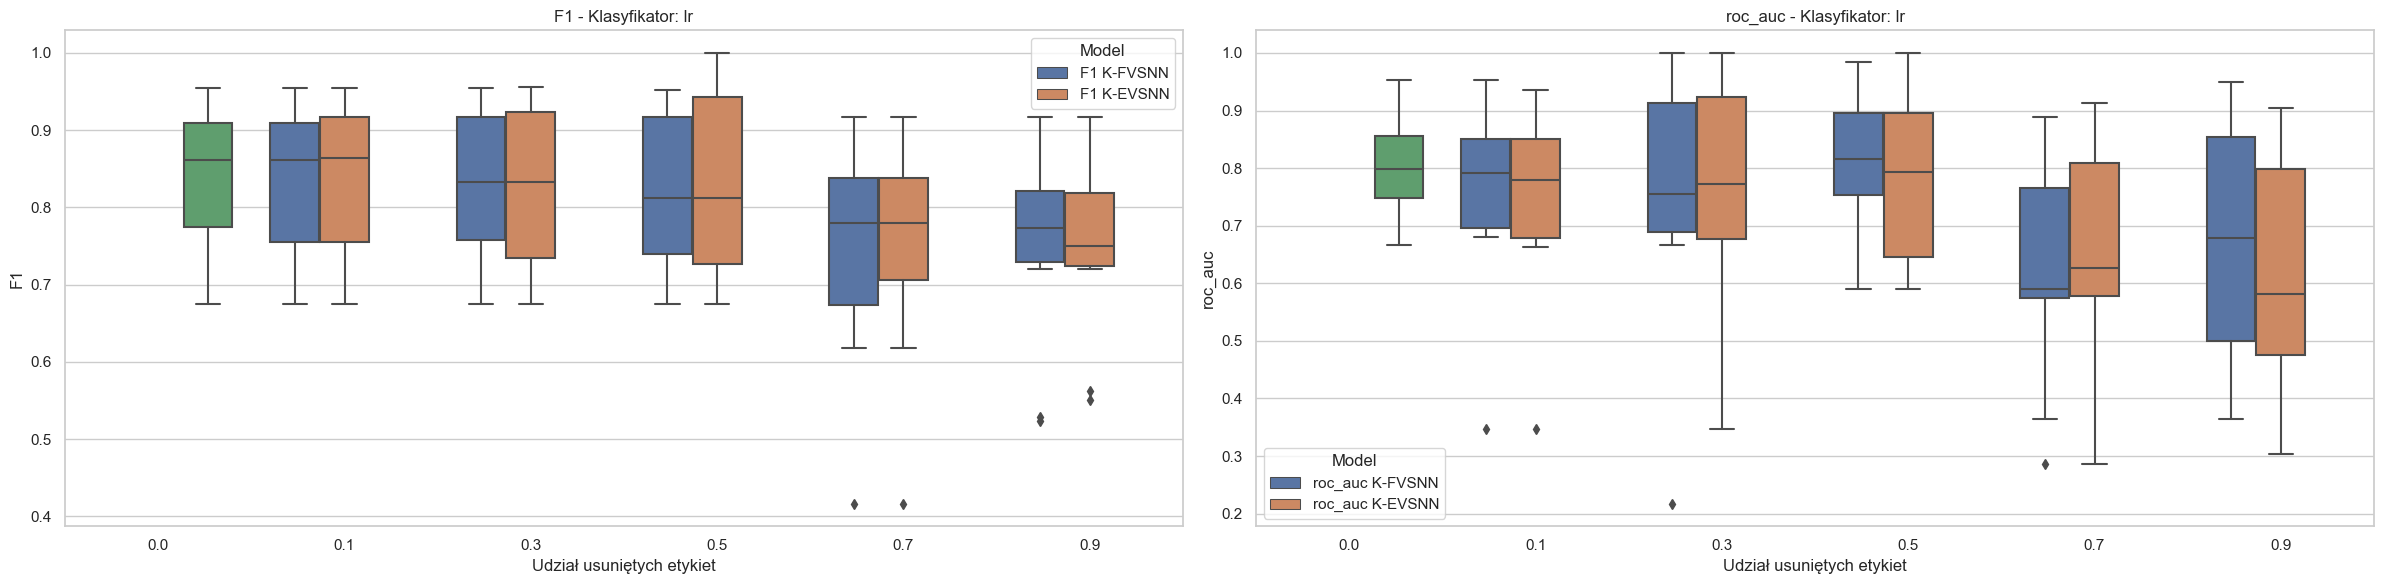

In [89]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_hepatitis[results_df_hepatitis['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [90]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(hepatitis, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            
                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                            y_pred_proba_val = clf.predict_proba(df_val.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN, 
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val,
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_hepatitis = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_hepatitis = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

CPU times: total: 44min 19s
Wall time: 9min 7s


In [91]:
results_df_test_hepatitis.nlargest(10, 'F1 K-FVSNN')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.816667   
1              -2          -2            -1         10    0.816667   
2              -2          -2             0         10    0.816667   
3              -2          -2             1         10    0.816667   
4              -2          -2             2         10    0.816667   
5              -2          -1            -2         10    0.816667   
6              -2          -1            -1         10    0.816667   
7              -2          -1             0         10    0.816667   
8              -2          -1             1         10    0.816667   
9              -2          -1             2         10    0.816667   

   F1 K-EVSNN  F1 K-erased  
0    0.816667     0.816667  
1    0.816667     0.816667  
2    0.816667     0.816667  
3    0.816667     0.816667  
4    0.816667     0.816667  
5    0.816667     0.816667  
6    0.816667     0.816667  
7    0.816667     0.816667  
8    0.816667     0.816667  
9    0.816667     0.816667

In [92]:
results_df_test_hepatitis.nlargest(10, 'F1 K-erased')

distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.816667   
1              -2          -2            -1         10    0.816667   
2              -2          -2             0         10    0.816667   
3              -2          -2             1         10    0.816667   
4              -2          -2             2         10    0.816667   
5              -2          -1            -2         10    0.816667   
6              -2          -1            -1         10    0.816667   
7              -2          -1             0         10    0.816667   
8              -2          -1             1         10    0.816667   
9              -2          -1             2         10    0.816667   

   F1 K-EVSNN  F1 K-erased  
0    0.816667     0.816667  
1    0.816667     0.816667  
2    0.816667     0.816667  
3    0.816667     0.816667  
4    0.816667     0.816667  
5    0.816667     0.816667  
6    0.816667     0.816667  
7    0.816667     0.816667  
8    0.816667     0.816667  
9    0.816667     0.816667

In [93]:
print(results_df_valid_hepatitis.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_hepatitis.nlargest(10, 'F1 K-erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
50               0          -2            -2         10         1.0   
51               0          -2            -1         10         1.0   
52               0          -2             0         10         1.0   
53               0          -2             1         10         1.0   
54               0          -2             2         10         1.0   
55               0          -1            -2         10         1.0   
56               0          -1            -1         10         1.0   
57               0          -1             0         10         1.0   
58               0          -1             1         10         1.0   
59               0          -1             2         10         1.0   

    F1 K-EVSNN  F1 K-erased  
50    0.816667          1.0  
51    0.816667          1.0  
52    0.816667          1.0  
53    0.816667          1.0  
54    0.816667          1.0  
55    0.816667          1.0  
56    0.

#### CKD (3)

In [219]:
CKD['class'].value_counts()

class
0    124
1     79
Name: count, dtype: int64

In [155]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10 

results = []

for iteration in range(num_iterations):
    df_train, df_test = train_test_split(CKD, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:

        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():

            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, distance_param=1, 
                                        val_member=1, train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_CKD = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_CKD = results_df_CKD.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_CKD = results_df_CKD.groupby(['fraction', 'classifier']).std().reset_index()

mean_std_results_df_CKD = pd.merge(mean_results_df_CKD, std_results_df_CKD, on=['fraction', 'classifier'], suffixes=('', '_std'))
print(mean_results_df_CKD)

    fraction classifier  F1 K-FVSNN  roc_auc K-FVSNN  accuracy K-FVSNN  \
0        0.0        knn    0.701597         0.708882          0.736066   
1        0.0         lr    0.958698         0.994291          0.959016   
2        0.0        xgb    0.986781         0.999889          0.986885   
3        0.1        knn    0.695128         0.700503          0.731148   
4        0.1         lr    0.957064         0.991671          0.957377   
5        0.1        xgb    0.986784         0.999889          0.986885   
6        0.3        knn    0.673250         0.704986          0.714754   
7        0.3         lr    0.953842         0.986782          0.954098   
8        0.3        xgb    0.968561         0.999462          0.968852   
9        0.5        knn    0.662606         0.683929          0.703279   
10       0.5         lr    0.927455         0.974402          0.927869   
11       0.5        xgb    0.976903         0.997285          0.977049   
12       0.7        knn    0.627141   

In [193]:
results_df_CKD.to_csv('results_df_CKD.csv', index=False)
mean_results_df_CKD.to_csv('mean_results_df_CKD.csv', index=False)
mean_std_results_df_CKD.to_csv('mean_std_results_df_CKD.csv', index=False)

In [56]:
results_df_CKD=pd.read_csv("...\\results_df_CKD.csv")
mean_results_df_CKD=pd.read_csv("...\\mean_results_df_CKD.csv")
mean_std_results_df_CKD=pd.read_csv("...\\mean_std_results_df_CKD.csv")

metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf_name in mean_std_results_df_med['classifier'].unique():
    print(f'Classifier: {clf_name}')
    for metric in metrics:
        for model_type in model_types:
            column_name = f'{metric} {model_type}'
            std_column_name = f'{metric} {model_type}_std'
            max_value = mean_std_results_df_CKD[mean_std_results_df_CKD['classifier'] == clf_name][column_name].max()
            max_row = mean_std_results_df_CKD[(mean_std_results_df_CKD['classifier'] == clf_name) & 
                                              (mean_std_results_df_CKD[column_name] == max_value)]
            max_std = max_row[std_column_name].values[0] if not max_row.empty else None
            print(f'Max {metric} for {model_type}:')
            print(max_row[['fraction', 'classifier', column_name, std_column_name]])
            print()

Classifier: knn
Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
0       0.0        knn    0.701597        0.049346

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
0       0.0        knn    0.701597        0.049346

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
0       0.0        knn   0.701597       0.049346

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
0       0.0        knn         0.708882             0.062485

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
0       0.0        knn         0.708882             0.062485

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
0       0.0        knn        0.708882            0.062485

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
0       0.0        knn          0.736066              0.037423

Max accuracy for K-EVSNN:
  

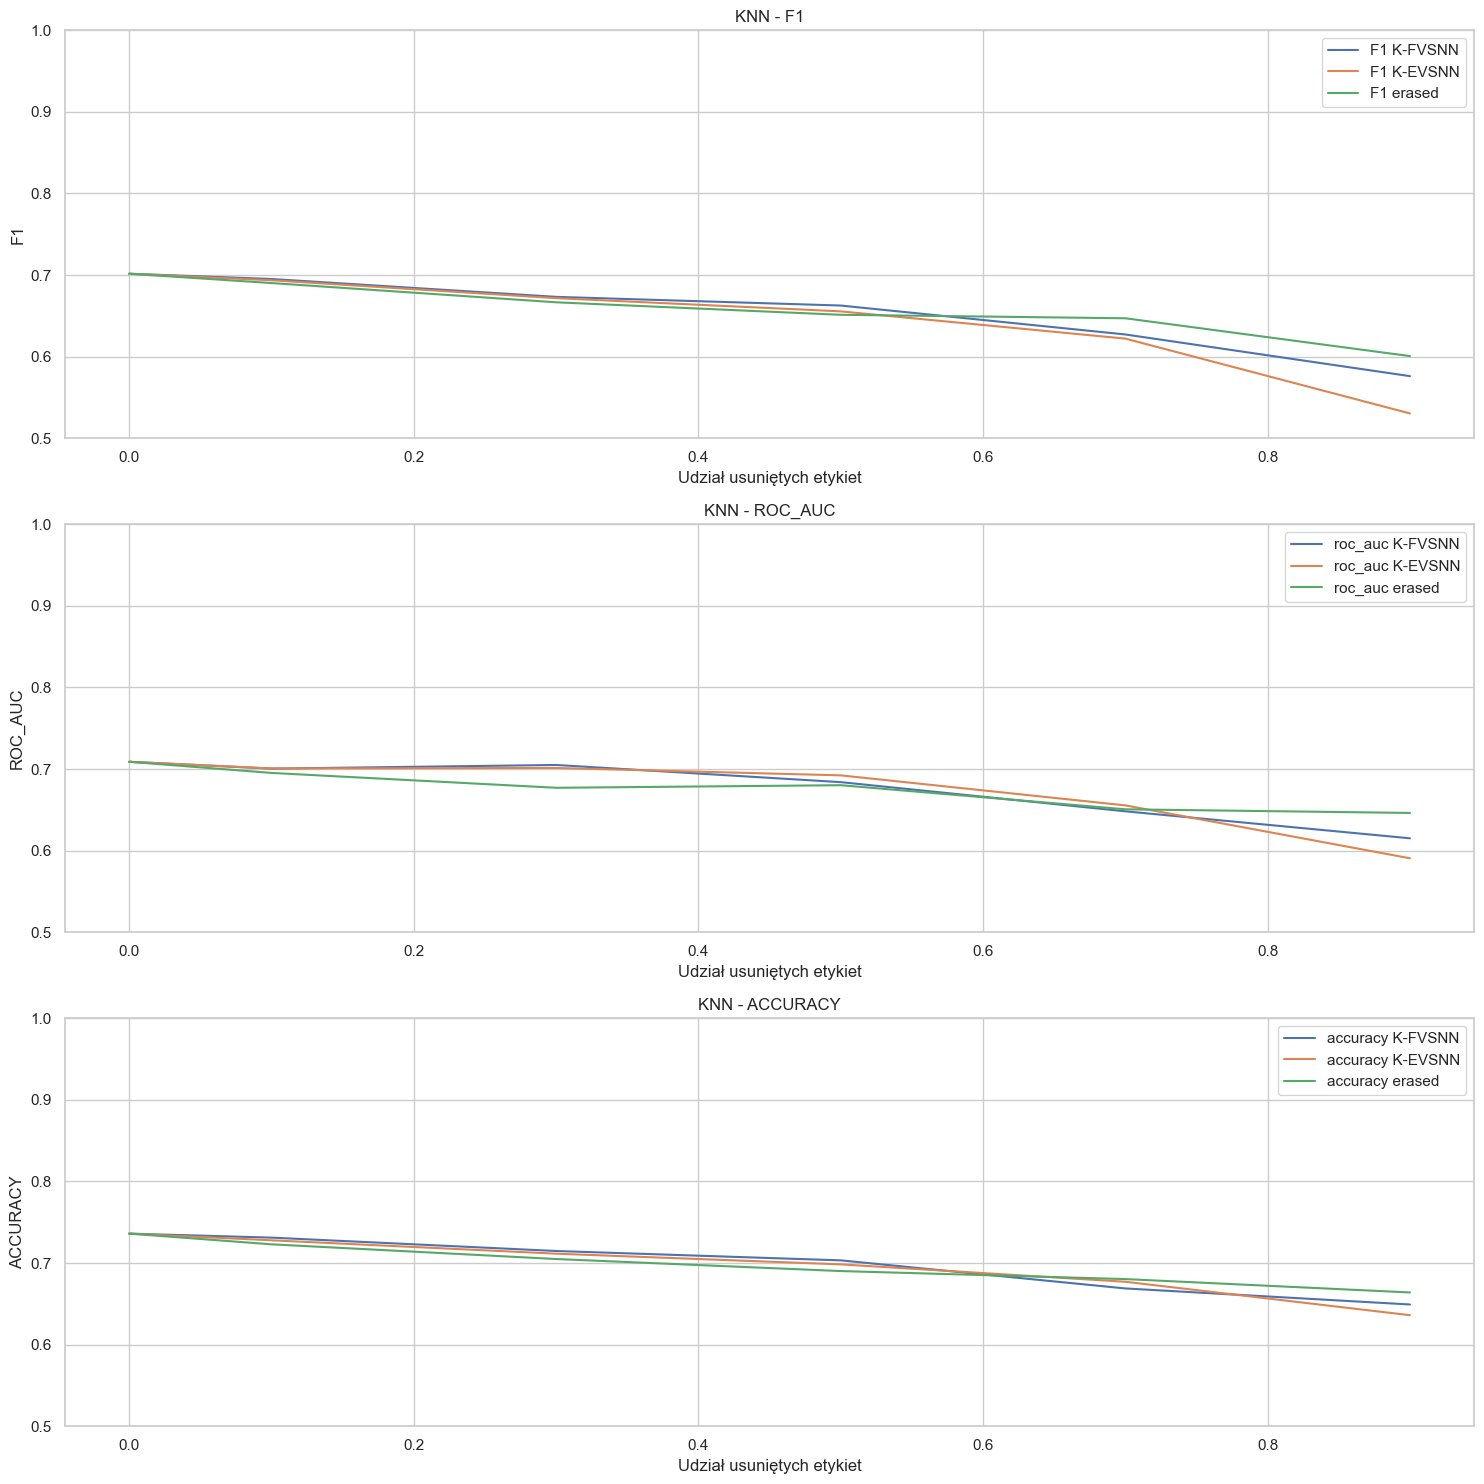

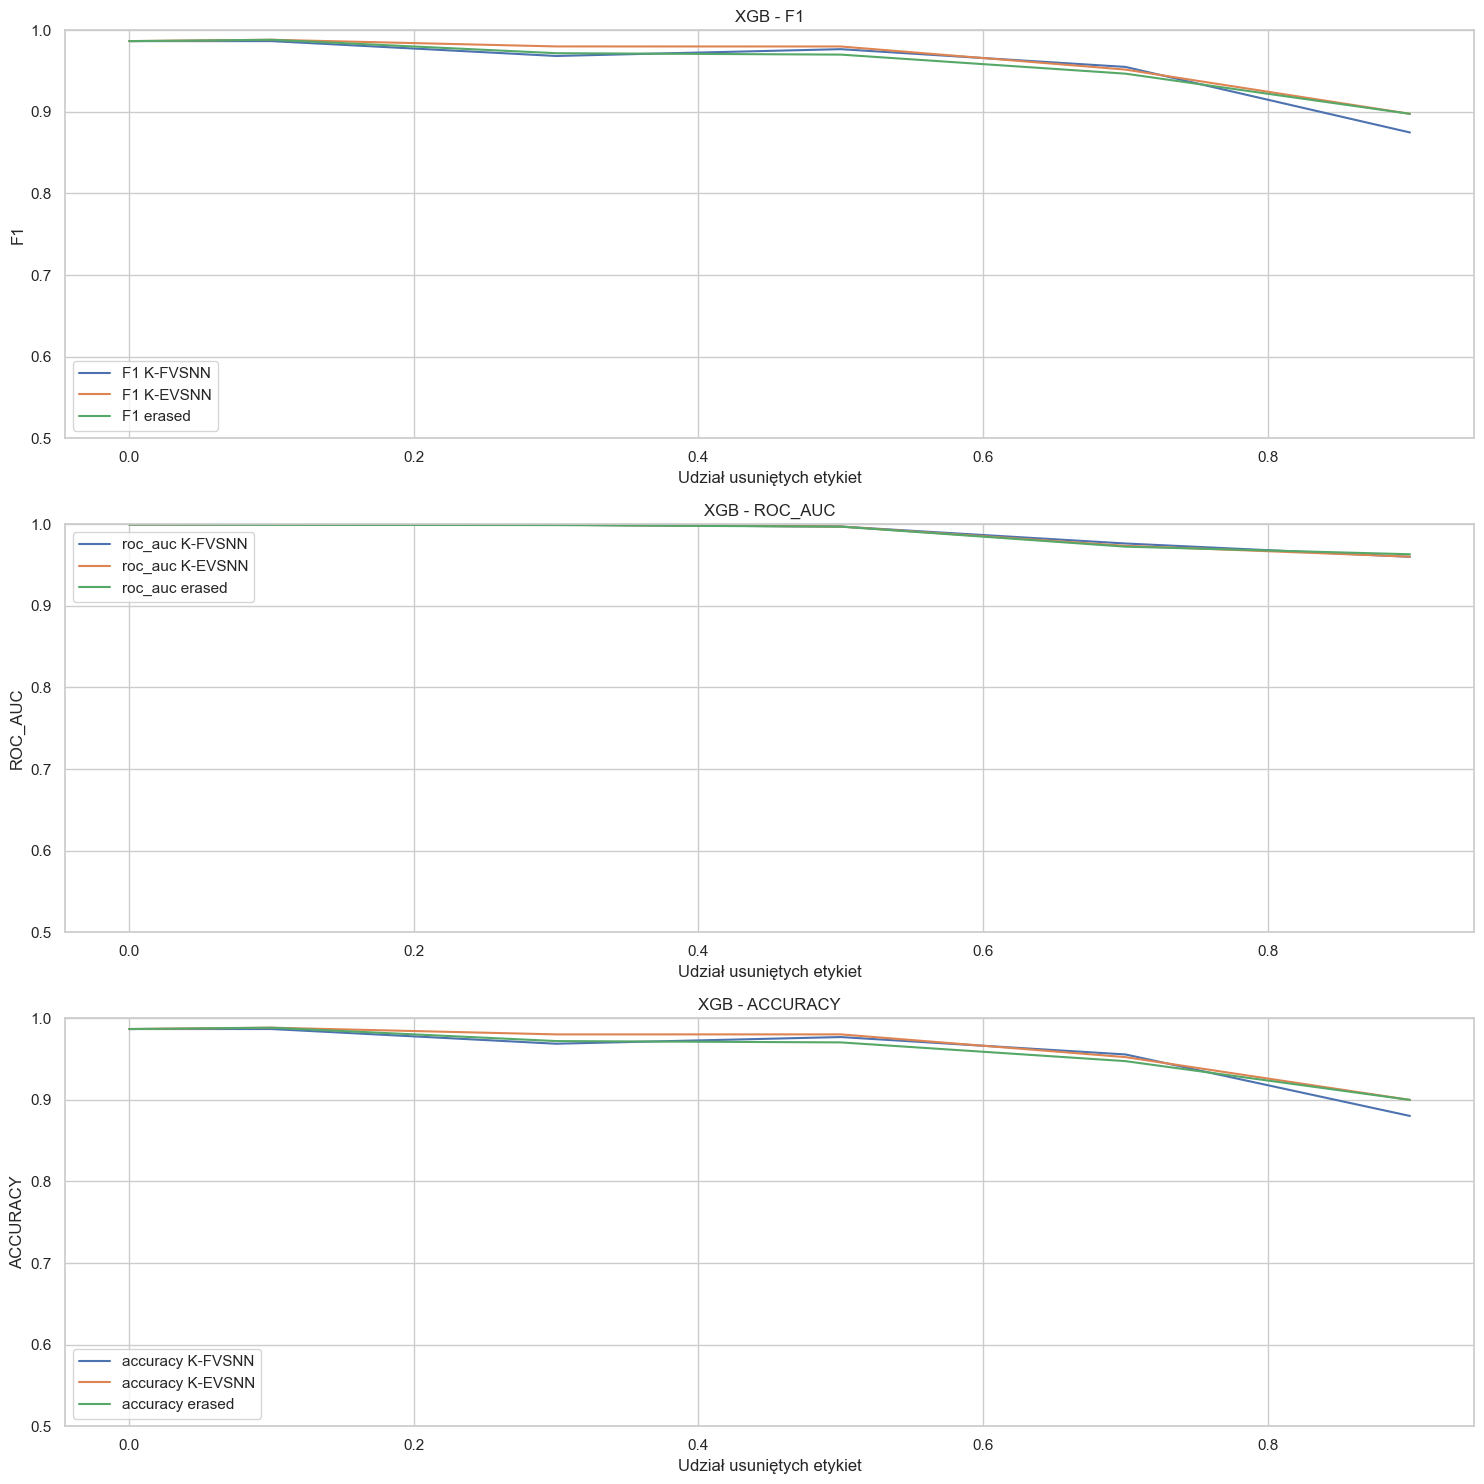

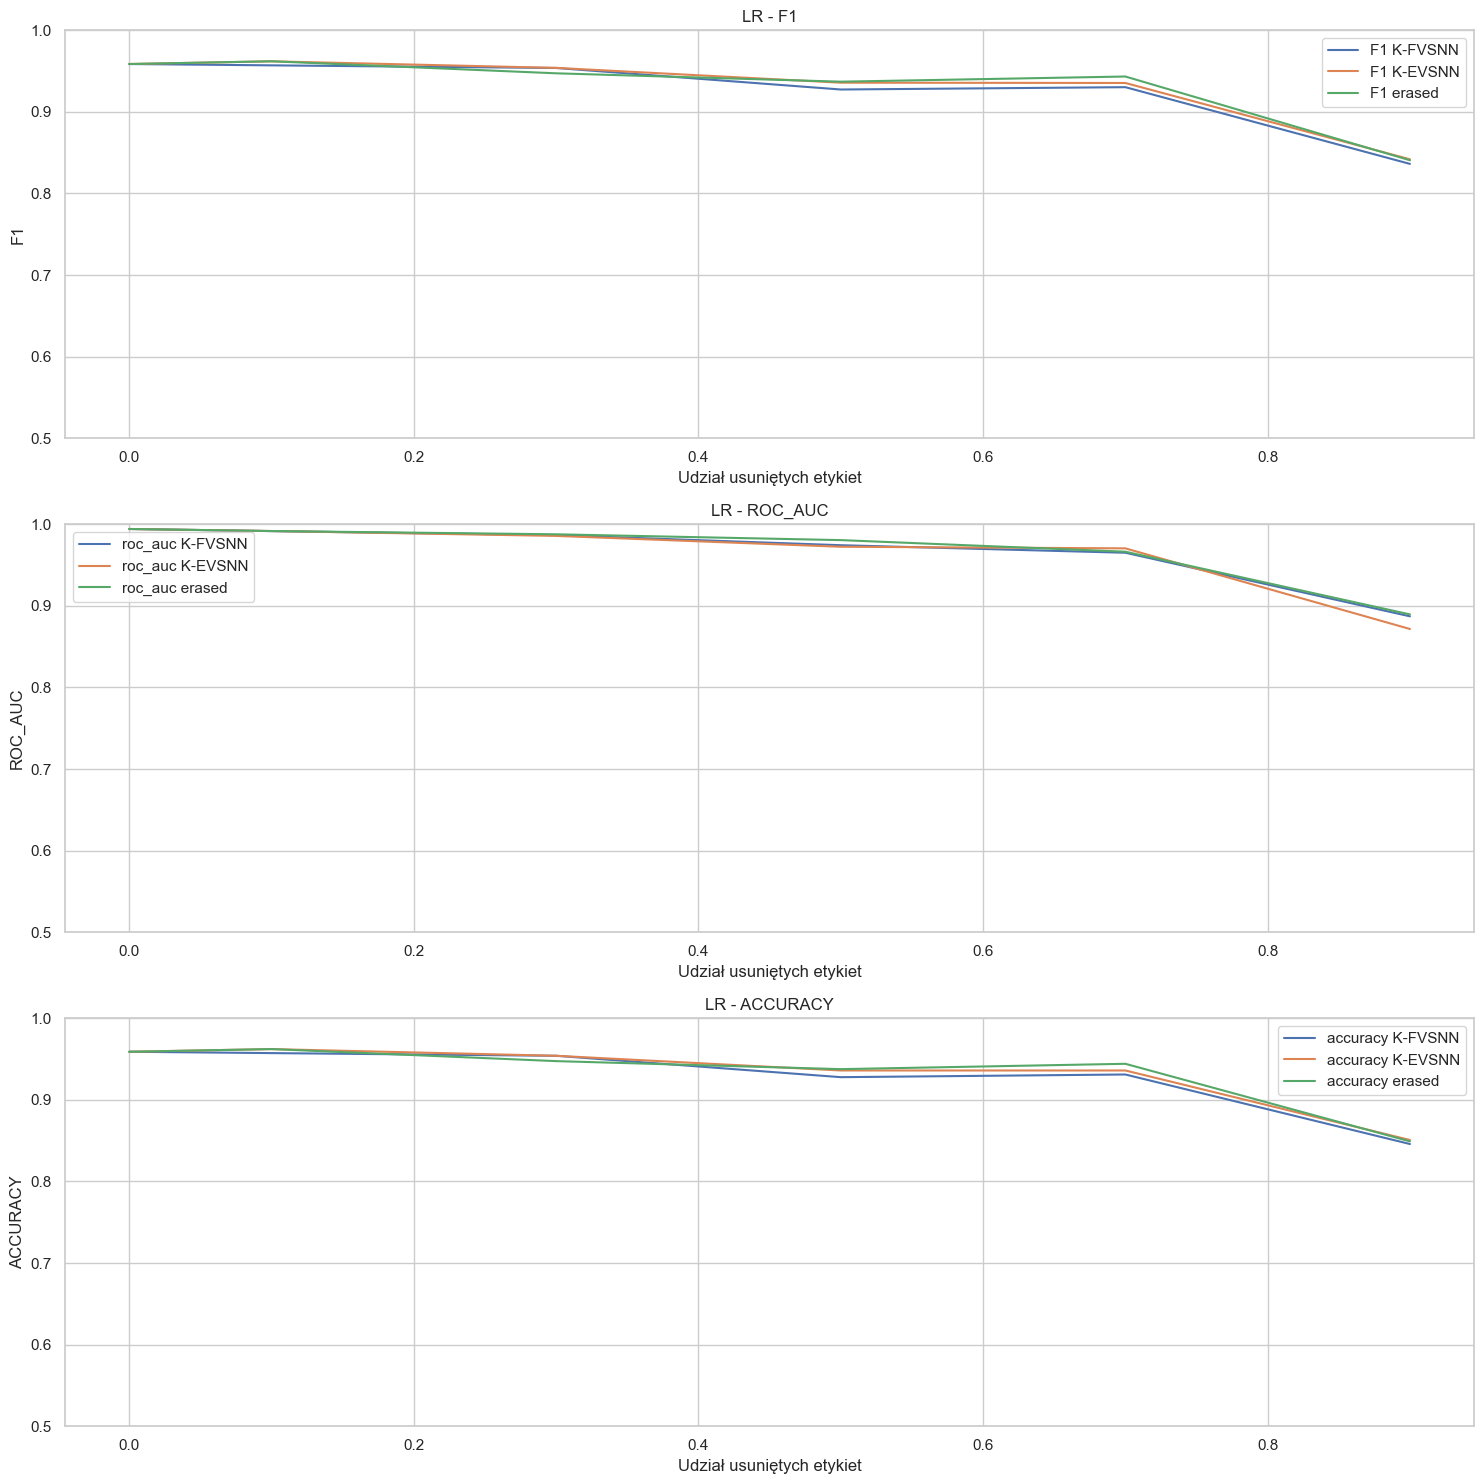

In [156]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_CKD[mean_results_df_CKD['classifier'] == clf]['fraction'],
                     mean_results_df_CKD[mean_results_df_CKD['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [157]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_CKD[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_CKD[mean_std_results_df_CKD[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
   fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
5       0.1        xgb    0.986784        0.015192

Max F1 for K-EVSNN:
   fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
5       0.1        xgb    0.988432        0.015684

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
5       0.1        xgb   0.988432       0.015684

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
2       0.0        xgb         0.999889             0.000351
5       0.1        xgb         0.999889             0.000351

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
2       0.0        xgb         0.999889             0.000351
5       0.1        xgb         0.999889             0.000351

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb        0.999889            0.000351

Max accuracy for K-FVSNN:
   fraction classifier  accuracy K-FVSNN  accurac

In [74]:
results_df_CKD=pd.read_csv("...\\results_df_CKD.csv")
mean_results_df_CKD=pd.read_csv("...\\mean_results_df_CKD.csv")
mean_std_results_df_CKD=pd.read_csv("...\\mean_std_results_df_CKD.csv")

def format_mean_std(mean, std):
    return f"{mean:.3f} ({std:.3f})"

formatted_rows = []

for index, row in mean_std_results_df_CKD.iterrows():
    formatted_row = {
        'fraction': row['fraction'],
        'classifier': row['classifier'],
        'F1 K-FVSNN': format_mean_std(row['F1 K-FVSNN'], row['F1 K-FVSNN_std']),
        'roc_auc K-FVSNN': format_mean_std(row['roc_auc K-FVSNN'], row['roc_auc K-FVSNN_std']),
        'accuracy K-FVSNN': format_mean_std(row['accuracy K-FVSNN'], row['accuracy K-FVSNN_std']),
        'F1 K-EVSNN': format_mean_std(row['F1 K-EVSNN'], row['F1 K-EVSNN_std']),
        'roc_auc K-EVSNN': format_mean_std(row['roc_auc K-EVSNN'], row['roc_auc K-EVSNN_std']),
        'accuracy K-EVSNN': format_mean_std(row['accuracy K-EVSNN'], row['accuracy K-EVSNN_std']),
        'F1 erased': format_mean_std(row['F1 erased'], row['F1 erased_std']),
        'roc_auc erased': format_mean_std(row['roc_auc erased'], row['roc_auc erased_std']),
        'accuracy erased': format_mean_std(row['accuracy erased'], row['accuracy erased_std']),
    }
    formatted_rows.append(formatted_row)

formatted_results = pd.DataFrame(formatted_rows)

print(formatted_results[(formatted_results['fraction'] == 0.0)][['classifier', 'F1 erased', 'roc_auc erased', 'accuracy erased']])

  classifier      F1 erased roc_auc erased accuracy erased
0        knn  0.702 (0.049)  0.709 (0.062)   0.736 (0.037)
1         lr  0.959 (0.024)  0.994 (0.007)   0.959 (0.024)
2        xgb  0.987 (0.015)  1.000 (0.000)   0.987 (0.015)


In [76]:
print(formatted_results[(formatted_results['classifier'] == 'lr') & (formatted_results['fraction'] > 0)])

    fraction classifier     F1 K-FVSNN roc_auc K-FVSNN accuracy K-FVSNN  \
4        0.1         lr  0.957 (0.024)   0.992 (0.009)    0.957 (0.023)   
7        0.3         lr  0.954 (0.042)   0.987 (0.019)    0.954 (0.042)   
10       0.5         lr  0.927 (0.043)   0.974 (0.019)    0.928 (0.042)   
13       0.7         lr  0.930 (0.031)   0.965 (0.036)    0.931 (0.031)   
16       0.9         lr  0.836 (0.090)   0.887 (0.113)    0.846 (0.080)   

       F1 K-EVSNN roc_auc K-EVSNN accuracy K-EVSNN      F1 erased  \
4   0.962 (0.024)   0.992 (0.010)    0.962 (0.023)  0.962 (0.027)   
7   0.954 (0.036)   0.986 (0.020)    0.954 (0.036)  0.947 (0.039)   
10  0.936 (0.031)   0.973 (0.026)    0.936 (0.031)  0.937 (0.041)   
13  0.935 (0.029)   0.971 (0.031)    0.936 (0.028)  0.943 (0.032)   
16  0.842 (0.078)   0.872 (0.120)    0.851 (0.070)  0.841 (0.073)   

   roc_auc erased accuracy erased  
4   0.992 (0.009)   0.962 (0.027)  
7   0.988 (0.018)   0.948 (0.038)  
10  0.981 (0.017)   0.938 

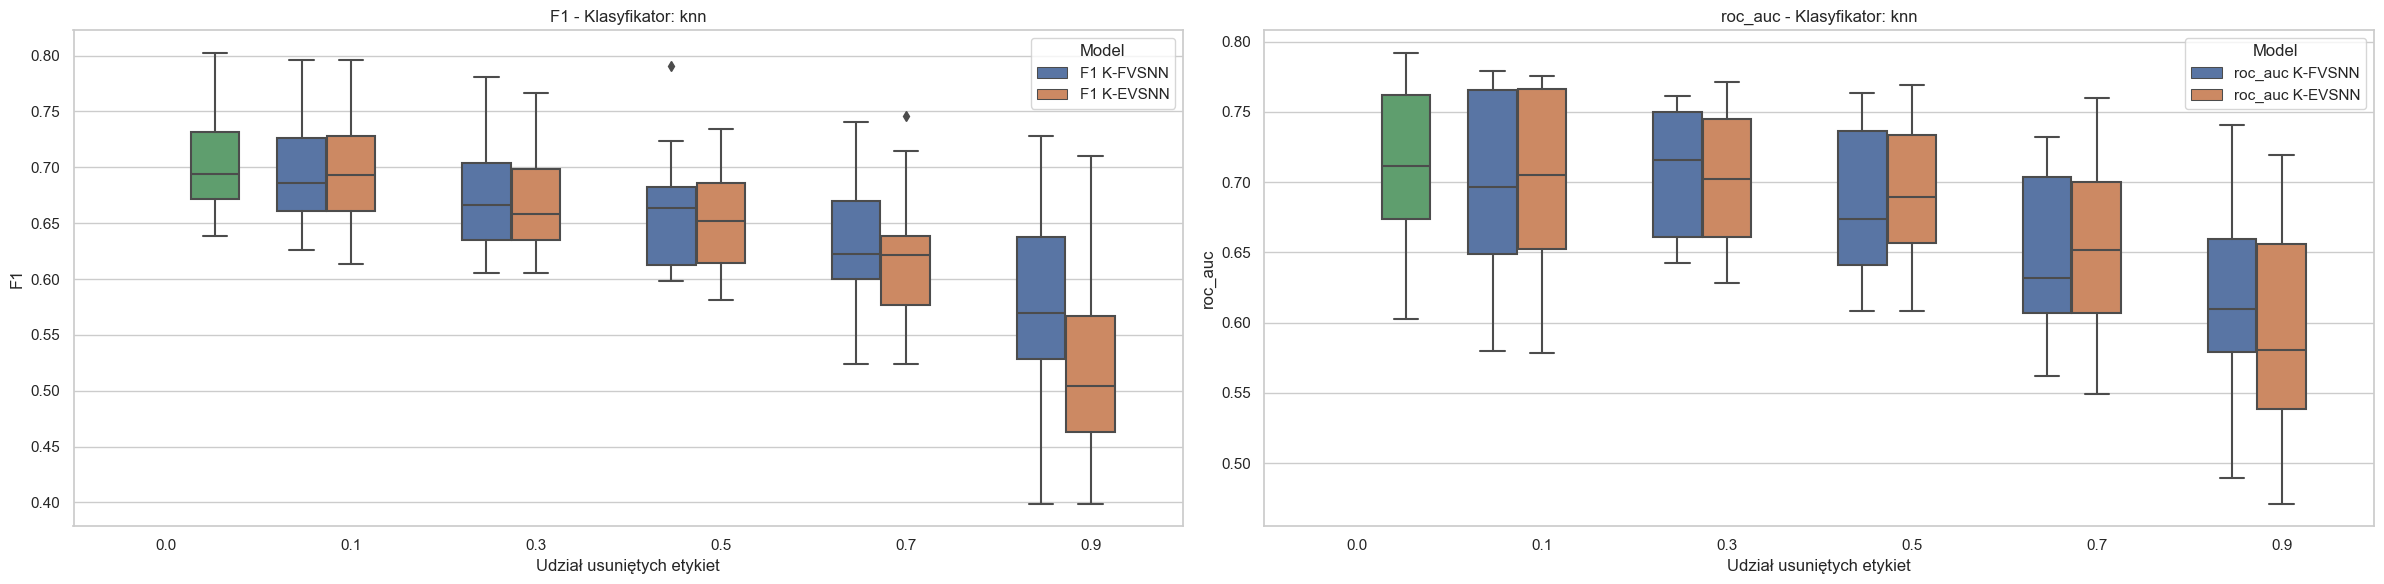

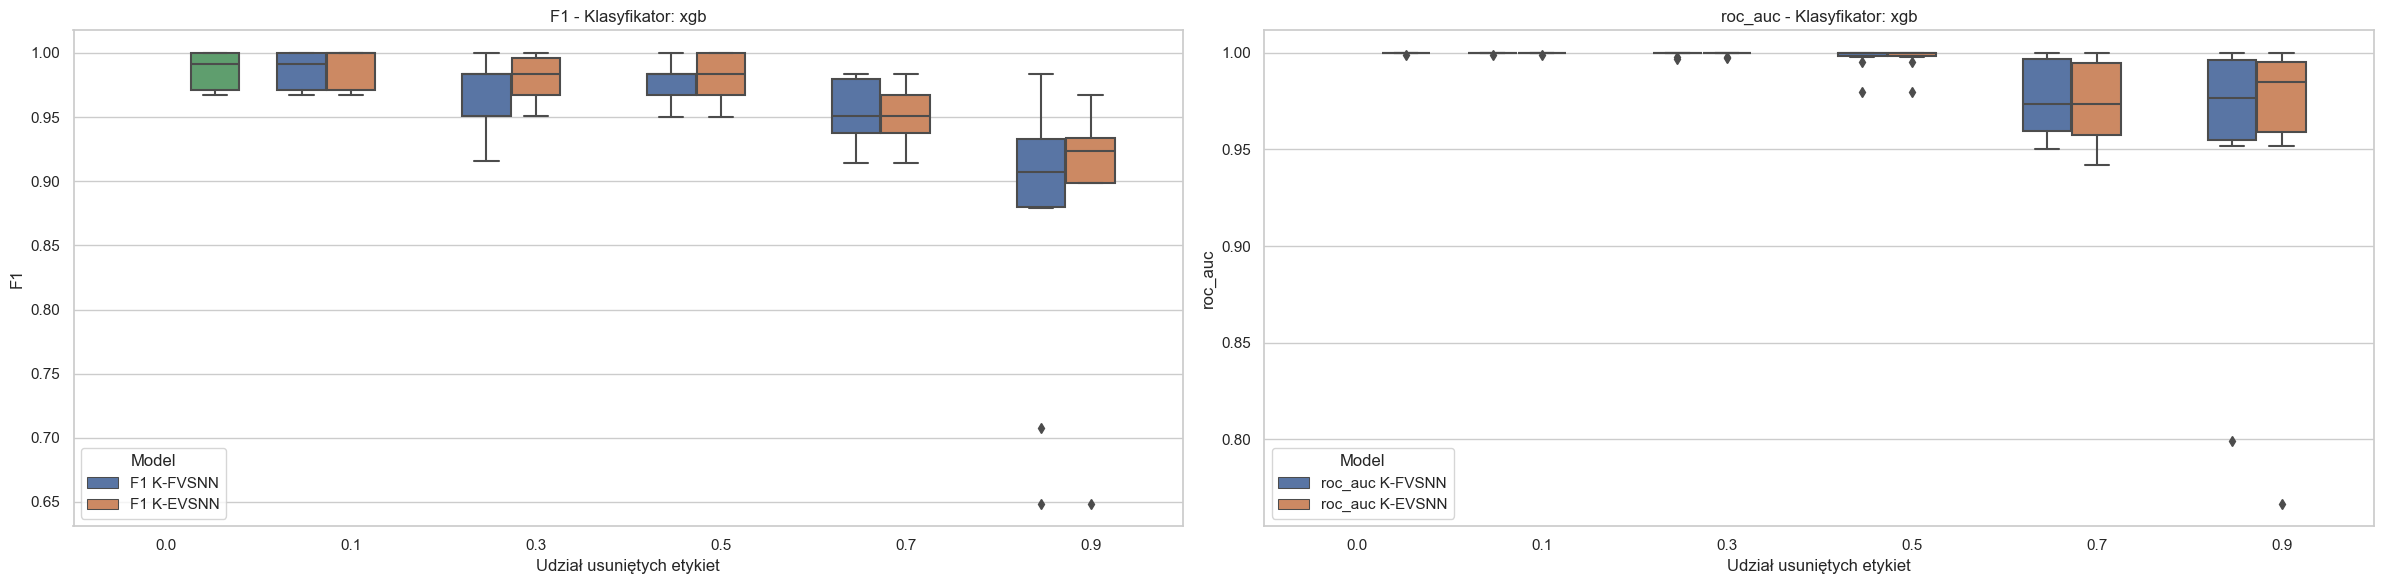

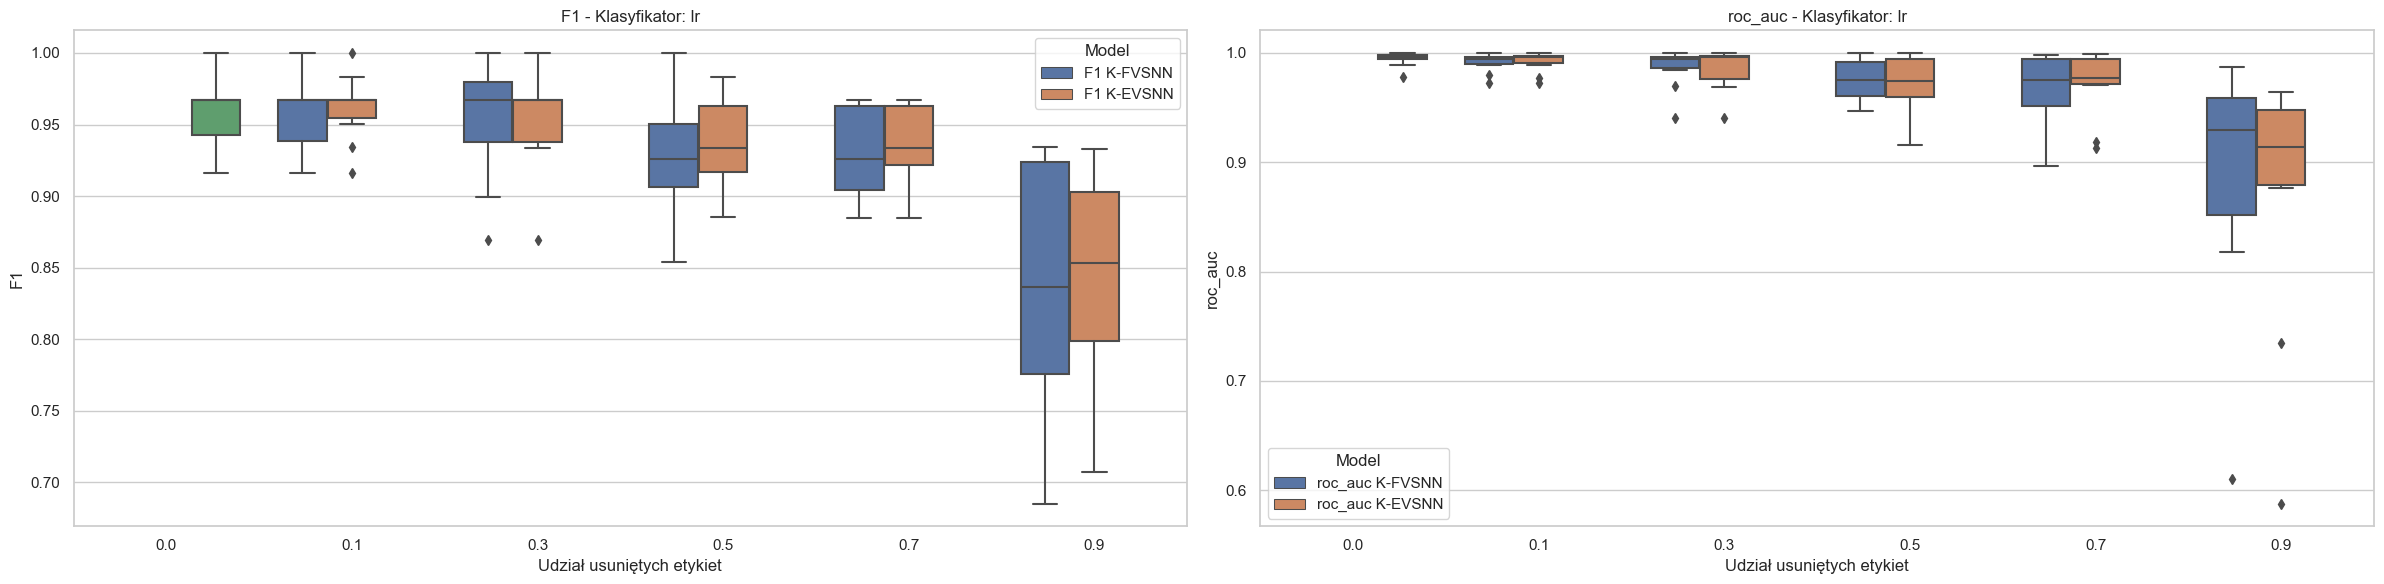

In [90]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
}

classifier_names = ['knn', 'xgb', 'lr']

for clf_name in classifier_names:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12 * len(metrics), 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i] if len(metrics) > 1 else axes
        data = results_df_CKD[results_df_CKD['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True, ax=ax)

        handles, labels = ax.get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        ax.legend(new_handles, new_labels, title='Model')
        
        ax.set_title(f'{metric} - Klasyfikator: {clf_name}')
        ax.set_xlabel('Udział usuniętych etykiet')
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()

In [87]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(CKD, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:
                            
                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_CKD = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_CKD = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

CPU times: total: 1h 33min
Wall time: 1h 4min 40s


In [88]:
print(results_df_test_CKD.nlargest(10, 'F1 K-erased'))
print(results_df_test_CKD.nlargest(10, 'F1 K-FVSNN'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.949333   
1              -2          -2            -1         10    0.949333   
2              -2          -2             0         10    0.949333   
3              -2          -2             1         10    0.949333   
4              -2          -2             2         10    0.949333   
5              -2          -1            -2         10    0.949333   
6              -2          -1            -1         10    0.949333   
7              -2          -1             0         10    0.949333   
8              -2          -1             1         10    0.949333   
9              -2          -1             2         10    0.949333   

   F1 K-EVSNN  F1 K-erased  
0    0.949333     0.949333  
1    0.949333     0.949333  
2    0.949333     0.949333  
3    0.949333     0.949333  
4    0.949333     0.949333  
5    0.949333     0.949333  
6    0.949333     0.949333

In [89]:
print(results_df_valid_CKD.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_CKD.nlargest(10, 'F1 erased'))

    distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
50               0          -2            -2         10         1.0   
51               0          -2            -1         10         1.0   
52               0          -2             0         10         1.0   
53               0          -2             1         10         1.0   
54               0          -2             2         10         1.0   
56               0          -1            -1         10         1.0   
59               0          -1             2         10         1.0   
62               0           0             0         10         1.0   
63               0           0             1         10         1.0   
64               0           0             2         10         1.0   

    F1 K-EVSNN  F1 erased  
50    0.952599        1.0  
51    0.952599        1.0  
52    0.952599        1.0  
53    0.952599        1.0  
54    0.952599        1.0  
56    0.952599        1.0  
59    0.952599        

### Zbiór z pracy

In [3]:
med = pd.read_csv("...\\DaneDoAlg.csv")
med.rename(columns={med.columns[-1]: 'class'}, inplace=True)
med.iloc[30:40]

EkgQRS  LBBB&RBBvsNorma  NYHA  WywiadNerki    kr     neu   tro_new  class
30       2                0   2.0            1  1.38   7.840 -0.199959      1
31       2                0   1.0            0  0.92   8.670 -0.249464      1
32       2                0   1.0            0  0.71   6.340 -0.224004      1
33       2                0   1.0            0  0.80   9.350 -0.253707      1
34       0                1   1.0            0  0.80   2.800 -0.364646      0
35       0                1   1.0            0  2.08   5.540 -0.345705      1
36       0                1   1.0            0  1.93   7.990 -0.361953      0
37       0                1   1.0            0  1.00   5.845 -0.365776      0
38       0                1   1.0            0  1.82  13.040  3.977833      1
39       0                1   1.0            0  1.04   2.320 -0.366471      0

In [60]:
med.shape

(685, 8)

In [ ]:
%%time

classifiers = {
    'knn': KNeighborsClassifier(),
    'xgb': XGBClassifier(random_state=2024, objective='binary:logistic'),
    'lr': LogisticRegression(random_state=2024,solver='liblinear')
}
fraction = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
num_iterations = 10

results = []

for iteration in range(num_iterations):
    df_train, df_test = train_test_split(med, test_size=0.3, random_state=2024 - iteration**(2))

    for frac in fraction:
        erased_df = label_erase(dataframe=df_train, fraction=frac, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
        Labeled = erased_df.dropna(subset=['class'])
        Unlabeled = erased_df.drop(Labeled.index)
        
        for clf_name, clf in classifiers.items():
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, distance_param=1, 
                                        val_member=1, train_member=1,
                                        K_percent=10, 
                                        target_column='class')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KFVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KFVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
            clf.fit(X.drop('class', axis=1), X['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_KEVSNN = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_KEVSNN = accuracy_score(df_test['class'], y_pred)

            clf = classifiers[clf_name]
            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
            y_pred = clf.predict(df_test.drop(['class'], axis=1))
            y_pred_proba = clf.predict_proba(df_test.drop(['class'], axis=1))[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_pred))

            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')
            roc_auc_erased = roc_auc_score(df_test['class'], y_pred_proba)
            accuracy_erased = accuracy_score(df_test['class'], y_pred)

            results.append([frac, clf_name,
                            F1_KFVSNN, roc_auc_KFVSNN, accuracy_KFVSNN,
                            F1_KEVSNN, roc_auc_KEVSNN, accuracy_KEVSNN,
                            F1_erased, roc_auc_erased, accuracy_erased])

results_df_med = pd.DataFrame(results, columns=['fraction', 'classifier',
                                                'F1 K-FVSNN', 'roc_auc K-FVSNN', 'accuracy K-FVSNN',
                                                'F1 K-EVSNN', 'roc_auc K-EVSNN', 'accuracy K-EVSNN',
                                                'F1 erased', 'roc_auc erased', 'accuracy erased'])

mean_results_df_med = results_df_med.groupby(['fraction', 'classifier']).mean().reset_index()
std_results_df_med = results_df_med.groupby(['fraction', 'classifier']).std().reset_index()

# Merge mean and std dataframes
mean_std_results_df_med = pd.merge(mean_results_df_med, std_results_df_med, on=['fraction', 'classifier'], suffixes=('', '_std'))

In [10]:
results_df_med=pd.read_csv("...\\results_df_med.csv")
mean_results_df_med=pd.read_csv("...\\mean_results_df_med.csv")
mean_std_results_df_med=pd.read_csv("...\\mean_std_results_df_med.csv")

In [46]:
mean_std_results_df_med[(mean_std_results_df_med['classifier'] == 'knn') & ( mean_std_results_df_med['fraction'] > 0)][['F1 K-EVSNN', 'F1 K-EVSNN_std']]

F1 K-EVSNN  F1 K-EVSNN_std
3     0.955933        0.011064
6     0.955957        0.008704
9     0.956438        0.007921
12    0.957919        0.009117
15    0.958891        0.009170

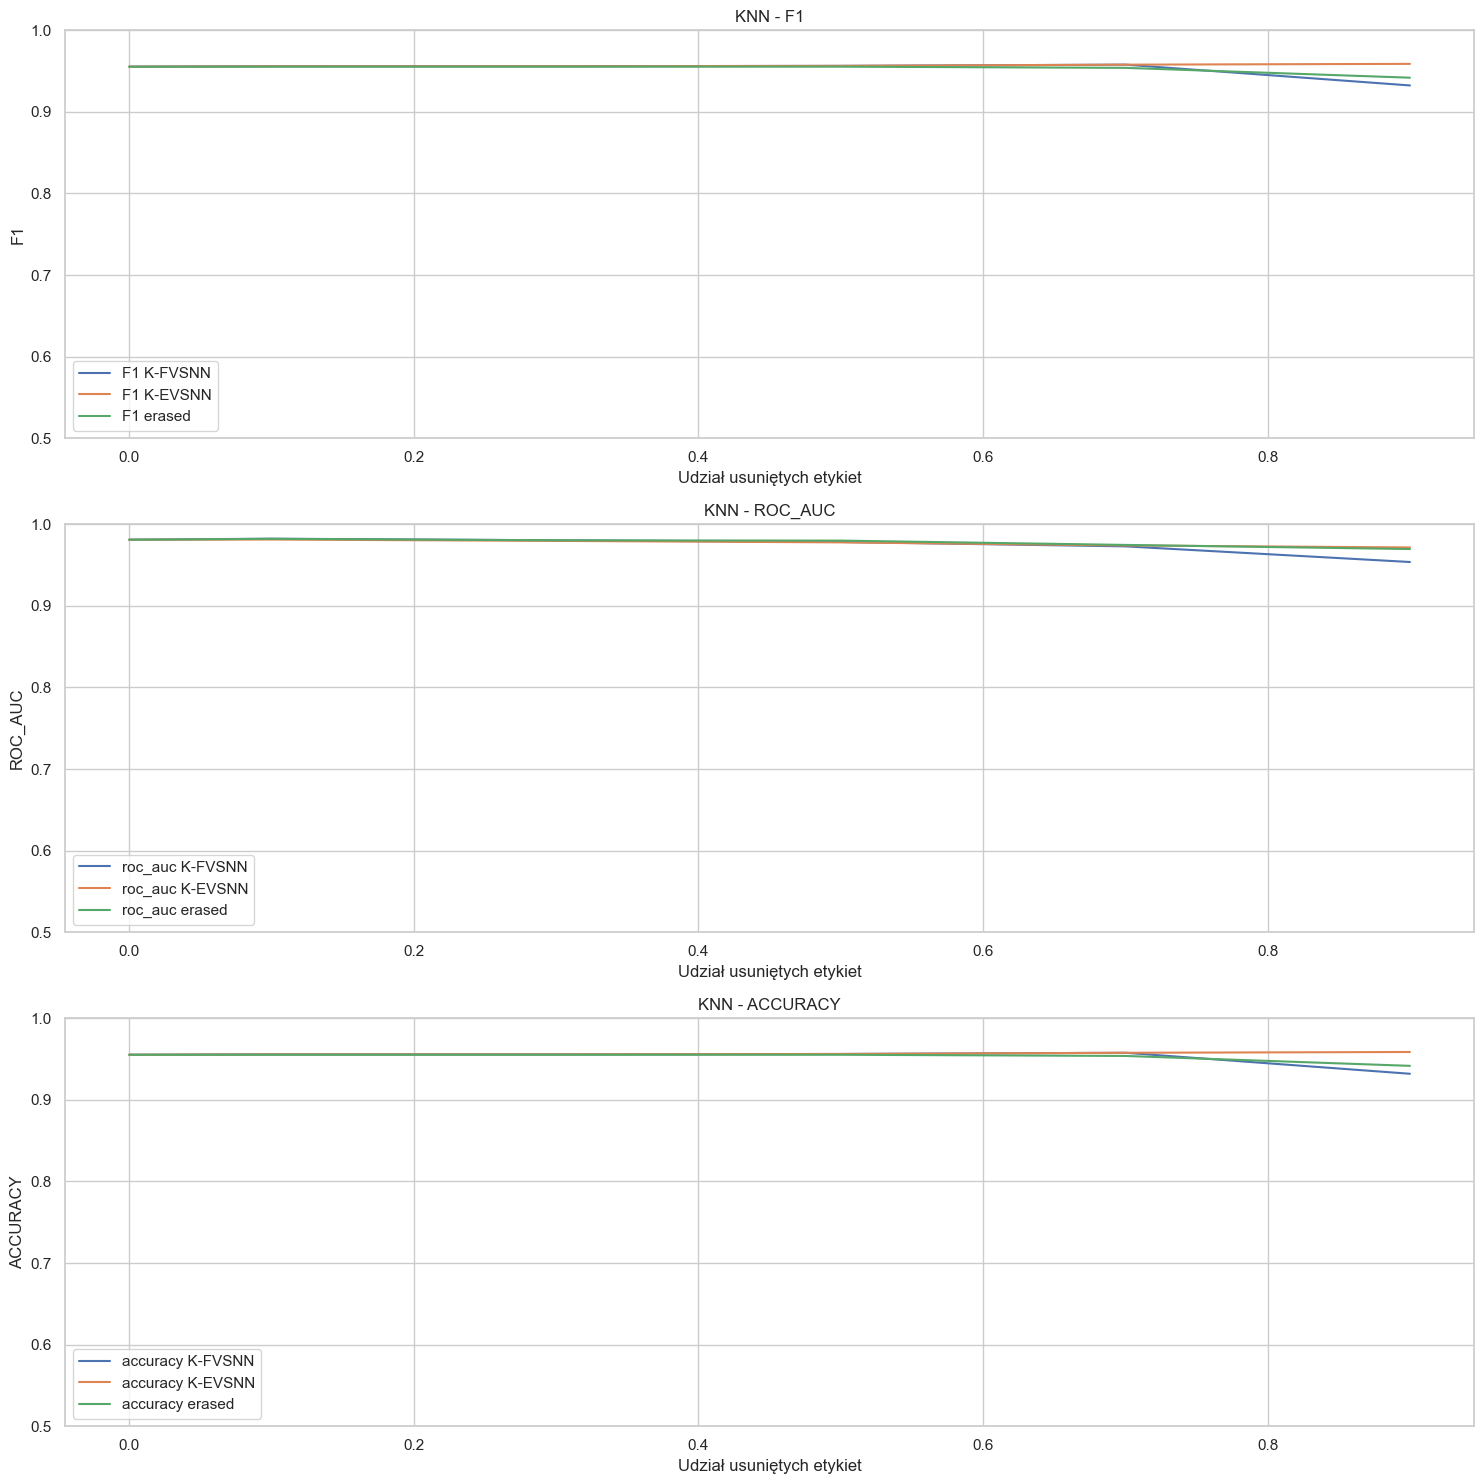

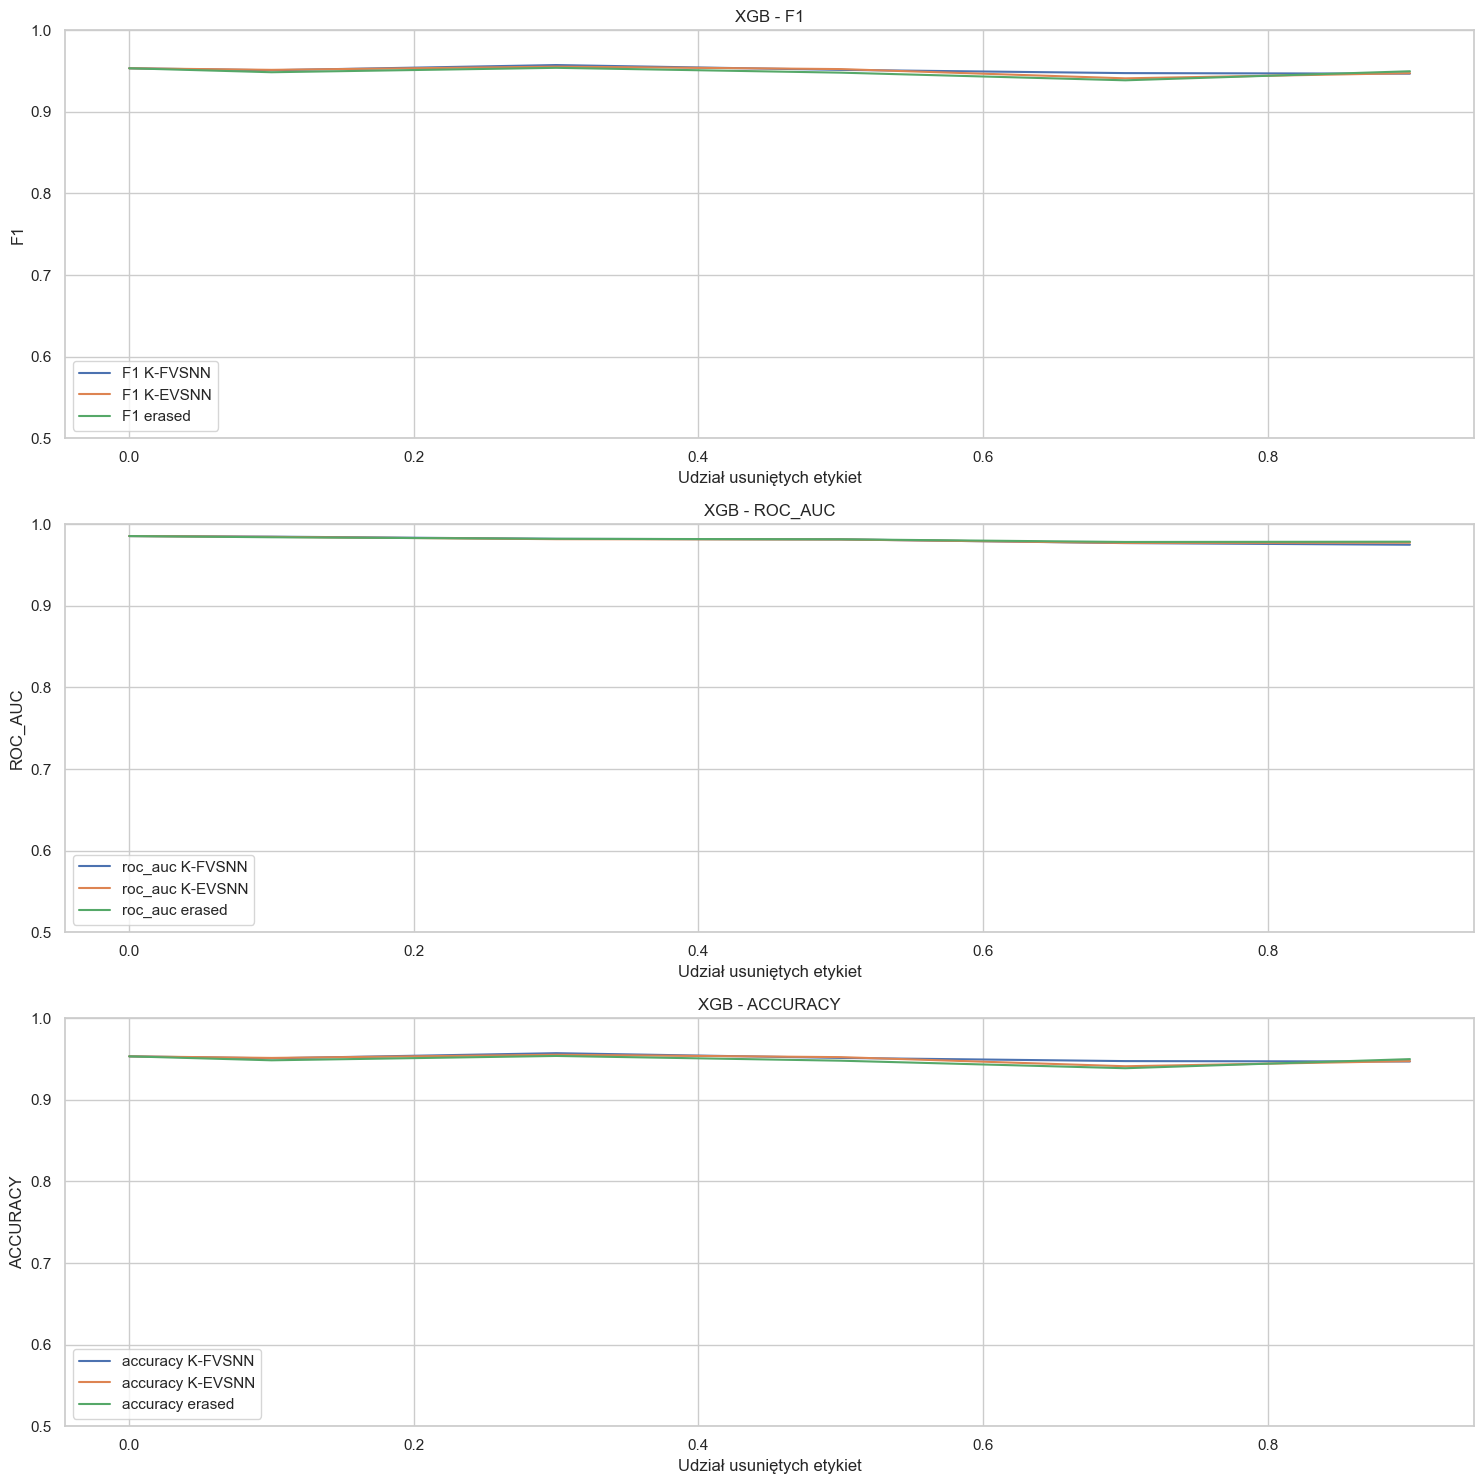

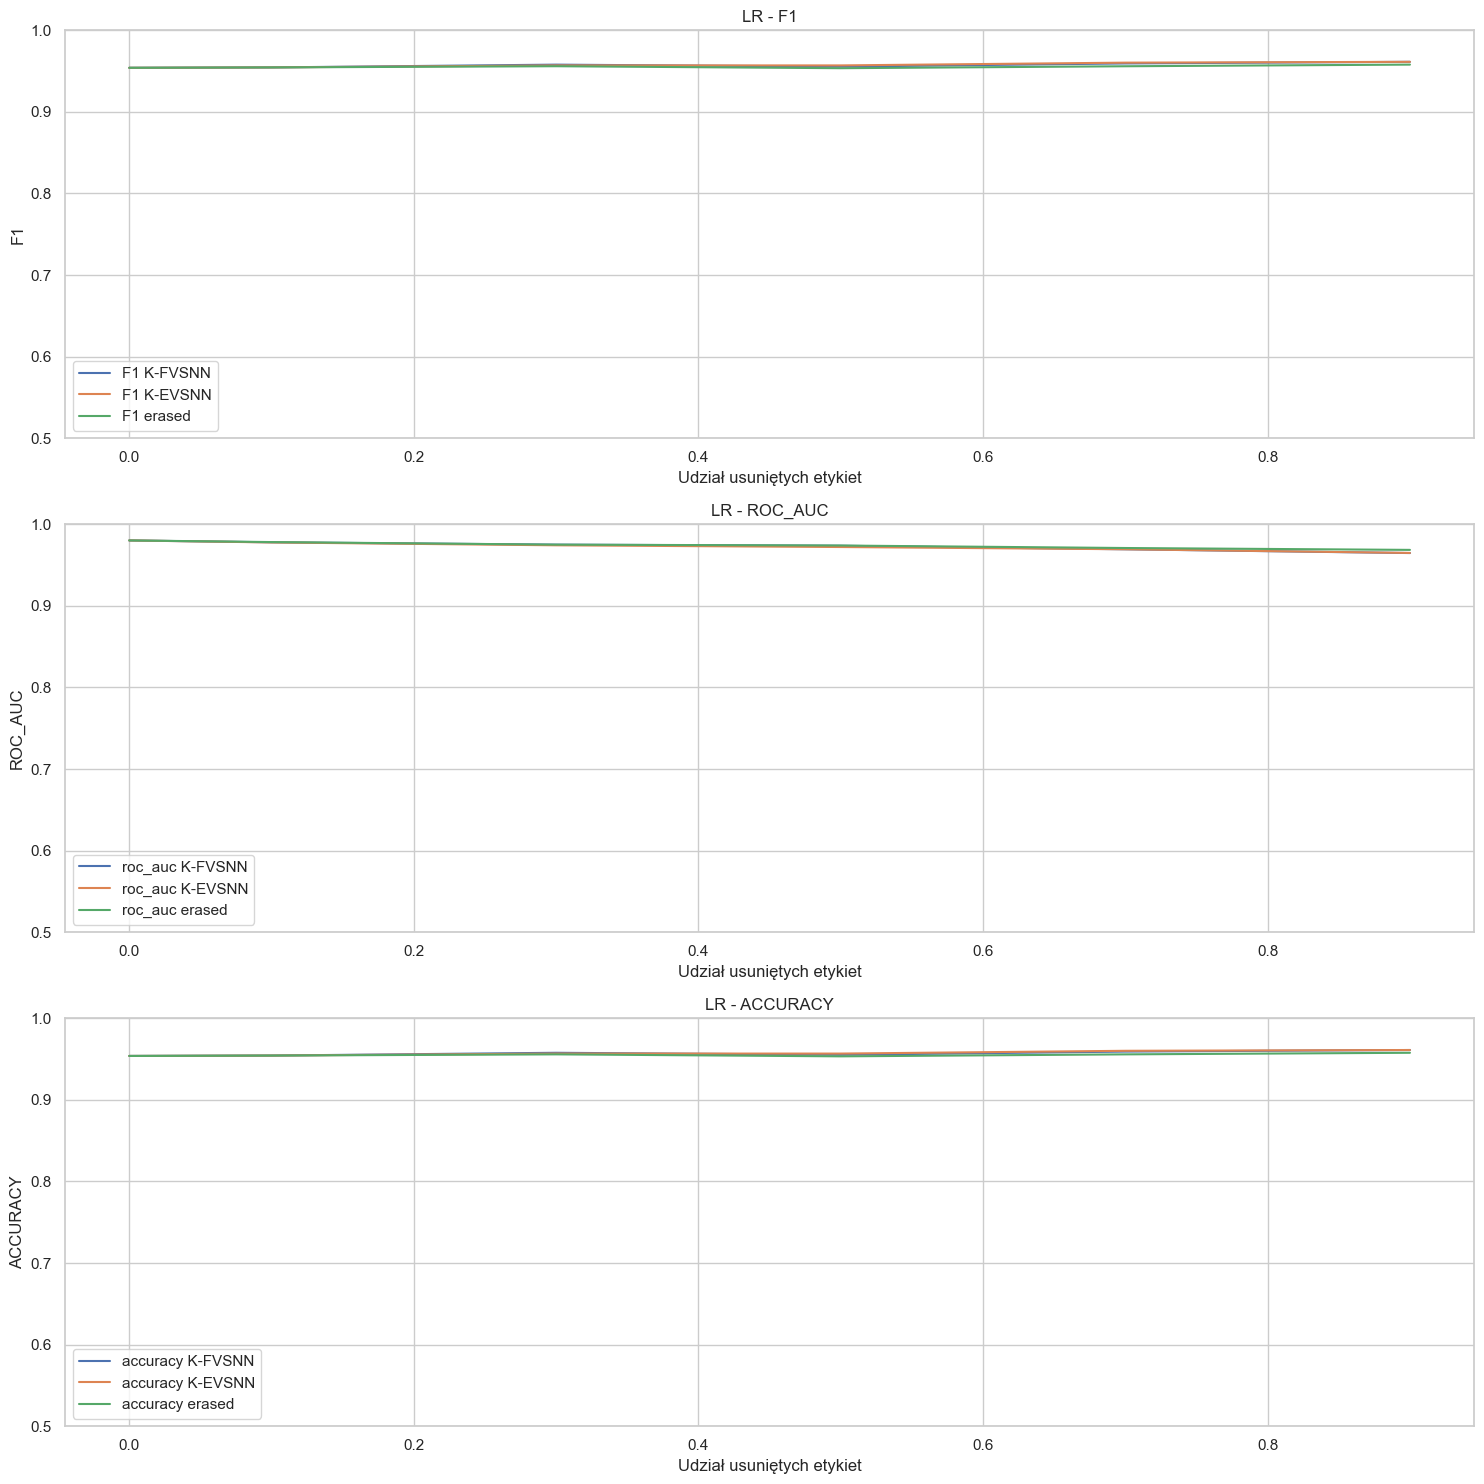

In [11]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_med[mean_results_df_med['classifier'] == clf]['fraction'],
                     mean_results_df_med[mean_results_df_med['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
        
        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [12]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for metric in metrics:
    for model_type in model_types:
        max_value = mean_std_results_df_med[f'{metric} {model_type}'].max()
        max_row = mean_std_results_df_med[mean_std_results_df_med[f'{metric} {model_type}'] == max_value]
        max_std = max_row[f'{metric} {model_type}_std'].values[0]
        print(f'Max {metric} for {model_type}:')
        print(max_row[['fraction', 'classifier', f'{metric} {model_type}', f'{metric} {model_type}_std']])
        print()

Max F1 for K-FVSNN:
    fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
16       0.9         lr    0.961393        0.009874

Max F1 for K-EVSNN:
    fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
16       0.9         lr    0.961384         0.01111

Max F1 for erased:
    fraction classifier  F1 erased  F1 erased_std
16       0.9         lr   0.957974       0.009029

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
2       0.0        xgb         0.985613             0.005647

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
2       0.0        xgb         0.985613             0.005647

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
2       0.0        xgb        0.985613            0.005647

Max accuracy for K-FVSNN:
    fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
16       0.9         lr          0.961165              0.009975

Max accuracy for K-EVSNN:
    fracti

In [53]:
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN', 'erased']

for clf_name in mean_std_results_df_med['classifier'].unique():
    print(f'Classifier: {clf_name}')
    for metric in metrics:
        for model_type in model_types:
            column_name = f'{metric} {model_type}'
            std_column_name = f'{metric} {model_type}_std'
            max_value = mean_std_results_df_med[mean_std_results_df_med['classifier'] == clf_name][column_name].max()
            max_row = mean_std_results_df_med[(mean_std_results_df_med['classifier'] == clf_name) & 
                                              (mean_std_results_df_med[column_name] == max_value)]
            max_std = max_row[std_column_name].values[0] if not max_row.empty else None
            print(f'Max {metric} for {model_type}:')
            print(max_row[['fraction', 'classifier', column_name, std_column_name]])
            print()

Classifier: knn
Max F1 for K-FVSNN:
    fraction classifier  F1 K-FVSNN  F1 K-FVSNN_std
12       0.7        knn    0.957918        0.010195

Max F1 for K-EVSNN:
    fraction classifier  F1 K-EVSNN  F1 K-EVSNN_std
15       0.9        knn    0.958891         0.00917

Max F1 for erased:
   fraction classifier  F1 erased  F1 erased_std
6       0.3        knn    0.95547       0.009905

Max roc_auc for K-FVSNN:
   fraction classifier  roc_auc K-FVSNN  roc_auc K-FVSNN_std
3       0.1        knn         0.982404             0.008069

Max roc_auc for K-EVSNN:
   fraction classifier  roc_auc K-EVSNN  roc_auc K-EVSNN_std
3       0.1        knn         0.981377             0.008862

Max roc_auc for erased:
   fraction classifier  roc_auc erased  roc_auc erased_std
3       0.1        knn        0.982217            0.009005

Max accuracy for K-FVSNN:
    fraction classifier  accuracy K-FVSNN  accuracy K-FVSNN_std
12       0.7        knn          0.957767              0.010247

Max accuracy for K-EVS

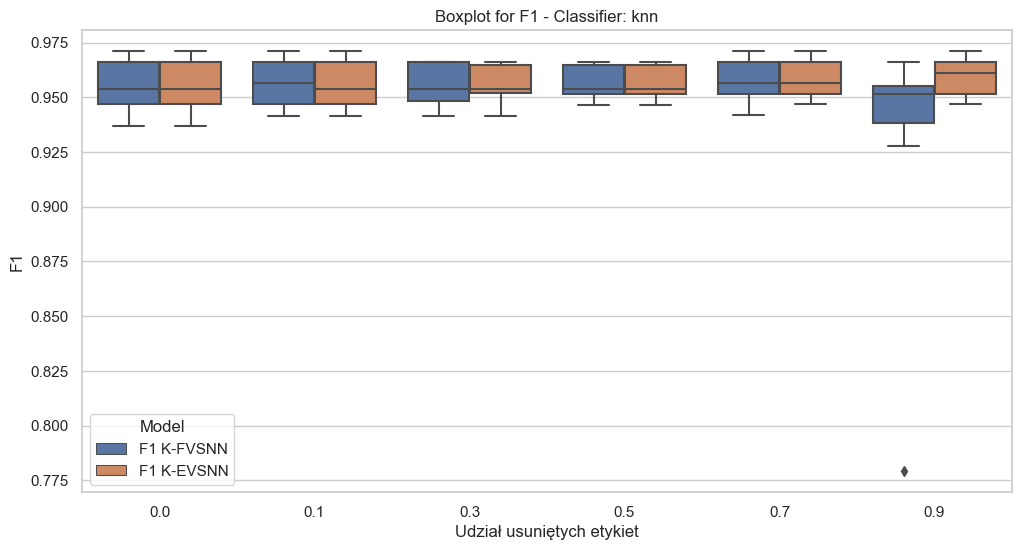

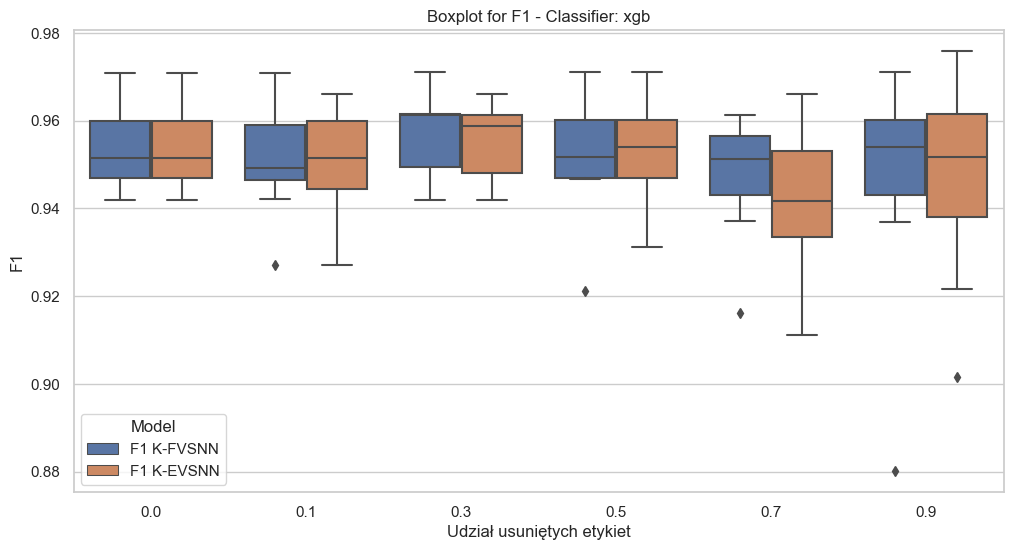

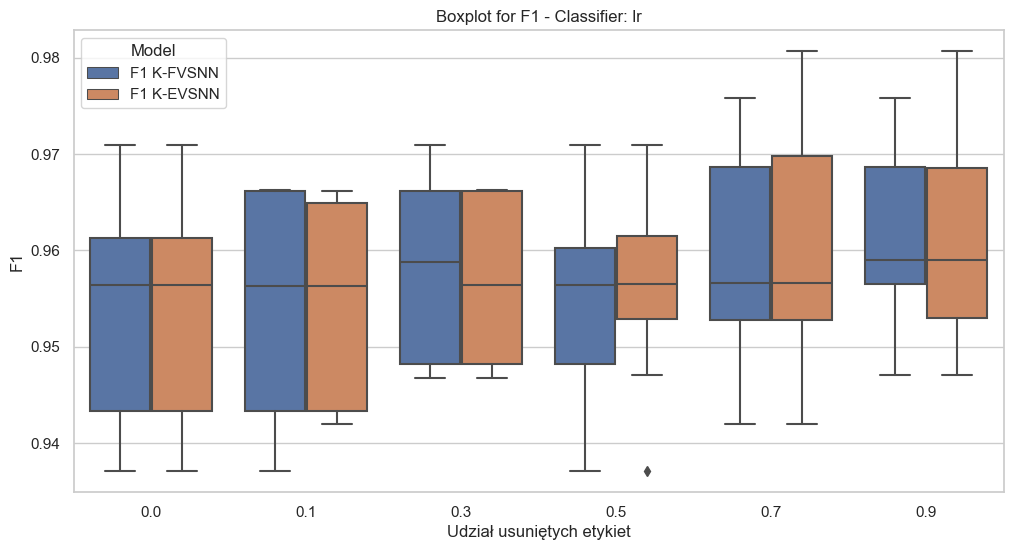

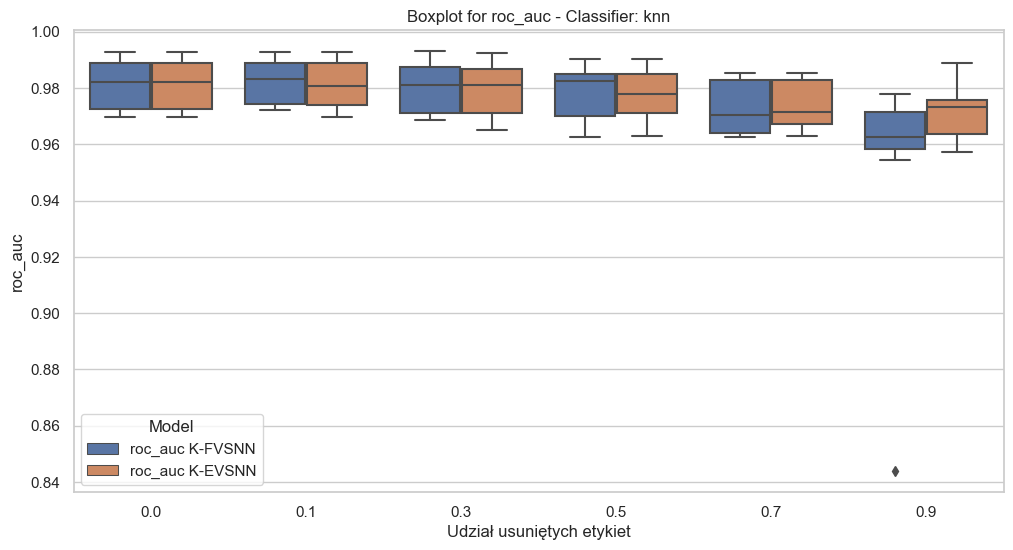

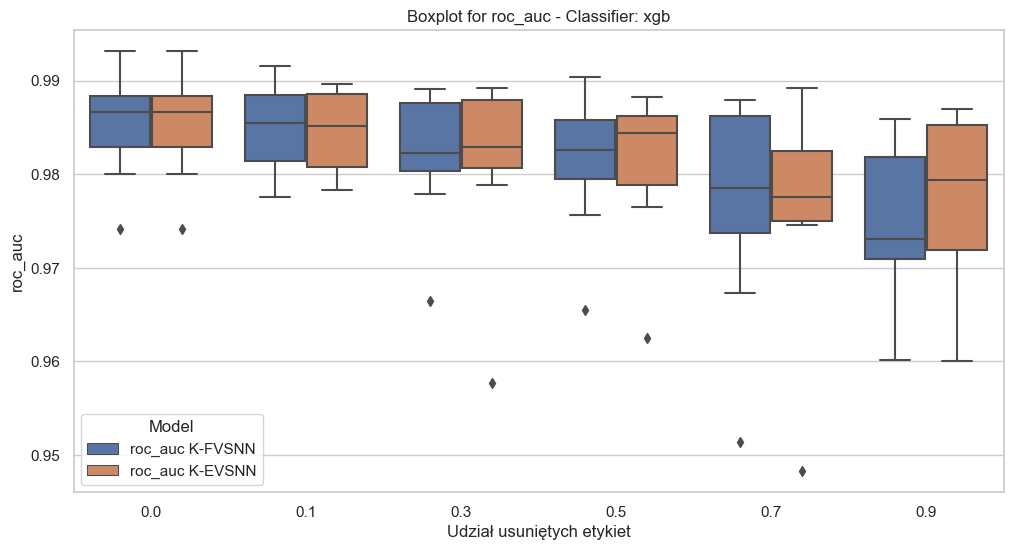

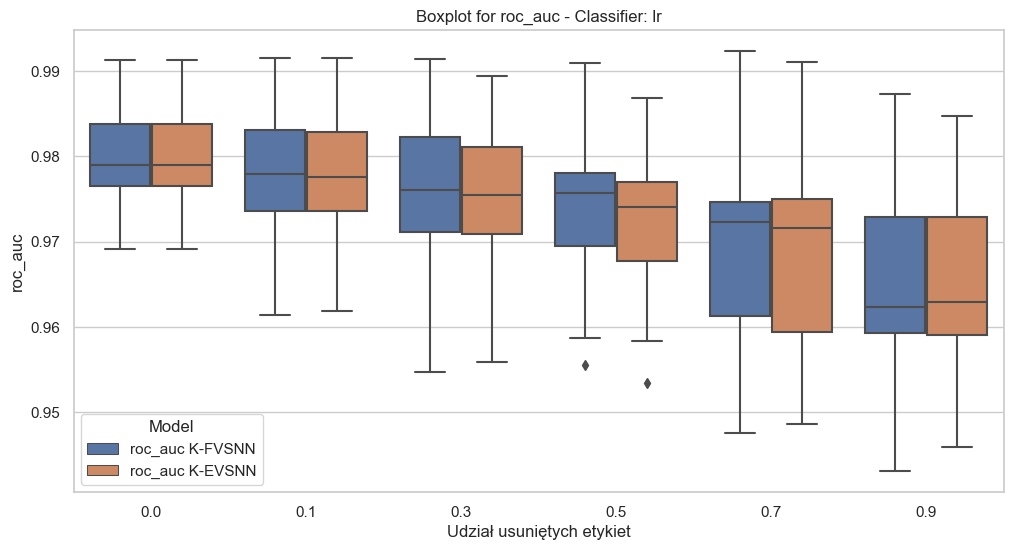

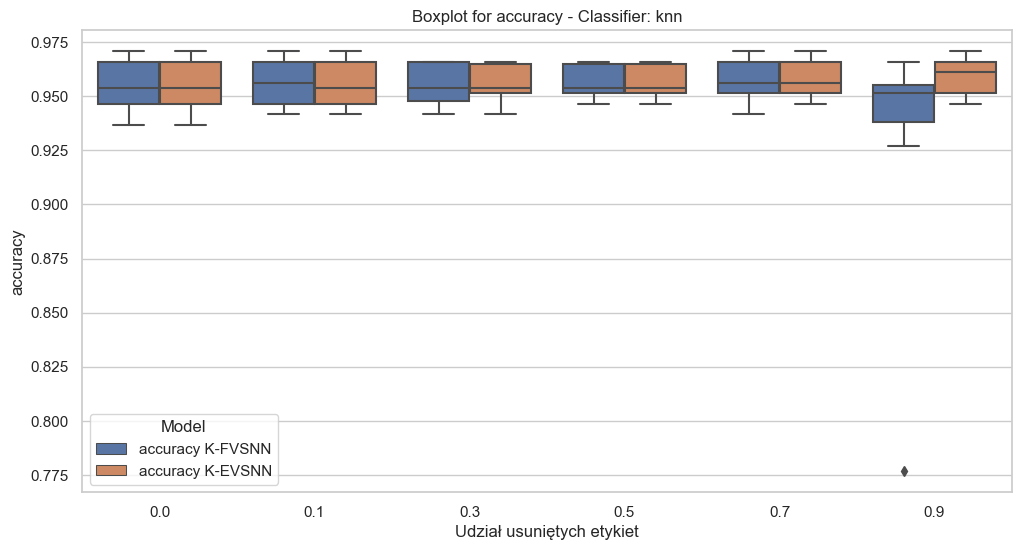

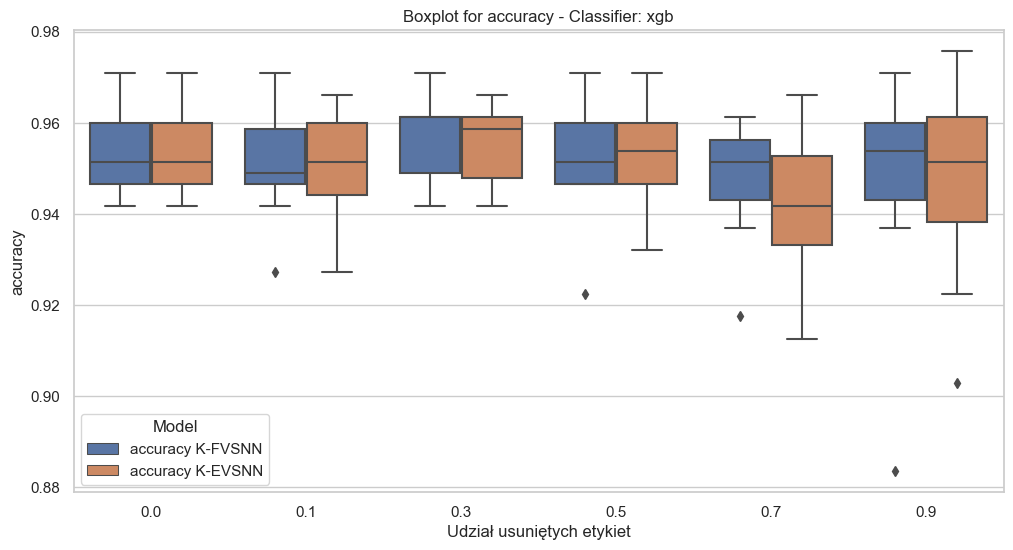

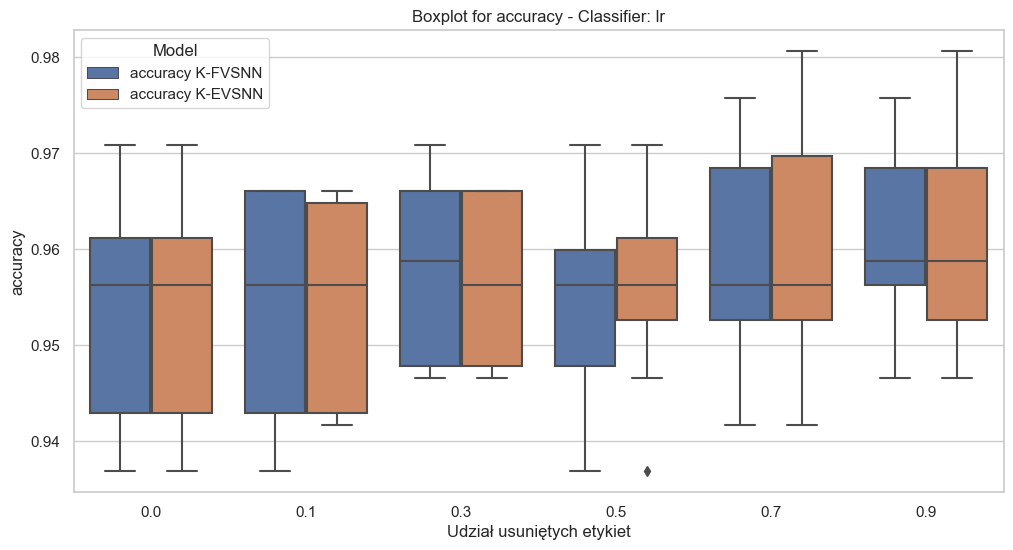

In [48]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc', 'accuracy']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN'],
    'accuracy': ['accuracy K-FVSNN', 'accuracy K-EVSNN']
}

classifier_names = ['knn', 'xgb', 'lr']

for metric in metrics:
    for clf_name in classifier_names:
        plt.figure(figsize=(12, 6))
        data = results_df_med[results_df_med['classifier'] == clf_name]

        melted_data = data.melt(id_vars=['fraction'], value_vars=metric_map[metric], 
                                var_name='Model', value_name=metric)
        
        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data)
        plt.title(f'Boxplot for {metric} - Classifier: {clf_name}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric)
        plt.legend(title='Model')
        plt.show()

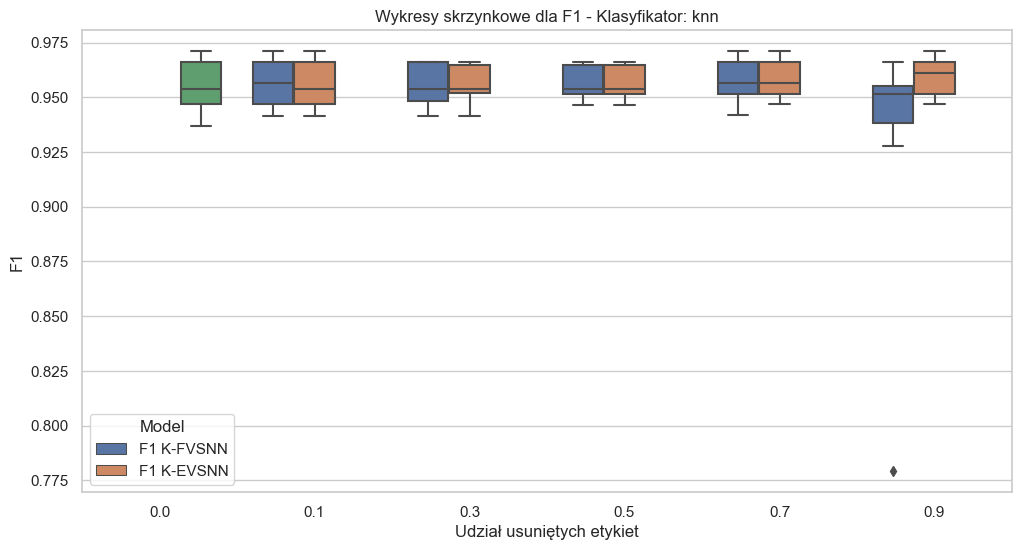

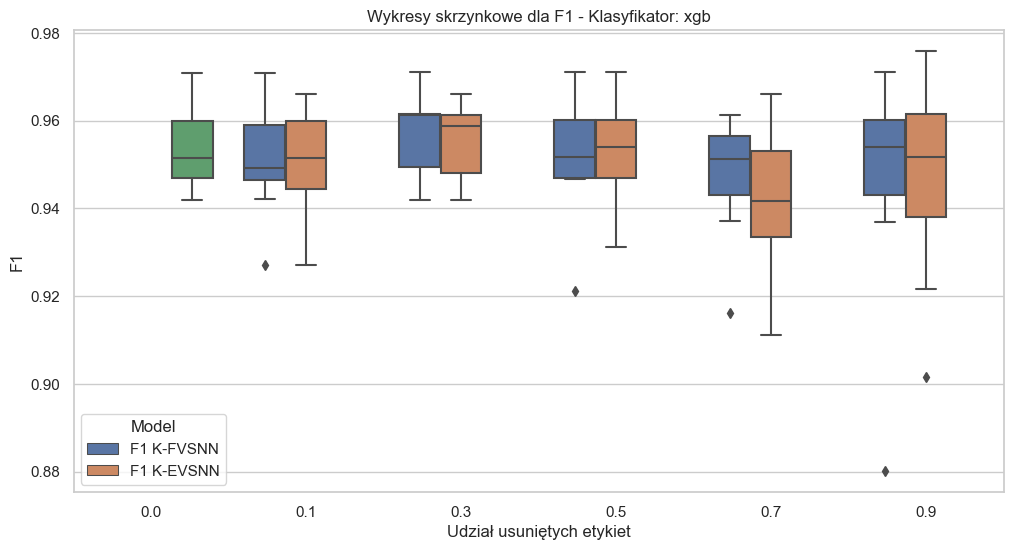

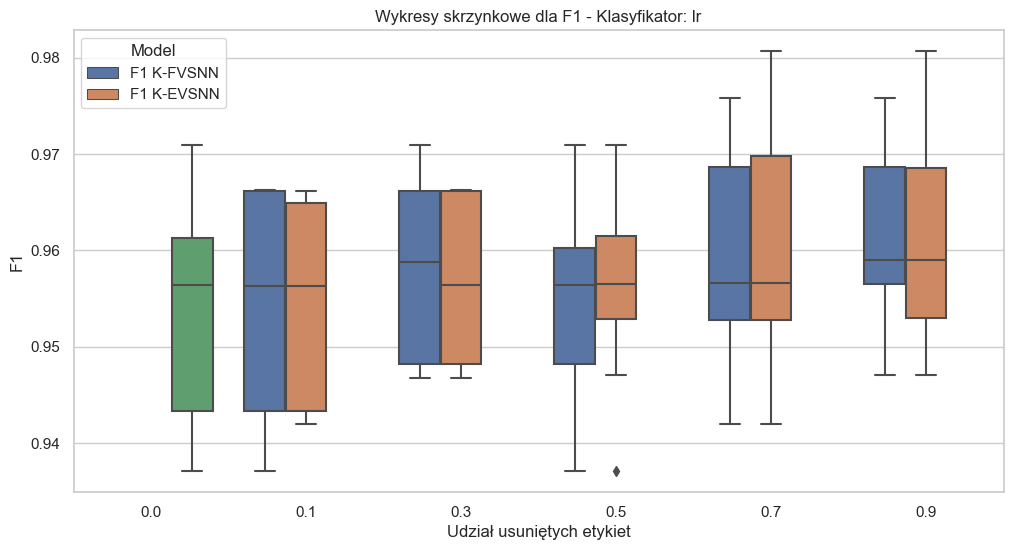

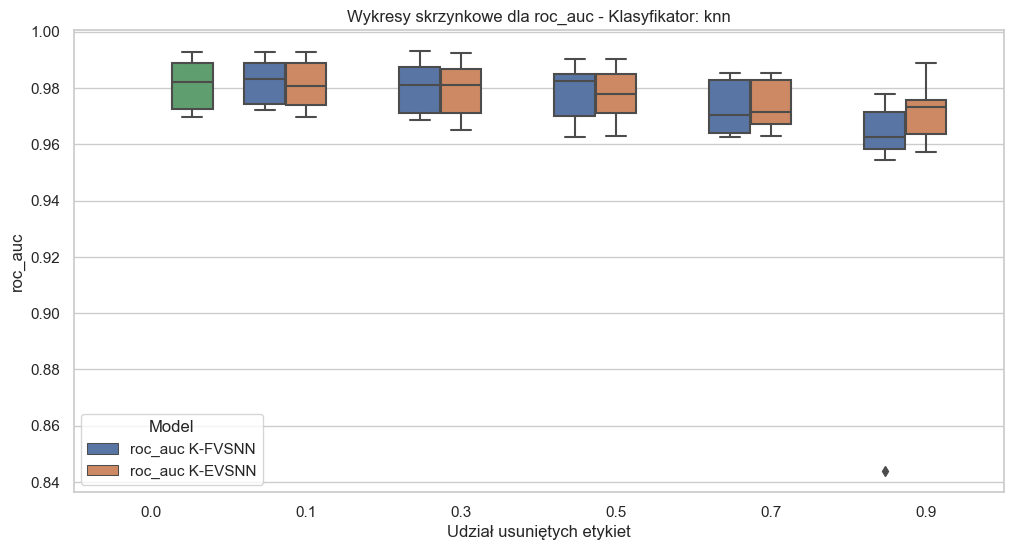

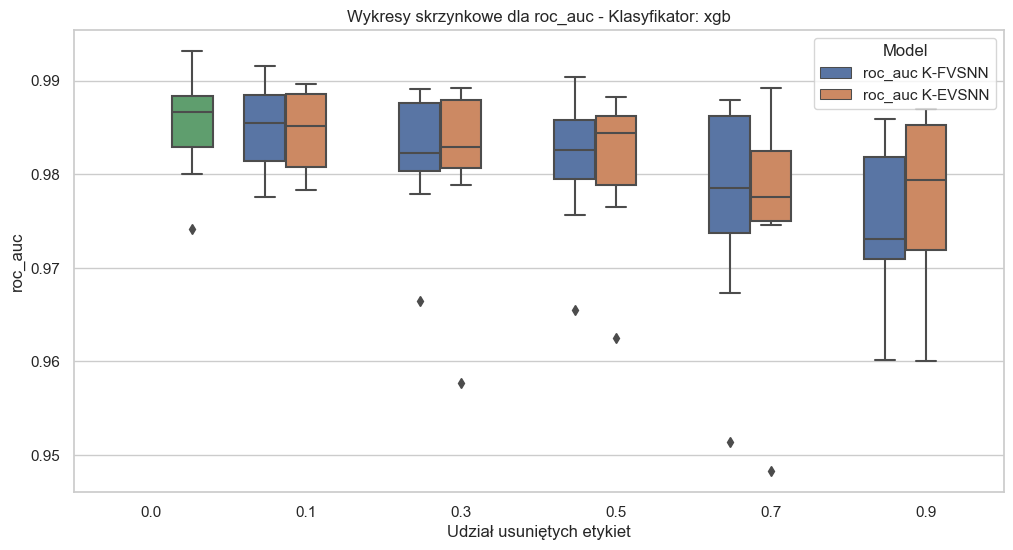

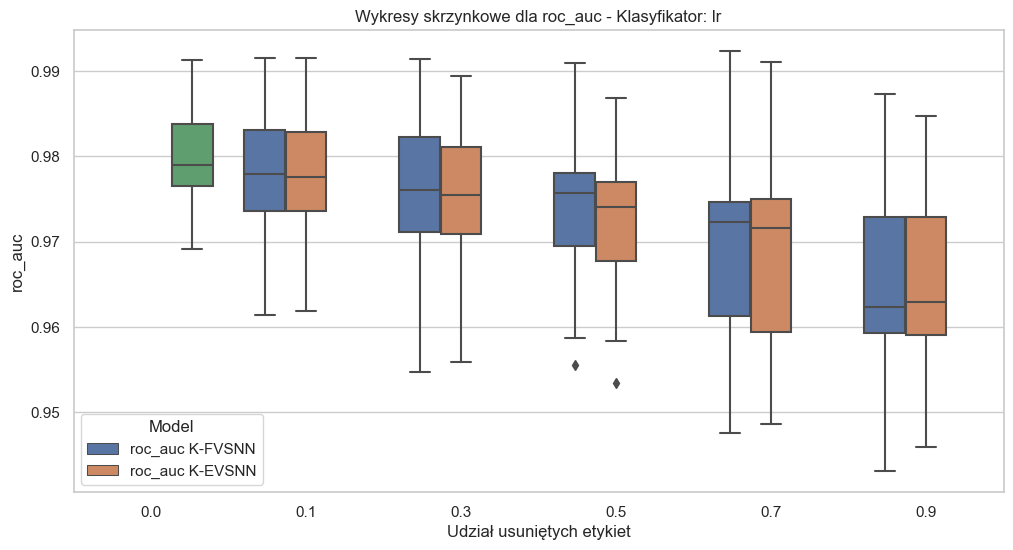

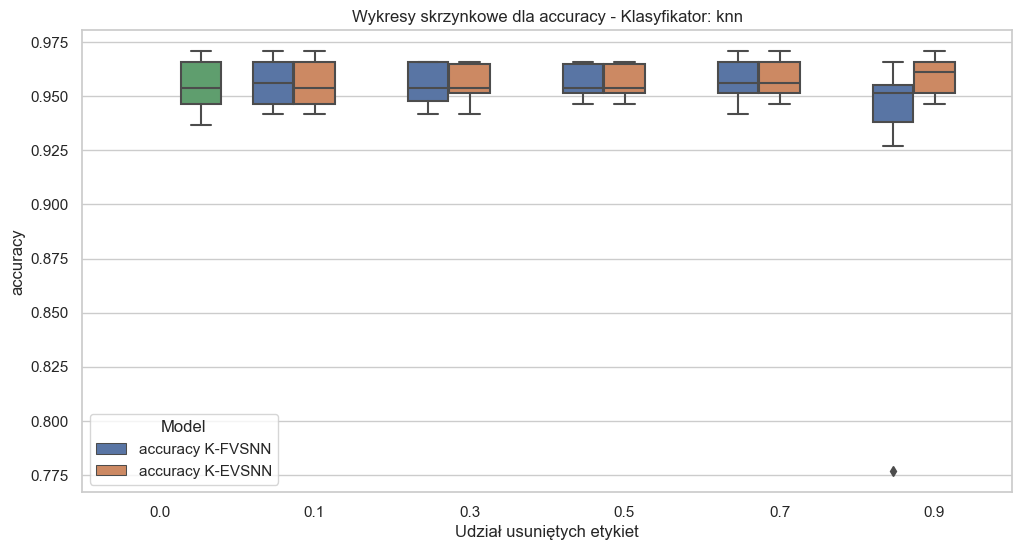

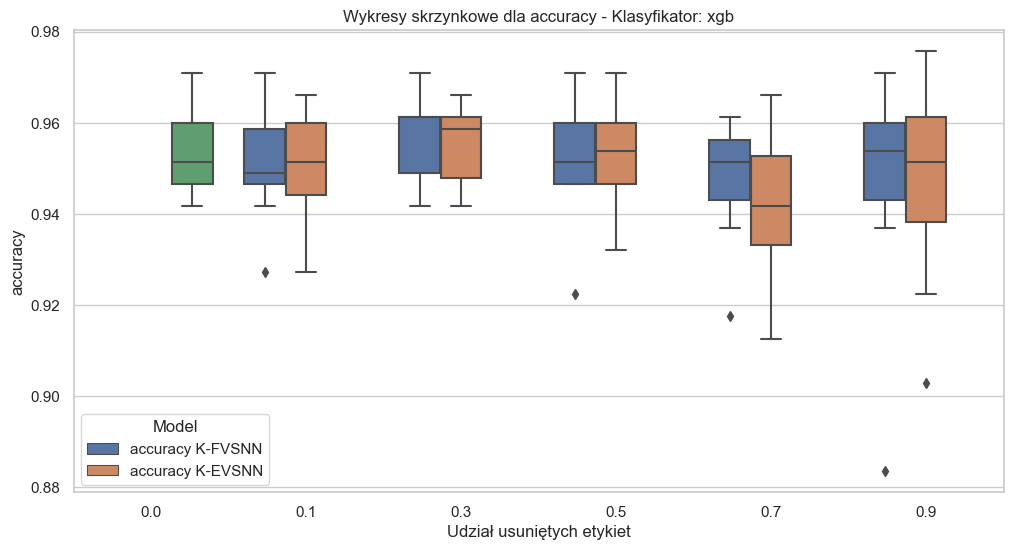

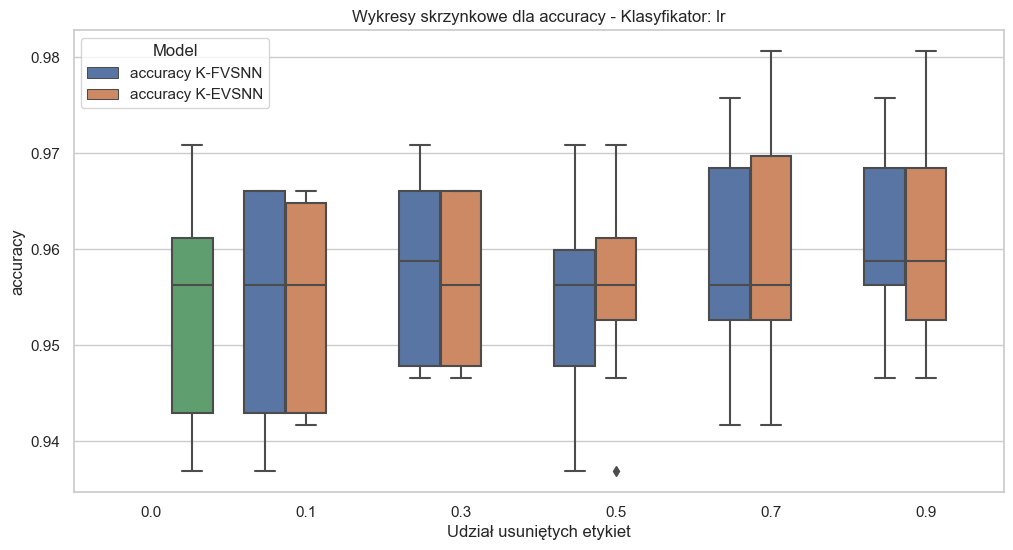

In [51]:
sns.set(style="whitegrid")

metrics = ['F1', 'roc_auc', 'accuracy']

metric_map = {
    'F1': ['F1 K-FVSNN', 'F1 K-EVSNN', 'f1 erased'],
    'roc_auc': ['roc_auc K-FVSNN', 'roc_auc K-EVSNN', 'roc_auc erased'],
    'accuracy': ['accuracy K-FVSNN', 'accuracy K-EVSNN', 'accuracy erased']
}

classifier_names = ['knn', 'xgb', 'lr']

for metric in metrics:
    for clf_name in classifier_names:
        plt.figure(figsize=(12, 6))
        data = results_df_med[results_df_med['classifier'] == clf_name]

        data_erased = data[data['fraction'] == 0]
        data_non_erased = data[data['fraction'] != 0]

        melted_data_erased = data_erased.melt(id_vars=['fraction'], value_vars=[f'{metric} erased'], 
                                              var_name='Model', value_name=metric)
        melted_data_non_erased = data_non_erased.melt(id_vars=['fraction'], value_vars=metric_map[metric][0:2], 
                                                      var_name='Model', value_name=metric)

        melted_data = pd.concat([melted_data_non_erased, melted_data_erased], ignore_index=True)

        sns.boxplot(x='fraction', y=metric, hue='Model', data=melted_data, dodge=True)
 
        handles, labels = plt.gca().get_legend_handles_labels()
        new_handles = [h for h, l in zip(handles, labels) if 'erased' not in l]
        new_labels = [l for l in labels if 'erased' not in l]
        plt.legend(new_handles, new_labels, title='Model')
        
        plt.title(f'Wykresy skrzynkowe dla {metric} - Klasyfikator: {clf_name}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric)
        plt.show()

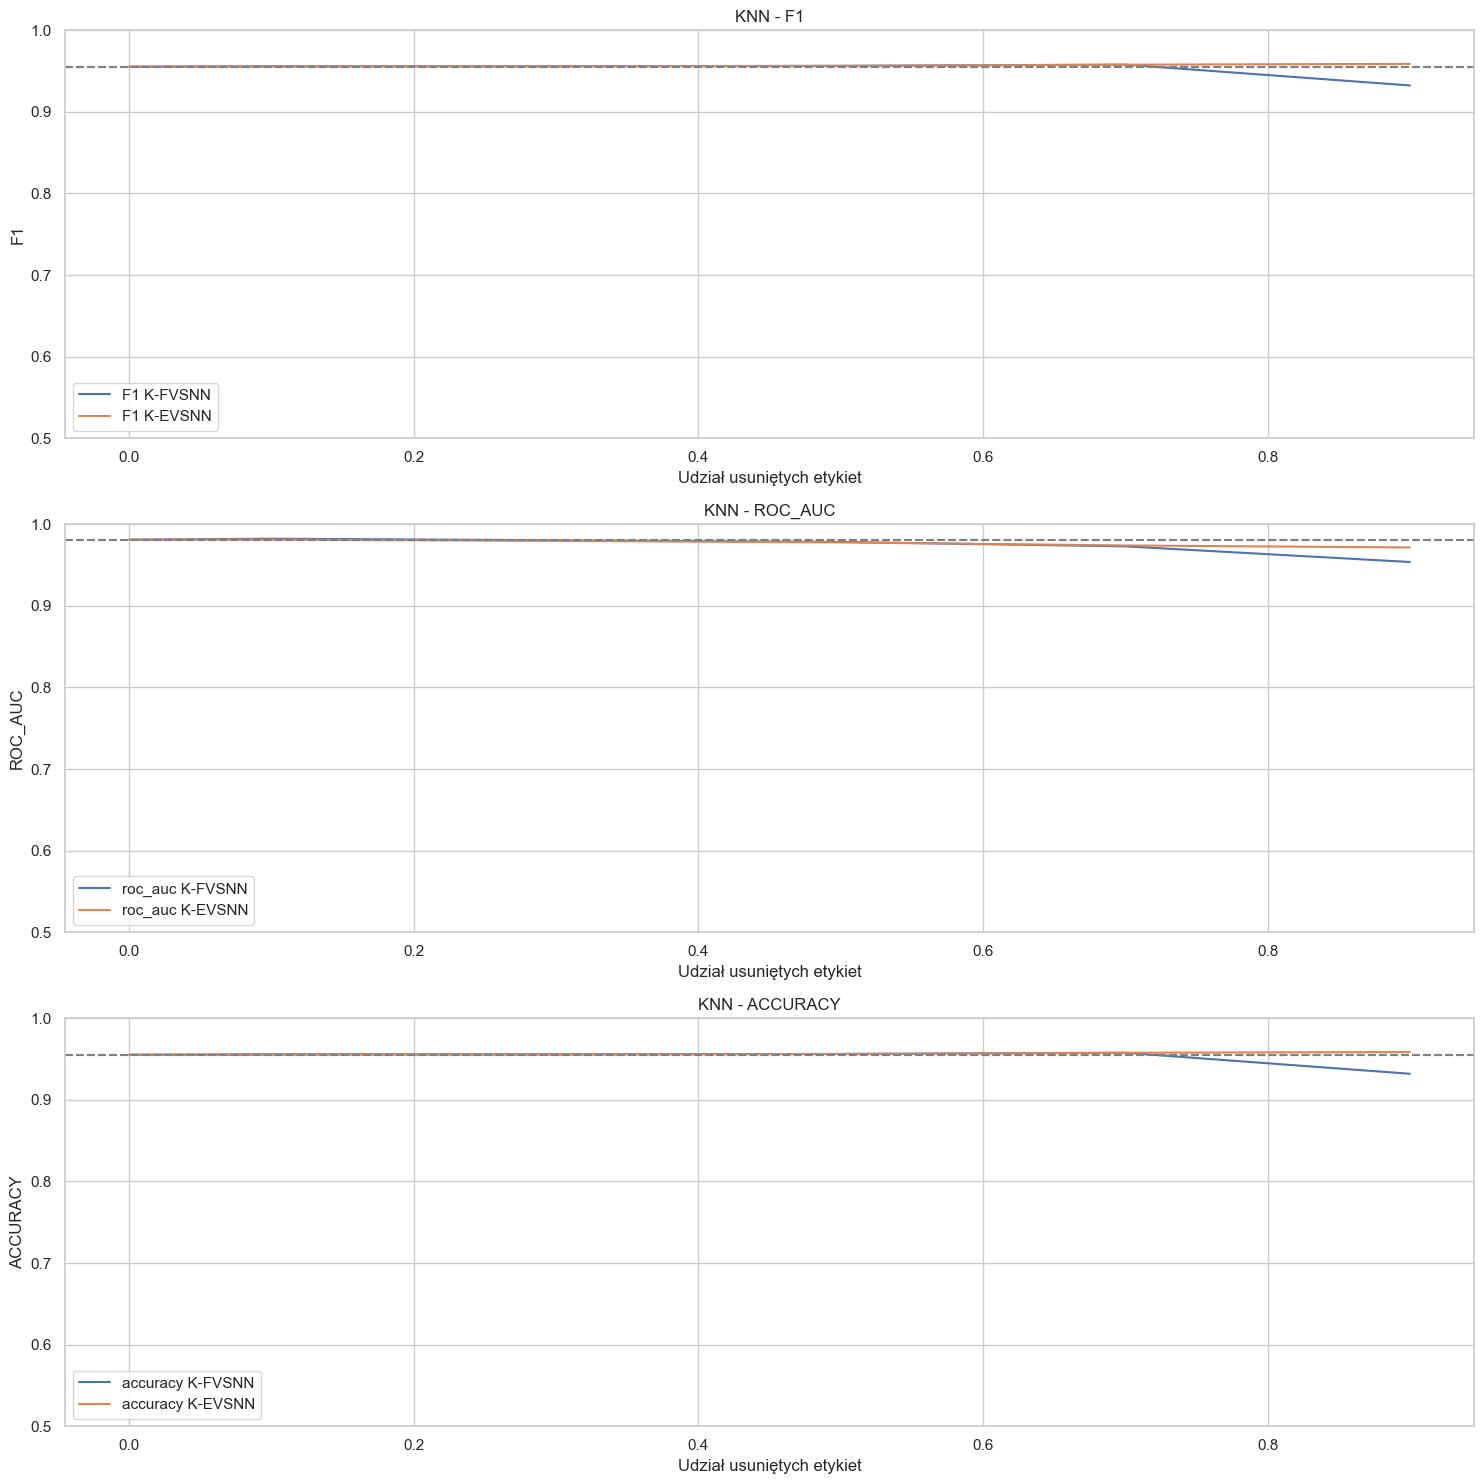

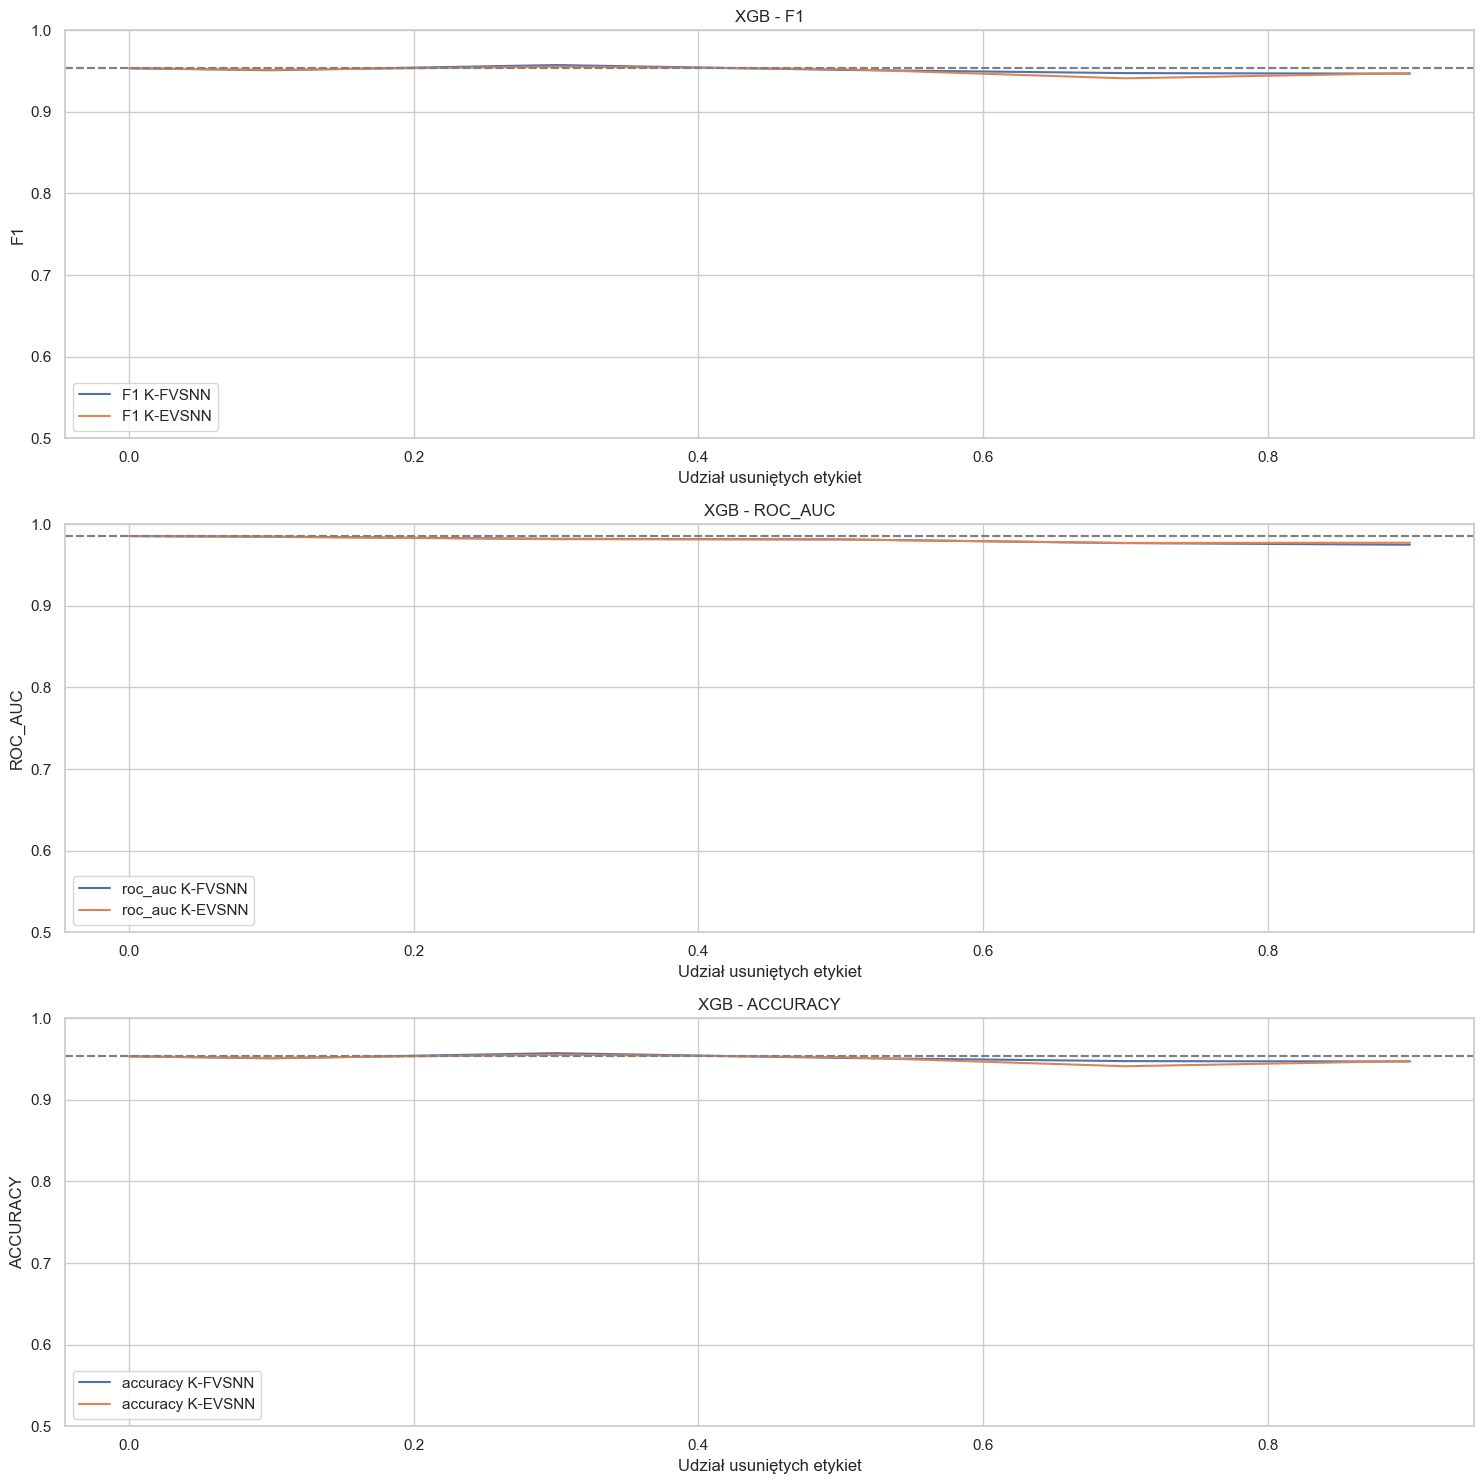

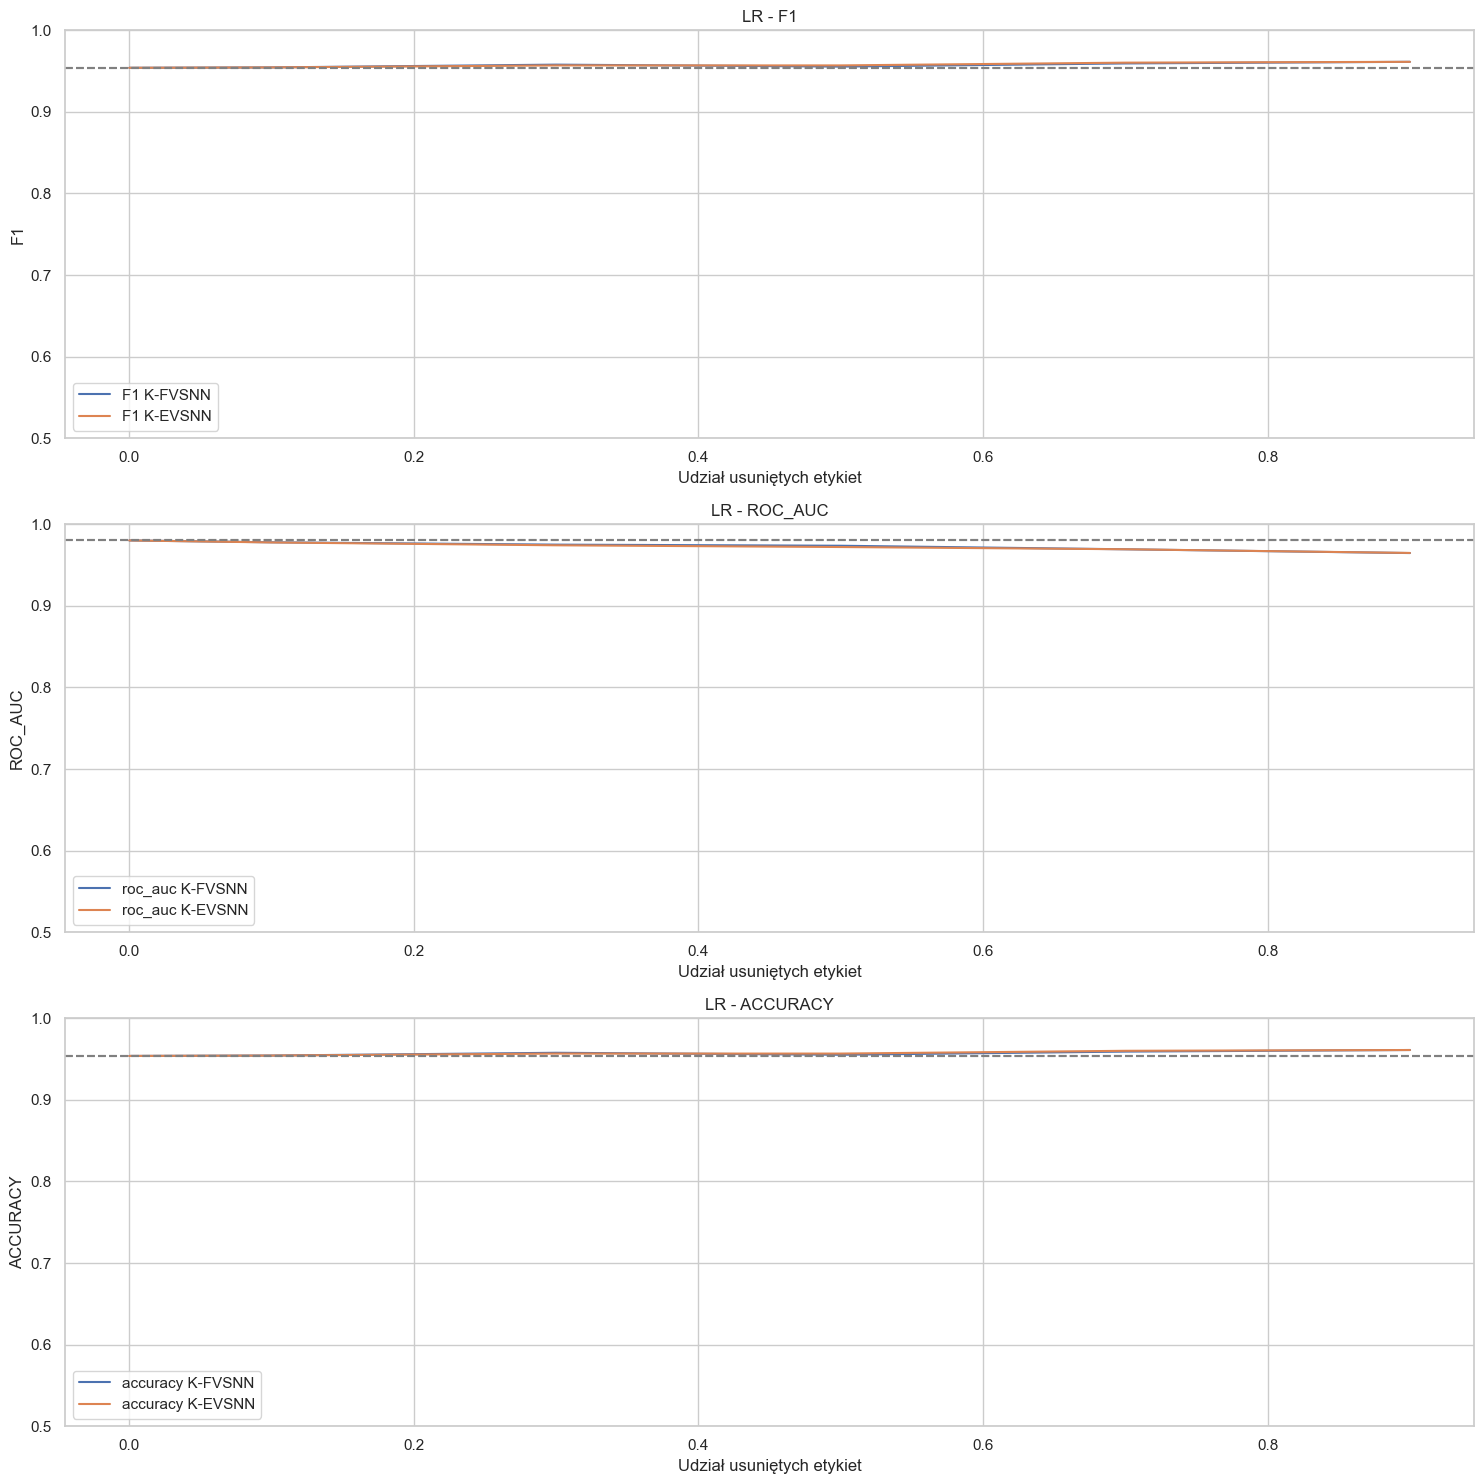

In [47]:
sns.set(style="whitegrid")

classifiers = ['knn', 'xgb', 'lr']
metrics = ['F1', 'roc_auc', 'accuracy']
model_types = ['K-FVSNN', 'K-EVSNN']

for clf in classifiers:
    plt.figure(figsize=(15, 15))
    
    for metric in metrics:
        plt.subplot(3, 1, metrics.index(metric) + 1)
        for model_type in model_types:
            plt.plot(mean_results_df_med[mean_results_df_med['classifier'] == clf]['fraction'],
                     mean_results_df_med[mean_results_df_med['classifier'] == clf][f'{metric} {model_type}'],
                     label=f'{metric} {model_type}')
            plt.axhline(y=mean_results_df_med[mean_results_df_med['classifier'] == clf][f'{metric} {model_type}'].iloc[0], 
                        color='gray', linestyle='--')

        plt.title(f'{clf.upper()} - {metric.upper()}')
        plt.xlabel('Udział usuniętych etykiet')
        plt.ylabel(metric.upper())
        plt.legend()
        plt.grid(True)

        plt.ylim(0.5, 1)
        plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.tight_layout()
    plt.show()

In [61]:
%%time

param_grid = {
    'distance_param': [-2, -1, 0, 1, 2], 
    'val_member': [-2, -1, 0, 1, 2], 
    'train_member': [-2, -1, 0, 1, 2],
    'K_percent': [10]
}

clf =  XGBClassifier(random_state=2024, objective='binary:logistic')
fraction = 0.6

results = []
results_valid = []

df_train, df_test_val = train_test_split(med, test_size=0.2, random_state=2024)
df_test, df_val = train_test_split(df_test_val, test_size=0.5, random_state=2024)
    
erased_df = label_erase(dataframe=df_train, fraction=fraction, column_name='class', percent_erased_ones=df_train[df_train['class'] == df_train['class'].unique()[1]].shape[0]/df_train['class'].shape[0])
Labeled = erased_df.dropna(subset=['class'])
Unlabeled = erased_df.drop(Labeled.index)
        
for dp in param_grid['distance_param']:
    for vm in param_grid['val_member']:
        for tm in param_grid['train_member']:
            for kp in param_grid['K_percent']:

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf, 
                                                        distance_param=dp, 
                                                        val_member=vm, 
                                                        train_member=tm,
                                                        K_percent=kp, 
                                                        target_column='class')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))

                            F1_KFVSNN = f1_score(df_test['class'], y_pred, average='weighted')
                
                            F1_KFVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            X = active_learning_shapley(Labeled, Unlabeled, classifier=clf,
                                        K_percent=10, target_column='class', shapley_method='exact')
                            clf.fit(X.drop('class', axis=1), X['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_KEVSNN = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_KEVSNN_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            clf.fit(Labeled.drop('class', axis=1), Labeled['class'])
                            y_pred = clf.predict(df_test.drop(['class'], axis=1))
                            y_pred_val = clf.predict(df_val.drop(['class'], axis=1))
                
                            F1_erased = f1_score(df_test['class'], y_pred, average='weighted')

                            F1_erased_val = f1_score(df_val['class'], y_pred_val, average='weighted')

                            results.append([dp, vm, tm, kp,
                                            F1_KFVSNN,
                                            F1_KEVSNN,
                                            F1_erased])

                            results_valid.append([dp, vm, tm, kp,
                                            F1_KFVSNN_val, 
                                            F1_KEVSNN_val,
                                            F1_erased_val])

results_df_test_med = pd.DataFrame(results, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 K-erased'])

results_df_valid_med = pd.DataFrame(results_valid, columns=['distance_param', 'val_member', 'train_member', 'K_percent',
                                                'F1 K-FVSNN',
                                                'F1 K-EVSNN',
                                                'F1 erased'])

print(results_df_test_med.nlargest(10, 'F1 K-FVSNN'))
print(results_df_test_med.nlargest(10, 'F1 K-erased'))

print(results_df_valid_med.nlargest(10, 'F1 K-FVSNN'))
print(results_df_valid_med.nlargest(10, 'F1 erased'))

   distance_param  val_member  train_member  K_percent  F1 K-FVSNN  \
0              -2          -2            -2         10    0.956085   
1              -2          -2            -1         10    0.956085   
2              -2          -2             0         10    0.956085   
3              -2          -2             1         10    0.956085   
4              -2          -2             2         10    0.956085   
5              -2          -1            -2         10    0.956085   
6              -2          -1            -1         10    0.956085   
7              -2          -1             0         10    0.956085   
8              -2          -1             1         10    0.956085   
9              -2          -1             2         10    0.956085   

   F1 K-EVSNN  F1 K-erased  
0    0.956085     0.956085  
1    0.956085     0.956085  
2    0.956085     0.956085  
3    0.956085     0.956085  
4    0.956085     0.956085  
5    0.956085     0.956085  
6    0.956085     0.956085

## Przykłady

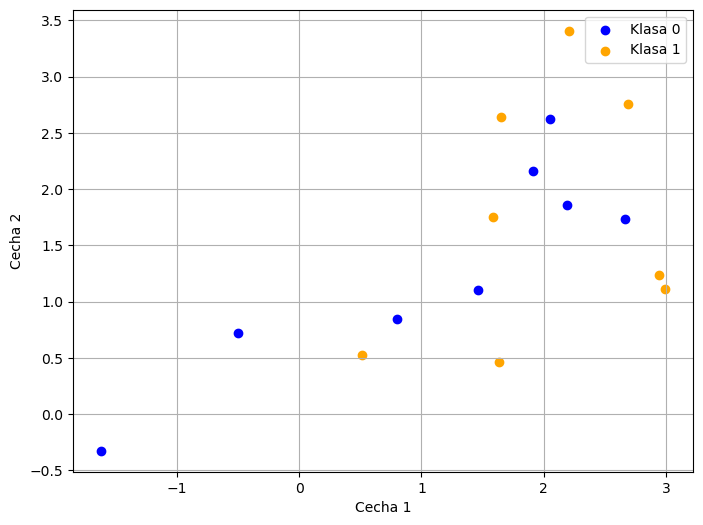

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(2024)
n_observations = 8

group_1 = np.random.normal(loc=1, scale=1, size=(n_observations, 2))
group_2 = np.random.normal(loc=2, scale=1, size=(n_observations, 2))

df_group_1 = pd.DataFrame(group_1, columns=['Feature1', 'Feature2'])
df_group_2 = pd.DataFrame(group_2, columns=['Feature1', 'Feature2'])

df_group_1['Label'] = 0  
df_group_2['Label'] = 1

df_group_1['Group'] = 'Group 1'
df_group_2['Group'] = 'Group 2'

df = pd.concat([df_group_1, df_group_2], ignore_index=True)

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1')]['Feature1'],
    df[(df['Group'] == 'Group 1')]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2')]['Feature1'],
    df[(df['Group'] == 'Group 2')]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.show()

In [56]:
df['True_label'] = 1
df.loc[df[df['Group'] == 'Group 1'].tail(4).index, 'Label'] = 'no_label'
df.loc[df[df['Group'] == 'Group 2'].tail(4).index, 'Label'] = 'no_label'
df.loc[df['Label'] == 'no_label', 'True_label'] = 0

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no_label' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


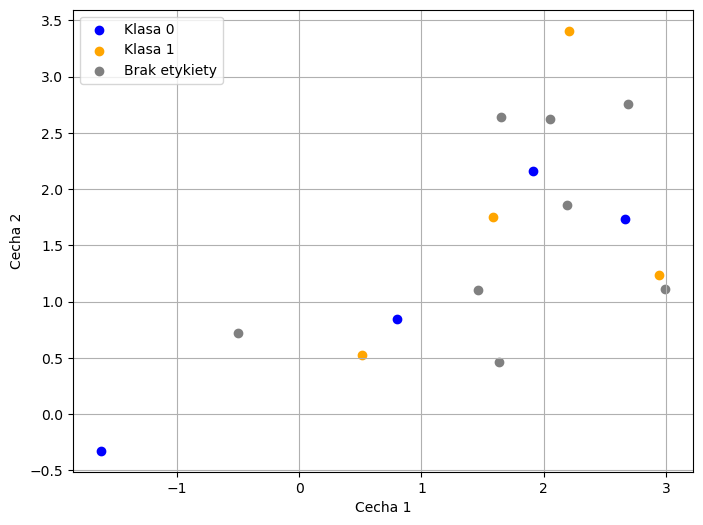

In [57]:
plt.figure(figsize=(8, 6))
plt.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[df['Label'] == 'no_label']['Feature1'],
    df[df['Label'] == 'no_label']['Feature2'],
    color='gray', marker='o', label='Brak etykiety'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.show()

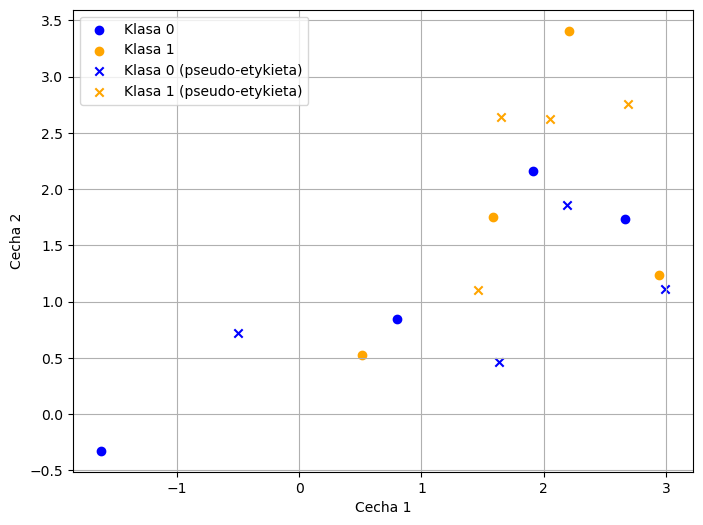

In [68]:
np.random.seed(2024)
df.loc[df['Label'] == 'no_label', 'Label'] = np.random.binomial(n=1, p=0.5, size=(df['Label'] == 'no_label').sum())

plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.show()

In [69]:
X_train = df[df['True_label'] == 0][['Feature1', 'Feature2']]
y_train = df[df['True_label'] == 0]['Label']
X_val = df[df['True_label'] == 1][['Feature1', 'Feature2']]
y_val = df[df['True_label'] == 1]['Label']

shap_vals = shapley_values(X_train, y_train, X_val, y_val, K=3)

print(shap_vals)

[0.17083333 0.12202381 0.20833333 0.15625    0.06666667 0.13363095
 0.04166667 0.10833333]


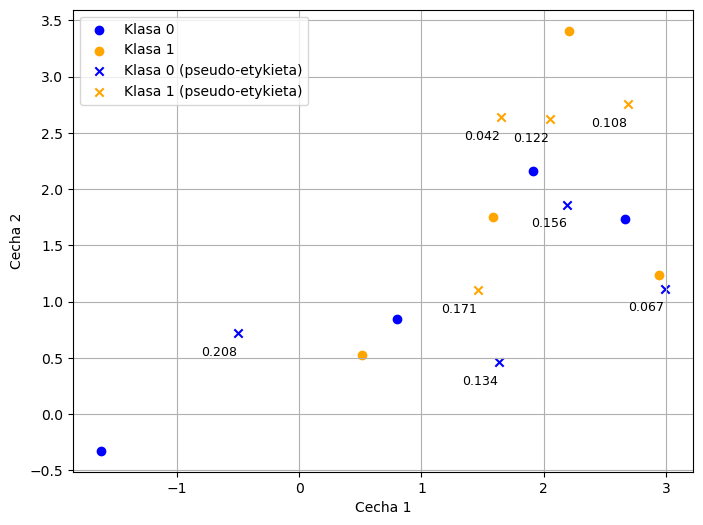

In [70]:
plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

for i, (x, y, shap_val) in enumerate(zip(X_train['Feature1'], X_train['Feature2'], shap_vals)):
    plt.text(x - 0.3, y - 0.2, f"{shap_val:.3f}", fontsize=9, color='black')

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.show()

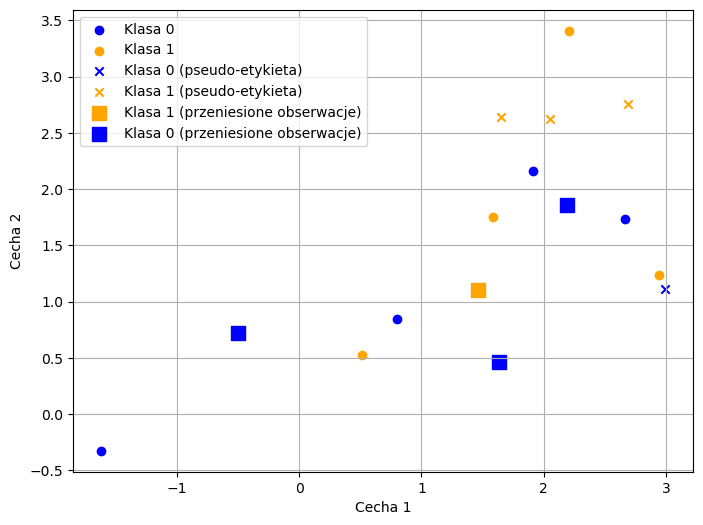

In [72]:
df.loc[df['True_label'] == 0, 'Shapley'] = shap_vals

top_4_indices = df[df['True_label'] == 0].nlargest(4, 'Shapley').index

plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

top_4_indices_label_1 = top_4_indices[df.loc[top_4_indices, 'Label'] == 1]
plt.scatter(
    df.loc[top_4_indices_label_1, 'Feature1'],
    df.loc[top_4_indices_label_1, 'Feature2'],
    color='orange', marker='s', s=100, label='Klasa 1 (przeniesione obserwacje)'
)

top_4_indices_label_0 = top_4_indices[df.loc[top_4_indices, 'Label'] == 0]
plt.scatter(
    df.loc[top_4_indices_label_0, 'Feature1'],
    df.loc[top_4_indices_label_0, 'Feature2'],
    color='blue', marker='s', s=100, label='Klasa 0 (przeniesione obserwacje)'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.grid(True)
plt.show()

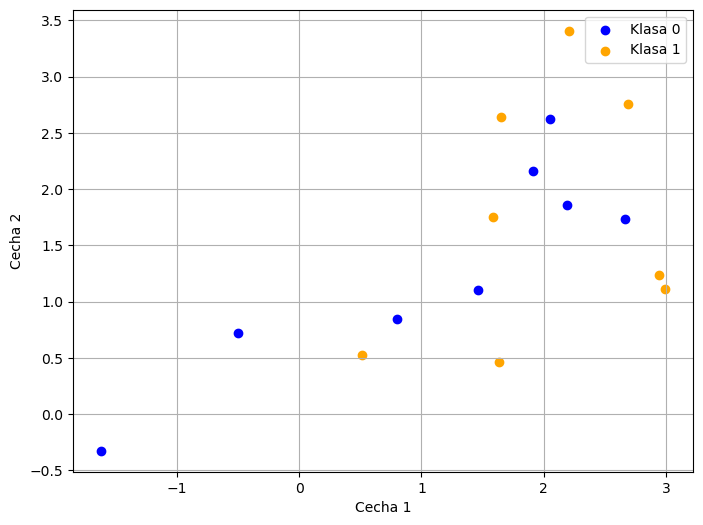

In [73]:
np.random.seed(2024)
n_observations = 8

group_1 = np.random.normal(loc=1, scale=1, size=(n_observations, 2))
group_2 = np.random.normal(loc=2, scale=1, size=(n_observations, 2))

df_group_1 = pd.DataFrame(group_1, columns=['Feature1', 'Feature2'])
df_group_2 = pd.DataFrame(group_2, columns=['Feature1', 'Feature2'])

df_group_1['Label'] = 0  
df_group_2['Label'] = 1

df_group_1['Group'] = 'Group 1'
df_group_2['Group'] = 'Group 2'

df = pd.concat([df_group_1, df_group_2], ignore_index=True)

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1')]['Feature1'],
    df[(df['Group'] == 'Group 1')]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2')]['Feature1'],
    df[(df['Group'] == 'Group 2')]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

plt.show()

In [74]:
df['True_label'] = 1
df.loc[df[df['Group'] == 'Group 1'].tail(4).index, 'Label'] = 'no_label'
df.loc[df[df['Group'] == 'Group 2'].tail(4).index, 'Label'] = 'no_label'
df.loc[df['Label'] == 'no_label', 'True_label'] = 0

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no_label' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


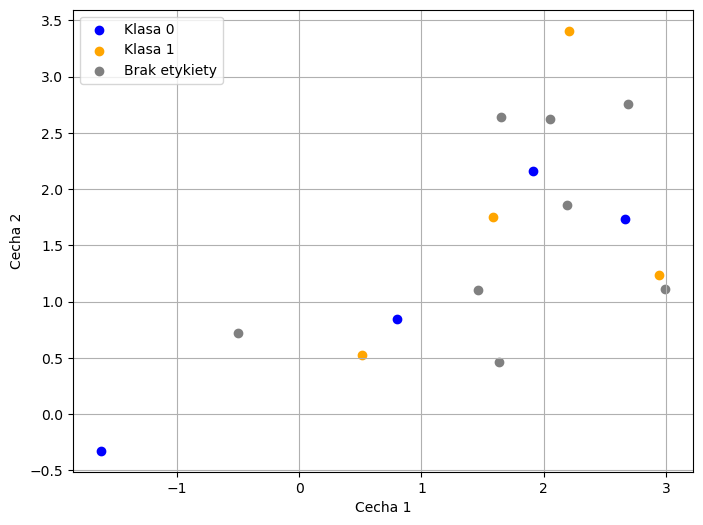

In [75]:
plt.figure(figsize=(8, 6))
plt.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[df['Label'] == 'no_label']['Feature1'],
    df[df['Label'] == 'no_label']['Feature2'],
    color='gray', marker='o', label='Brak etykiety'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

plt.show()

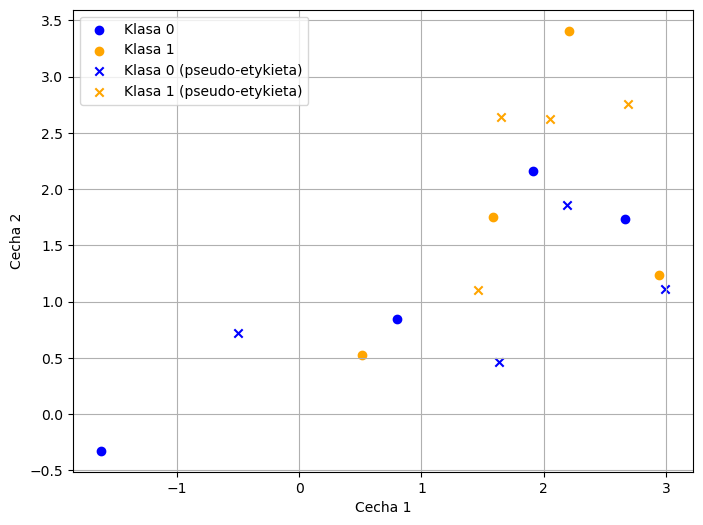

In [76]:
np.random.seed(2024)
df.loc[df['Label'] == 'no_label', 'Label'] = np.random.binomial(n=1, p=0.5, size=(df['Label'] == 'no_label').sum())

plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

plt.grid(True)

plt.show()

In [77]:
X_train = df[df['True_label'] == 0][['Feature1', 'Feature2']]
y_train = df[df['True_label'] == 0]['Label']
X_val = df[df['True_label'] == 1][['Feature1', 'Feature2']]
y_val = df[df['True_label'] == 1]['Label']

fuzz_shap_vals = fuzzy_shapley_values(X_train, y_train, X_val, y_val, K=3)

print("Shapley values dla walidacyjnych obserwacji (grupa 1):")
print(fuzz_shap_vals)

Shapley values dla walidacyjnych obserwacji (grupa 1):
[0.79899835 0.78242069 0.35330166 0.82305669 0.87829528 0.95339992
 0.93648717 0.48942582]


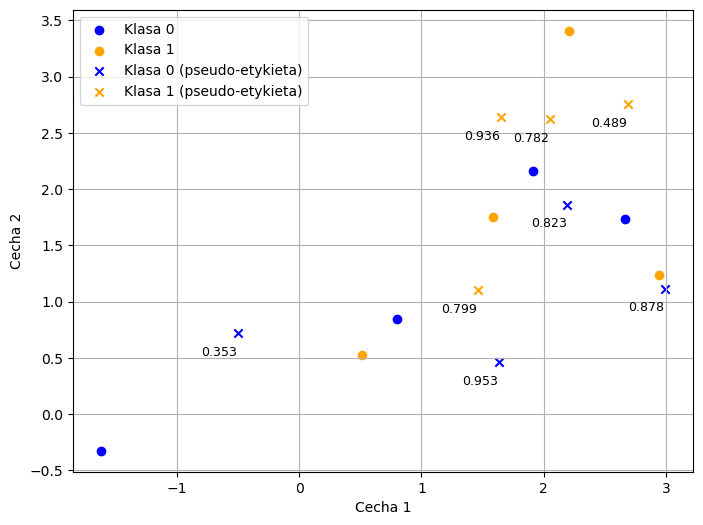

In [80]:
plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

for i, (x, y, fuzz_shap_val) in enumerate(zip(X_train['Feature1'], X_train['Feature2'], fuzz_shap_vals)):
    plt.text(x - 0.3, y - 0.2, f"{fuzz_shap_val:.3f}", fontsize=9, color='black')

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.legend()

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.grid(True)
plt.show()

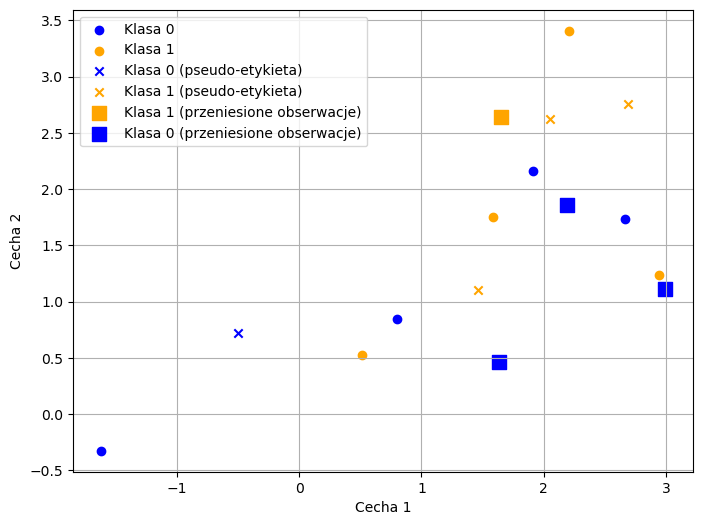

In [81]:
df.loc[df['True_label'] == 0, 'Fuzz_Shapley'] = fuzz_shap_vals

top_4_indices = df[df['True_label'] == 0].nlargest(4, 'Fuzz_Shapley').index

plt.figure(figsize=(8, 6))
mpl.style.use('default')

plt.scatter(
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature1'],
    df[(df['Group'] == 'Group 1') & (df['Label'] == 0) & (df['True_label'] == 1)]['Feature2'],
    color='blue', marker='o', label='Klasa 0'
)

plt.scatter(
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature1'], 
    df[(df['Group'] == 'Group 2') & (df['Label'] == 1) & (df['True_label'] == 1)]['Feature2'],
    color='orange', marker='o', label='Klasa 1'
)

plt.scatter(
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 0) & (df['True_label'] == 0)]['Feature2'],
    color='blue', marker='x', label='Klasa 0 (pseudo-etykieta)'
)
plt.scatter(
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature1'], 
    df[(df['Label'] == 1) & (df['True_label'] == 0)]['Feature2'],
    color='orange', marker='x', label='Klasa 1 (pseudo-etykieta)'
)

top_4_indices_label_1 = top_4_indices[df.loc[top_4_indices, 'Label'] == 1]
plt.scatter(
    df.loc[top_4_indices_label_1, 'Feature1'],
    df.loc[top_4_indices_label_1, 'Feature2'],
    color='orange', marker='s', s=100, label='Klasa 1 (przeniesione obserwacje)'
)

top_4_indices_label_0 = top_4_indices[df.loc[top_4_indices, 'Label'] == 0]
plt.scatter(
    df.loc[top_4_indices_label_0, 'Feature1'],
    df.loc[top_4_indices_label_0, 'Feature2'],
    color='blue', marker='s', s=100, label='Klasa 0 (przeniesione obserwacje)'
)

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()

file_path = '...'
plt.savefig(file_path, dpi=300)

plt.grid(True)
plt.show()